# Python challenges
All the challenges from python challenge solved. Web -> http://www.pythonchallenge.com

In [1]:
# Challenge 0
2**38

274877906944

In [2]:
# Challenge 1
input_string = "g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj."
sol=""
for ch in input_string:
    n = ord(ch)
    if (n>96) and (n<123):
        sol += chr(ord(ch) + 2)
    else:
        sol += chr(ord(ch))

In [16]:
sol=""
for ch in "map":
    n = ord(ch)
    sol += chr(ord(ch) + 2)
print(sol)

ocr


In [18]:
# Challenge 2
input_string="""<!--
%%$@_$^__#)^)&!_+]!*@&^}@[@%]()%+$&[(_@%+%$*^@$^!+]!&_#)_*}{}}!}_]$[%}@[{_@#_^{*
@##&{#&{&)*%(]{{([*}@[@&]+!!*{)!}{%+{))])[!^})+)$]#{*+^((@^@}$[**$&^{$!@#$%)!@(&
+^!{%_$&@^!}$_${)$_#)!({@!)(^}!*^&!$%_&&}&_#&@{)]{+)%*{&*%*&@%$+]!*__(#!*){%&@++
!_)^$&&%#+)}!@!)&^}**#!_$([$!$}#*^}$+&#[{*{}{((#$]{[$[$$()_#}!@}^@_&%^*!){*^^_$^
]@}#%[%!^[^_})+@&}{@*!(@$%$^)}[_!}(*}#}#___}!](@_{{(*#%!%%+*)^+#%}$+_]#}%!**#!^_
)@)$%%^{_%!@(&{!}$_$[)*!^&{}*#{!)@})!*{^&[&$#@)*@#@_@^_#*!@_#})+[^&!@*}^){%%{&#@
@{%(&{+(#^{@{)%_$[+}]$]^{^#(*}%)@$@}(#{_&]#%#]{_*({(])$%[!}#@@&_)([*]}$}&${^}@(%
(%[@%!}%*$}(*@)}){+@(%@*$&]*^*}*]&$[}*]%]+*}^!}*$^^_()#$^]++@__){&&+((#%+(&+){)$
%&&#($[[+##*%${)_!+{_[})%++)$#))]]]$]@]@($+{&%&%+!!!@]_]+])^*@$(@#${}}#}{%}#+{(@
#__+{{]${]!{(%${%%^)(_*_@+)$]$#_@$)]](}{}$(}*%+!}#+)$%$}+#@*&^{##}+@(%[*@_}{(^]^
+_*{@+[$!!@%$+{_&(#^(([&[][[&@#+}_]&&]}^*&$&)#_^$@$((%)}+{}$#+{+^}&[#[#_+${#[#]{
(@@[%}[}$%+*#$+[%(**!$+@$@&+$_$#!_&&&&{***+)}][}#^!%#&$*)$!%}*&#}}##(^_%^]{+]&&]
}^]#^(}@]&$]*_][])$]{_+})^_}]))()^&)(!*![!&}{][(]})[(*^}$&$_@^$)#${%[$_]!^]}}}*+
*^_(+}^)(%(}{&)[}!$$&&+}&[{%}^+#$]@)^&*%{@}]&!%*%$*&][}&{$&*@{@#]$*_[]%%[#]#*%)@
$_^#%$!{#]^$}%^@^+{($!^($%)]+&}+$@[$*)*&)*%!_!!+@&^*{}%#&{}$!(*^*@]@@})[($!)]]})
})(&+##]##%&##$}@{#_])*%(*(@$)}[+(+_)!{{#^{_@)!&)$}@^^^[$#__+$^!*#%%]_!#$]$&+^}%
@])])%}]#$((^+{{@++^])$^*#[$}*]}}{)@+)[_}*@^%#]]#+()+)(]_[!!!)+)$+&@@])!}+*%]$[]
&&[@+$_&#[$!$${}{%[]#+@)*!#)*!{$#*$%}[(&@$&_@($$]]]_[+(#@}&_}+]@$#_+](}^})!@@}@)
}^]^]*}]+&(@@!!](*@#(++*)]!(^$})&_^@+]{#_@*%^[$[%&_%@%_![&&]&_@*#_}[{{])^$[_$_&_
@%%[@#[@_[&+]}[+)!_#_+++%)[@%$(&$[{#@(}$*![#^#{}_)[$^_$${_@&}*![#*#_+%[@{*^$){)#
#%}]{+((*^]+{})&#$!#(*%({_!^*[{%@_&#){![&]@$#[#(!{*#^*%)]!%(#]%${*_^{+}(@}{_^(](
_+!_)^&}!#([(+&[@])[_(]@]@&@{#@(%[@+[^@%@+]*_[{]$[_(_@[!]]^%+@#(@$}]@(^**+]%^)^(
@}^[]@@[@[@}^(^!]%*_]&$!!^^#*[#*[*_}+[$#(_#%@](+[^+}%{_*#]+*(]}!$(%@%#^)}]_&]{${
}$[*{+&+&}[#_#}_(}){^#{[_%*!$+[#)%]@&&_{)#[+*&+#!&)%)%++$_}){%%*@!*&%__(_!]#$*(_
$^!@@}_())%(&$%]]{{{@+!&%@(^!+*{%[*[!]){(#$@)(^{]%[&*(&!{&}!%*$)*]]$%(__[}_+&)!(
^_&*]*+#@{@[_({$*&}][(*!+$+#%&![%^)^#(#}+*+(@)&&!({^^_*($^+)&{)%$@%)&!$$&&^+#[)$
+!$^]*!%^_$}$+!!&%_&){$%{((&^{{(&_&_]{^}@[$^+]}]^{@!^@_%_{^@*)+^*#$#!+*}#)}@(}!]
_*)}$**@}[^_&*^)*+#()]&{{]*+#${@&}#)$[]_+(^_@^][]_)*^*+_!{&$##]((](}}{[!$#_{&{){
*_{^}$#!+]{[^&++*#!]*)]%$!{#^&%(%^*}@^+__])_$@_^#[{{})}$*]#%]{}{][@^!@)_[}{())%)
())&#@*[#}+#^}#%!![#&*}^{^(({+#*[!{!}){(!*@!+@[_(*^+*]$]+@+*_##)&)^(@$^]e@][#&)(
%%{})+^$))[{))}&$(^+{&(#%*@&*(^&{}+!}_!^($}!(}_@@++$)(%}{!{_]%}$!){%^%%@^%&#([+[
_+%){{}(#_}&{&++!@_)(_+}%_#+]&^)+]_[@]+$!+{@}$^!&)#%#^&+$@[+&+{^{*[@]#!{_*[)(#[[
]*!*}}*_(+&%{&#$&+*_]#+#]!&*@}$%)!})@&)*}#(@}!^(]^@}]#&%)![^!$*)&_]^%{{}(!)_&{_{
+[_*+}]$_[#@_^]*^*#@{&%})*{&**}}}!_!+{&^)__)@_#$#%{+)^!{}^@[$+^}&(%%)&!+^_^#}^({
*%]&@{]++}@$$)}#]{)!+@[^)!#[%@^!!+{(@&+++_{!$}{]_%_#^#%&{!_(#$%%&@[})]+_@!(*[_@[
*_&+][^][}^@}])!(&^*[_%+(}!!{!!^*@!({%]#[_&()$]!$]@}*][)#()})[*^[^}]#(((_^#%%]@}
^###%!{(@+]$%*^}(![$@*]_{#*!$*@%*(^+#!)$&]*%$&*@$[)_$!&+_[$)%_*((%+##*]@+#*[$$)^
@)]}!)$^%+%&_#+]&&_!(}+^*#)$%%^+&%^_]@*%^^_#]%{%[&(*_(%(*{^@[@&+!@&[+[++$})$!*}+
(_^%%*}^{+}(+]]_][_(@}^#_{_}*){*)}+*)%#%++}{}__%$$$[%%*})_#*!_!%&*$!]!}{*+{^()$}
*$%*$]][{@+*]_*&!^]_*!_{_@(}+%#$+@}_]#@$#^%((#$%+++]])#*@)&([^#]_$%$)[#)){({%@_^
@#}@*!!()[]%$*+*{*$%@**!}&#[*#[[{(@&_){{!}!)++@*{{({_!#^]}+{{#]{$^)&]%}})^@&$%@$
$!_+!{]*^_+@&@){#*!_#+{[@$^(__}*[^$&{&]!(&+++_@+)&}))$%]${+*!(#@(}&&&!)!_!$&@&{[
[@!#!]]#%)(_^!{*[{^{]})$)^&(*)%}#]#()^#+}!{_}*+{@&_^)+%@!%%${$&%}(%*_!)%$((+$&^^
}#[@%+)&^!](]%+_{{]}@]+^]{(!_*&@][]@_%}%(%&)})&!#)[_]^+$)[(%*%({]$[(#+&+[@[*([$#
^*!@{]]#![[{_]#^@])_[[+%]#[%[+_{)^+([^}[]_[}])*^!_+$}^+_)+*@$$^}(&[)_^[+})^]&)))
}*+}%){@_)]_)&)!@)*#^_%{}(]]$)+^@+}+$_*&)]%^@&)![!@$[@)@}%!)@$((^![{(%([+#&{$+#[
#&)!+{)__]+%)![*%^&*^)*#[&(_%*)^_%*^{&_[@%%@^%_}&*@($[@$$#](}&$*&$$((!!}{%!^^$}!
{]][(!_(+}$%*_]*&$!_[@$})#@)]*%#]*{)$@*!^#[]**+]&])$@*@]{$_+]]^_*+*+)%!_!}#}^@*[
$[##&_^+&)((_$#!]}[_*]_$^_*{[^$#[{@$[()+*@_$((+}*^!]){][_}!)%{}{&#@[&#$(}#}%%{!_
@)[($}&+&$}}%[)@[{^_+%+[)[^[*{{^#]*__$^%^}#]}*{^+{!@#(+*]$)^(*!^^]^)[}@{%(($(+_#
*){@}]+}&)[(^^(*$&_$@#[#_$)^_()}{[]]{^@*)_!{@)(!))^_+_]{+_}$%(@#+{*+%@!${*&&@${]
(}&($(^*{^$])*}$(#}%}#)_@^*}#!)$)&$*__+!!+[&}])*_{+$}!@)*^{{({@}{@}+@#${$^*@^^}(
[)!^){!+@%(^_)[]@(]+&^_@[*(_@^*##*&*$!{^{!&#@(%&(@!]^[]({!+(]+^}&&${{]^!+#^*#&%{
$[}@&(]^&^@*#[&&}^[!%+#(+(%+&){_@_&%&!$}&)[$]%_^]*@^]&_}&^^^(&(${%#^(#[}}{%))&}{
%&___*&*((!#&(^)}%**$+_[!#{&_{$_))[${$*([&*%^!$%%&}$&_))}{(_]!+{}@+%{^*_[[@@)%}%
@)%*(}($$)^!#}+}#$]@})+]&@^!*{@_**{_^{@(^(@++&)!#](&#*[)+!!%{]_*$*(]%+&_^%)$$$*$
&]@}!&{@[{(+**#)}${[*@$(+%__{{}#!}@(%^+*)$+&){^(_*&}&__]^*)}]^!!%&$#[)$)+_{!$%@)
_##)#^*%#}{$}$[!!__$)}(%+[^(^$(%_)#!$[$@+]${$({)[^$+&$($]*!+$^{_(_%}(^)(!_))![*^
^%^&})[@#}#_%$*}&#!_)!)){*}!@&]*(@^_&[)]!*$&_[@&]($}!]!{)[)[{{_{#(+_!_#{]_(_(${}
%*+[}#{)@]&@($+&!^[}![}&$}*^[!)#^_#**${+(!+!#)!^%_#%[][(@(!!}&)_*{%@_^!)_!_@!^!(
{^](#%%&@#))$&#_&[[#&^&^}))([]&^+^@($!}{+^+*{%[}_*+_*^+$)+%^(}&[_%)$+{}{[*]+$]}&
@}_]_[%&)[@+}{+&^!#@_{!__!^%[(]@!+*%[!+)!{+_]*&+@*[_(*%+}*@+@&$!+_@+*&[#@%###}^^
%_@)$[&){&#&$!&}{@&&*[&!!!({)&{)+]^*&)]+[+^%^[_&+^$!$!+!+_(}+^}+&#*_&*(+_+[[)$!}
^$]}%](]]#_}[(&${{+((][_*%!)(##[@*&(^!_]**}[}{[%]*!$])[_))&(^$)%))&(+^@$&${_@![!
#(}_{$(&_&[_]%*&*@]}]}[{!&*}{{&+*$@%%}$+^[}{&$^%%^]#%{#](_){[()@@)[@]!#!%)&*+]_}
}[([#}[}&&}+{@!@+}]){_)%_+({{!]*}}^(!])#*^)(#&!)_#$[%_#{!##%%+)@{**)%+&*[*#[+*$)
@(!%)*)^]![_^%#)}*#!_@_@)(#)(_(]!%@)!_+_)]!*@{&!^%_+*(%%$!!_^}@^^{[@#*&+[(%#[{({
+)&+_$!${]+}^$[!]_#{{#]!{[&[$@*^]}@]}+{)_#}@_^%%$^{+($*[###@))]}@!@]]{^[_@)!@{@}
*+^(_]*$!_^_+[#))$$]*+%}{[&([&)@#{#)*%)])!_^+%%*#(+!}+{[#+#%%]@((]!_#@*%&(@[(@@#
^#}@}[*@})&$)@#+*!}^^()[^#^])+$$*%^*@^^!^$^#_!@^^(_&&][)@(%([[]&]]{[^}!@^[+${*%#
{[!({&_(_!+$]@}@!))$[[+#+{(@&@^{]]*][]}_$$$)##&&^#_{}}#[*%(+&]@%{@)!&{+{*^_#_$*^
[]}+^+*{[)}![}@[#$)}_^}#$!#%{([*_^+!#}$@{{&)!#*$#*@&)@&]^}!+{!}{)%}^[}]}[$&)^$)$
+){@)%$*[$_#))[({)&()[_^&^+#}%#((+@@[$+!^[%*_{]*+)}#$${+!@_)@@)@%**]_]))$$^&**!_
{!]^*+#]$!@+!$)^%)!&[$*[@!(_)[![)(}$}*)$(&%%&+^}+^%%&^_}]!(&]#+$*__*))#*{_&*]{*@
}_{%]]$)(#@![!(_]!)+&$&^(){$%_(_%+}%*%&%!!^^)(_*@{^#())[{^&@}#{{^_$[*()*$&%^_{)%
#@#{%]_{%#^)@(]#]}})#)*%)[{_^%[}][]^]^**]]}]@+%_}(])#+*^&]$^[$$%]$&+({!^{^@+]{(}
&^$@[$#(&+_%{*+%%(][%*+*{[)*$#%{({#@]_(#[{*(*$}{$^}[]{%]&{@#@^]{[)({%[)%!*$$}@&&
_+&_}@!^$}!$@_+^^]}@}%}%#+&($)]*+[%^#*@+_[((#!}%[+])[}[^)!(&*^}*+]){$#&}&*{)%^&!
]@][(&@)#{#_*^[@]$[(]{()*}$[}*{^]&]$!%)*!}}()^^(]+*!]^*[^&+$({]%!@)]^#$(^{@^!(}]
&*^_(+_&++_]])&]#%@^#%$^^_[+[&*[*^^}_**!}*}_%&([%^$%_$]]](_@$*%!)({&##([&%((}$*%
]*_${+(#^+^*!@@@![&&!}$)]%^@)#%_]&(])_@+{*#(}*_(!(}$[(_^_^]_}!&_&()(@+&_*^+)}#}[
+[[%){#[#()#_$(]!(^]{@(_%}$[))}*)(]@@#+@[+$[))[%*#%@}*_$)*@@@}{&^#@!}{+{^&))+}#]
%{%{&#(*]$}}{}&]$*%(}]{#*(+#%(@]&[^!{&}(^*[@)$^!^+$*]&])@##@*+![&+%_{+_)[[)+)(#_
&{^#}!!]_]}}}][@{^[%{*+!!!(&*$@^!_)^*$^@][+[{&#%!!_^$&{(_(^!}*@%([@^{%^%(+()(+%^
])*_)^$}_}}*{[[*{+[+*@%}!%#%%$!]]}}(^@@^!*)%^+(+!}!#$_&}_}_*#^&^)[(&^&}#$*}*#}*^
&{%{[}!{_$_[]^&%}})!}]%$+@!@(%)@[}%_@]]%!+$*_)%}#$[&_])}][@%[^_$#$((%]+})%#$)]@#
]@(!@#)[{$@^!]{#^&+)[**[}%#)+(%]#*$*&}}_%%]]&!&$[)]@{+@*#_!{@{#{_$%[!+&$[}+((_]}
^}[[+![})&+^&@_){(&_^&&]#&&))@@%[{%$+%})!_&[[$}&_@[+%}&*]$)}$]&^@{^})))_#@*@{([+
+%}^{]{]]]+}${$!^)]#()}#{_^+__&#*^&+{!{&}&&@{#&(_%#^*#+_${}!]##]*[(%])[{(+!((}&]
)!(}##{+%#_[%([}*}]!_(!^[{[}^{@*(}{@+&$)$){!^@]{](@{)#[_!*_*[#!$@)!}@}]_}[*#(}@#
%@^}&[^]$^(%(&&+!{^!)!#%{[^&+@[+*!])}^])+[&[)}!}{$)}!)^#)^+}+${][!%_%$%&%$)){*_&
*+@!}+${()}{(&$^_)&+#{)[^$*[!$]_$%)]^]@[$!#%((_&&[%]!}$%$$[$*}$(*(+&!#^^#][*{(^$
]{!(}#])#%{&!)+(({#{#*_+{[%[!#&%*])_&*)_}+@{&}#*&#[(!&]]*)#%](#^^&%]@(*]+^{@{#!*
](%$()%!]+}_([](@[^&@{][%])*]{^@@{#$*{!^#)$&!)!%_}&[(*#[[&^_&!_&!@#_$*__@{_#%&#}
@@+[+&%&$[%[@@(@!_&&%#__!@{$#&@[*($]*](&&{}#!^^$[%&{+%}]_}!#([}^{{**@*($[[#[%}*#
*^^[%)%@[&%}!+&!}*&*!)_$[^^#]$$}@(*)&)}@}^+@@!!}&%[]*#$}+}+#!&+}]&&#^))(*_][@!*{
!}*#^()_^*+((&+($]!!$){@$#$}*][]]&}(^{{]_]+^$+)[^##)})@^+$[[%[(_+@$$*#&%%_]+}[!$
@])(]){)#_$_)[$!({@#$#^#_&^(_%(*}^%$]+$%&%{{!{]}]$*@_&%(&&{)*]^}&}^&[@)++]!(#[([
@^#^$&}#)}#*@)*#&[^]{)#*@(%(%[$}!{$}_}#(_}#^^+[(#]_}#}__&^{{@$+^!#}}[#{!+#&_^!_$
+)]#%*{+((*_+_]+{]*)#*]*_!+_*$(!^%%#%*%^$%{*@@[+[((*(!([}_]}@^^+(_)@{[({_^]^)@&!
!+]^]#%]^!{(!#){_!![({)+@{&^}*[}%}(}%_%*&]+*)_!#+{^)$##_]*}@$^#()]*)@%}[^_)!%++!
_(#(&}#@%!)]$#^@&]%[[#!)(}){}}([)+%}@[![^%_**@[]@%]*)])$+_[%]#@!$^]&}*!(}(^}+)(%
})!{^^)#+%%#[^!{{&#_}^*^@@}#}$(!&#((_*_]_)$[(%}[+^(@}{+{}][#^_{]]^)!##$#&!@@%@%}
}_!@[##$@%)}&+!!@#&}$[]+%+({()@+}]#+%_#_{$_^}^}!&[^*^[&@@@^*[@}{+[[%^+]{@@}&+]](
*$**&+{%$@[%^]+#@]}@[*%*]]@*!*%[^+(&_!{[%)}}]&$^[[+_[%@!!}_@!])*@^+*&+&!#(*]!}%(
^![%$&[+*#]}&$}&_%^&}*!*^&_[@&#{^%]$^[*#]^@{#%)%{)@{)*]]!]@((![[(($$[%{(!#^^%!__
{^*!*%^[}&]_}#]{_(_&((([(]!}@(]^!+]#+!&}_@}@_)$$)}()]{_(&}(%%^}_^+[+[$}[__{(*$+^
!%${[&{@#%}^#_*$^+%&+{%)]^%##+{^@$[&_{++)_@_}#[[(_+!{&@[!%@*{_*][$$$###[!}%%&@(!
@+}{{$#%^(#@&(!!_]*$[#(&)^&$$%#{{#_*^{}@&{*@$!_(+*@]@$(+}+@%}*+]()_&_(]%)@]{(_#_
$*@]%($}}*}$}[$(!+(&@+]!#+{@@%%[[)#(+]{}+%@%+_+*+{#&(]$}})^!*%_][@{{!@)&%{@$^}!(
}&]&&[*^@#}&++#{]%*^@%)}@)]+(_^!}*^]_@#__#^#[&]&%]{_(_{)}&}}(_{}+(]&{^))}${}%]_]
%)[*+_[)^]+(+{#&_([^)^}!_*}#}^]}^]}^@&($@[!&#]{$%$}_#(^^[%@]%_}]+%&&%$}]){@}}]{@
]!%_$}&#]&+_](*_(*)*][]%%$#+!!^((})+{}%]@@_+}&_&[{]}**^$^)[&}]^%$_#{}%)]+!%@!*)}
!!{[{*!+_^+[&(_&@{]@+]{%_+%%+][*]*}{^](%*)_]!$#]#@%}!+&][!@%[$((}@[[#&{!^)%#&+*+
*#*{@)^[{_][{]!*$[#@^+#{)#%_^&*{){+[^(!^%$(&$&[{(^!%)]^{]%}}%}#)(#}#{_}!$$**{%#)
+}***@+[!)@{[+^[+[##}*%$[!!%_!!@[#@#@&#![%]@())_}!##%+#{}#(+_&{}!%_@)^}++^*!%)!_
{($#[#+_%}^)_^!#%*&#[_#_)_[#+&%_!*{[!**@}($!+(!__(^}%#{)^%}[)[){^!*{@}]!+{]){]*_
_[{!_%[!#^*[{#[!}{!($%+^$]]{]*)&@&#&+(}!*&])[%()*]}^_+@[^+%*]%^!${@*[{])}){}^$(_
!(+]{%(((&+!*%@[#*}^)_(@+*@*&(){{@}+]]+^*)({{%#})&(*$]{&$#_{{{[@](*$[!%!@%!*&!+&
^@[_&$&[_*&^}+__&%[#+#+})[+#!$*#^}[#&*}(+(]+!*]*(+(^_#_+^%]]@!][@%!+{{_%_*$!@{!^
$^%**@$[$^]@%+%__*}+$)*(*]{[$](]#)!)#@}_]+**)@!%##*^#(!*!+}^{!){}$^@_^!_%$}*&[#}
*^**{%*#@!}#+%@[&##]]%+$*@[+&%@){$%{}}$^]}&**%$(^%%@[$&)_}*)*(#_#%_+@%)]*{{!{{*}
$^(_*$_$&&%](_@}]&(&}@$+]_%+@!++_*@*@%&[*%]@{)#%_]@_@&{#!%]+^^$*{]#@[+[)^)&%{@$&
#++$+!#{([%%+)}+}_+$){{#++&%((^^@%!}^&^$($#%}+$}([]][@^_@}##&_)$##[{{@)%{+*}]{&^
)$%!#}@!*_[_%!^+[)}!#{}{)*]!@#)%{&*#(&_[$)&)@[_+][(${%%((}#+[)!+[*@+$$[^$[!]_!#&
&)^^@@[*^^_%_@*#$!}_&**}@_@__%_$*}^][(($$[(*%)}+*$((}${@^$_)$#@]!(}{^}]!%%!}}^#(
}!_($(^%^]}][{(^]@+{+%}+]!{%}%!@}&[}[&&^+!#$)]_{#$[]_@}_$${^%^^($%*]}$*_]^{%+$$_
[!+@@)^]_&&[{)+@!%[)+^![_))&_^!(^$((!_}@$+)!@]!]+${#_@^@@+_*$([##)@^^*#[]@$}^@){
*})($_()()[*!!@#(&&}]{]+{[*+}%_$(@(}&{]*$!$]_]+&!%+{}$}+_**!@]_+(&[$}__@&[!}{#&_
)(}(+(&#$($$@$)){&*#($]&(@{+*+@)}+(_]()^)}@$^&]+}#**+(%+]_*]+}_}$%]%)]}{[$*&{$_^
()(]]#^*)#(*_^}}_(*!&{@%($+[](*$+}_!))*$#@@^!#*$**%!!)+@+%!^)_[}{*@{(_^#}}+_}))[
]&[]{{](}*#^%(!@%$@)&})+#[@[(}%+&)_*}#!)+]*&}+%](++**]!(([#[$*])}{{!+_*])$${!]&%
[%]@@++#$@^_^[(+)@%_^_%+^^^*![@{+%_{[(([]@][)&^^*#&[@*^+}&$+@*_!!^}{)&_!!$]@^))]
+^]+^}&@@$!${*([}}{&{}_&]#&)!{*#}_*]_{@%}_]%#%@**}$[#%*%([$#+)^(*^^#)%}[)!+[}])[
[{)_[)*@_#*($(%${[)$[%^@+%&!}]_&(^()#()_{_&_&*&[}+!$^$!]++*}])$$]!}[+@%{!]*^}(%]
&+!]]!&^{(*+[!&]$%%_#&]+}*$_%!#&^]*!*($_@+#(#&&)#)&+![%[^{^%&}@{(&#^^^&&#@]{!!@^
{@(*_{*[}+${(!$]%![*}!#*%&)^&&@#{#&^{)#@_(%&}^[!@_^+__{_{){$_)&#(}(*+)%[)@+)}[}#
[%[!*@$${[&^[&@%&]%#+_}%##%${$)]}@&&)_)*#%#${_+}+{*^{{{$&$^[@%[[]$@]%}#$)_[^!__]
$*]&[[+([&{!}}}%[{}#@}!!}^_(}@{{$_##%}{]][!!@^[&)#*(%^_!!%^*_][_%}^%}[}]}()]}_%)
!@_}^{*!$)@){#)_*{}@&]&(@()!&!#%_(]^[@$*{{{[#)*@%!@}^}+%^$!]+}$*(_&}}{(+)%(&{!!_
(%$#!^%{[)##^]**@+]*+]_&#{{&%^&#%)^#}^)*$*&)[]**!#^*@(^*^{[$$$+$+}+[%&*%[_]^#@$(
@)*}*}(+#%{^(+@&!@%^#$&^}&}&}%{#}+!)!^}#{^_}_(%&(#_$+!%+$*@#)%#{}(($!&^%&}+&@%]!
%&*&)*$!##)%[&)(_)&}*{%{]@[#[$@^]&*&@{+{){*^^)@}$%#&)%^)@+##_]$@_{{}({+$#{[@_}()
^+@])!%}%^[)^)[(_$^@{**{(^%_[^{$)&*$^{^#%@)](}!^_#_[)!_%{[%]{#&*(^^[[{(+}^%+##]@
+^_$@{^+_{[+^#@)&+%_+)[^}}*{$)![#][!^@{}&[^]&@}@{%+@}{+([{(](}&%}%+&^]+(}{][_[&@
#_#^$$[!%}#@[@+&%&*(&&[}@)^!@[@&{*&{[{@+%)$!#!!]{@(@@&+)++&_+)[_(@{&[_@&&#})%[+@
^[${+![}[&][)(@+[+*+#{*!(^&()&#_^(%@]]&(+^)](&^]@@)%[@#*[_}$$]*][@(())#)@%*{&{!+
_[(^$@!+**!!*!#*]$*]@{%{$*$]*{#%)*^})*$[{$&^(^@)%!_!}({@#)%&$(+(^{+[%}++#]{[((^@
&])(^+$%@+$&)](](^]@^^]}%[%[**#^_$+$!_[{}#_{)]!$@]@$}+(]_}^#{%#$(!%+&*!_&%!@]*^^
($&*#*&){+@{$#@[()[*!{}_)!&$%%^@!%!&@$!&^$_}!]&!]+[_*(^)_^]}**}&%)}[&#&[[)$]!&({
}#@]_#@}@$#__%#}*}{++![#[}[+@($()){#^)(#$!^!&@}@*@{{+#(}@+^$[&&%!{_${$#@])&_[]#)
]@)+##@]^@}@[&#%_!*@]#]$+&+[%+!*}*+}_}]*^#+^#}!)#!}&#%({@[{#@$!)@!)!+%$&{[{(_$$!
(})$]{}^+_%(*]*&&))[])+(+]}@*%!%{]%@*%$_#)%(&(&%!#(&^_*&*&#]{]^][!(%&}(@&{[[]+$)
&%(*@@#+!_[}&^$)}%[$%([$)!##{@))^_}_{*@+^)[&}]*@^{*^(#!(&^@{)*$&{(]**$*+)%$($!@!
[*]!]_*%[]#__+_}}__)[{$!&&({)[#{#_&()$@{)+)#+}#&{^^{#^##_*&#}*+*%&}%@]_!}}!#**&%
$&@{$*]%[!@*&%+%&&)#_+!_&^^%+${!+++)+$#@[$)+%%!{#(&{]&){!&@$*#%&}[+^{!#+$}++$#(}
#%$(%$&#@$!))*#!_]#^@%%&!*}!)%+&@+*$#_[__^[%+(*!*)^&))(_(%&{}#%&[)+_]{#+&!#]](%!
($@&^}_@^+%$($_${$[+@]#*#[}]&#!!{&@!&@(!&#{[+]#*)@)[&[}))^[[@#!*}+(&)(*_*%%#!(]_
!_&!&_{[)%@{_){_{**!@[[$]__^([)^++_+{+^_&!&$}![#}$$]]@[(_)^}_(&+_]{&}}}{_[][##+#
{@^{+)_*%}@%*(_{^+&)[]&{*(}]]$}}^@$!&[^@@^__]}[^[((@*+%_%%@])&{^_&$]#)!+!_}{[(&(
#}{&^){{!#(+#!}[)+}]$+^{)#!_%_[@}(]}%}#&&!][[%@}^]@))+!))]#!+]*[)]_]*{][$!+*@{#{
&)&&^+_*!}!%({)}^)))$[&_%@#]]!]@)&$(^{@&@[^_#)@@+#%(]&)+!){$]}]){_{}@#%%*%#!)[]_
_[#@@$}}{^&&$^_{}%]{]&#(@_!]%_)^$$!#*@##^!($+*&$+&__@***][!@$]$)*$^[}$^&{}([+{}&
_[$[&&*#@[[@&{_$%!{)[)&[^[+^^^{#$&$_*{*^&)(+(&$}^)%+(#[%*#[*[([+[]${&({%@!](&]*[
+_^[^[#&)^[@$*+@@[!}&){}{^+@[)^&*$]]%^_!^$+%&)_}}([{$$_][(*]$&]]{^)&(^#[]%*%&}}#
+*[[@)_{}&%}_+#)!^{(}*^[@)}@(+[#+#*{$)&_!}[#[*+)!#%{%*)#@++&^]$[$&#$@}}_)*&]))#^
({^(](}+#&[][%+]}^(#^*+&[{{$_$$@^(!%#^*{()%&$))#]{(@%*}}))@+^&)+%$^)&[(]{}^]}}*+
^%&@)!_[${!)&%#)^*)#{)})@*_]){{{[$@$#{!@}_^{{!_$&$]+[[[))_]@)[{#)$_*(}*]#$#%@+]@
$(^_[[^}^&%+)([#_!*})%%)![_#%&%!@_^+*$*#]($(!^&)%)^!#%)]&!@^}#_!)[*@*[{!(_}{{^^}
]@*{*)!!(@+]__*@$[}&($[)#{*[}(@@%!}%[{$]&^%)@&(@][+{}*{%++}$&+!&[^^%]+%_(_!#)++(
]+)($[#]@(#$+%]+$!^_&}+[!$)][)(}((+!@{^^^*{[#$_@}$!@%{(]{+^(!$*!@@*}^+*!]])$!)*[
^%[(&[{#@}*!*$_#@@+{_&&$@(#*_]#@$}[_)*][$][_!_(_++$+)$_}^++_]$+(*+!%[}}*_^}({&[_
$[]]@@+!(_$$([#_%_$#(%!#[+)[_&!_*]+!&%}&*[{]*+[!!]+_})[)]))(}_$+{{){[#}^+[{@$[![
+*!)@](%[%)!_^]&@](^!&**^@[^($_{%{++[@[@%^[#(*[+([{}+[{%#+}{_+(%#*[&^&!)*_*+[#&)
_}_^$%#(&+_!#$($*^)@(#%}+^($**][}){+(#{}*&^!(@#&][&*$#!{_!*%$)*(&@]^_*+^^#$}^{}(
+)%&!)^{^$*{!$$[+{])%_^^%!*&@[%#*+##{#^+^(_])$(]_!{*+_)#]}%]^&*{)(+$!_#[*^)[@&@+
^&[(__+_#})_*))#%#!)(]@%{^{#^&][_[+!^&++$++_#$*(&$]))@_#+&#{!)[%!^+{%#{+(&$^_)&]
#^+%&&#(#!$}#((*_+&$_![+}+)[!!+*]@^!_#%^)}%+({![]_%@*[+(}@!$%$(@)+(#)%]}}@]#_%$@
_]^*+}!$+]{{*[{{]%$^)[]_@}#+@*[+@]^%)##[{^^(}_^(@}{*!(+}]#{+(@@@@@{+@(}*(*(%%*!@
)@^$%#+]!&^$*$#%*!+%]#$}^)[@_#%*_!&]&!{$#)$**[[*]+%#!{]^@&]#}^^%(%!*%#{@(*)![*(+
[@(++&]#!{_({%+@)}](&*^*!{$^_{)]}}[^+)&{##*!++_([}^})[]__@!]]&^{^]#}@++{&&{)][[[
}[}}*{)%&]}}+*!$%$[}[@[}%*^{%(^])&&_[*)+%*!%^[*()[)#%_!{]}%@)_&@#$%&(*+)#(]$&!_*
[#){*%+}(+#@*[[_!)^%*%&_#_(%^^$}*(_)(@+(#+*!+*+_^$&($+$&{@[@]{%*!*_{}^%$%^@%%&+}
((^+@{$}(^$$}%()({{^#{]]{{#){&%[!+*[)#%$}*]+}+%{))[((##__$^*%{#_$#(^)){%}*@#(%**
{!]^!@[$)++%@}+]]{]+@#!*]{)+!}!+_@{*@__##]&$)#%{[#![{%+_)&_#**]#$]_#!*@]*&(@})(]
^_+#+$({}@%{^%*#()(^@%$^%%]#}&^)_{%(!$)]{@(#)*@}$&(){*%+](_+}#)(_!@*$@$]$)@%{*%$
$*!{&$$@$@+&)#}}}[{){}([+__+_+](_)@++^%[!*)(+(%}}+%@%!)#$*[$@)$+){_!@*}!]]{{++[}
&@&&(%*#$!^)*_({))]*(^)_^_%_@%(@)]]!_!)&%{[(]*+^+#*#^%)*[]#[[}@$%#{{^#_+[[@+)@+)
+!+__#[]{*)^#%}()]}**$!%[$!*(+[}!)}+(_($@)[#(}*(]#{}{[!{)^@*%*[!!&$$&({%)+{#@]}}
%[)[&(*%[)!)}$&$%@{*#${{%&[#}%@#}@!!*@*)(%(!_*(+]^&{_{_(@}#)[}#%%^*%](_)+*@^{&{@
!{!_*#*[*^(*%_@&_^]^^#!((!*#{#]#(%!{)]#++@@_&}&@+_}+&!#$${^^_(^%_+&)!@*[(])])&+_
[({*%&[%!@&&&_*#_@{_*]@&$+)}(&)+(#]^}{#%&([^^%{^}){$#](^##^%*%&#%#$#}*@#!$#}+]!!
&*+!^%@]^&&++[[$}+@_%)]$_}*@*[%&*$}%&$)*#*%[^@!#@%!)}_![_%(}!$(*_$!*]+)@]}@(@{#^
[}+{[]#@)@^{!(@_]][#}+@&$$#)$*_!_[@**{^(+$$)!!$!](}!)+)^!}](+_{({!{[{}+%)$)@$%$[
$(@^*)@!^^!}#*@]%!^(@{}_!@]&^#({}{](*){+}[_}_($+@}+]@[^*!@]++_%*{^*&+[%*{})%_+&&
@{@!+%*#)@^%#$&}^){[){]}]%*{+)&+)#}*#![())@&#+!*))]%@[$$^+%#}+_!}{#((}@+]]%$)%#%
$]&]{&%^}^(&[}%]#!][}_]+$)${^%[#{)#&$+!^%@%%_]%_*&*!_!]{%+@]&%(*[_^(_[!$]!){!*[+
#$!(}$)#&}^](%!(^_$]*_@!^{]+)_(*^{^{&@(_#(!+!}+%${+_){%!@%++_&)}@}^_)+___*&](!}[
!}(%%@_+}{(]$+@[+%_+$%){#[{[++&)&&^&@&*%&&}@@{^!*^((@]^^{}($}_$_]@[&]%++$[^#]{]^
^{_@%#__%{&%]%_{}++!_]}_][$+@**$^^{_@]){@)}[)!__@_$}%_$}^&!}^@%%+{&^][})@*%(]+([
[!!){[{]]@^_)*!!%@(}}^^}!@$^_${#*_@]]}@}&[*&@%[#*$]_(*%++&$+))}_}+{_!^@&)${%*}{)
@)]+#(}(*_!*]%$@)_][)]_%#{$[!%$_@)]#@]*$$}[#$&+&%$[{*@^$_%$@([$}[%%_(_&!^$#((!(^
{!!+!^+{@$(^^@#(]$($#]_]!%[*#%&_[%]]]*@^(})){!_@_#(*![@}}}$[$]^@_%%}{(&[})!!#}!)
]*%!]!&{%+%@{_}*#_@$)^{{]&&^]{+)@(&+!&@_*@}^@}%(]@$}${_}{#*)!@!*)@%(%$*}(]#&&{&+
}!(*+[)!}}_*_$*@($+]+#+{)%_!{%^!{]^]_{([*))!^&))@&}*!_#^++{)]$#)}(#)%))+)+$})#(+
^{+))%$_%]$&{#+(+!+_&!{^(@]}(@)^$$@@+_$#@^_){%)#*]+][$&(&&&*$_*{*$#(*^&*(_%%^*++
$(&#[{@*#{]_@!(}#${)(!#@+#{^@_^${[+]*(![$(_{$%+(!+(!}[&)((((*^)^@%+![!_{][#%++*_
&[&%)$![(]#$+@@*#_}@]&^@@%+{%(+(+![@))#{$*]{}+{[*!(^_^}]%#]%+[@*_&&+#}^[@[&$_]@}
^[})![*(&{#{&+}(^[)&_%[@*_)(@()!(^)^((({})^}_&]*#[*^[@^+{$&#[{[^%&_&)*{[+!^(&{*@
!)%&}{^&[{{!%{}([+](!*$]#&+++%+($*[({_$}!*^_[%{*(+###^^{(_$}(&}@}}(@)]*%)!&_%^[)
#^+%]#*%{#[%@*@]{$*_$*!}^)}%!{)[))+@[%}$_#@+!_+^!}{{#^!)[+!&($![!@#!^}}{^@*$[]#!
%+{+*)+#@@&([[((@)##%@)!^[$^}(##[}))%%([^*+${)(@[}$[&)%@[$])](!]]{@+)(&*#*@&]+[^
)]{$%$$}^^}&&^]&(%@*!)%[!})&(!_^]%*[&)#&!^+@(#%+@+{*%}^]$!)]{}]{&@]]$]#$_[${*@%{
(^$][(@))(!{(#))%+{{{+#{]{^}&#&+%_@#$%]_&($[!!}]++{%%(#%^(%+*_#^#[*!+&$!]_(@%^_]
$!^#){]%}*_%&@$$[*[&{*@[^}+&)_{+])}][]))%%([[[}[_%}!}[^(}^{{%![@+]][*+{^[}+++![(
)$&]_+#[+}({#+}*{)[+[[([@})+^{^{*%[#{^$@#@]][}{{%&]#_{(%#@${)]]*(}(]$}&&@*&+@](#
_^({%+&^&}((_#${+](+]}@!]}#($${{!}[}}$[}{$}#*((}%[){*%+^}]%+](}&&%][!#$]#[+@&&{_
*}&!)%)%%*{#%%@__[_+%^@&$#@(%*+^$_[)%({*$()(]@*[^_*%}*%]%[%+#_))^@(+$#_+&(_@]$&@
*{}_^@){)*((](@${}[%!)_+!!%^*&${([^+$**^_{*](&({^%![&_$%!]&%%[@]}}%!^^$%@}]@%(!*
+%(*$[&@]*(&@[#{_%!^{)!*!@_]^[(}*]}(!]__{)!**}(!}++[$+([!]*()${){+%_(!&[{*]])#]&
++(_$%_!])$))((_^+[_&++@_$}%*!&}&[%@@_})@%)[{})^{*%@]$]!#%*#%%*%+*&{^*&](^}#*!*_
#_%@([]^*][%!{@)#}[])($[]*()_*[@)^&!%+]%%]&{(^{{%[!!!!_#+!@$]&#(({!_*]]+{#**^*&)
$!$(#[*}+}*__$]!])#$!}]&{]_&#*_[^&}(@*[##^*!{)[+[(}_&@+&+&_(#@[{^*[]}${^*{!@+$^$
#^]$}((&){#@^*}_#]##&@@![@$[#^@{{#@](+^+^[)}^@%)@}{*_{&+[&}}{@+(#+{#]@#^!(%}))}^
{__&(]&#$@&!@((${))_^!][$)%@&%(&_]]^)$@$(]}&$)}}$)(([&{){%{%{^#!%+)*}#@_%{%*#@[@
(%{^}(@$$(^_]($)]_*}&+{^$%!%@$)!#$+(!*^}&(*!(+!$_^#}!*&@_%%{#!$+)]@{}((__$}{[!(@
#[](]$!_#%}&][!!&***(#(@(!@!+)&!&(*$+@#$&]@^_}{((^!@!_[^)##@([&]()[}()+!(+!]#@[&
}[}*(+)[*$*@_}[+&&}**_+]+]+#*$(%)%}[+{)*[{)^#%$]}}(^[{%]%#+[$%&*#][++}&)@^^]&([(
*}]#!_@(!$)@)]&^[_@{+%@($&#{$%@{#!(}(@[^[#__[!]}$+#__*&#^+[#]&%({@_(%}^[]!)$&}]$
&&*&(){[+#%($]^&[($(@$^*[^%](*#[$_*{&{!_#*}$&]&}^}_[}{@*(!@**^!()]#%$[^}&]%}}^%}
^^$*[$+*![%++({&^^_@{[)_([@*#)&_+$&{[{(+[}^_!_^#}++*$$+^)}%]@*#(}%^!)^&)_{)&&@][
@@&}}![+!%{+*#}(#[%*#@)&$(@(_$(]}]{%&]^)&}]_#$@(_})$$^]**&$_%!!##)+(%($([!&$[@$}
(^][&}$]##({[)^$[*}@*)(^]$+($$+]+[]&!&*(}$]&[}{_^}#]*+!!}{__^+${%%!*{*}})&](+^{^
_(*#*^}*}{]++_([##$%&[$%]**#$!}%[)&(](!((*_(&_]][(_!{_@]!%@+_){+)]@&[{[(_$()&)[#
[_(*@*_)([_&![+}&&&)!($@*&[&#$}$&(&!{(^&*[^+!+&${}*!(*+*^&({+%*({+@_[*+$![^!!^[+
})$(*@{](%***+@&!_}*]#!}(^%!$%$()&{$)@@[}*&+!(##^+#*$#*)(}{(_]@%!@!)!%%[%%$*$$#(
}!_+*!(^!@[$)_{[@{@}%%@^##$*[#++_(]#}!)!^_%%][[}#{}*[[$#!{*(+)$$}@^{^$$$+]^]$}$%
))@[}@][_((_%@+#_{@)#_*)_*]@%$)!!&!_)&%(}{[#++*}!]{)_$[&([!^[){{{+]%@%[)&@](^}(%
[(@(**__*{$$%}}!#@+@&$!_#!@]@)]{+]&))(^_}[%}#@^&{&_({+_[_()()}__+##+_^+!)%!#[!![
@$*]^]!^}[)#%!]+$@%[^**{*+!*@{}$!]%[(*(]+)+!)}[^{+&{[{%{+$))(]^%(@%]}&_(%@$)_$+)
{($#%_!%!&%!@^$@)}}%[_%@}$@!^*!%$^%+%)!]_[)}*{&%^$$)}+^!_][^}@##%#$}*!&*@%}*{{%#
$**!_$!#&+%@^@@#@%!#__(#[})^(}@{(]$%!@&&@*++)((@#[@]]+@@{*++$$(%}&_[*%#(](_!*}[#
$]#%{%${!!#^!#{}@)]$[%$(&[!&#![&+([@*&@]!}[[*+)%][*}@&!$*]_*+++{!!*!_+%{*++#*^#}
(&!@!+!#($@%+[))*&]*&%)$+_**%^]&%})+]{{{(#{$$[$[[*}$%!]!+(*%*$[[+_(}[}+}*{$)^]&*
!#%^%^(@*&$(!$#$^(}+[&##(})$+#!(*]!]#!^{+%$(&**#^{!+_#}&%^{]$+[!&}^@@+*#_+#)@]$$
]{%]{%&^#!@@)}*)(]_{{@^&)&(@%{@{++}_^{)]#+*)_}@)[&[(^&!}_^&)&@}*((%]][$$#$[&!}$@
!#&^^^}_^&!#%#$![)(]_)^}@[{[)*}[#@(*&#^*%*[_{)([{[(](+{^)@#&_%_&+}@^]$_@(&(_@![)
#_!&_)^[[#$(^#+}@#&[!##_{!^![}@#+))&**$((*^[#]^!%^]_(_#$+^[]{)*+]!%@+@&+$++}((]]
]+)%]){($)$]&*$*]_)({#}))!]{[*+&%[$!#^^%#[($^*$_#^(+)^#{!#}%&*#^]{$)%!](*$$*%+]%
##*_{)^+@(]{_#))+*[+$#^@]+)@!*#%&)[{{{&&*_%}%]*(+]}[#$$)*$$$}!}*{@%!+)^]%(({+}&&
[__$#)(%##*^&{($#+!{})#^&#!%^$*#]+*]*[{[*$*!^{&+#(@@##($!#_^*_+($$_%@[^%^[)$_$&{
%!&#*{*[&}](*&)*)!(%%#$%)[&_&]@{*%+@%@%**}&+]+!*][&^)%_^@@}#%%&]#$${%}_[@(%!+}))
(+[#_&[$#%%__+{+[[([)@[}(&^(_$)#[&!)_##*{__@&!^@+[!_{(*%]!+^](&@&!{]{^^$)(#]%+@@
!{_]#@]&%((+&+*@^@$&&$*{+##_}&_(!%(^}%)#&_^$][]#(^@@(@+&(%![({}[$}_$%*]!)$#{$@[#
(%%]@{$(^{$(*$(*#[^]}%%(@%@)}@[^+)$+![%[(!&+&(_*@^@_$(]_@]_[]#{^@%_!%{+][]$}__!#
*[(!]{*{[^)*(%[%*!(]}%*^_}&[)+(*_+(#((]]}$![@%})[+__!{(#+{%!}#&&^%+*%(*$%}+_#&&*
^@_)}+$(^}(([^$&^((*+*!{%_[{))$$+]%_&%!]#{&!#^^%(^$_#&!^@]&*#]&))$])+$^](^^]))+@
&[($&}#]__%(}&_&()*(&#*&)))(%+]&_(*#^_{%}$@[$#*&]+&%}+^)^{}]*]_@]_&&%@!{%$^}$##$
)*^))+(}#^!(&([$$](*_%)$&(#!__%+)^@)$**%(%_]{)^)+@^!))+$@#&^!&@!^{{)##%}_{%}%[^$
&!]}(}]{#^##}#@[!){*!%^()!{_@{*+%_$+#*{@}]_]^}[]*[#%_!%{*(*({!)+]{})!{[!{[!#}@)}
!*#)[)%(]_&)#%}(_&(*&$}%*$}%))}(%]]@*_}@+%]{@##(!@_+(^%&^]]#_(!#&+@(+^)^*[[!&+&*
^&&+[!_$*)}{]{!}_@_]*__*)]}(]_(]#_!_)#^!!$#**#^](!++*[)(]+(&*(!_^@*#]{!!}^$(_#(_
]!__!^%}}+%)+$]_*#&++]##*&!$]}+^_*!]%])(++})!#&$()##!%^&}][)[_{&]]]@%(}][(]%&*%]
!)@]{##&}#!][%!(^)#)]!#^!%!#_(#%]{_}%({)}%+}]()$$)$(((}*{]!_])$!)%[#{%)!}{%!@#)&
}${}$[@$]&)^@**($][&[{{!)+@#}+[$$(+*[_}&@*^%]}{_[$(#{$[_!)##${[(*(^($@(^_##{#}[]
%(+%{!$}(&$!)])}!]]))]!^)*&^@[%)*%}*(^{{)+_&%_%$$(!$$&({[&&)^_}#!)%$$]*))_!+]]{{
]&@}^&[)&)!}!+_[$)%!!)%($)*!^[^+]&*[))+)^(#&%^+{@][(@%$!^#$^]_[(((}(})*@])@)%&[[
+@]{%%!&}%#[_^_#+)[&%${)[_^@{}]^&&&^@({#$+]]]*#[%)[_{!)%)]![[##*!]_+_(+${[@^}!#(
^^*(}&$]{*()!#]([%$^$[)+)!%{(__!{$$&%}+!*(}%#[[+}]+$$%[]*_{(^@}&@%@+((*!@[%+[+)#
!!_$@@+%@*%]&#+@%%}[*&+!]{+&{}_[#_%^&)]{^[}^&+[}}^&}+*[[{&}[^&{[}!+[(_%)!){(^__(
^%&@%@#!%@$*(*([([&}$_{+**%&%%&^![#]^[_}#[]%@]+[]&[}@{!^}%#%{]^#@}#})@$_}}{{}#]{
*^^[^+}(*&&^{*{[_&[]+^[(**}$^)+**(}]^@^{$*(]%])##+[!(_}+{($[+*@}}*[$*_@){_{_%!#)
$}{@[#!(@+@^}#}(^($#{[()%&*%_#@&$[^[(@}%*$^*_%{)[](@+$*{(+![]{$%%&[(]__+)]^$*_^]
{@[]$*({${#(%&+!)$^(#!}_}}%%@}^]((%{)*${([_+@^+]${)&+%(@)!{[(+*{[__*}*%)$&^$%[$)
_[[%]!(&{({])*][{!%_)@%!%_&)_+(@!*)(]^{)$)^*)*{[+$#(}_]_%_*+^[_)*}(]{)}^+[&[@$&{
#^)%(+@@+#(]**[#^[!($_]^@}+]_$[!(%![$$^!#+&$&#[*{]{$!@{{]!![&^%}[{(_)[@**_]&())^
*+^_)(#!$%#{)^$%(_[^%%*(}&!{@#^@#)](]++%%]$^*)@+]&_^(^@!{%%({[([$]{}%]^*+%^*$(%^
$]_!&++!)*+%*)@#}!)@)_*]&{)[**)*[@[%{(%#)%$!*}&%[^]*_+{(!+&%(_]{#(!#)#!]]}*^+[}+
[{(%!{(*_)_[@^&_+&}@{#+^$^*$[+!+(!@+*[@!+%]_^{[][#^)([}&!_@_#_&_)!+*{$[{#^_$&&+&
#(*+##$%$+}$]%&]&(+!+})$]![]%_]]+}@}^*^[!])@(!_[]+$*}@][!&)%@^_!#%^[@&$(^_(&})%}
(@%@[]+%{)+([!(!@){!^_$]&*(+@#]#]{#)#+][#*#![[_)&@(&+$#*!_*[{&)](}!%+$&{#${}]^{+
)!{^&@[@$%^[!^@#*#@!%!]}$^{&$$*][(%$]^]&]@_&$!$[&&[^*&![$^}$+{_&!@%[%(_)]&^!!*_}
*[^]}{{_@^^!{##%&]$(*_)#+{{[$++]%%+(&^$#!#$^&){!_+!@[_$@_+](%#*#!}[&$&#[{)$+#@+)
%[)[+$$*}#[*${$)[%$!$)*(]([%@%#)!(^#!)[]@]{)}*(#(){^%)@${$#}])@^(@#!}^(&]%_]^@@$
_%+[%&{_(($+[_!#)]+*)[^&*%$*^]!^+{&*%{^(%))[(]}$&})($&@((%#[)_%^]_#{**}+&[**_&[[
](+]&}&#[!#[)^^}@^)+&(&@[&!!)$]*{{$**)^(*[)$#}*)_{@(}&^$#([((*_]&^[!+()(&)(^]#*%
]{(&!!%+#^^!#}@@&+[{@@$^{+%%{{!}**%!*+_#!_([(!*%!@)(!@)[+*!!*_+_[%_}]&)$^{!)+!*]
)_)&*]!{]($&[&*(*##{^%*_#!&}}{)%#}^@#@%$&]($(_@[{##})^(%+%)$(_[#@_)[){@[@)+)#]+^
%{[!])]^]_[%%]{&%#{!*_$[%@}@^]@)!#(&#{(#(_{([+@)%!@(@[$$_$_!@_$&[))*}){+(]}(*^[)
%!@!!!%{[(}{$$@%$}+#)*[^$}({)*{(@*(%]&%#%)&+[+$[]*{%)$$##)+}}!+@!%_$#+#!)[&%{*!@
#&&{{^+[}@$$)]*{!_]#}+^{}*%*$[$)@@^_!*^#*(+}_()$@%$#){_!{_%!${_^!}}!^$#_]$)^]*)]
]{++}(!}}%@*[!{**_+^#^!(+%[^){_&&($!(!!@*){_)[]$($}@[&$!![_#+}[}%#@&+%%}*{[@#&)(
]#!_][+{[^![_([&{})$*({**@+#]+%#(}(^!+@&}]$[{*#++{&^@}&@!)_^{%[})))%%&((#}{#]@*%
@+$%_[(((!&{@^#[$#$@@)_}^){}%_**){^$+)*$+[%!)^%#}&)(@^_}}[+_[}&@#!*$+!&}[_})*[_)
+*({}{*&($(})@]+#_{!!@*%^_$+#($(}%}&[!*}[$^{(*#[#%+}%${}^*[#&{!&@(%^^{+_}@{*[%!!
]_]{}{*&%([){$@*$_$+^&!_()}}[!${^{}@&+}#(*!}@+[*[*(*[%!^*+$]^[)${*@#]_@(+%[)$#!]
}#%}+))(}+$)]@$^*$^$+^[#${*#%]{)@$@(_@%(@#+$]+(({@!#$__&*[[*}[!!+#%%%*(*%}%*}(*+
@^+(}{)#_}^)[$%}+]^}$()@#%#{!*{!(%%[!(&_![_#)_]{((!]%+^(#@[!]%}]%+@[)^@^]#}[{$(_
#_{+[)^}))%%#!*{+[+}&%_$@!_)@$)*{]*[&^!{&}$%([$]+)}#$@#]}&*@$+_($])#_(#+[+@*${*^
!%!!^&*^+{*(*@$((]_$_*+]!{%^$)#__]*+@(__$%&#]@#]%(}$*)#*!(^#_]&&))(+]@%(_{__+%)!
+}&(%*!]][!&)$}([)$@{*{{##+&&@_]%(*+(&@_@)*$}^#[+!@%_$@{&!]+&){{(&{]#&*!@}*[%[@+
}[+]](]_(#*{#*&%_*@$!_)^!*%#^+$*](*{$!{#)]^!}{+)^}][^%(%@({)}&_}+]!}%)}{}&$%$&{^
{+[@#@$)@[])__$^&++]+(%*[#]%#@([#]({#%&%%^+&+(](@}@{@*([$)%%}&$%[+[[(@![#@!)(!*_
[](&#^!(@$]**_&*#!_[$]#__+$_$!$}[](!({{}%[^@&&{+{}}%+(%%%#)#]*!][_][}$+[)#)$&**)
)[*#&#(***+@{}^@$$!]&+%&&$]##!@)%@#!}}%%_*%[^)]%{%)%^[}}[+}#+*({_*%*!]({#}+!*_)#
*]([*$@+!_#&@#)}&!(%)}{(+!)]{_^#{+%}{[!^(+@!++$)}{[_@[)$]_)%#*+{)})($**{{]&^*_^%
[)@#!}%!+$&@]@_&+*$[$_(&(}@)()_^([%!^^*_+*}^))#))$!!]$}^(#&#$$[}^_!]){^%[]^&_(**
^!{_!!%])[__^)^%}_^))_($@&$*#&+#)!}[@%+%(&&$$%#++%^%}+$_%%!_(@(+!@$[}^]]!*^}#_{{
*{*&$}$+@[!@&)])[{%]^($]%&#^+&{[[(&^]#{}{}*!{_!*+_&)(]%_&__$@{]_)^#_+{*[+[^($^[@
)(+%_&($]$){!#_%$!)$(^$%)^[_*$$*#{([^$_]%{%%+@]^{)}]+%$^%[)@^+(+}_+)$#)##][&{^$^
#}@}%]+*}{^)*$)^!#)%()#)]$*@*(&}$#%&%]#*%{##^_(*(][$[_$@${#&%)#%%&}]^_%*_@!)&%}_
(%*@!}{%@@)^}#&}&{%__{@^*}#)([+![]&_%@#$%^![}](_%]$_}*&^}$)*)}}{$[@+{^%*(@#[&[!^
(*+%}(^(%!%^!+)!!)[#+_^+{+)]+^$%}{_]^@*@%#*#*%[^){([*[__##$)&{&+_)%$^}_@{^__)%[)
+^_[)!$]^#(+^)%(}!]&__[]^!@}}@{*+!*!_*+%($^$}}[()]_!)(*)[&(+!(([#)+[%^(&}$&_}[{}
(%*!+[+[^[#][}@+!^*^%[}$]@!%%(%[[(#_+{#({@{&[$_%)+$%}@{_+[{}+]![}@]+[#{{]))}+#[*
#]**@$@@+_@)[&[#$+]&]&*$()[#^})()$$#^*+^+%]}^]]&%(#}&(+!%]%]](!#+}$%^_^^@{}+*&}_
_%{#*!{!@]@${%!_$}#_@_#(!(^!#_*#_$&@(@^]_@%)!^&^&{%)({+}}_{%%]%^{&&^@_@&&^[](}(]
_&&^(#_])*)+_]!+&)$%+[](){)+_#*_#[[[%$!^#!!$(_^}(#%({%$!_}$}(()$]!&]}^^)+&+!@%$@
#[_$%!(&[!]@[#]{{*]*(@{+&#_^*[!&)#$_)%[!&!))%@&{[)@![[^[+}&#*$*}+!*&{@(%&}[$^&%_
!!!$+]&@})%%[@[&%!($_)@[}({_[$#}^}@)(%%^^*&&+]%]&$_#^!$!(_$%}*_$_!#!_@^^)${*)%+!
$})&}*}#&([[+^[)*#&%}+[*_+!!&_@%!^##&&{#%@{{*%_+%_{(&#+{[[[*$(%&}(()#)[!%)%@&{[#
+_%(()!!$&(+{{@*(!*!&^#^!(}+{[@^}*%)]#%(!^!]@]!{!{_%!!)#@!_*_#$$})}%&[)[!&*{@]_!
+{%_+]+(+}%#_[)+#%%$+@{([]#^_$#@(}%$]#&^#%%&$%(+()+_}!&}^&*)}]*+]]]*_{%(!][}[_{}
{{(^[!&{!]$&(]]+%^%%{@}_{%@+%+[(^}&@#+^^@^])&!@}])$+$}[)![^%$@_[}(%@$![!+}#@+{&)
^*&_^%+{^{$+$[^_*)*++%^++#%#%*^$*@+${!+%@!}^q(%!({@]%@]]@&#^$[&![(**${)]*^))[$}#
_*^}[}+]{_([#_*)@}{#)@$__!_(^_!{]++$(&)*(}{}_!^*!!++}(_+}$()@%&#{]]+_!$&+#&[{$^$
)^]()@$!(#_!((@&**)*_[@^)#}$%(}&)()+))&[[!%&}{&{[+](#&+_#(({*#]^(#]))#}}@_*{^%+^
%!!%&((&&)@*!*!!^+^#*}#!&!*!+$)$!_%^+&[_+%{})(@[*{$$_)})[!*((_(++_@(${*#](#_]!{{
]]])(^)*%[_*{!@##}[%#(&%%$[#+#{]+}@*+}}!($_}$}^[%_{][%{]@]_[$(_{#&)_![@)^*%{*#&$
}_+#{)@^$]_*$@+@][%^*%+&&[*^[[(*)(#!+]()$#$_@*+__)!&!+*@(&_^*[)${$+^$&]))_({@+[*
_!_&}*$#%_&[@^^%{&&&${}!}{}{]{]}{]]_&%+![+!]_}[$[%[&*(_[_!@(+%_@({*_]+^*(_@##_&{
*&}@&^#}%%!^)!{}))!%[$^_^{@%*#!_[_&&!!^)[]@!{[+!^+([+%+*@[]}*^$$^#$]&$%$}@_[[[}!
$(+$*@!*&^[!{+@[}$#&{}[+&^)}&*[]}*^#]$*]%^}&@)]${)$@@%[*$((_)[*@[%%&^&^}*{#^}&@}
)*)_*^}%+_!{(_!#@@__&]*&_}_+*)(%_@]_@)&]{@(]*+&+@})@(__#}%$($[@)@$@}*}*#)%(((${!
}{[(+#}^{}@((^]%@}({)%&(&[}(!&!!$^+_%^}_{&}!__){+$(}*)[![#%&%^&^__]&[!+{_!)${))*
]]]^_}#%!]_!*^}}!(%{)}($_&@^}]&]^#@)[^@(@)%_($!)[}*!^@#_^]^(^}(_(+%*)}&^][@^]}(}
}{)}][[*]{#(+(@)[_]$$_&[]_&#$)_(&}][&}&%#)@%!)+!]{%*)^%{([!&^%)}+*)%&&(@*$$[{@$&
]^_!_@&@(*$)[*^)*()$({!!_)[((!*]{+[_{*+(#{%]%!(%!(^[{@}(]&$(%^%#^$$*[^#!_(&]$}!{
!^&&^*$!@*{}[*{{{_&(+#&+$%!^_^[($&+#_&@&]}[%}^{{$&!)}_[}(){[)%)$$_#_$}+$^()[%_]_
]])![(]_(*@!)_!&{@__%{$[)]&!*$@()+_][@}&#_*)+%_%^&#${^]$$@+$&]&(%][&[@[^{*%@#+${
}^!_}{)_{$]_@{%*_&^_+{$[__]^&*[&*${{#[$%*&#&{_^$_[)!)%]^+(%}[$_@[$^_*_!{_{#&{()]
}*_)@(&*[@%$$&))()}]!^+[{##@%+**)$)]&_]{^([&*&#$*&(]{([+&&^}*^$!_&%}&}!(}!__$[{&
@*#(*&!_)%&__%#+%^[}!^![}@{}())%]!]!@*+)){!{&*+_}]{}{!^^$)@_)#_(!@^+^%@+(%]!{*+}
*$]$*%}&__!{%)+)@)%&!]}!#&[*&#&+@(^{[$**$^#+)&}#)[][}$}*@_@!%&{{@!_#%]&]_]^%][({
_]*!]}@@+{{]%_($(^^^&#@[[%*]_@[#]{*+{_}!{&)+^@@$#)(){[!])$#[$&@)#+@][]{^](}%)+#%
&[$%*#!}+_@$)_}[+^[^{})!}]_#(&}+[!)!}}*}}[_^((![#*_+[$$[*)(_{+&{@^*}()@@&$]^#+^&
#&@{[^@)(}#[@@&$)]!%@)+*})[{%#{%^*}}{{}]&_$&&$()&#_{!}@(+$%@!*@]*$+&_()&!#}@@{+!
(^&!^*@){%)@@)+*]!@$!#](%&}$_+}+@)}}[+&_+#!*[$$+[(&{!^{)[@_%[])@+)@&&(!!#$&+_+)*
]#&*^}&*}%+#()%()[+}([!$]#{%%+@@@{^^_#*]()^*^%]{+{$(][$])@}]{%]+]+*!!}^![#@*[@)+
+($&}]#^]%%(})${&&!&@@]$_+$[&@%})!*$]{_!_(^+%&_(*(+**%(_})[]$))%+([!{]#**)()([*)
]%+({^)(+#(&*#%#]^^**+^}}+[$_(+&!_{%&{(@&*^[%[_]*]@#@&)$#+!${!_$[#@!)@}}+_^#%{}#
#({@)[&[})[+({_!+^+)]#[#[$_^((^@%}{[^_*$^!]*!*(^{@^}}*{{&*@+}![_#%^%[$&+&{@_%@#}
^^!([)]]^((@!_[#[^#+^+&)#[$#{}$+$]()!__$$#(#!#+[*#)@#_}_]@%#&$!@)]$&]##{*(&}}}[@
$&&]#@($%{(![$((^&*#(^@$}+[%_[}[]!!*%&]![%!*)[[%)[$({%[@[%]_!){!*]$}(@((#}[$^{@(
%{#@!)++)&}$%)_^}[@$_}&)*#^$_)&@}[![+%+{@!$]*}[!!!([[^{}!{&$*)*@**^]_@&_%](*_[*(
^!@(*&_)$[$]@]!^*]*!^)@(*]{@[)]}&+!%[][(#$_[$}!!+{*](((([#@!($(_$@*&^#)&+*%{_&%$
}}&&[(%*]*[_]])$%}^)!#!*&_@(%$@_[_]$*)+)}+*+]#!^)_@#%(&(#}&([[${(+_{{!}#]+$@^]{}
(@_{^%*]##*^!!)(}#{@*&#_}[[$)}[#&[)@}!_*}]#@+&!}{^@!*}{+$#}$]}([{&@+]+++*+[+@+&(
[+${^!)}($[!#$&(^!{^])({%%@{+$)!)[#$@!]({(}&$$&{]](@+@)*$&$[&(!!(^**[*#!){+!!)$$
_{%{}!&+]*&[$}_!@_&{+%{+({(!]}}&_^_!@![)]}##)+!]^_#@%@[#^*+!*^${*)($_#___[*_)+)$
*!}^^+^$++&++*%]#$$$#^*^$!]]^%$%&*%@{#+)&)_](__#^]^&%!+(!#[}@[*_+^+_^)&%!&}#{*#(
{}+${&@{}]]$%[^%%!(![}]}[)@(_%+&[}^#(@[^#&[[(+){+$[)(}*+{&}%{+_#_]#+}([^*}!$)&^!
+!&}^%)%})#&*{]{%}^)^$+})*[&#$*&!]_]{$#)+&[(]$)@(+)&))^_{[_&&@%#{%}}_!++#!@{)}$}
{)(*(]+##$[&({{_][$[*)#[[#!]{&)${&(*[*}%++&**&&%#}^}^]*(#!]*@{)#[_{}$[[#&{#@!%]+
{^{]{@*(%##[#$[$&^][_}]}!&{_!&[^&)[%&+*[+#_*)*+$]**%$]{_%**#+{]+}^_)@{{}]}{[+&@&
#@^@@[*(^)[_#}{]](])!$&{}&*{}&)(**}*[@+}$]][)@}[&[#%$@){[^@%&{+}{{#*]_&[%#&]+$&_
]^{(}+#^][(__#]}(}${)@(*)$(^*^!_!!{(!#{)#_]}[*_{_]](*@&&_]_{{]}]%{$_${!]]+$@][@$
$^&*(+$(*{$$%)%+]#_&#}*+@%[(__$}$(@_]{)&%&$_^%])(]$()(^#]_(!^@{{))&^$_({^)@()#%+
{%&((#)}}[#&$(}]+{^@{+}@]}+#}{(}+]!{*!![)}}+$&_%%*]*(!)$+#^$]}+*#*!(^^*_{)+]%)!*
}^{)[)%])$$&&(]{&{@&#$*{@)%@+!%*#%%((@@[#*_@%($##!&!#$!#{$&^()]]($%]}#(_]!(!_%!_
]$^%^&$#%%())_)!_{}]{@#{&})]$_!]%%]]}}[{[_)}}^((^^[!&*)&+)#&}%*($%+[@$[+}&#@[$(!
@}{[!&_%]{_{*+$#&#*$%!@]}[$]!!^#^&)#}#__[@$#(})(_!((*#){)$#+%_%[{+#_+&@}[}^*%$&#
@{[}^#{@}!@%}(*&@(!)]@)_@}%+!%}]%$&%][#$$)[#{)[^%]+{{*^&^}}^@%^]^{)[[)][])_+##*@
($!^(#[+$#@[]{*([!@]]}%$^+@#(%[^}@_&@(!&{_)^%&$@^$[&!+^(%+]}@_]%!&(&{^${%*({_}%$
_%})%@__@$_@+)#+(^@^{^@_!](*]%_^^**@_#(*]_)$^]&}_**(+!}@}}}+@*]])&^_[$!!_*&)$)^[
{@@*!!}*_&)#[&{)]**$!_!_*&)+![&+)&^[$#&&!%])@]$_+&+)))!&@}[$+!&**%&*!+(^&[%!*}@$
&[@}]_[)[())^&%#+$#(}^]*}}_[#*_$#{(_+#}&&+%%}{+)[}))*^#^_+!+))&_]#({)@+*%_$_)}!&
{&&%!$)&@%!}(&(]]]%!))#{@*@$&{_[%})!(@]@)${}{[_*^({&!_#&&^#!*{_{&!^+!%{}+{{&%@&[
!(%*(@[^+$@_&}#}#[}{^#({^}!)}*$$}(_(+)*!+)[]#+@(%&}}!)}!]$$^(%_)_&[&_%*#(^%)@[#)
+$(_}^}}{]@_&+}_{}&#[**)#(!#!%_&&_!^!(+_@}%)#[&^)])_#_)#]{#!([$%%{+{&%$^!+_@%(]{
})]#]({][*%)_&^+}]!@&]&_{($^($*!%&#&[!(^@+@!}%]{@_@}[_$_@@^_&![@$+^+^^$!*#*{$[]!
^(!+[}&&@##_*!$%_{+)^%+_)@*][{!]$]#%{[%#(*(+$@{^*{+@#+#&#&+})*+%}[^+_$@@&@$+&}@*
#}@%*}^&_@%)[&@]^{(!^}#_^(}(+{_}$&#!]{%@_^{}^#_#!]*@%)){*[$@&%]_)%}${+_(!*[^{})$
]!*])&}[%&)*&#}}(][]&{+@)(+&^[(#}^*]#+&}]#![@*}()($#{}+_(#[{&}*{$_&[$^%%[$*[{%^)
!#%**!^!&^@}!*@)[&[!__]]^(#&$%#&(@&#+{${%(+##$$[%%%^}@%+]!^)+#%{%%!+{[#}}+!)+#%[
!$${](]}_!&_(^^(_!{#*^{*#}{^[!#)&)!$_!@*^@^^)]@!{{{^[!!)])]@%+({*![@%#%^}))!${)]
#))_&*]@^!!+@){[)][}$%!^+)%#$&]%_}(]$#}*&^_&){+%[)]}}[$*^_+})(%+&]^*$@[&!#}%}}(#
}&]#)&]^$&[^%[*)^&(]}&+$@%^]@)+!+)&_})*%(_+]*_)#+#&_^{#+!!)(_#]*[%}]*!!@)%()![%+
{{%$^)#^+[+^}#+^&}}{%%+*(+}(&%}%}){_&$]+)+)^#^*+@[@^[!^&)^!@(}{$*{*&_{@$&@!@#{!{
$)#![*]%+#*@$_^^!+&!]#)(#*$*%*@*+(*#_^!@&*]+{](*[+#_@]%{#[}^^%}[_}$+({!%+@@]]+&^
(*^(_@]_%(]+%_)@]&!{]@$[__)@[+$)%$!^{%^!)}]{[[(+*[&*(_^*{*^}]){[_))!(%!}$![#^$+&
**${*+{$!^$$]*_%+@}{{(+_&$+*)]*@&!$#)*]}@@%!(#+){[!!+&)$$){#_@&%](^#]#}$)^*}!]&+
]!%![_)]}){}&_$]%!_[_{%])#!#}%^{{@*$_@@%_&)%{)*}+$#{!($!{{[!@_+(@_+!$]#][]}{{%_(
(!_*$%^{@@^#{[[!_[&!)}!&%#$[+#]{](&^*%^@&})_)*[([%($^$^#*&%_*&%+$)}@^@+^#@%^&+^*
+&#@%&](*@}&}#[{@@]+))&^#%!#*}#[+{!^]*+&{^)&}{#+}@+!]$@(&(##)_]$%#_+![}_}}}(($*[
)^#^*)_]%&%)^]_)!(+{^}{#^^]{@^_&#[^^&!#+_#]#&]((]]}@!#()$*!){*((%+^]+]_&&}}{(]{@
}$^##]+^$(*_{@%{({($&!_])*#(_]&(^!!)@{[^%$_{]^_^_[)%_]#&{{_#$&}{]#%){_&{_%!&[@)]
!_${]*[+]}&$}@[[_}{#_^*#&}!+^{}#+)^%]{*+($({}^*^]#$+%+]#}({]{{*}{]&#_@&+[+]${)})
)&@*+@])](_%^#!))@#%)+!(!^@%[}{{(^}{}%&[$[+&$+}]!$%_[$!*]!{]^#@)+))$)#)@^^&]+#[^
@%_%*%)(}&%!%]%]$)&!]!}+)*(^&+&}@}}+]{^@^]^!$)+{!{(@]}]$@}])}}{%^@]#*&!!!%^&_&@@
&)}$*(!_*&!!(})(+)([]!]*^&+^^#{@*++}*+&+@!##}[$^_&_%(%&}*!]@}$]}]+))(!@@+^+{]!)%
^$^}@!!_$@{_{(}($%%{&@}_][#@${}&}*_)}@%)!}&{}*}@@(*&{+)%**&%]^}&(!_&]#$(}[#^[)#^
{@@#$&]][(@&]{_&[}&*$+[(^][&^][%*}+!]#%{!##$*{}++}+{!(#![@^()}!+)&**{{[**&&$!@%%
)_#$&()$+[((_}]*!!_[*{*%[%+&$!}@({#%@%[%!%[!*](]%^}##@(*)]{@%@^@^#(]^[{_&&**)^+!
*@($&!+@$]@_]&!(##@]&#]+*%[}(_@_@+!+^+$&(_!({++[#@!#(+_^)($&^*%(^&#_^!^^(+}$+_{)
)_{^%%$]_!]$+@^[*}^*]+_$$&]^^+{&&&(}[{*^^@%%+)[^+$&@&)^%&($}*!&%#!*&$[%(]_{$])*[
*@}@*(!_[]{)@*]][(^%(##]{+&+$&($&^@{@^[%*+((%]$])(#$[%)#(*_#&^*$*+_[#{{{%{}&({+$
#$)&$!]!^**[)^!!@(][^$$$(*@*(*{(&##%_%}]%^)*^%#$_($_@(&+#@{){{{_^!#!!*#$#$_]}*^#
!{&++#^({{@$$@#)&*%[!]$&{^!%$+)}]_@+{*_]@)]{*]@+^]$}}]&)]#!_)}]@$@_[&_*)+(_}%#u(
)^(())(){+@]&+_){(_%!{^^*^!)$+{+^#!}}]_[}^**(}*%($(+_%]))${)_*%&&]$!%^))&#({]$^$
_&**[_&[(%@%**)[*$[]#_&+^{@_&!{^]%#_)![]![@#&[}]_]!+{}{$+_((}]_{!)})%[*$^(+^)+}*
_{@@@@)()#)@&[]*(}@%%@[*][(!%$@#%($#*]_[(*!{]+)*#({*{[{%[#{$^)]%!+#&](__}(]%+$&(
{#${$&*$]#](}[[[)($%@!(@@^_#^&})_(![+_)}_%*}@%{!{+%@_(%&{#])()]#!(]%!$$#_*%@%_*[
}@$$)%}*@^}}{)%({_&[$)_}^(&!#)!@*%{%#^_@$)((()^)$@*@%_$%)*$(!$]*#*#+++_$&}{^]$@]
!**$*{[}#@#{+}@$]]_[)@&](]*{]#(**^_!^(@^!#**}#}+{!$@]_]@!&}}*[#$}!!]{[{]!_{&!](^
[()[)#$*&!^[+%}(@{*%*{!}!$(%(#]^]&^#@!$)!{}#+&{)@)[*]($)@!{)*^*([{*}}+]}$++[%+^_
}#^+@[%$%$(*]_(*&]!+)[#}((([+{]##&%!)%{*({@^*#!]++[!^!#+@)$%*!_@[{^[${$}#{(}#)_[
)^}(+{(++(]}#@{&^@^_}!]!]%+[[(!_]${(*+[}*_@_@*_^@^_]+!)$)!)]*&*$}&[+[)%}#%^))]%^
+($@!]^[_%$__&@+[]^%@)[((]#&$&+}!+(}$^^+&{!)&@$$]}!![$&)&][+}+)#]#}(_@@^*!)_)[^$
@^&$^@*}_[!+^!#{^}!{[$[{{++^[+*##%+$(}{[^%@[&#!!*+[@(!#+){[)^!+_[[***+#[+&))*#@{
@{}#^^^*]{_%]+@*)$*[$@]#]{%_$_^}$&$]@]))#((*(&_@$[)]!%_$#]({&&[)])@_}*@]^!@}}%[{
)!%}_%!{^]_{&@%@%(+#^+}]*#)*%$%{%*#(#{}@)}([%_{^}_]#^[!_)&$*+{))_^+%!+}[@{]^+__#
^[_@{[%*@+$[*!$)$$&#(_[^+!)(^%_[{&}$]^}{&[!$[^{*[^)#@)(_(]#[&)]%[+@)]_+$_{}[@{)+
_+&]]!@^}#^&+@[&[%{{[)_]%[_^%**@}))]^*_}@@[}@{)&}#[{$!)}]%]]$_!!%!$@#@^()#]+%(&&
+%@)($@)@^^^]+@_)})#)!^_#!@{*^!@*%^(_^@!!$%!&_+}((%(#&$$#}@#]^$+]$@&)^%}+)!$)&&^
!#[(}$}((&*$&+][++#]^_%!]]&+#%}&$*%*#_(#}+!^{[#!$)!@%_!!()(%!(_]{[$*!^+#]^{{}+{#
_{*{+(#)#!@+${+$@]&*%}_+_@](%(*_}}+^(}$${}^!%}*#&*__(${(]}%^[^(!}##@@&)}*]%)[%$+
}][#{@$)!}*_{&+_{!]**($_[@^}&+&!(@%&%$)$_(!$_{^*]}+_](&^{!%_${@]^}&]%%@#!+%(%&_@
$@]&&_)^((}{}&^(_}@[]_^%&^)^)_@#%_*]&&[!}()*!_(@@+}@($!%^)$!]$%{[^[#({[*^^#{@_^}
]+!${)[^+!$*#%#{!#)__@$_^}&#{%)++)_!*{){_*]^&}{$[{(^{__+[[)@)@#%_%$^{@_}{}+$^)+@
]((!*}^])@!^{+#%%{}+]{[}[![(^#{_}[(#_]%+)}*&}**]@*}]}[(}[{{#*+@#$#^)$++({[^#+**&
]}++(@!&^!#_{[&*!(![(&@{(]!+{(![$^&&}{}&{^*])#&)^#{!]&+)}@_]^$}@{+(#@[([@[++_#_[
##(]{^^%{)*)!$#_*@$({[!))!@^*&@&(]+([^(*!+#@[^^^+!$]!}@+&{_*&{{!)}(!@]%_(&+[__%)
$]]%++!!^^[$@(&@(%^!@!$)[{[%@))&^#}*&+((]([_^&}%!&+^*@($}}$&[$(}__{)+][%!@{({$]&
$^+$#&*+*)!!+_*}&$&^#^*+*_}{%$*][#!$!{#*%%(}*%*@[](}][+)]@{#]($)[_#@^[!]%}%#[+[{
[%{*]&{${#_)(+%^}$}$}#)^^#($##%@{&}@){+*!+!%^{}@]%!}#*_^#+_&&&##^^[{})*((*{!_+)]
$[@@}#[*%%_@}({##)[]%&]_]_[#(](}#)_]*#_)}%$[&}!^!)@#&*)&@%^{@#{@@)}{$)+&%%%](^${
+@##$*({+#_]!_{(]{!}%$&_})#($(_]*%+]_^%)$_)%^^!+{]}}{@%$@$+!]_!([[$(%)!$&}[%]]@}
!(@}]{^^*{#*&(^}${!(]]^^%}&_%(*#]%!_$@}($%@(_#{!*@[&+#!{{[^]!#{${{*{![(_*^(_]%$[
@(^$_)@(!^@@#{{]})]*]^^*@][!@&)@^]%(]_$%${$^)@)_))][*^#))@*&%_{)}^_&&__#!*^&)^*_
+*!}^^{}{([&#{}]}$}@!%[$@]!#!+!^({))$}]#{&)!^)@}${@%^]%}#$%+^*)[&^+)+)@@#_^+)^&*
&[^(({{*)_*)++#${[&+)]$&)]_%_&%&{!(}_}_}^[)]_@@&(![@}{{$}+#+^@%))@$*^)+^+]++&&*#
@)###%^)&][%*_^&()%*[@^+%$@+@{*@([_+]}{){(^&}$(#[*&{)]&{$_^@&&}(+$@!++%*!+%^)!#[
#]^}{$}*@#@$$[]_!+]&+^@@){#&**}{{[%$[^!&@])&)_]%(!{*#@]#())+^_#{^](&](##[&[}^&%@
({[!+@(]$&]&$[}+(&%%[!!&(@(*$*[}$@($%*}_]!_@!^_((${[}^%}+^**@%{%_!&$}$_)&*^^@&]!
}*!@!&^{^}*@#[){%)%+]_$$+%$[(@){%*{++}$&[^&{]&#&@{#[]}]%$__$@^+$}*%))&!%!**#%+**
$}&@*&*}^+^[&]}[_}__][]![&(!![]!(@#@&**}*([}*_}&!{})*_&$_][]@[@[)__}@]*]+]}^[$%!
!{_^++}}))$*%!&}#[@{[^&&[_{!)}_]%@&+}}+[[&+}[[+&&!)!_{{^&]%*+!@^%$)+(%^+*^[+[]}*
]$#{_&_){*_@[@{@}{(^]%^%&(@&)(&&@[*&*%@{]!)$^^[[^}$#!$&_(@}%^()_+!)}[*!){}!(}*)&
@+([!@{+{$^*##{(^@$#+![*}#$[&&^^#_^#%$*}#*+^@[]%#$@^+*)*#^$${)][#)&)(]^!@)!%@$]&
%]&}!_%@*#}#}^&#[[!*)(#}]}])])+]#($)%]_@$(&(%][&)}_[@%^!{&!+&]$&#@+[&!^@^%%$[#%)
#^%&{+(+^$+]}^(!}^#*}}&)*)$(}*&&}$@@#&!&[]_]+*)!)+_%))}%_&!%_$_+##^(@^&)%_@*_(&(
}$]^@(%(*)((_^!%}%[}__]##+(_@{%%+*}*(^}(%)$}@+@_*[$+%*+)$}&![)}+#($#{@^##%!}!@)_
_)}}%+}&[+%%#_}]!%_$%#([#*](({(_$[!!}^{$_@^+(*_[#)]!$_^)*)!_}*$*$&(]!_[+*+&_*)*(
&](]&&@+!@$$%{]+(($@&)}%}$]_{{)&*}%+[}($$&%_#]%#^^_}[+#!+(!#@%}_${(!])!]}{%$%%*]
[)]}(_%]]!+*{+]_+#@)!{#()*__{+^^@#!((}#()*[${#(}^**[^+$&&*]_%&{$]!%{+$+)*}[&(}(#
++]}#[*%$}[$_$([$$}[**!!%{*&[$@^_&$$*#{![&^($([%$@{{{@))]#_]{$([[+[%#[^*{+(_%$+(
^$(!$}[(_^^}(&#*[[@]*[[_#]+__+*{_*)_&()@!@}#[++^!#^!!&^*((@%%(^^{{*[&+#(+&][{*){
#++!]%#_!+}@^](_]*^!+$]*$[^_[*&&@]*$![%%{}{&%{}][+(&}{)(&%]^))&}^*#_+$+@_@*#%%[$
!#}*!(_]+$@_[@%^(#_[*{!!($!)%+#%)%*%@@%{(!##*{&@#*{!!!)^(___*]_[#!%^[!*+!}%{#]($
}^+$]}$)}^__$)())@](@]]_&!*[&(*^_##$_)&)_!${$(($$$+$($)^#$(*}&$$)%]*{%@%(!*]&^[_
]&*)](}{%$]}}%%]!_*{(_[]([^[@!}[[$^!}#)**%#$}#{#&%!%![_&(]^_#!!{+@+*@$^#+#@[}%*%
$*%%{^^(*#*+^}{]]^&^{!@$*&%{%^)]$[_${[{^!(+{_*]@]}{%^}^$%(([}[+&[]^&^&#^)^$}[!@[
#[&[_##!&]*_$%$&^++^!]{%*&$%%)+%+!+({+)#$&@$@@*}__[@&{++$[$_](*_&{{_^*)%^_$@^{#_
@**]^)])*{^)*@%^)+**!%#)%!(_#!)(+#!+&{$*]^}%]{!_$^&!_@_)$%&#{^@^&!#&+&${#]*_)]^]
#%_%@{}!+&#}}$*(){}]_))%)}}_![}@}(#}#[}{[#^%#_*){_$&]!{#(]^]&[!)&&}(]^$%_(^{)}!+
)##]]}_@]}__{#}++!{![*^%]{]]^}%!{{&@}!#&[^$[}]{%$)({#(%@$%[(()#^]%^$!}$$$&_%#&{+
_(@%{}(%#]*^!@$[&^]}&*&}%%%^()]!((_%^{$[_[}_$$+&^%@@+%[(]+{$+$_^+#*%[#_!%)!#%_@%
$)_!]&*[)[{{]&{!*[*}#{*}}!&_+$!#*)[})]%+{#$+}@$&+_{$%{)&$!{*}}]${#[^{#{%{{+)@+_$
[{{[(^[[!}*$!+})+^$*_!+_{*(*#%)]@${*(#&#{{[!%*_(@([$(+$#(^*${[$%}}&&@#)^*!(^&[^$
]&#@^][*(^@%]&#%@((]{)(@@}[^@[*@(}@{%$%{}&+{+^}^)^^&!%!@_!*$![^__(+[(_$}}}*#^})*
)%$%@_#*#}^!}}^*$+}%}#]_[]&+{$]%(_&{&[_{^^##!$^*_+@#&@{_)!)*#(%[%$_(]{@_(#(]&#_[
[(#%]$+{#_{){&[$%%{+&&$)_@*%(%(^^!$)__%*&$$@@])&{%[_&!}]%]_[(}#}{_^!(){&+(]+{#__
*@_])_&&%+([!(}&+(#)(&)+$(]*(^_&^}{^][_&^#(_@[!%[#]}]$^+(_&!&[)_^#^!}[{]&}^#{%^$
[)${]$$*^}+(#%+^&{%*[&&%*_)@{)](](+)(#$_^[^_]@*!&[(%]^}%{*)_+**@(%*{^[&[$[@*#}+]
]@$*+%)(^$$)#}!}[@)%{+#$%##@)%$))_)#{!@#)_*@}[[(#)#)*+]{[(_]$}_@{*$$[%$]!^+&(!([
})}%((}*()##)%(({}!)[_[*}*#!}*{]!#]}^][))_{%[&{!(@&@%(]{*&*)()}+!)@}%}+!)$&!_]]*
+&*%)@#!##@&*(_^]${{]!$!)*$!+][[[@^]%^#{&%!+@**&}]%$$[]!!![+)}%)]](![[[![!}*^###
[^*@}@})[%{_{_^_((&%^{@#%}()$}[&*{]*])%)@{]#((&#+)&+&_}#+&]{_@#%[*)&+!@!^)+$[@![
^_}%@#!)&$#!%)%)***+_$+(!@{#$)&!$&_^(%!*(^]^]^^(&(]@^&*(&%_(!@*({%)&!$_]$$((**@+
])_^_([{{()}+}&$($#&$*+#&$%*^}[@*@@*[^+)&(]^)()$+!(^@!!*@]*{@^]){_(}%*$]$#@&!$(^
@*)*%*_&!##*![_$_^#+!}{!&]+%*@^#^[+({!#*%@+^*@!+})^$+[@@_](]$}($^}^$&*}}$%@#!%[*
)[*)(%(!}*%$_+&(^$[_$%_]]+$#{)}_##[*&#@[@!(&&$@{!^^%%_@*($(!%#[}[!$[__{+]*$$]*@)
*)(!^)&($)*!+^^#)}[&^!%&#]({]&[%!$!++^))&_%}+]#{%)}%[[+[^]+#+})[]*){_{[]#)_&^[{*
[^+$)_&%(^+_&*(]]]^^#{)%^{@@&*{#+_)^}^]}_#]%_[##@)}[*[+_(]{*&#$$#*(*)(_}}}@[%*()
^@)[$#[($_]{$%[&!(&+!]*(&@!{%(][*[]${#{)}+]]&@)!$#}(&])#^^!)%!^_{}[]_[@{[@#[&{(]
@{)%_]#*{%^&@%$[@((*)_%!#+*^]]!}$]+}^]&$#[}{$*#^$$_{{}}@[@+@+&}}^^@[[@@})()(@&)[
$&[}#%&%[!!$_!(}!___!#^%)^[${#_&&{&])}*]^}&_$@{[@$@&}[%)!@{*%&*}%%&^$^)}^{}{&_+!
__^}[}+_]$*}[^$#@%_^&{}!}&*(@)+^{@+[_*(!@(}{#][+&]}&_)*]&*$*^]@}+$!#$(@{{%([@+@}
*{]_@{*[[($@]&)#_!}%)($@@)$+{)(*(#{&#{!&[&+](@*!#)}%+{(%$#]&[))@{(&*@(!&[$#*$*!(
^+#%*}*($[%@{_#@!&[&&{[+&&%&!_@%#%$#_)&%@($+#@!{+[(]{^*^(^[)}_&_[}(#[^*%!+)@+%^#
&#$#@^}*$##@$+#]^%}[[(]{+{[#!}$)(##@(_)#^&%]_%_%(&@)!((+!(]%#@#)!&][$[)]]*(+({@_
)}%)+*]%#${(!&*&!$^){^})$#}}^%+@$*_])}%@(&!#&%@@+]]^^]_**)^]&+[$_%]*__*@}@)([[@^
^#%!^}!&%%&!$+&%%$#$#$^**]!]+#((#_^$&#()(_#_{}}&_#^+++#_)@_)+@%[+(+![^&#][%**$+#
#}([]{{]}_]#$]}$$&}_%$([%$&#[#]+[_)@([!+${)$}%*{%!)##}*{&]&!#^$*}+]_&#}{]&#]#&(_
^+@@+##_]]*#^_^&%_&@!$[}*&$+!_@*)$[&$[*$(!^#@#+%_*[^{@}]}#+]}&!@_+)(++&&(#{[#*@{
]$]}(]^*!%@]&&!%&})(])+@^&@$@@[(%*@*^++^$##{[$^{*$&{@$!%^@$_#]$_^#@@**+^$%)*%%{]
(&[[)*](*}%*%@+$${&)_#+^^]@$}%$]@[]$[_@]^!]&&+[[$!%{_((%&{@[)_^#)%!](__[)+_**$(]
$##&(*[#)}[^&%[@@)*(()_#@)[*#%!&}[)%^+@+{)[++}_+[+])&#^!)+#%(@*]$*]$_^^#$$%!_*&&
%$){^[])&$@{^@+_]([(])**)](*+$*{@%]+)^*+[]&+%%[(%&#!{_^%#*[^})*$]*%^&*)+{(%}#]_#
{($#&!^!{[}(}@}}{%&(@!+_)]!*%)!(^!**!{!({}}}&{%&@#({_](+}##@$)!]^!]#!^^_[)%}@}))
[#^#}(%{#*%**{]]((__)![]^+]+@__*_{)$*#)&][!)_{&$}}#_$#([++{[$*()_**#_#%_$)#]*%_(
*+^*(}*$_%[${)+[%[%^#_]&*+{&)^*{**$[(!}*&@![&({}*#&@_&$)@$]!*@}}&{%{*[}+]_%$])_%
%#+&$}#&_%&[%{+[{@_$!$])!*#*_$($))#!+)))&_[^!&)*}+)_){@{+(&&_^&{]$&!%_{*&&!#[+*@
]{[]]}]%$!$_]]%%$@^](!}]!^[!^(%$%*$]&)@%!#+@@**$^%!*$$(_^[%*!)^$]^@_#}@(*}){({+(
$}^%_]#$!#@[@])[_]*[]_+!(}([]$&}{([[&&}@$@*+]]{&{#[_{^)@&@[$(#{&{$]!$#_#(}^]{+_[
@{&_@[#&^!#!%%@]^]]@{[[@](]][)+)^%![#%@%]%&@)[@@]^[!*]&!^+^!]{+&#%()+{@$)*{#([^(
_*[*#^@[&#@^}!@%!)*^%!]]#&%@$&^+{${^(]!{[%[+_}$!(]}!+&*}#}@@#}[*$*}^^)#)&_!![(@_
__&([^$)+@##{**%&!%}$)@(+*])&!&_![^@)}{!_}}*@[!^^)]{$%{+^({@$*!((*%%}_@)_{!*%{))
(*&)$*)#_#&%%!$}_^}+%]${}&($}!]!*()@!{*)%%*%}}_^_*}@@_}%&^[])*(_}_#_$@(!$*+#*)+$
!+[*[%*+([&[*@&_]^$]&_+^^+_@]_+}^*@{_})@!%@_!*&^!((}!__$#*)!})[))[{^($]@$@$($&%)
@#@%!!&*^*&@#*}&[(@#&@(*!^@{%]^{%&!}#[%}%()%!*@+&!)]!]^%{(^!$!(^@+&$%)@%!@_{[#[%
)#]**+*]@}!&($*])$}![%%%^+#{]*[$@@){@_}]@([}{](!&#[%_%}{&#^%@^_!}@[${&$&*$)]#(&_
{{*#[]+$%*_])))^+#*[++#*#}$]@$#(+[_]#]^(_^#)_%__![(%(&((^$*%%&])+)]&(&$&#)]()${&
_#$@)$@$@@})[$_([(_^[+##)@]*(#^%(%(${[&+#)@^))[^#$^_(]**&%+%&(+$^#[+}))^^]_%$@#[
$*$%}*{!^[#@}&{&[(+@$)&!$&#}{]]++#]@!)[&@[_#)!!%){$]&)})*@)[{()@!)@^(#@]+@_$&#*@
+^{}^*_&^$*(#^!%)@()@{!%%}^#@_)#%%_%!++{&(}{}}%{++}+&$]]@)@(+{()][%*&_*!!#!@[!]@
]+*_^$@&!)+!{+{}&_&))@&{{++{{}@#[*)%%$]{%#!+#%@@_*}!!)&%!{{($$&%[*{[!^**&[_[_+}^
_$]^[]+__${$@%&@[^}}#}+]_#(@_}+^+%^##]^$_{@+!_$}##_@#&{@_++@)*${*%^))%{}_@@&[)*$
_^]}#&(%^@^+[*{^}{_*)%@)$$#[(+(&^]#![{^_{([+&(!*^#&{$}@#(&!!(!{({^%%@!{+{)])^^({
(+{_%#(%)%(**(@&%$*#_+$^^!$)!$$%*&&%&[^[+(@$${!@)$#_[^}{)_%!@&%{{$*]@&%){[}!!^}+
%+[!*$]}(+#@*#&&[_)!*}&*#&#*^@&[%(_)!&+#^{#%#((+#+]]#@]$!!$@@!@[{))#()}(}[^@*)}#
_#[!^${]$)]_!@@+$@(@+^$()*{!{{(@#+$&*@_$&@*++[][%]$[(@{]+}}$*{%[%#&%)]!}(+__$]_*
+][}!&^*}_@!*}*#()$^&*%%#{_*@_+[({!_%_]!^#@(&@$&]]%%+)!]_{&[}^^)!#]_{$^({(^**_[$
]}@)%_(!##]#![{]%*((}$)]{}&(%{{$#+&)_!#)_%&@^()%*@#%&!%+^_+(+$@($&^!$_$%()!!_!(*
%(]^_}^#$])$]#{%@*#%)+}([^+*](!_^%[]%{}!_&+[$@*%{[@*!{}+^(@@&)+!_[^}*${@)^){@_&$
!*_@&+!]^(*#^[%&^%^+%}{[$^@]!$^{}{(()#!%@]{]}(!)[#(*$)$()@*{@_!$*#)$*+)])^{!}{#^
]]${!@&![@&+&](#}@(@{&@@!!#_(_)&^!_}@^$$+_(@%_[{##%@*]}[##@${$*(${(#${)}{}%#!%#$
(#}&_#%!+](!$@)}##[^!#{^}&&!)&+@$^$%!$^$}(*&_&[(_(*]{$+#@_($@_}!+#({*(^@(_([_#++
}[&&*!%)#!@&(_[{{+}@)[_^!&($)_%*%){{!^$_*^]@%%+@&!#}(%}#])&(^%$$+@%_#^^%+[!^}!)!
%*!*]^!!](@!([[]@_(#}*%&}*{}%&^($+!*%^!*[!_$_%@($^$[!#[^]^}}]!{##^^!(#++!()$$([[
][__{}(&{!{_[{+!{*(&)[^}!@%{]()_^$+&_)!&$[#_)(&%!]$^+}%]([_@{)*!^#^*%[!^*!*#}!*]
]{&[+&$@[+%@^$%(#!+$*^]^{#!&{^@]]@@*[@^%#%(_+{}&@(_)+)(+++^#})}!+@)^_#}_[{^&]#%(
%(^]^]$(#_*_)@)@!^}(&_$#]})^(}+#(_}$]@$&#{^}*!*]{}}{^}[#^(^]}[)+@^{@)^@{&**__]}]
]_}!%$+_$}#&_%)%[*&%_@}+&+&$]]#(([+([{*[{$+!@[%{#^#$_]#){+$%*_&%(+##$_}%[}!%!&{[
&@^%&(%%%#[^*@[*{&*![[+$){!)%#_*(]^#!}#+%)&!^)*)({$[^%})^}}@)}!)+^_[_^$)+)*+&@*^
%!!#!&}!%+[#!@[#@__*](_*+&^$]*#}!&*@*[*{)%)$*][}^!][_@*]*}&*}{%*((^^@+]&_%#[&}{^
[[!+}&[&}$)@{!)&*{*[$)$)!{&!]#*[((!(]{}]#![)@&}]{_!&{]({$_^*%]#{_]{#]!&*#*(_&)@}
}+^)(}*^(+)+)($)#])^{%#&()!+%$}(+$+#*[%)*@!([$_+[}&&!^&$[_]][{%)[#%$*^%#$!*}+!$(
_[^}{$%@$))_$]+[[##%$]&+]^]!)+^![(%+{&$%&)_$[#%_%_{*{)({{&+^@_(&!$&!![[!{%_**%%]
&*^}!{)]^^[(@+[{!&%%$[@]&+$&[)({{#)[([({{#!(](]$!$+#_[@(({&+@}^}!!{@@**#_*_]$]](
*&]]{#)%%@{@$##[*][@#$[(@+()%%!@^]{$#!([+#@}&_)#_@{&{[#_}+__*_%+__+&&*!]&#%*%**&
###$@{#!+[){$_}[{#%$@+[{#)!#^}[$%}}[@_@%+!!}*}]$)#)@%^*]!}_*@&)@!]*#*_}##^[#@^%]
$)!_%&*^*#!{%&+%#^![%$)*@%*+}+%_#[&_&+}(#$+#@!#!!#!%$@&+[@[#+@@+[_^#}$&)}$#]]&*#
+*!@!#(+$!][!}@![$[_)$$&)^)[[*{@])}+^(!&*#%![(*+@+&_[)+)]$(++($+)#]}][]{*@%&@$$_
*+})+*&^_*!$)#@_%&]}+%#(&${$+(@}()](^}&!&+[]^[#()+!#^_@]{*#{{[_]_[*)[+#+^]+&%&!!
*%($)_@]%)_!$_*!*@(_$_^^^$)}{&!@)%({(+(&[+%&+%}_)(#]$!!)%[!&+)*@%+}])$}#&)*[!++}
*)](+{^!&$)_#[*&^)))[#}$({(}!+{]#[_{[}*+]!@[*^%]&{^&{)]#{#)&${(]+{$])&@]{{)}&_$}
($^$+}[{#%]@_(]@@)(&!_$}[&!!@{!%%_&[{[@&)&$_${%_*%%&@+#+%*!$]}])^!](+_)[%{^%{+@*
&%+[%!{_{![+&[&!!_^_#^[%&[[}*++#!#**}{+}[+&+_$^^]}^^_{$)${!_)@_^_[}*#}&{!*@$#}}#
*!^+&)%**}*{@#^^$^*)**!@&]]#[@@##%}@@[(!)!}*)%@+#+**)_%^&#}(+]][(%#*]_(}&){#%*#_
{^}_%*{^**@&)[&!#_#){@+@}&$()!][*_**#(&*{&]@&@#^${&!]}%^*@)!**&&(@^()@*!_$@]@($+
}]{!}#]$[!&&[*(!]!$))%+$%{!{^[^[$@[((]#!%@)!]__+{}%{_^_!{@{)^)+&%&!^*{_&$][!]@_%
%&!#a}#+#^#{_&)({%!_]!_][}^_%*+}$)&!@[)#@{@[%*!*#_[$$(_[+!^[[[[+*{[*+{!#&*^@&+%)
%#}&)#%*]!@#_&@!^{@]#)_&@){*#]@{@}%@]!(}$*)%#[)^{)}&#[]@}%+)@@}#^#_[]*(%@)!)#+@{
$}*@@[})+(})}}{@{%{%*{{%*+^*%]@]{[^[_&+#(&_]!([#&_[%]![[_#)&@%&]!$_&#&^#@^*+@%))
{{)!%[$#!_[@!(([)++}*)%]@^#![!{+$+((#)+$_^]__]+_^@+_}[%+[{()_%!*}$+[$#%%%}$%]}{&
^+&)^@)$%}]!(%^%(]+!^&_}_*%@]((%%&!)[*_([#{&!)@$!!!$){(&$}&!%*$]%&{})^+}@]@(*(*!
[)}%+^_[^%(_%**{%({{$]}[*_)&(*(+{@!&$%{!{#*{!%{)![_}%}{[!(]@*@#([(*${*[[*($+!])#
@}({%&@}#_^#+_^(*+$)$@+(^[$*#!{_!_]}!(#)_)*(!{^(@(*!#$){[#]&$^[+]!%_}+*]}}}%^_@#
+@&][&^[[&!]*!)$%[#*]!*[*^^(_[*]^]!+#$[*##!!__&}^&^(^*%!&%{[**@%$%]}+^!]_#&+@+[{
$$^@)(#(}@{&*}^$!![%^$*$##^$#+)&[%+}}#[@!}!{#}+@$*$+{}^[)[]^}!)!])]^@}+{^_%(@*()
@]$]!#$$%)())+)}_#*)(_}*@](^@!*&_^!$(!(_!$+@*[)$$*($)+%!{@_}!@_+}+]@(#}[^%@(][(}
(_@^&^*)[*$*)+&$@){]$#^(#_({}**+!#${()_)#^+)&)*[%$%@^]})#{+^&*]_#^!]!)][#*#%!_%$
]$&@@&[!$(!+_^#*($(_]]{&+!]*_)!$_%)*}&][[+(^]_[{[^^$*^{*!#*))!{@+{#$[+(^+*%(+*++
!+)&_)*}{!!#$_&%%*]&}+*&&}%}))&#($##!$!#**@^%]{##$!)*#+@(%))}]__[^$^})_@)]@*{&[$
)]^_!#]%&#[}}(][+}^^_}{@+%^[)$@%+_(&{*%*)]_@+]($!@*[)%#$]}#[_$!%_}*)(*_+}_&%&{})
&+(]({$]{+%*}]@&(([&(&^&!@{][^+^^)!@#[[%_!@^}_[(+@!!^+@${[]%]]@&[{}^)+()@%&}#!(@
[!)*%)^!}&(}+[(#$^@*}%_$+)[)}!+^](+__@@{%}(#_#)[%[([$)*#)@&&*&#_$}{!_+_!$_*_)&@)
!}}(_[@)!_[[[&^$#+$)[)%##_[%{+*@}($&)!}}{%%#[#!#*&*@@_%@@#!#{!%][}+_](*+*{@}}@%@
)+_#_^!#(#+}]!]()@$%&!{^&*!^&##]^_+})}+]*%%*@_[(!%]}^([%{]%#][$@!@{&+]**^{%}^&([
(][@+^$^$[#{@#)][}_@!]][)$_({%#)%&)!}(@])!{_#$((*[@[}##^($&]+{^]!$}^]&[&]}*{[{_^
%!)%]&]^#!+$_*+)$$(@]+]*#+@%]&$_]#*}%$[#_%^+{+}$$[&&*^_]@^*@!@^+*]%^!(){#^^(){{^
[^]]$$^{&*{)%@^$%}!%](@&!^&]!@{%}[]_![#]!]#[}]{!)+@+#!_&]^_@+$}_[_%([$(&)$)!&+){
__@!&$@!]}^&}[%[[&&_#$({}(#{%_*[#!{!{@+_{*$_%_]^^*#_@}[+${$)!%_!#+#^*](%{}_@^)(@
&$__@@)$!**_[*%!]#$%]@!@]()]%!!%_+%}[]$+%)^)#_[[}+)*{%(^%#}*%&[{{%%%[)%*%_(%%&)*
%(]#%!*(!]($!!&}%()+)*%$!}]+}!%{&+$}(#]]&()&%!&(}!&^{@]!__$_@_[)]]@&)}@$[)+{^)*%
}%%@@)]^)_](&!#[@+^$)$#}{@^{***{[^*@](}%}(#&*!}+}%][]]@#^$[*!+!@{](*]*&&@$%&[}^+
]{[#[&+&_[]^(})!#!}]{}&{_$]&&@($[[[+_{!@$_+]}](![@}$[^!)_%]^*$#)*&)#[{%@!)[_({&_
!&!@!#+&^(!%^)#_^$)@*]{_#(*{%$${}_&&$+@+[@&&!!%][##&(+]+_[}[&}_((}%[]![^$(!&_$$#
!{_}&[&+^*)]!($]@*#^&**]_($(_^])^_^^$!_!@{}]+{]^&!)}%)^{]&*}!%%!%[(_%}{}$#+!])!!
}[&}!([!)%%(}&((}]+!!)&#(&}}{+&)%^[%_%(}+*!(_[*!_[#)^&&+}_$!_$!&+_[+%*(^!&*@^{@[
]$&]}#[&[#]]]^#%])](!+]]%!+$(*@^_#^*_&)@[${{$]]#&]!+&_!{!)!%*+%_%_)$]#!]{+_[){$^
_#[^$_#%^]^&[)$@)]]{@@^(&[([!}@}%]!+_((_^[{$&^(^)*((![*{_+#(]#^[]_^#([[^[!!%]$!(
[&(_@!*^{&{+(_%{!$%#[&}&@&)}[^){^}!$){{%$&)_@))+(%#@+{(^+)}%$_{*@{#]@([!)@&+*!%{
^}%{+&#]^{[%%]+((*@+@{+#_(({{$[[@#%!+{+]%^@+#^][}#+$*&@+@&]$%^}*@_)}}*[]+}_*@*@)
[$!&_[^@){[_{#{%{#$+!}{#!@&&#(_#@&}(!@+#*#@%[@%%[%[$&@!]@_]!{@#))@]]&]{$}}%$[}*]
)^(^(&}[$#}^$_@@{&^}}[%[*{)$![&*&$![#)*@_$]^$)%&&!_%%][+$()#_&)_^+(%+)_&^]!+*){#
)_]!_&{[^_}+@%#}#[*%]%+!!(()!*_(^{#^!*}#^}$_^}$}_}{_#^@}@%!_{^[!]&%_](}]$#()#{}#
)*+*}*{&$+}[{${[#_#{}_!@}&)_@[!)_))}))#($[_}^^${)@^(&[_+!_^[(&#}@_}{]%#%)[]}]*{)
&@!]}]%_{+)!@%]#$_*#{]+!%!}[^{[)#[@(+!*&_{*]]&]$[*&%^{^!$!@*)*(_!+[{*^]@}+#($$&)
!$(^)]!#*[@][^]@}(&*{}())@{%^#))*+_+#_})(^($$%{{![^+@!+&}_((*#[*++}*^^[*@&!{+%+]
_&%}*++_(*![%^{$_!!&_$}{+%{!!}+!@&+}(}}[}]){!{{&_]_]&)%!!*^#__(^%([#%+&{{)*}&}$(
#^!^#@{%${^*$^(^{(}#)%!&#})(}#}_(&#%^${#}#]{*@^!+}!$$${&#{{[[*^]]%^+#[+%$@]@#]}&
)%&)}[^+^&@$^)]&[$*{^%^@**]^*!^!&_#%@+(@][)([&^(@@^@&!&#&_}&[^!^@]**{__}_!+}%!_^
_^])^@^}&(&#})[(@&*}_{{$[&^][+*&{!+#%@#_]$[{$@+[{[@}]}{*(+$#^[%[@&}]^^)_(]{@{##[
[_&!$]_$%$*]#!^}(%!*+_^}&@++_!%$(!!_#]{{$()))&*+}#[@@!_%%%*!_+)(@*@%)_{^!%![#_+!
{_*)!(@[%@{*{)]$*_&%*$+!%$&&!(%}^]^!)*@+@!){_(&#%[_)_]*[$++&!}@])#%)}@)!+!%]@*+#
+%&*])!{()@}*$$+){_)%@[%[*+$]#$}[#{#$)]{*!}!&##_^+&]])%!^((+}](*!&&&!^^&!!)^!)[#
+(${^&^%+}@!#[#%_&]({$&)##^%+#@*]{_%#^{%_%+}@@]+%}@}]_)*^@*}+#*##+]+^))*#^^}&]&[
$[}%@{)&#_}#$&[&(]})&__!_@&]$]&(_{}^&_*$!@)[+%)+#()(+$_$!)*+((_)*@##{+#++}[^@{@+
_(}+}%[@&{%((*{{]+^}*]@%}@)%#![&)])^}]^&[@]!#(&}^!][{}$)]!)^^&^_&^[#)+[%#@+}@+!+
&$%)$&{]@%)%%))+%*{^#[@$+}(%@[})#$*@}+(}[&_%^&$&}}]%({^@*$&^@{]}!@(})!)[!}@!_+&^
&}_&%+!#(%#{[#&[![%&)$#+@[!)_!@_}})!#^((^#!+[}+&)(%!!&#[_]##!+%][]]+[_@_(}_^!&@{
+$^_]$()$({])##+(+%)+[%&+[_{%[##(#(!&_$*@#+{#}*&!&{(^#))$^%%@${}!{@%^^((#&)$!%!{
^_^_&!%}#()@+(^%%)_]@%^[]%%!*)}!}}]!#{$^+*&[!@@)!&$^]{+((*]]_*_#{(*!#)$#$&+^)#_$
+!*+#_)!(&%[+}(+(_*&$]$%+&&[])!#*!{(}_[{_%]^(%[)*+(#(^+%__{[@+)@]#%(($^+@@+%(_)}
]+!%*_!++[[+]]@+]@}$)$^)_#^@}%}#+[+%^*!!{+${$]*$!#@](@@$*#*^+@{^_+%#!^()*&(}+$_}
{&&&{]%$^_%_!+#%@$%_}#{_*!%@+^+{%&&![*%(]#]$![)#)***${*)#!()+{}+*($($*)%*)%([(!^
{[#)*^&(_^^$]{][%))[+!^[&[%@[*!]%_+@@}$^$^}**%%_&__{&&)_]+^(@%)+!}!]]^%}!++(&)(@
]@{^^^]$]%}%_%($*&^*(%#&#)&*&[$@&+_}_!+!{^])_!}}*![!({&$)%(%^(})})[@&]*(}]@$@{[*
))$&%(#&_^@(&$]&@*%]+_{@^)+({&&}[*%}[{#$${@*}@]*!(]&)+&!!^}+*%[])[)_!{$+^&#%+@(_
#$]+#{#!$+%(*)#]}[%]**{![(}++$!#)&}%#(*@)$]+!@++*&_]}!![#}&[[)@%(&{_[^{{[}$[}^{*
[##_]]!}(}^^@!(*#&[%!!]_^(@^((_#%$+@{^$%{)#]{^&&!@#]_!}{#*!!{]@{)(@&^*^]!&^@](+#
_^!_^*]@_%$(]^$!}{*]&!+*+#!+(+^[%}*(}](%%{]##)_}*(]++]#*}]$^%({*{$+&@@#^!()&)%_{
[*!(($$)^%+_]]{^{%{&^!*}[{]+]%(*^]{@)[#{_@_&^%%+${}{]{%*_%#$)_*]#$_@$%#^{%*%)@%]
^{]()$%^_($]{^*]+!*!_])!_)%}{%^&]$)^[)^@^#_{![!&&}{[_](({&%@%$+(#]*]{@$]{+(){)!*
%{)[[^(!]*$$#^({)[)%[&!![__@}(*){]%)]@#*%}_^}#_$(&*^+%%+^}!#]*[!}!&@#{+$}*#@#*((
}@+%]_@+!!_!%@_}_{[$*_(}%)#{}]_^!+#*@])+$+**[]#^_}{+}*&{)#%{!_$$**}&(@]_+)[#}}]^
%^[[{%@)%%+$}((*(_^_${*[$&+}@%&^$%&[+!@#]*%+$_@*!}#)#*((*&[$!+_]%[^$[]+$[({$}}!$
[^&^([!*])_@+@%!^!%}[(!#***)&)@{{@]_#^_+{*)^^_+&#@{]{@#&]@+*$$_#{!^#&&^{]*#)__]+
&)&)*]##)%#&){%!+*[$}{#]]$_(@(%])$^](*%#])[*({!^{&{%__!(%[*__)+#*_(*]_[%{(!_}^*{
$[%$}{^@_+*(]##&(+{(}[!_[}}$%[{$&[@!!@[%{[]&%[&}^^!]{]#@$)%(@)+_)}{_](&[(^[{$+%%
*!}}(}*&[!)*!&!%}}*}]%]{^@{**@[@{]*{#@}+([@}}[[&_%*)_){&[)(]]^}^@#]%#_!(^_[$$+!!
#&&+{#+!^+++*!![^]@)#][&(_}$&_(!_[$&%{%@]%]}&$#{!^@%}%{$$^]_!((**!{%)*&^]}#)%%$]
{$^^{#[!+*]{}(&{{{{}(]#[#_+@[#+[}@)@#_!{_[&&*)@#[*@@[$(*)@^[[]^%][&@@_$+_%&_*@&!
@*{*&_&({{[@{]*&![]*_}&#!+@#+&&_(+#*[+{^%@_+*+}}^@*(]#{*$++)_@@]%_}!$%+]+$&^!$@$
[}^_#[({^+_%{*@}@_[]{+][_*!#{])_^_@$(@%!@!(]%))){%](#]]#}@&}+%[@&[[)%#%{{+@[(^@+
{)}{%(&+]^}^+!$!^*_*+^@*}+]#}_#^(%#$]({+{#(+@$][%$#(_[$@]@+@[@]@%]@}[[@(*^@($#_(
*)[&_{{(!*+%(_&*}@#[%[()@}]}[#&{)*}&(}]&{%][_%$@&_%*)&_^]{##]${_(*%*{!_+)^]][_&+
]{_{()%(_&@}@}[%+#^@}#**!}+$@]@+*($*}#_{)!+])#$[@%]&])*%___!*${++&%^$^#@&_{)#[$+
$+]@#@_^^_#@}!)$_#$*&{+^{+@*{#!#$!%*^!}[[{]+{[@(%_&}^$%^()[&#%@_+{(*[$#!}[+_{*%(
_+&}__!_#^&(%!&^%)(@)^!^)$([_[_{_$!){*[!*&#+((%(@#)!%!_[!#[_]%[#]}}%[$)+#@%%*[%+
^!*[([#&${}^%@{[&!!$}!&#![_&[^&_{@#))+&%$!!{([@[}*({$]&}}@&**[++!_*^^[{^(!*^^%][
_[^])_{}!*^^]@@%*(@_])[&&$[}%@$$##]&#)+!#_%@}#(%&++&){#!+!&]!{&$&})[]}$*(&&)@#[$
%^^(}^#&@!_#*%)^}{&&*]+(^{({+$^]()@[)&&[&[##[][%]*&!_}&[}{{[$@}+!{[$[^++}]}[#[^#
^!%!+}(^*^%#@}{@_[#^@)(+)#%^)+@!{}_}{(!$[[+_[%@}!){{]]$]!^[@)(}&#([((%$#&%*]#!&^
!%$+}+&[[{[![!{(_@_(^^#]+!&%([_[*}^}}%!^&^&#)&#[)*@$+$%(@+*][}}(#@%!++^_!*[+#%&_
(@@)]#)#{}@&#{{&@_^&$+$@**{(][&]#{@+{#*$_)#_!&{#]%#(%!*()+)%#&{!+*^[[[{*))$!*__}
)[%%]&_[{]{^[#)*)+#*}}(($)*(*{${}{}#[&}[![%!]%}^{&}&$[(%}^*_[)]+{!&+)[@*&&{@&%#[
!*___^_&]]#&[](*+}(^]%+^^)*}]{$!({%+_*]#&{+&)]&}}]}^+[)#_&_+&!&{[{_)]%{+&{*}*%[+
]#%{_[){!)}_#]}!#%{#][_+]}^$}))#{@{+#(!_]$[!!&{{&+}!!)@)&)}]^^@^((]&^!+!]$}${#$*
}]*_&%_]{^(_&$@&_({#!(_]@#%+{##_+*+^]!#]_]#](]${]][_]]%_{$*}[&^{!_)##%%)+)*&*__!
}&*_*]&*#(]]@[%{%]#{]+_(}^(}*!#&]^[!*]&^$+!_^_++%+##(*@+(^#}#&*[{*])#)]$*%*+](+[
[{+&${}%!){!_%&&]*!!({$#)&}+[)(!}@&!^][)[#)}@_$*)^%${]][^]$!_$$#*&&#!{!!*+_##^#!
[#&##(}+[@!{_+}%]&$((@$*(#{]@&(]&^)%#^^^[)()+*^{]%#%][[*{%@_))}@])%#*!)#_(}(&&}$
_&&@%)%#(^}&]_(_%@]}^$]_#@^]+{^#^*&&@!^$]$*#}$(!])#)_@]@[@^+}#&_*#^(_%${%(}]+&}!
{&_}}{*){)_*^_[!)$]^%%]&]_*]&*_@}]_{+@!!$@(]$))!+#)*!](@[@*&!+%}@$+@*@_(_!)_[]}!
)[^!^^^!$^$^_*#}#&{{}*}}[$#!$#(&_(_}^+]@#{]}_^]^}{&_[)[&_##_#*$[_]&}$_&]()+&$_{]
+$_{#_]%}[+)$++$}[(*!+[$]*}!$${@#@{^{{#}[!%!#$&^^[+[+^(%}(^]#+!)(@{$&}#{*)#$(&{$
($^*%*#+$%{*&]@(*_+&{*_]}%(!{)*([+()(@[}&!+{$!+%{^{{}]!(]}!)**__*]$^()@$&*+})_!+
%@_)%@([#{@$({[^*(${(}#*@[))+[^!([#]{$*^[)_^}*{$#&$$%+!%}($$!{+[$}&#^$&!^@^@{!**
&*}]@#)#&*&%&{#^((({%}$*^*!__*$_!%^{_!^$*]#*_{!(*){$}^${%@$$$_}%!)*(^}+)@}$)&+(_
#([]_)&_*^_^*($$+&[$!}&[[@{])[%*_$+%])[(!+)#@(()!+^{)})%@&&^@]}#^@]$]+)])&^_]_]#
$&_*))[*[{%_##^#(*[$$&!$^#^*++$**}){[*+%))!!+%(#}@)[$$$&$+{+%&+&[{]^{!_)%(*)}#[(
$@[_)([@}_%&%)@{*)]^%*^!!!%]{}!([#!^^[+!^$+}^&{}*(+]{![!)$$&{!{{[^#$){+)(&^{)_{!
{{!%}&&%#}!]!_&%@@_])((}}(@^]*+})}{*{@[$[&%(]%!_[(}%+)((*(}]&#*_$[^#[![_)%_+((@}
!&(_&^+[(!#+{@#[[%[_)_*]%+)!@[(%#&^+{#$)$]]![(@+@(]*%#{@#$&#&*&!#_)*[@*+++{+}@](
#]#()_)#^}&%#(^$&(}^#]!$]^+*$*]*%])&@}$!{^_&+$]&{}{*^$_(]]%##%)!#^(@&)](](]}]_@#
%+]^+%&%([^)!#_+^]%++#+!({*)^@#)(_&^$*(_$](@[{@_++_%@_#][(&$&#}%@##}*!_[[+@@!&}*
$@^*)(*^!$%$[)}${))&^*+&_#*[{))(*_##&*_$+^&^!#![@@$[@#!&&)_+#%)&@(!!^$$!^!(_{%!(
{^$[[#[@@(]}{!+)[($%({@#%[}}+#^]#{%#^#*]#{)&__&@%+)@@}_!*_#&]{])&_#)){%!&]%##++[
({+{_#[}}#%!&&*#{[##][]*@_&#*+!)]__#^+_!^*_}#+}}((!+]]++]%_]*){]%_}]]&%{_%]^)!})
[@*!*!@_[]__{**[}*{{+]@&[@*!&]^_{[($]}^[}%!!(@+[]$)#!}${*#&}}#*^%&!{*#$}){+!{!@#
]*$]@(*$}[!@{($*&+[_[_*+*@@%_]*$[*%#{%![]!_@}!_{#)]!*@+[*%&[{^_]!%#+!}]%*#%[@{}$
^[[})(&&_%#[}+%]{{*%](*^[%])(_$]+[[&^$+{&]*$}]%$#(_$!&##}$%&@[[{)@#&+&(&@!+)@@+[
@}$][([]*]&&%__*{*++!($#@$*+]^&!%)!)*@]$#]*@#*!^%+#(!^#{{#*(][)([&!@!*%^*(#{&{{[
{}*_#+*%(}*(%$^^&$[_)[*)%)_(^&&!&&%$(([**+)_)$[!]%{$[({[$$!}_(]^_%{^[%$*@^_!!&))
]_(_#!}]&&{]{*]]%{@{+$&!@&!_{!&!#]_(!%@[{)(&&[#)#$#{[!^{_*]%[^+%{^*+#[!%*#[(@^#(
#{*#&+_{]@^#[[^_!+*}]!^$#$#)#[$!})%}#^#%%%@_+$((]^*#^&^)[]$[]!{^$%&*%&!^^!(+$#$&
$(+({[({@&{^)+@]]$_(%_&^%_&%!^(]_!{*@*+[#}}[}{@&&#(}@#^[^{(@_})_*!+{*]_(&+]#)*[@
{![%[*$[$(](([#*#_$_*#$){$@)&&{&%%*@&_++)$[_}^&@$%@_[^]_}^&#^]#&^[%#*[!}!&}@##!@
[@+[_#[({*%)&{*^%]+[_+%(&[(%!@&$_*}_+^)+(}))+%]))[#($^!]+^$%}([}!%#%&!&}^)@(_{[@
+@)^#)]$#&!+_]_@]${^^)[+$[[)*%{!({&#@+@!*!&*&_&!*!*@}#&%]%!]&%^@&#_$%}++[%(*$&%(
$(()%}]#!])+#[]({{*!$&(@&#}[}#[]#[(![#{*})@^]*!})#*+}@}^}^%]^!}}#({[&!^(%}]}{$*}
*@^{*@^[&}])(!%&(_%*&}{*$}^@#]*^%&^$__$)(![@$)@]+*!+__{#*_^}%@)_$]]#@{$__%*#!_*+
])[%][!]({#+&@{}}{)()[#{_{_%_+&^{[!#$$]&_(]+@{)#&^+${]!@&][}%(]&!*(*@!)@]__![*+#
}+%&((]+&#^!$+__@*+(&#])!^!%]$^#_)[+]+*&@+@{%{[{_@]([!_@_&{{$[*%]}#[!&@%}(%#{_}&
*}&{)_[*[_*%[$_(@]!@#}${^#+)^$]@^{#]^_%&@%(})@!{{!_%@#(@(_@{^#[!^**)!*&](![[![&_
{#%!#$}#*!$+&)}$%*_&&#}+]{__@!!^%@[+]%[#!*!]@{_%+#{))&#@+}}[%&(@@(]((*@@!}]}{#!^
+_}][^[^#}]+][+%]$__*&&+]!+$[+(@$__&#+)}@[*{+(%*)&@#)+*+!}&&_$+[#$[*_#%@{((&[$%$
}+$#&+}!^([^!](!%&)#!_^!#$*)[[{}#[_(@@^#+$)(}_$]^&[+#+})[#]%)(}!}+!}##_$$&#@^*]]
$%^))}#($]$_*%%+*${!_(){@_^(*[_^{]{()]){^&#@_&@{!)!&)}]%{$*^(&#]}*])&{&[+[^_*+@[
]%^[^_%%{]!!$([^!*##^)^%%&@[{#+%)[)!#&[]@[{]+!##@_)%&[#@(+)#&&)_[%[#[*(}&#_@[[$)
%^%{[{{}+&{*]*_[*$[%[)_{!*&*+@)_@@_!+*(#!}_[(!]@@*{#&#(_{]@&$[[&&(#^{)++}#(#&{+(
()#](()]]_&)!}(][@_%{)*+^$[((){(#)(_#%+%!%}))}%@)#*}_)#$&}(*@][@}+##%+}}_[[%(!&@
&)&@#[$^*^^#*&)#!#{_][@#*^}$&!#!][$+@{)}^^^(*^}$%[&(@^#$*!}*$&^)!_[]]}@[+#)**@&]
@[}{_[@$}**_%+]${[&*#[^!#]*[(*$)@]*[*}*&_{%(@)]%%$]({]@&%]&_)%_#%)#**{&*(%&!*+_}
[^]^_*#[!^+#$!_{[}&&])#$_@!#]&_{{[[+*()#{*}&#(+}}_@@(@&^+$@&}*!^!_*[%](%[$)_[]&_
+(&$@})+{{_}[&*_!*^^!!+!{((({[[$^^%!_&[][!%]}^&{&&]_}$@$}[(_{_&{#$@$@!#[)}_{($}&
&@#+(((&%+$&$!!*^}{+}%&^{&&!_]+}}][!%[$){)_[+(&+{)$(+(+*#%{%&+(+}+*%%}_]&+&[^_[#
)_+#}!#@$){+}##+}+*%}@}[#!!@_)@&%*{_!{{#!!##]{}{#+_}]+({]^}@{]$_@*^+{_{^]@**+)[^
[%&[[&+{}%@}}*]##]}%#[_+{)!*_)[[^#!(+$+(_!})]()#)}*!)_{^#[@!#]]^()_@]^]$@!+_$!(^
&{[([}&!]{_%%$+}+!%!({_]&+@]@[@^*)_+_(%#}*#_#%[#*+(!)}]^$)%**}]@&]%++#})[_((@[}(
$(]!]$@&!+]{#]*_{)(@(^]*[+[]@*#{&#+%%&(@!@{)(#[]]%[!+(&!&@)&{^++&}*_*_#{(_&[(}{!
}&#(({#%$^(()^}^^{$][)+![}%}[!()@%_^][)@+]+@!!%+^#@++$%(@*$]^*{]!+###)^#&@[^[(#}
)+{!}(_@#@)([$^{$@*$)^{#!]_)_&]{}+(^]}*[(**]))@)$+]*+[_]@&&({#(}[_*+%){$&^}}(*[_
*^!_+^_#(_*}))#{#$)[^$*(_+}[#+_@^#{+){${]*)[]]}((_*%_^+&(&]}!!!)@(++{)%&#}*[^+$^
]^&]}&&@}#*#@%**[]${%!}*](([![@^}^![^+@%[^$*&#)}*}^_%_]%{[_*_#}!_!$({^&[(@#)$$$@
$@_$*@_{(_{$$$%_%}(}]+(}){}]]&$+*][)%]^@&#]]&}+%}**!+%*${^)^{%)&%%&#]}&%+^_@_^#]
{@*&!$&]%{[_(^$}(({]^!#[)@@[[{*]{)_}]#*}$#_((#*+^]&]}]@^#^%^^[*@$}&{{&#*[_{]%#**
}[%(^{_&!++[_)+@&^])&)+!(@%+([![$*$+&_)&_*#%!#]${[}_)+)&$#^*##_&}$]]++!#+(@#!#[}
)[+)]+{@*)&(^{^!+^^]!^)[$_!{&{+]{@&#!_)#%_[@@_[#%*%)*])$}%{++%[)&^[+!#))#(+_+$${
#})(%&!!!${($[$&[]+)^}_$$[%}^[^%!)$#%!}[@}%%*_^[+!{!_!!@^{{_]%}#+{}{{$+#}]%[{*}_
+#@[(+!%]*#]{#$%[]+[*[#_+(^]{}#(!!{]&!}}#{#&{)!(]%*#*$(@}!^]+{!(&+%**#@@$](%#[!+
!!)&!]!+^$(}(@{#@${]{^&$^)[!*[@#]*{%)+^}@)(%$$*{{+@!!@{@{}@+@!*&{%]_@^)*$+&&@+)*
^}{&*{*}_$%&((#&}%($*%]#+!*)@{$@#^+}([[*%)+%$@]}@]%({(]$$__+!}}+@@!${%(])+{}![@{
{_]+[&&@%%(#{(^%)++%)!&!)+&)&]&}[&[^*!${&!#&&*^)[&$]!]%@{%%!&@@+}{#*]+%&!#^_]!_@
@}_%^^[+{_*[]%!@(#]*%}{+@_}*{[%^@_#{@}}[%[@+]@_()$)[[*!)(#)$%$%(^[^++_++@})$[&+(
%^^%#{!)#*{[+!(!_}[!}_)&$#&]$%##))#&%!+^#}()+@{^^@)^)}]^{]+[]+[[_(]+}*+_*+]$%)&(
[)%&$}&!{+&}]{@%]@#_[]({+]@%@&]@}))!@({$]*!)])[!@(&%++(}[[$%!![$*&^+}]][)!)_^*&#
%[+#}(&!&^_*]$^${[^_)_%!}%*{@$]^}}!_$%*%_$#_({+${_]*_$[)[^{%^@@[##&{)]%]%*%)&_#^
&@(^}(){)&$[#[##%]*^@*{&(]$$](+%(^}@!&)]@##!&@!^)![#@%[&+@%^&@^{_&%&[(^(}+&[(&%}
(%+{*{)]^+[{*+&+_)^)$)[]{}]&}%((_%%[_#}[}*%[^_@!$%)*^@]@%+[#$}##&!_}[%[![*^}_)+#
_*+@[!(^)&++[+&_^%(_@]_@!^&{]+*+&@(&{@@&{##@)_*#{)^[%+%]@^$%@([#)[+@[_]+#}!#+!&]
@[(&+_{@#^&{$$[#]&@!$#$%$%(((_)!)]]*}(@*^$)!!+%_!!^__@@}[*^)%@**@!@}&!{&%+!#!(^@
@{^#*)+$!@$&([++@$@_##+%}_[{}_#{@!@@#$(@&]^]*%!+$)(+{[+^%^{+!}!&$[&#@}_&{%![^#*+
#]@(&}]!@[}+_]!{]%+&)^{[@[__}}$$&!]#)_!(**@(+*!^}+#)}!)@$^![^){!#$[*{%&![!^^^_{[
*[*#_*&%)&)}@%!@!&#]+%^#))#_#(#]*#*!@^{()&}[{%(&[^)@$^%(}&#@(%+@%{%%]*{$(@%$]*$]
}(}@$(!!^]+)%($)_[!@%#{[@#((%+]*!*)%([]{(}*$]%#^*#_@@}+_*{$+(%]}$@{!#*%*[[^!{)&#
#*!#^*+[_!$^%&)%$_@%}[%}#{{}%!$)[%+[[&%)^(@(_^)!*@#^#@@+@[(@)$(^&_}%%)@{$%+){(+[
})#[)!!@))^@_!}(+{{(%#&[_}+_)_{#%%[%^(]]([(_!@$#$%*)$+(!_##}]_@+*!]&}@}$&@!#)%_#
#@+&(@[*_*})&&#@^]{(()!#^)]{+$&(}!%{!}([^^*}(])[@(($@^!^___)!}[{}*#%_${_&}{+[}{%
^$!%@{_]@%%+$]%[)]#_#**_(_*@!_(({(&&^$#]@+{&]]{$)]$)*}^+_($#$_*][@^%&$(_+}&]${(%
+_$!$^]#@}{+#@[]_%#^${]$(@$#[!^+&)%)+&#)&{}}@([&{+{_@}[++&!&}#$}^({])^&[)&)]_{%+
@+]_*^&+}^@%*+))}@!@#@{%$_&$%(@([!)))@(+]&$*^}$_+()*[(^(((+[@@#%)&$]{}{]*(@(@+^_
){*#@)))#)}#^)%&](%(_}[{&$#]#$@*[_[]_%+&%}+%#)!^[}[%$!_](^}]){)#^[#]_(%(!+[{^^%{
^[+))[]#@}$_)((+*_]_[^(_*$)&$($!#%&_#]_^))+%+]#{[{{@*}[#(#($&@}%@%#(*}}]#+^{{&%&
{}+_}}{%*]_#$@}({%)}%_!]@$[${+]@+&@!]&$$!%}]^!%_#%#)$#^+{+%&#+^()_%@%!&[!$&[###]
+[_++$%]&_#()&#{]&]_($$)$%]+^*$[]%{*^!(}%#([!%[@{**_)@##)_$({[#()@{]}%#*@$(!^%}&
$#[()}}%)@)*([(!$+*^__]!!+}&+$*^+}{^@]!)!*{[^&_^)%{!^##}[#$!+&}$[]&_]#_%$(@^{^)}
{]#%]_%#]@*[}&[$@_*_$@]{[_#)&!@@}+]}@{*%({({((!@{{*#&#+!)$}_!!^#{^^{&}[_!*}(_}(@
@@_@@%[)$)!&^^]{$@&{]+(#}+#{^#&*&__@*&&_&!{]+%+^!)*%!$}_()$#%^{)+@@^_]_$&_)(_*&)
}]!${+_[*)+#[#^^&))@^$%&^_!(^{}[])%$][&_!)])@%}+({}+]%#{$]@^{@_]%*#!_#!((+_(#_]+
[@**!)^[#^^%#*(!_{((&!*%!!+&+%)_{$}+^@[)[@]$_$*+&(&{)^%]}(()*){[{]@}[]]*%!#](*%@
))((])]*%%%$+(%}$+%#[#^%]^@)@^_^)#%#([*%*@+(+)&+++(^%]*!$_$$$%$+&]_+[@_}%&@@%){)
_^{^+!+%^)]!_&+}@+^$_]*#]((^&$#!_)}][&#$+&)]_*#{%%]}}[%*${&)]}((^(_}(](]})*]_&))
+}^_}$)@@+{([@%!@[_]]+%(%%%{(@[_#+@&^__+!^!_^@]@^#]]##%*^]!$$!+[#)^![@%++%$[&[)[
$$!^&!({]{)(@(%]%}{]]{%#{&!{*@&)%%&)#$+($[[[$+_#@!]%#)&&&+*^%*]#_@)[]]+++[]^}]%$
+&^^%({}}{])]!!}]**&!{[}+*$@*{$$_}(^+(^(!%@^+*+%$!}{((%$%}^{%@[^@]^{{%_(#$(&+]$*
_^[$$+!(_(!](!+^{}$]@[]$}*)]})_[#+%]@%&@*&{@&+)+({[^%^++)*#+*(+!}*%^})+++@}_&#&]
][*}^+[!@*+$[%%(*[_$+}$]*}]%$%@&]@)!@+]$(&]^_$!)@+%!+&(%]&[(#[#}_@%&_{{]^@#}&_(+
#$^#$&$_(@(()$(@+*)^{(})[#%}%$(@@[*&!]_+&%%^###]%[+)$[_+$%$$_]#&#*#$+@#)%&^#_}_}
_%[@{(*)${##{*@{[]&^[&%^[)%*[]*)$*@)[$%{{^#^(}!!_$!+*^&!)([!!]_%)([(#])+$*%[@{&^
^++{&{@%{({^&}@!^)@]%&@&_+#]]%%[]+%[^)@#+{+)&{*@+&&}_!_!!$$${#({{{#+))]*(&&@{{%&
@+}{%*%[$}(#)$]][)!_%{(!){@%_##%{$)&))_!^(!#([+)]#_*)_$#}!$$})%^[%(_+!&{+^*^()![
*@$}^)}{$^+%@@^)!){@*{#*[#*#)^{@!(&@#+_#^[&^$+&$!*!@&[}&&#&@^})&(%[*%!)@[@])*{%]
@!]@([@&%${{%*@^[*$#])__&+{@@@{$+[(@!%!^_{$*^*$)%$!%_]&$($!#&)@!}#&*#(#_*#]*#%{)
*@}(]+@#@&}}_}$+&^&[#%^*%*&(!!@{^^%$_{+[!@^](@*&%#!}**^$@{$#&!!!^)]%$_)%!&{^^}!%
(*$**!(@&*+)[+(!_(]![%!^[)[!@]_$*))+(+}[+%($%!+%!&^[(^^@(_]&#@[[^]]*@_{}(}[#_{*_
!+(_^]_%&&#$*}^*+!*^}][&_[}[@]$#{]%{)*[$!^_@(&$^!%$+]{#&@%{!)@&#^}%%^+@}}%%&^^}@
*##+)__()+]!]])#!%(&+{))&)@(][++_*[@@)%{[%[+{}^*(_&(&@#&^$@^_}%^{![](^__((&#$}$(
_]+^}@(]}^%#%@([${%@@+#[{)!!][+)$%&[&]@$*@^#^#%&}*@_))!^#})$!@%)(}&_^]!![+#()}%)
%@}}%^(#(})*}){+$_[+]%%]#(*[#_(![&{#*$){_%^}+*))&+)$#_*}[][@}_#%@{+(+[#}(]^%}^}+
_$#*(^]{&$#}{@_^^!(!++]@}${]{_)%#&{@^%$+{)]+_$&@[)#[!%^((@(}$([#$%!]&[&*&!#![^@+
{#@+}@^@([++{^%$^@@}}*{!$*&^&)$)$$$}[#[%!_]+]]*_)!!&[]}+$!}%+{!(&^!#{##}!}&@(])+
^(+{+_%%])}(*!*+@+^$*#})+&{}%)(@%[{#^+&@)_[(+[@@&{@){#({++_@(((*&&{@$&[[%($}^{(+
&*%}%((!&#!$[)_(}*@^%[@)]#%*}}]#!&*$&+[^{#+##(_%_^)]@^}*^]{[^^]!!+^+^$%#))^%}*^#
%#(*}&)[{_$+@}}&_]$&_{]$)]&[{**$^(#$][__{@_%#%&^)^%!#[]@$@$([!$+%@{(@)@*^}(+{)+(
_@$)^&@+})_^^]%*$^^}_]@(*&)+){(^)_#${%{$+#@))#)[)&$][(*&}}^]^_%!*#*]$@%}+$#^$[&(
%!*_*(%))^[*+__*{+[_)++))(#_%(+!@#+@^^&[)*_^_+_%([&)@#}!#%(!#!!}$[@]_@{)^[{%]*$%
@&*!$_#{!$_*_!{*()@]+_&%{#!$%^()$](^]&#@!$%))#]@*{@($#&(*&&@^%@{_({{*))+#)){$^+_
*^{+)+{]^+%{^^&+@)#+@@}*^(^)^)_!%!&())^!+]&*@[*^@{+]$[_@%%%&)(&$$#[@&$%*{[_@)[{[
_[!^}(#$({#%[&[{]@*^^+&&((*{((!&%}$$(##[+_#]&!{$}@*]((!%_]&@]![!]{$#%^%+#{#+#[*$
(]@!%&}(]@_)!{*))+^}#&*}@##@}](&)!#${_)&]&[^%_^^{{+&&%+@&@!+@__+@#]$]*!(_^+!$^{_
*}$[%^$(%{(&])[*[@^+_[]#%#*!}{(!}#](])@++{&}%!%+*#&^&!_$(#_%([#[_^[[{$(@#]}@+[@%
@(&&@}]]!@]$}@*}#(^[%^!_(&+(!)[**(&_!*_*!*))+&@)%&{#*[%[{@+$^&@]__][#_)^+)#^&)}[
_&$)](!^{&@(&[&}$#%$%!%[#)}*_(!]%[}%__^%(@}}(^@_(&]^^#]!%@{}{&*+@)&(#$#+%*&@{_]!
}&&[(_*_%&($%(@#){@_+}$!])}%$_[+$(@)_}![_&*%_[!$}*#}&]{[^+&![}%_#{#$[{)({$$[}{%$
^!!{{})))!{#^]*@&}]_)}[%()[](*%@[__%#*}&_(+!{#[)!@(]+]}$+%_{##[(+#$^*@&@{*}%)({!
*#^$(]))^^}{&})@**}!@[{{[*@^}!}}#))@*][[[##@)([_$#*+)]%#{]![$^[@!^@[([(){+$)(]]}
($)[!+#!)*($!}%!%)]{!@}][_{]({)*^[{%[#]$]![#^(!{_(@$@{]_^%!%]%[#%)_%%{@&)@{&}@*%
)}@&+[)!]__*(#*@)_[@}+}$!^&_^]*@!)_@!)$*()}[@*&}){%@}_@$[@]$*{_^}+[{}_}#+[&(^]]#
^^^@%#((}!_*[(}({}@{{)+*}$@!^)[_%(%}#!!)+&+#&%}$*${)](^+!!])#]@}[$^!}[}}[]#_@@]}
)+#&{${%+(*_$$^]}&#+^%())^_^@(_]*^]{))]+_)$@_%*([}{${^(]{[[#(#]&}+l}%#@}{{)%@{+}
{$})($)({%@]!]]_(#_$[@_][+_)(!^!&+*{@*$#$@$$)(@$*]]{{}])}+[}!^^]}@(*%^%![+)&$}]$
^%)[*%%@(@[#_+#{*#$%{_%*{_%{{#&[_@&!}#__)$+*+*$_[+*]+#*(}&}!*!_@#%%!^[+(}[}!*{!+
#(!^_#@^{$__!_*&+}@[%+&${}()@$&^(^{[%&]_}}%^}$&+&{]*+%][@%@@#*^(^*@+*#*^](_+!$)+
*{[]{@*]$%}{&#${_!%_(@(}_)){^(#_#@*}_]+))$_$[@+])^]{$]]__%*%(%}_@@^[[)^_[@(@&**+
@(_#_&[!%$@&)![]((}!]]$&+}{{[_[+[@({+@^#((@_&[%($)&![*(^$+!^$#&@!+_}_[_]&$!]^]#{
}([{]%@^+)[_[^*}[_[}$^(&)#*&&^)}!%{[{#_#(^%^_&_&_)!+}}*]@*($^$&*{[+&}*^&%])^%]*(
@[)+)%}]){)[##&+#_)(*(#&)}_&(()){*_!}*^[$^*+$@{++@_#%_^($*}_+([]*&^$()$+])&)!]}}
{(%$#(+))^{!]@()]]$%*]%&+&)_*_{_(()^$!!_[#+^@(%%([*#{)&+)))@*$@]#_)#}!__(_!%#*{]
(!%(^@)@_&%@)(_[(#@&^[+([)+%}^*{!)!{+(+&!)+%^{*_]+&*%&_*$])&^${%+#+^+!(}+&@]$+{*
]!@$})^+*$^!$$!}_&#})+{)}[_#^[(*!)@%{!!(&^#${++*#@&^&!]%}]{!$+*[*#]}{_{_!&){%[^_
{#_(_$(^)#*@(##^*@}}(+&{}_#{*^]&)+]!++)%[^%+!+%!++%+*&$]*$!**&$$$+(_!{[++(@#[+{_
+)^$]#]*#+#_&@$#&&]*]{_**##%#{}^!]{])&($@(+**[_!+_}&#!]^&@{*_@[&*${[+}@_{}}[]+#_
^+*#!**[_@#@))@@$!!)#%$%${[(&#(&_#[{*{%@##!^@*)_!{^{%[]+%]}}()[$%(_{$[[^{(]]@%{_
[^_(@[!*%*$][+@)^]+#$!_)@}!*_&$&%^@{*%)!(*[*)(}^&{{}_[$%)*()@%)#}_)#}{}##&]{$](#
]]_$[[@!))^*&^@!#_}{_)@$&[%#[]*!${%!#[{(%$*_*+$)]%#&$!){&&_%##_]*%$@^%@&&)*$_&(]
@}!^+[]&}{&{&%]*{_*#^++#+_&(%]+_&}}^^+@+]@])}[${%$*^@]{^^{+#(#*%*[&_*(+#(*[$[*]$
!}#_(#![^%%+(^&*(({%[]@^]$([@@@@*@@)&}@)^^{*^_@*{){*((%!($+^_!_!^$$_!(@+%&[!_$#$
[*%!@+*^{}&^&]}$#{*]!}{+#%@]$!+^$_*(@]@%})%$!{[&!({[##$))(@#+(%}@)$)*@++}%*&(#^{
@^[&[%*_%#$_}${#{@@^^![[_$(!$&}[&^}_*}@@_}*+^$%[*_(+}$)%{@)&^*&(*]&$!_[{)&{[[_@!
+_!]%^[)}}){!+{%}@##&@@([%&]+]+)!@}^}&@@_[[!(!+[&!)@*%@_#*(!({^}$++!#*^!]+^%*$$)
]^(]#}]+)[@__@]#$]{^)&@[{*+%%$(&}^!_++}&&@+]}*{!}^+#(@(@$[*%)*$((&*{*@#$)]*+_%@)
@^^]^^)()*+){!+&{$}+&{!{!+@}_*&*$}$){]}&{({_]%+{_)%(#@()]}@]]#+$*{*$$@{])${*($#}
@)+}!{*_}__)(@%*&}!*@#+!_#@!&^$&})&*]!}{]]$#]&$_@[*!)%_[}}_@+%{&_+_$^&^)]]&&}(*%
((@#$$(#[(@!({{}#&$*]$[{+!@@[@*#+_#)(*_^_(%#%&[%!(+}$&&)%)[{^$(]*{++})@_[%*%]*^+
%(@#)])+^_*+*#%+_+}^{{*[+%*]$)]&^*}+#}^!(^(^)^_*[&@[}_*+$!{(@+}]{_}[^$[+_][{*]]+
!#+$$_}!%^%$]}^!*)]+*(+{#{[%^&!!^_$*+@}_$($#)&!)$_))*+##$&$$(]]^@_@_(!^%{_&@&+^{
*]!^&+%_}#@&&]%}@#^#!##*#[])*#}*](){+*}@)]+)](_(+&%{#}}})_!+*_}%%}%}(#!&*+{!!]](
+_%_([_&$*{^$*)_)#*@^_+#({$][)%@$^@$[&!+}*^$(^!)()){&&^{)]&)]{@)$_]*^@]&)@$#%#](
)+}[@({%[$!(](!)_)#[&[]}^]@*#([}^]@%%%@}[)($($]&^+$][*(%%+*$}%_]]$!@+(_%+&+{))@}
*_$#^{%_^_{$}$]^&)_!_#$[}#$}}%(*&)%+++&$[{]!#{^_{(*$[({(&(_$)])%]#(&)%$@]{${}@#&
]$&&]%^}^*#$@{#_&&(#%{)]+_[*{@^{@^%}_$[]$[((#@(+^}}!})!)$@})$%}*@]${+}%+_!!@@^*{
@^)[{#%&$*}$[*}#_^}%+}#^_+)^+$!_*#+)^_((^^+(*+[]][^(^^^&^}}}^*!(^]]*&+}[(#%)+(#!
&[&&_))#@+*^]_#[#{{$+!!%]]!!!$]^*!^^_+(%)%&@$}{&]$}#[[^($(*)]]%_(#}^((_@{)]}*#})
%$)$_%$]%!{)})!^@)[())#&#}@+_$##&$[#!}^^&_)%][]&$^#+@}_{@({[++&(_!@%@#&}^#[&[^%+
)[{^)#++[__(*+&*%(@]#](+(]]}%(^!(+@]({_[][)(%(&}}&[[_{#@#)@[#_[$#$[%[}{]{[)$)%{&
+&(@&%&^)(){)_[_]#^$)^)[!_]]&!)}+{_%(&+{(+%*}][^%)#{{+#@!$_*_[+[&}{*%+*!!%$))$(_
*@($]}^{[_&$@%^%#@([#_[_#_%]@(+^))]_@%%}%({_*^^@#_{$#_[&%{@$$^{%]}#!$^)+#)[%*^{$
$_[#^!+^[_&*%!^(%^![@^!_+{_(&*!!!$)]**^!%*$%{&*([+_!^]}&@^$)(_(%(%[}%#_^$#]@*^]!
%%][^]!%^%[@[{#!}[!}$@)@{^^[![[*$&$[#+{+(*)!^!)*+%*{{##[)%*!&#*[{%@!+((@##_}&+$*
({#!+*]+)$@+[[&#*!%(]&@^&#_^*@&@_((}_!!_^+#}%@_{%}$]&{{+{]+^]#*[^@]&}*_*}#!*_$#%
${!_{]{)$)#{*@+@@{$_]]+&+)^+!()[_*]{^^]*([(@!{&{}@()%_{+_[+&&@}{}(}$*%@$_^){*![{
(^@^&^@&!+#&(@%!)[]%((##@(}]_*#_*@%(_{$_#](#_]*]#_+_[_])(#&%#]_(!)]*$&*##){}]+*@
$+%([}$))^^!{}&%_%+$%&#[}^*_^^_#$$&^{@#}%[$&&({&^]}(}(@#*&#^)&{$(+^++$!*[{})]}^$
$#!&#[%{)(%&}^}[]()]$@])$])^#!]!%)_)!(])(}&*($%@%]#&(+^+]+%@[([@^]$_)&&%^*${[!_*
$)$__$+&@!@+#{]]@##(*]&+^}[!{(}%_}[]_^{(}@)}[$^{*_+@+[[$&#}^]^(})()())@*)!}[#^@{
(+_$$+]&#]+*^]))@}}**&[]}$]&!)^{)[]+#%$(}##!)_@$_)$_})[#%[!{*)_*(*)*$}#(^&){+]_]
()))_)+]{)*&)@!@&*__%{@*]&${]${@_&+)@&)*+*!][#_][(&])@}@!#^!+*@]!#)[+__&&%}_+$&$
]#({*#]_#]&*}_((+#!}]_}+&_+](!#%+@$}+@#&{}(&_}^*!#$_@}^*}${)_}%)_!@&#])%{#&)*!(#
##%*@!]##(_*{}@$!][]&+*#){(_!$$_]_^^]#{#))}_())[[)}@$+_}_*!{%%*![$*^#){([&&[}#%[
&]@_[@@_*)}!}#_})]_@)^[^&#&^!&{](&_[!&#}%!{)$[$()}*^#*{@&{]*$%$$*}@^+*)@(&(+%$_[
)*^{{![!&&[*]#)$}){^]%)@*]&^@@#}#*%#([]^&%}]&_)%!@@!*$%+*+#+_%%+$%#!%]+]![@#)$${
&(!@(^{^$_&^^}))&}[+&[$*^_%_[@^([**&#&[@{+&^](^}}]#_%###[){^{+[$%!$![^)[&#*@{+]#
_)*^@})]{])*@&]@#+$&(#$)!^$$][(*&(]))^[*^})!!#))(})]&@{}({_&)*$@{+!!]{($!{+@!({$
#*![]@@{%_^)+_#_][^$!)#*!^&]___}%%&_[}#(@+}^*)%[&!&}$^!!&]#!}(@!)%&^__@@{[+)[}#(
+@#}_*+$})@&_{_@@)(@#$!){}@${][#[#([)%[@&@@%[{%!&^#[!_{_@(&@}!^^*$(^*!%}+$)$]__%
_$%@%}*)!@[$+$[_[]^!][]{+!#]]*+&{){+)__$)_*%!{^&$&$!)*#_{{$!$!+[%[&$+!@!}@*_[$&_
)*$*}%(*^{}!$^$%*(!([##@&^*!+!%@[+[+)@({{_&**&#_@}$$[)%]@[}]}{*[++&)#)&!$!)_)}$+
#]!_^#^*%()^#&(]&}!}[[[{_&)#}#@^#[{__^]^#((^%%[}!)((%(@](#(())#{@)[!*](%}}))+!)(
})(*}]#$[_($^_)@+]@)_)*[&@]#+(_))]#}#@+#@@!_+#[_+_]*)[!$&@**_+!]@_]&[@%]+@[}%$})
_#)&&]&@}!&[&^*#!^&{*$[{+*)]&*##%!{@)@*!^_&@*#^%_]%(}]{_!)_%}_&&$$+^(_*())%#&&**
)(#!@+^!+(^+#^}[#($}*&*!@&[)+[@][[]])#&!%[++@!}]$%]*_{@%{@_!{#%([$@[^[}^!({!}^(*
[*&#$_*{$^!_!(}{*}]@($)%^)[}#&&_&@]__[$#*$*$^%]#!}[*&_@](#$_[#@]}!_[&+}[%]{)@#&)
]+(_@_{#]^^!&}%^(*^*[)#]({+@+@}#(*##{)&[#}]{!#!@+++^_](%+(()_^]*}!}!$(+}&{*_!@#]
)*@#}[}([%{[#^${[&)*[}#+(%^$@+]&@{$[^_^[*)@$]]+}{{^%&({](!&(%#^[!}&]$)+*@%%)_&{(
)%*@_]+][&{@$$]]+*}&+*{+$)$}^)!{+**!@[(])@)^*%@^@]}%^^!!$&!}^{&^@_+]_]$)*#({%]#*
[+%]@[^$%_}))_({_]%${)}_[}^+(%_+}*}*!_+^^@#]@{)}&[*#((#!$![](*^(!@%*}_(}$*{!&^$(
{$}&%(^}+{[{+@)[@}$)!!]&[{)_#%]}*^@[@$$]&#[@[()${*#){)$(&*#(}@_%]})&[][*])+%#{{^
#}%)!))({*^@^_%@!)(@_+$&){[[(_+&^_@+%[&_*&#%#)[)^_[*+]+)[!^}]%&([}%@[+@&^^((^+^]
&(^[%[$!!]#]^_!!!&&{]}]]&)@#}@_]]]]${&#)@{}{!{@%*)^@{$^!^+@]$$$&)**_{[[(%)]@{*^(
_++]]}[%{(!!(*]_!^]{]$#{&$#$})+*}$^}&!]{}^_{#!}{(!%[%%{$%(}]@&$]#+]**!_#&[&$$!{^
#+*&!_^@@^_#$[&@(@$+&!)_^+{{__}#_)^+(@@{[){))@[+#*}_#]])^]^%^*_$#}]%)@@%*!!{^&+$
$_+($!%{_]$^+^@_()#^[[^)$+@))&}+_$[_&+{!$]}]%$_!}[@)}[_($^+#}_%*%@*+(^!+)()[#*_#
({}[*$@]#*[#&%#!^){@__[]#]@}^$*]$%%(^@^]+!}$#$#@$[@}{#+!)!#%%!#[(^*(*_+*{#%#)%(*
_@([()+#_){${^[__}+#%{[&{_@![{}+[#][)!&!&^$(_*_^^}[)&)}$%%)(#[)&)+!+{@^@%#__]$+]
{}+[(^{!(&)%*(@^#+#)*&{)[^+@#{{}&$]{{@_}@{&${#%]}*!@)}^{}!)(!(_$%((#%%%!{(_(_$@@
[@(!%!@_]!%*(+(^[_!_#!)[+@{(#%!%*]$&#@_@!*&){__(@@_}&*+){_^#^_}*+@*()[}){]!#!&^#
@!_%&))_^@!$)%^!*%@{+)@%$$]&{!*_!}@{&**(}&^+[@%(%*^$(^+{{($&]!_{})!*)_!}!%++[%)@
$){^@]#^{(!&][%]+[^**^$&*@&[)%%#$)%[^_[@^*+)@)}#&&#(_^+(%{)}}!@^+$&&$]{(^*(@]@%&
#+{$]$_[^{[*#}%@+}[@}+@**$})^@]#&[+(@^&%_%!$_}*@{]}}_(#@[*]}+!_#}))+]]&]]@$^^{+[
(!_}&&}&}!_@$#)]{!#^{%(#]#^&]#}^%{&&*}&(+@^+_%]#)#)_()[(_&!$+^#[%@+$]]]!!&^%[]!^
%%@%)]**%+_^${$(}]}^{]])@!%+@!$#!})!($%$@)+*[![}]&__[$%!&$^})%]^&%(+^+#@&^$]{{!)
[(%%!{![]#[^$%_!#]^)!]![])!$@+!^@{%}$@[_#_+{#](!^*(%#@_^}^__[(@&]}]@&!)_!$^%*(}[
+*}[%]*#@{_![]$+@_)]#@+]#_^(!*{#]!()@}}%!_&@]()()]*+(%*_{@)]#{[*^${_+$)@[{[$*!!{
%)+$^^[!!#^]^+*}#{_(^*!_!@]}[}%]}#]!(_+[[_)%!+($*@&$#*_{^@[()&+)$_[%}(^*^+}[^&^#
@$}]%(%&_&&*))&%$![}[$%}@!]^*}*)_{^$_!(%]^}!_#_$$^__)}[#^(]+@&^!&*($_[_$%])]*%%!
#!%+_{]$}($_+{^*}]&[@$^($^]()]+)+]+_]!*_^*^!@{]_){#+_#%(*#&#%(]*$[%%]$[}!&*!^^()
!}[}{!+^{@}!$)%+)}{*#}%}@]#}+_#+&(*)_]}#(!{(*&#&)$_{^%$*)]!##*}$}[_&(#^{&)%+{(_%
&[#$!&+}!*#%_!%+&&[@(![+*@}^%@)@+(_@(%{$[]_[%)}_))}$*#+$(]@%{#!)&_#@!!]{!}){&@@(
)(_)[&{!]%*{^{{]$_&]^![{_##($%)%}#})(]$&^^}&!#@@#]*^^$[)@}!!)@)_*$$[{@%)_^!}_^]]
})]]{!_@)[%!$#{&@!_+_$[_*@!@@@_(}$!$!%*($[%)[(]{[]#%*(**{#%$)_@_*]({^@!$))[$*$#+
[+!&#$$!})[{#(@{}&&@)&}^$!%_*@%#*)++{+]@}{@}*@^!}+])+{[^*#%(*(+$_!{])}+$](!*{{[{
^[#++^*[_^&![@&^^])&%#_*}^$(#^&[&(#(@{)%$(%]*%!)^*+[!_%@^+&(+([(^)#[{***![{*$@[[
]}_&]{[})+[^+%!^^@&[+[)$%)}(%}&[_}}(&#^]#!@(+*)){([)**({{^]@_}+@$%{)_&{[{_}{_[_#
!&@@$][{)_{$_)[&+]^!$*]}]+[$$#+@*_}$*!#]()*[[&{*!#)(@%+%[{)@@@}}[}&[+)[}{_^}*{+[
$}([#)%(!(#[([@^)%+[#&[#%)}+&*{(^*(])^{_]%{^+^^}{#&#[*$^*{#!&](}_#$++#]$[^%+}*&@
]+]@]&[{*!)[{(((^&$%}[^#[+][@_%!#[}][}^{%{^*(!!*+)^]][+{_%^*^&+{#{$}#$%_!*!&*#^!
%*)_@)+_$+[&@*{@(+^@&({##}#{*([^_+@]*{+@})!)&))]@@[(({!!)*(}($__(]+*}[}&+@}]$$]*
%%%@$+$]$!%@(&]]}{([_$*_)(}$]&*[%_#**^(!$#(+}$}))$]]!#^&[}]#!&$){@({$%(&@*}](+@]
_@[(%)])^!#(}_}!)$%@*+]@{&(^}!([!%$!!]@$$!}*%!_#{($*]+(!@@)_(+^]*#*)]){}!_^&&&]&
)[^@$+%]@%){!]]}}$!&}###)&[[@$)_*@}^[**)+#{{}_{#]!+(}%]$###{(!]*+[&+^(_(&$)_%]![
})+$)#]](#!{+)(${$*)[)$_&)[_%)+@*_]]{[{&_!}%%*$+]@%#^}^+*_}$!}@$]@&[{%(&%](}!)&*
%![[!$$^]}*!$[&_{_@](+(_}@_@^{$+%&(+[((@}[&${@%@[@%]})$)&&#*(%}_)]%%&@]&&{[*#@@@
!^__!&+^_@_){}[)*[#__[[+&{(!*&[!_@*&}*)%{*+{(^++^!][&#))*]*^_&^+({)[)$#+(+%{&[^(
*}*&*#[*!+^^#}!($[!&@!&_*$}+%&(%$!!^$#]&*[#)[}!^^@+^+#)^$])$^[%#[_+}]_)$}+[!]%*$
@_%]^@}))}*&){!%^{_(!]&+*%!*)@)@%$%{[@**!)#!%@+&!)@{[})*@)*[+}((])*)[{!@#[[}}*!+
(!%$^({*[^#&_](^]*%_}*}@+(}!}*}%$)[$}_{###@*&})_+%!*)[#__*]){_^&$%+$*@{%!}!!(![!
$(){)%!+{!_]+][}(($!_+^&_+_#&{%)$_#)!#_+@[{#*{]^+)@%&{@$$$@+_+^[%&(&#^^%}}%!)&&*
!([+{#(+})+${@*!{]}_^&_^}(@(](%^)%+[$!^^@_}[&][}@*]{@[]$#$@)++#&)#@[#)^(@{[!)}!&
###*#()&#*}%$#@^(*[!+#}*(}*!&{*$%%@@%[)_{))(+)[#_}$(^#$%}!$(#+(*{]![(]]^)@##@{#%
]*{+#%@^_%[+${+]{{]@@#%!+}#_{_(^!^}%[{$(@]&[#^_^}$!}%}@$(&[&**]++[*!(!@$[@&+]+(]
]^!]})@%_([{)(+$^{{_+_&_^&!+}*(}%&)+(^}{)@*^#(%[{]_+^!%!_++_[{}(_[}@$@]!^*_+{&{]
@}]}*!#@%{{)**)&!#@#{}(_*^))[{](@!(#!)}]}$]++]_$!+(!)[&}^])+(]#$[%&]#@%^](&&#+]{
[(*}*[{(%&_{#^}#*([&)*$+__#^@%]#^@])^*)$_^}@(_%+*}%%^_+###_{+*_$]%$%*[@%_((_#[+&
![%({@]#{]+*{@{!+]$+&^)_$[([([!!%&&+]^{_)*[#[)[*&}){%%]@$([@{%!(#+]^@(%*}([!^[_(
(]](}^]#}_!@!#)!+_}&!+_()]{&+]_+*[([))$_)$!#(+@@*_[$)$[!^&%@{^%{@%+!+{$&[#!&!$!^
+]@#[&&*[^$(@&&{((^)%[%%@[])&}%]]^[)]&@{*@([($_]_{[[@}^(%#]@^]^$%_!%_$+*@&+[+)(&
@)[$#+[}#[}^!)$+!_[}@&}**{+&%$](_&](&[]){($_^}}*!_*!]@$+($%]){[_^^_%([)_$@(*###@
}^*&%}{%[^]$&*]_%@&&]))$_@%[@@}!^@%[!_#@(#[[$_&!_+)@+!*#*({)**(]&])#^][[%_%[}${]
]_(!%@$++])^+_!#___(^#{!(}^${%[##+]+[!%%*&{*#^$]#[$}(^@_%*$[@][%{#*$[^*]&}[+#*+!
]#)}]&#}&%^$]%!#$!{)[*%))!!%_%*%%#@@*}&[&@([[})$&($*}+*&((%$}+$})(^^_%!+%+(@#]#)
}${@&$![)#)$$(#][(%{$+(({[)$$@%}+#*]%{&[#_}@_%%@!]+){{@}&}%*][}+*]*%@@{{}**+{%^)
%]![]!$_)@(@#+)[$(^![&@})%]}{%*%%+!]]}+&@^*^__%&*$]]}$^$)$}*@}+}{}_)[{_+_+%^[)}!
$*^%$%$+}_)#%+[}*)!](!^*&[*[%+[&+$^$@]!(!]+[!}+(&*^&#}@}([]*@$]]%_{]$*!_{)(!+_+@
((!&}!({^(#*(*#@%__(_)])*])($}[]&@_{(#*_&$&++&@(}@)+^&#+})@{]({]&})&_^*]_#^}$$)[
*$}(@^{[[#_{*^)+(_@&@)*^]@{$]+}*+@}!^[!!$^@*_*_!$!_{][{#*!%{^[&[}*%!(_@+*^*(+_}[
&#&]#_$}@_]$@_+_)%*@^${)$(^&**$!{)+[%]%!!@%^&$[)%&*&]^+$}#}{^_*}%&)!*%[[!!#_*@+[
^@^$!{_^&%%]@&_)}&_@#%*{!*[(($#[[}{#&_+%&+{*_*$%[{{[[$@@^_%(*#)#@%{*)#&)]{[_{(]+
^*&#%!%){+#)!%@]]{#&^)_{%&+[*](%@+]]}}&+@&]#}{{*@+]_!^@@)_[@_)@)&]%{_#]$_!({_!!_
$&{(@*{_$$*)(^*[)+_{!+%}+)}!}$^#++@@^$@[${%+([+_[&]}_$]!^%_+$%*[!%(()%$%{!@{^*@#
_&$)]^!(!*%&#+)^)^$&}(((!^%*[+({(&!*_#[@)!_}%!_{_)%_)$%$^%^!+)*&_*)*@})&&@#@*]}@
_@+#+&[^$#[&)%+@]!*(}@+#*[^@]%#^!*#+#$()+))[!)]]}@)!]*@#&#*!$&@!{]{^$*{{$$]%&++[
^(_}{%%}+%](#+}^&@*){+]@]}{)!@[#{!(%{!&@({_}{_#&(^()[}[[%##*{}$}$$()}&@++[!%}@$_
_[!(_^@{#[$))(#$^]*_%[$!&]$!@_+[#%@+()^[(]&!)[{$+*$)#)@)_@_)([%[&{&^[}*+!_]_}]##
)*!@&[+$}#!&@{&@+#[]*)}!_+}){{+)@!}!!#(#)_#!{][}@{^#}}_$]&*%*[^(@]]*@($]$$]$_+^[
$$%][[_^[*$*)(+_]{]}$%&}}(^{+#&]$&^&!!{[[@)_%!][_]@![[$_%}_[[{]!_*}[&{$+![_%(#!}
$)#^)#*&*+(#)#*$+)#]_%]%!+(()+_^({$**[}%@*!_)}%!@[_+$_))&(**}][$([)%{}#}&(]}[&+(
$&+!*]!{+_&@@}}@!&}@#%*{}%_^]%(_%)^!#(]^^@@}}(}_&#+_+*$!}[)*^_#!)+@(%]&#[_)[({*+
#!}^#^]]@$[(%&}#!#$+)^#$++*+^_]_)[$_]((+(}+*_#&*{}_&+%#+@&!}#%]#)@&__}@})}))*]*_
#)$&%%)%$+#&[(&*&^$*%@[)_)^(%^()!]!{$$*}(]}#_)}+*&&$}^(@)$^+*+%*(]+}_!$%@&%@_}*[
*[*$$@}@_![^]+_}!&_&{^+!@{{^@}}_*))%)]]}#*[*@+@#^+[+(#)]{_&&%@$&$$@}*}!%_!^*((%[
^*!_(${)(_+)!))$&!*%^#@!${($*)^)@+@+*}%(}@(+@#^%![([%*)@@)++*!@&(+[$_*^$}%)})^)^
_+[{__[@(&%!)^!^^@}![{{^]$!(]!{}!*^)@)_^$][#+}$[(])]&+@^_[]@^@&^$]$&!@_)[$$[(_#)
+^})*$%&!#)!)}*[#&@!_{&)[&@*@^#_(%!*]%#!#)(^[^@[%)&!+]#${%{&#{+^^___@+[{]%&!#((#
@@^})&)$@[@*&#$&+*!)]*+%#]$%$(}&!#}*[))(]@#+_%_#]}}+(^[_)&##&^&){[#{*+#)}#!!&#!}
+*#(}@^(+^+[^(]]^{*}}_^{@&+(}(+)%+}[!*@)#{{#{#&_&$*+&%[_!)($([+%$^$!)%]%&^[^@@%+
(*(*#_*_](@!$$#{&#*!)_@#})_]^$$^)[^*!*@!#})]){}{^{@)#&}[^^])!$^${^$$#{]^}#_*+!%{
^!+@#@[)@{^){{])#((!(@!%&$%#+}#&!^}+(#()^){}]{)!(%)^#}#)!*+}))+(+(&&[+%[##*$[)}]
_(@}(^[&@)^&}#+}{#(!@$@&*@+}%(@)]!#_#){^%^%_[&+[(&{^[**@^(&]+!#(}&%]_^_{(&**$@*_
}{{$&)^##]()_}_}])@$[$]}%}(^[^{(!%[)$[]^[{+(!}%]^#&#!*^%)^(&])%!#($[+^[($%$&$[(]
(+}%$*@+{)&]@+_[_]!!^^&#_&(^$[*}])%+{(@$$+_}%)}^)(&#)_(()!@[]&*++^]#$)!*]*+)^$[(
{}@*^[@)@![+#^$!%$!_!+_^*@$@@@$$+[$+}*)}#{))&)]^@($[__+%&+__}$_&#}[#&[)}^^]}}]]}
!*&^%]+_@#+[[@_%+$!@$%!^)*^}(+}$&&!!*_[}+@*@)^_%]]$%!&%*+_[&![}(*!}!+(*+[#}{_)}*
&&!]+++^^#{#__$@&([)*}]%$+@##}[&[*]_{*@]%&!)$}@&}!^)&@$+@#&!%#+*%[*[]$)##)##_+{{
$@^)[($^}@%}(&&)_}$%}&{$)@[+!}+^]+{$+$({_[)@*)&!{}+[$*}#!}@_{{(]]@*%*)]%_}%[{&$)
*_![&()!%]@[{[@%_)$$^#+$)_$]+_*_{%&{*__#_*+^_)$[%&@}}##+(}{%#+!%]!({$+_(}^@^#_@+
!($(#@)*%{]*+$++)]{){{@#}%)^]#{&){^+]+]++{_)&$*+&][}&#^^{__{))^^{&@{%+][[{*!_!+$
(&*}]{%{#!^!**+}[(}^}!%){(!&#^[+![*$&${]^(])#&[#](}[%%*${[)(*@_@_(((+@(({]%#})%)
#&^#*&+$)&($]!+]&^$@)#*^_^]{#%)*_@^!_+*+*{](*&[}*[[]#*%!*(&!(@)[))!%%)&@_{{!@({#
!_}![($%)}__*&%(^_&+){_#]{_!]&(@^{[#)%)(++&{{^}!^}&%$#%_}_!($%]$}_()&&#{))$(%*&{
([^@+^![{@%_@@@!(%}#@})#_){@__^@_[_!^$(#!^^(@}]+${)]*_^%@$%$(_^]@_$+^_!#}(]%+%[@
@)][!!*((]}^(*([__#*#}%$!]+&_[}*@(@^()_*]%&%)&[){((@*%%+)@$+_+{]^$+{%^%}@[*_${]!
[!^%%$+%*%&&!!&+^])}&^$$!*&(#){&^&[$}#*&}%#(}@@_*}*(}]_*}%*]+&){*{_&^%+]$)&($!!_
#(&$*!@^*[&#@(#[{]{%@!@[#@@[+%_{^[]%(]#&^$&+{{$+*@+_(&^{^!)}+^$$(*)${(%@_{!{}(#(
}{#$_!*^)@}&%*^_&^)])[#!}##^%@]([[{@_*}$^(}%&+&{[@#)){$[+){@}$]{)@_){{^($*_[($+@
@@@$]&@{_#[{!&$!%##+&(%@)^_}+^%#@{^{%[*%{&#[}(^}%((@#&_)}^][#})[%%}(_)_+*%{^*{}_
{%(#+(@%($*&%*##^+){([%[_&#(]*@+_!^_{%{@%_&%&[[$%+)@{[&(_@%+*{#_*!%+&[*(+{+*$})+
#%[^{#(_}!+!$)%@{}&^#+_](]+)}_([*@[^#$@&}]}*!@{@[++$++(&]_}@{+}#%)}+&_$[}%[%{+@)
#@%{&_@})$}*&!$}@^&[}%*!$(]![&@+[!()}}^}*$](+*++}*)(#[#$+}@#%&(+($*}$]%]$$]$*%%%
$(+((!)){*&!@_%((^${&($@+[!!])&!#%)_$[{$]&[)@[$[^)$^#^)@^]%[&{*[_{}&$)_)+}$#}{$(
#_)}}@^${#%)@@[]]}]%$_#&}[@%{{(+{@%)_^%}*^}$#]$!{)#])&#^(]]#}^^*])*#$#@()^!)$$!@
+_[)*^_*^+(_]){*!^&][&!])$_@@]!@*!*$^+&@__##^##[%_^[@)_$%^^_&+@^{(}#]+#}$[^!*(_^
[[^#(%%([#)${*]}#$+))%}&#_](}$+*@]#]**$+@{}&{*[{%*[@^)+]([]{![_&&!_}#${%@]!(+%!}
%*#}![%&$]^!+({}+])()[]_$(^#)*^$}$^)%]{&#^)!^$}!_&++#&_[&!!_#$!_%#}[+)+@}^_)&&__
*}&+*{^[!#!}&+_(+]_#*+^@*({%((])}%%!%+#^_&^}[*#{])()]@#%@^$[$^!_)!@_@({@#&@%$+)]
_^{+#$@^*^{%]]^&)&}!_}[@[({[+){+%%+&_@}@^&#$#_[*_[%{){_[]*!$]^__{)!%[#^_*+!)&&%@
]{{{%[@_%)^&]{#($]&&$}#%++)*+&#__}&$*{]@}@}{{+*}!&{&#{[++*)}&{%*)!)_@@}%#@@+{)[!
$+**(@!{%!@^^]^#(@}[]@]#^[*+*[^!*_&))*_&((]#}&^$^!#+[)(#+(}[^(%}[${*)[@(&^^*{{%$
^^_)&([^()^!@)!}&$@([&%@${[$%#@}+@_*!}&]%]#_[]([%]+}}&[&![_}*+)}{&*)@*)@@$_^]@^%
)^%({{%_^_+@%%+#[#$$@#_&%##{+)+$%*((!{{}{]+%%+^_!+{@]{^^+^}{[_([_^)!%_[+%@!%!@(+
@&$^$(+^^]$$**{^&*&!_[_{_)*[{@![@%+@){*{&}%_%(%(@+{!&)![$$+(}^)[]##$^($+[#]}!_#&
_^]!$_)[]+@)_*@![_($+!@[#)&]!+&(_*]]%%_@*@!&&_!{^*#{+[%$$##[]@&[#{$^%@&$([{+_#{(
})_{&{}#_+&@$)}#&]$(&}+&+!&_[]%@}[@^]{)!_*+$!$(}+*%{!*)]}@%!*&!}([*+]*%*)_%}(@^]
%&[^!%!%]$!((+&%%@)!%_!+#^&}&$*^%%)#%#_%+[_$^#)%#@})]%^![^]*$&%^@)$+##}]#*]&$*()
&)))+&^[_}()^@@!)&]&&!$*!#+#()^{]__@!+%(({[__&**]&!*(@+!{^@^*[!)@#))$!]^[%}]#(![
*)$_($)){@%}}*+*#{]}}@)!){$+$^&$!]*)$_**(_+@)+{)![!&+&_#[_$%^+&^}&**&_*)]+)]]%{!
]*$[$^$^+%&*!&[(%(^+&{+&]+*&$_!+{)#]#}{+***)+}&@%!^{{@+#^&*$)&^_&!@!#%^%!@]){{+]
@)$%{&+{@)+)&^&*(!(%^_&+]%_)]_+!)@!)$$@}(@@$#^[%$(&@[(($}!&^#]()[%){]@]$*[{)&%})
!+!{%[)[(%$#[*)]@!^{#^@}&]&([^*{$#$&%#@][)^+!%@]]]$$(!$@[&]{%%!^&(+{!&#*_]$@_$^]
$*&}_&$!]%+[){+{@[(&!%@&$*@()&!@}@^!#]!)#^*{)^}}+@[[!_}@![$]!((&+]}}@%^]@[]])%_&
_@*!^_%}@[$)#%($+!]!)(!}]+%!+*{%]$^*][%({]@][}!%_*)^]}+)[[)(!&{]$(^%#_$!#!#!}&#(
*!]((**^))({^]{#@}$_$^*)$+)!]}()^+^!_&{][%%^#}{#}_)&}*&@(@%[##@*(}+@$_#$%)_{(!$[
^!!+)*^^])[+{&++{[[##$**]]%^]_+*%*@%!{)@%(}*!#]@$]^@)(%$$+$#$[^_${)&_)!}{[+&[@}&
(]!@^](!![@#}%@][{*}$*!]{(!#})(&^^@${&)]$^(#}{***%{!&[%)!#%(%+(_@}^}*{^!${[)#}_#
%[_!#]_+(!%[&]+^%^&![^+##*&{_*[($#[@$%&${}_[_%)_*_&{#*#[!)&_#^}&&@#))]+{(&$##**+
^_*($_^)]#!%{]_[!@(&$}($!_#&!_&^%&((&#*{}[$}&@{&(]#&_+*}&)#^}([{$&(]^@@}]%))(&@[
)$)@+[(}(*%^%$](_)#*_+*%#+{{&^@*!@&([#}{+_#{(@&_%}(]]}^_}+^+@*)_(&}]$($&+@]&[!@{
{)*]%({&%^@))_)&(}*((_]&$+&(}_)]{$^+]$+}{[#[#$%]#(%+_(@*&!]@)&*${@#+&_#^_}+&@*&#
}&[)}${@([!+]$}@%(%$_)&#{[]@_*@$}$+!$)@]%@*}%^}{**#{]!$]{$%%))!{((^)[}+]}{{&*$)_
_[+%{{@)@(!*_]#]((^+!!{_&]^%[^!^)%]$]#_^%$^#{}^}+[]}@$)}*@$)*{![})}([_{_*&[[{{+#
{&@[@+(*@(&&^%*[_${%{^}[[_]*)[!%%)$)])]^#+&}#[^(}]{[$%^^)$$&_(_#)@_)!#}*)+]}{!!%
&@&!##}_]#[*^^&&^$!#^%{%{#$%]%}{%^_+&%_]#__*&*{%!(]#)^*+&@#[$)}}{%^}!#%)[{@!{&[^
$]$++##!$*((#[(+[&)&^&&{{{)+##)_${{(!^*{)^!)}%}@]#*^%_@@*#[*(_#((_}*}]&+}$+)[$)@
@{!%#&{+$]#%]!*[{$![%(^!$$$$+{!@!#+&]%%^_(@}^*@%+&[!%$[})($(([{@#]*{_[@#&(![{$_)
${([*!{!)(%&]*%@{^_%[__#%[^%({[][^{{$%!$[_$@${]!(+*@}$((_%{$$(]](}##[!{@[@_+))*[
^}%${(@^]#%*^#+}^]&#$&{}[[_!)[$[&)}#[$&%])_^)[)!_}{@^^###_#(#!*##[*_+@(!$%@%$)#_
@%%}@$*}(!(+_[&^([]%}(%@@]%_}#(@&$!]$_@^!@}$_{]@#($)$)!{*_%$)]#%]$)_^&@($*}^&_[^
)%}%]}&]$]*#^{]%^$}&$(#&+[[][!@&}$]_]({)(#!@_((^@@%%_]___%]][&}})]{%%}[#@__+%)(%
}_]*$$*_@+])&{$(+*+]!_[#&_)}{#)!^^}[%^+*})!(@}*@}$]))((@$(@[$_{@$^^@^*_%@%]_++(#
$$)*@&[%@((#**]*][{(@+#%_+_++!&[$%&#_#!#{_(^^@[}@&#$[[*!]+^{$]!}+[}$!$!&#$__$%]!
@]_$}*}____$%[)$]#++#!+*&{$$!@%^$*)}{]}}*)^(^%!]+$%_@%}$]++($#&&[](&^%&}!(]@@!)_
}%%*%(#+{@@_&[$+*{]&&$!*}#$$[]%+}@_&)[@+!%{@%()[*{@*[}&%@]#@*$${_^{}^{]]$_+[+)({
)@$)}^+#[$@!+&(@*^}}@{!#[][#[&)%%^#]_$}})_@{$&*&)+^#%}{__)}#%[[%_$[[)}()()^_#$%!
*+$}&_)_@!{(}*{[&!)$[&@^#(@(!#(#!*_}!++#{#(]}!))]!}(#**({]&{)$+)+&$[^!&&[&!^[*(^
#()#![_$)^@+@)[!_({(])+{)@$[$_&+*$%)+[[][+]@^}**((!%!$+&#][_#}$)_@!}[*%)$%@#&(@(
^[&[}#]_}{)#}_[#]+}@$[(%+&${[[+%&%]!&*(^(#)%%[+]@[+]#}#@#]}+_+}__[^$#+^)$$!^!)!+
$}##]]*&#[@()!)#([]@#+)^+{*&$_@_([[]^@_)+$#+)]*@!!]})}__!@##{[(&%![[)[*){@^[@(]+
&]{#%]__@_^$@&+$$@![@_#@[!%_!*{}}^%_]&$$!&&$#^^*[&!#%!&}%&}[^$$*([&(_*{{%{#&{{){
!^$(()[*&{]&&_}]+]#[[^]#}+#+($^&$[^!+$^!}+*[]%+]@]*^)}(%$}(+)^#[@}}[*!@]*[}[]^&_
#)]*%_}[{%[%!^][^^)^(_@$!_*)$$&&#]^##[)[#$$$_&$((_)[{+%[**^#{)%#^^_[]_&(**_(}(&}
)**$}#})*@$@*$^(]+)#^$]!^&]$#!#$+](!%(*^$@*!_]@_@){+(%*^^&*@]%+_([^^%}&%!#@_({+[
)[^[*+${{_)*@)){(}[{{{(@{$_}+@&}^^%)*@*!{(!%#_}!&++%&+_({!{!][)]!}!%[}_{{+@[*([[
[++#[^%_[*+(%)^@@+_+}(#*@!))!%@(!#_*_}$@!$)^($#]([@*)$#*%*_&_!%%[}_}](#$&+)_^[[$
_][[#@%!_})!]@$[}&&#)#_%[!%]*&)###}*#!^{+@[!%^)[%{}__]+%%{&)}!$!}}*&{{#++{_@{(})
)@%}{&]%!*#_#]+[][!+)[{$!{+*+($&@%&+)&#_&(@}}}}(*$+_((!!$[+{]@])_($($}]]+&)#][@_
@#]&{]$(%}$@^{$@]*%]_*}#}}!]^*&{+{_*$(##{{_^%#!}+^!$_}^)^{]+*@_{{&+)^$[_[[!+)^)^
!#]]({_*[%((+(+%&+&$[]++{!{)})_*^{[$^+(+%({!(@{#(^[(%}*$_**[)+#*&*[_%{*@)_{%(@}#
_+@+_!]#]([[*]}]}#]$)[^+%}+]#@%@&%^%@$(%(^+@$^_$_((*{[&%{}^$[_&_}!%(^$[+%[[}!@@#
*}+^@){^#%}]{!#^]]!#}{{$][}%[*)#^}@![$@%!&)^]^({![#{$*@*%@+_@%@%*)@]+%[[++$(#{@_
)]$%]*[*$(}&}%)}{&(_^}{_*[^}$(+*}(!_{[_!@*[+}*&+^^]]@@{^+]^%}!^{)_}!%%&@)$]_(*@@
!^]}()*+{{}$@[{)+%}[{)$&@[{*%%@(%(@[+%@_^%$+#@[^{*%[++&%*({_]])(@!%!#*$%$}{+{+}[
{})$+)](^}{_&+%!}^&[)_%{(_#[{[[!$*&*&!%*%+)&+++!^#&$%@})$^{(+{)(@{(@]!^!%_)}*#$$
{{}}^)@[$]^%*#])#(]%&)]+}_*{_}{*!]+]%$!!)&%#](*^[)]&_&[}[}$}*&^{@}*(#*{+!%)++*@_
%]{#@+_&$^&}_{(#)*!{%+#+()+]{&[+#]([{%^_)+{!)+()!%*#__##^*!_+((%@_@!+[&![_*[$*}#
}]_)^&{]#@({}+_&!+#_([+)!#[%#{[}+&+(!%*{}^#)%)&^()^{((^^((%{#^&!%_%*+%{)$)^_}$][
#@^%+(!{$}+_+]!#^[]_&!{]_]]]&($}^)}&*}}(#(%&$%*__{)!])[(%)#})$*$_]^($*[^{+(^}}&[
](}}^](^{%!*[[[[_#&)_(#&$[#&&+&^]$])^}((#%_)+%]}@]*{*({[{${!+@[@_%]!(}!$%]*%[}_%
}&_]*_@$!}{}(]#)_#)%[)!+!${}(}_(}^@{_@!#*_()#$!_]%#@}[#{@)!{+{!&(]}][_#%*^#%!{!!
*%&[$$]+@){!{($$*!}]{$!{+^+*%%%!{%^$(!$)%^{(&)!{!^^]#$]%#^@!^(]$$^!^]@&*{)_())!(
+)]!(*@#%$&)]]*))%$!#$@{]$#^@]__!*]^}#(#+$_#+@$+]{)]{(]]*__%&%$_^+)${$$&^{%^%){%
][(%_[])+!(&][#@_%+{##@($($#@}#}!(}*+}_(_[]+{^@@}@@^(&@[(+({+$^^_%*!##]%]#}$({)[
[@%**}){@}}[*!@@)^]*+%{!}&+^*]}&#{*[{}]]^#!%_@!}*+(#*$@@{&}_$^^[_[@[%}]@}{])!+*@
@)(}&*@+*$$*@&&^](+#%+)+@*]_%}*^@*_!#@%)$![*&#&[]&%@}_}$]{}&^{%+{})#%%$[+*#!@{*[
%{#)&_%^(@&)#$#*@+*)$)+]_+#[$((@%[%&!%#!{_^^]{]@%^){(+!)#_^!_[+!*{*)&&*&]#{[[^!{
_*]#*_{$(!(&#@%&+_$&}@^+]+[(@{[))**![&)*&#]]]![*+[_($!(*^}%@%^)^]([_%!)*)_&+!^#]
{!!!]_}#&+^&)&[^@#)[[}}]@+$#_^@}*%#++_)_&*)#*}][&@*_%_!#*^!}[[}]*}}+*_{!#%(&&)+$
*#+}+^)&)^+&{)^$*}}%@^+@%^)}!!%#+_@*(*]+)+_@#*}&%&*}[#!{@@%&_$)[]$#!}${_+!({]$}[
{!!@(+})(%!{+#+${{})(@*+@@&{@&+&$&&[&&&^###![)&#))@@_*!([^$$%$#[&[&+%}$*)[+$%!*%
@*})[_+@!]#$^^@@$&$)!#[!#[_@@@]_*$}^^[]@_{(%#*[^[#[[}@{__+@!#{[&)@&)^#()$^+*[@!+
}%{^*)@[{#)%)]{_*__^%!@)#[![_}[{(}]@[)]%(&^$+)%_#&_)])[(}(!&[(&(]@@$!&@&!&*!_}&!
#+{@$^$%#]$([**&_{)}#!(((@$#%})+#++(__{%#}+}!)%#^**+!}%+}})#}[@^**!*_+_++&}_^_**
&^+_(}@{((][#&)*__!$#(@_^{{)}_^$[+)!}@&*$$^{&&()%[+!&#&^]}{%{!@{[}$_#[#$[(_)&%&#
{}[_(}*$$)@!{@]{+&!+#@*}_]^[}&%&_^^({}{]!![^}+^(!{+[%})@][}]}[#)}]%{{%&!#^#_^[+^
@&{!+%{&$_#}(*!@]^+!@+!&$)++@[)^^##@+@*(}))%))%{}%((!%_*]!^)(!$^[}](!+){@++]]^%@
#+(][{!##}^{)$##{*^+#}$)+(*%)&&*[!]]^(**@{+[^%^*){{&$&[{}!]_$@]!#$@[(]^%&%$]!%$+
^*_%#}%+[$^#!#*+}_)!%+[)$%}(@+**)(}{$%!{}!!{^!@__{+#+)*]+[@_}+*^(&^}]]@)($(]&_*!
**#$_##%([*#%(*+^(@&_((*)*$%%+_@])}&$%+*$$+{#^&}[#$^*_][}]@](]+#&*[#+*%(&*&(%*[]
^])^%]*+_&{)}^!!@%$#*]*^&{[$^}[$}@%[%%@$+^]#)}^&})#)@]^&+}#!{**+(@+}}&^()$)#%)]_
$()#}$%}@^_()+[!(!*($##%!)$])$+@*[{)&+)&%+}[[}^_#}#*&(^)@[_*^[%$}%)#)#!](+([%*+)
$&$!_]+&)}[_%[%(!!#*}&(][_@}+@*+&&_{_(#%(!!+{&}_@$#^!#&}}@[%_$&]*$_^}%)^_({][}$}
#]{%($@%%]&)))$*^%+]^^&{*&#[))]*(+]*{[!_#[}]{_^%!_{[{%#]}{_#]&^^^)+!^{*_{+[}*#+)
[_)^_}_]&![!+&+_#@*%_#]#!&^!*[#{+%]{{]*%$}!*}$#$_[%})##}}_#}%]_}@*^]*@^(_)}+^^!+
*^]*([&{{#%{[{&@%)%+&!^&]^**}+_!!_(#&}{@@*}({^&!^*)^]%_**((@++#&)@&*%[]]+!$_[*^]
+$!)(%[{]{((_{*}%+_$+&_)^}@@^*+!(_@($&@()]]]&!{_++(^^_{_[!$[*!%@(][(]_{!(}%[*!])
!]%+@*+@#$^)^[^^)&#}#($*#&)}!#[*]%[}#*}_@(]}+*]]^)_(%&}*^+%#*%&{^}%(}]{$+)!*(&&&
+]$^@#_@[{!+^)}}[)_([!%[{(%)@)&^*{!)%&)&!$@]}@([*(^#%@^&))%*[[}_((@&)]+]}}_))(}*
!_}}]@#&({_#@{&))$^@@*@}]*+[*%)+[[{&!!^$($+]#$@)*%*_^{_^%)__!&$+#]#**)+*@+@%#]]{
*_[)+)*((]!{@^!@]%(%@[]^%[&$+^}$$@&{_(!*}$]%_#_!%*++}_])]}$@+&#(]$*[+[)&)([@+])_
[+!%^#%)!#_}]#]]_)]^**_^)^%&$$)%!*!+@#*[^&@^}^[{(@{%(![]#{&%[$]))(}[)^(({_&*#}*}
[+(]+@){$(@!{%$%)$+{$!$$&*^+&@)%}![)*]{^%#(+{}![_&[@]+!@*^}}{})++_${_&%!@((@]{$#
{+@&[}^&%%$&())#!_##$!(&@@*}^[%@$^#*&!@@&_[(!}+{}*&+{**$)}])%()!_&_)!*((^+%)_#[(
_^&!&(%{_%*[($])}%[{@{{^_[$}@&&_)^()({%![#][(}+&^(]&}!*@#{)]{i]%_]%^(&]^{+_([)$%
{&*[$@^{(]@}]%)(@&}&)}_@$}&]{#$^}@@&[]#+!%^]@!]]$+$]#^_]{](^*&!%_!!&}$^&#!}++)_!
^@]]*$*_#+$!^{$&[$_+#^@@}#)(#*&)$#&+#}+{{&@$^%+{++[&}#}[*#]^^()+(#![]^$)^#*])%((
*[)]#!]$]{+([^)%@{^_$!(*@}#@{{^%@}#&##*!_&^{%$_{_+%)#{{!$[&&]#^)+!]*&]{[!^)%}}*%
_{{$%_+*^{+!*!$)}*)_&%@[$*!&*#][!!&#{]$}}]^_$*!*&]&(@%_$*@+!{}^^+()+_$(!]*@)&#[#
(#[@!$[+{_{^%+&}($[^^}${^_[#)({)++&_%*{@+(^+_%!_)%)^+@#(${)*]&!)^{[#%+[*))(${&{#
&$+#])%@_*}{[}$!{#}!^%*)++$]&]!_{_+_]%#&@&$&)*!(]+_+}}]_+#){[^]#^+)$#!)&)[+#[)}}
)*(!%&]*{$+(_()_%$#_{}[]_%#{![}}{(!@{#$[*&(^((*+^(^(_]%{!]}+^)%^{{$**]@$$$_!]((%
(&[${_&)}[$$_{$[]{#{%%!&@(#+%@%)+_}&*##]!&^_[^[*]([*!]]!]{#*!^&$!*)!}_#{_#*[%[^)
[!*@]%*[_^!#{{)@![$+^__[]{($+}}{}[$[]^{+(*(^)&*&#^][@{&@)+^*{%@^)+++&!&[{(@{!]{]
)%$]{()*{)[)}@&@&@%^#{*]@@]&_]!))$^(%@+@+]&}]+{*[]+(!_{]@_[(]_][}}_}@[_}##+@]]]*
+@*_*[&%%(_++!{]*+&(*%%@{!!*%!*^}]}$&}#[+*&+@((#](@(&*{+](#%!%[%]@#+[_+(^[*&[}${
($@]^)!&_*]#{#&}({@](*_{!{*})%}#&#_][%)]$_*&(]_*%]%$(&+$(#+[][*{]&+^+!&^@}$}(}]$
]*%@_+!}&+}_}[%^]#&{{+*%$&_#}#*]&%%})$+]@)+^})[&(+@$)^#)${@_(%!($]}^!{@}){+@!__)
$]&{*%#]_!$&@$(}#^{]!!%^%_#&!$+$&%^_#((#)$@($[+}^[_+$@}_)]*!^$!{^)@&*[[%!_&*$_$#
^+][](^[]^^($_#[+})__}@{{%_%*&_[)!}+[!@&*}}$#%**#}%})_^$^}}&+*}({(]_!*)#[%(!+_%*
)+@%[+#$(+%@%%%_{+&_&_]()$][)(${{@(+}+_$_!+##@@&}[#+!(#+!){))@*+((}@#![!)&(@@)(]
^#!+{_(_$+!!%##{[{]($+@)#&$%)))&[&*!^%+]!#]^#{)][()**$^_!@)^}%$}+_]+{[]*_}[[*)*{
{+]@[!%)@&^^@$%!!({##_#[}[+@_*@]&@[]}${((^[{][]+#%![(_{[*)#}]@{]#(^])_&!%{^!#%{@
_]}]!^_[!)&&&]_(#]+_!_}&&)#$*+^###[**@{}{%^[&#+&__@@@[+t]+&)^{*((@$!$)%]$[{}$}&$
%!+$[(*%](@*!*})!#+*#+(}$(*@*[#]#)[^*#@}*_#%@@+@[!!{*^})_!^&^({(%(%%@(#_(&{__[!+
(#})___!{^@*}#(%#)_]_%{{]+@%${+![^{(*$+)$[&[${)&#%+$![{}(@^+}]#(}@#]}($($[$[+{}(
&}+%*$[(_+{#!+]@)%#)}_+{%&*)#^[$@_@}[^*+_*(!%&#*^@)@%^[@%*$_{}{{%[@^+%[$])])@[!^
+#@$%^@^#%}+)*!+!$%(}](&)##$+&[[#&^*!^$]*!#}{%#{*+&[]$)]%}*[*_)*#@^{%)}{+$^)_{$(
%){!}(#]^_(!^]({%@_@$%*{*@)*#!%$(*_(]!#*#%[*[&*)^[%&$_)!$[_&($]]%{!%&)[(]&{[[[{+
{{@]+](@&@$_^^(*@})$!}{@$_^+{*)[({^}_!#[@$[*%!%^_*@@}#_{[{_@**++)!]!@{_#]&&*{+&$
**^[)[%$_^)*)_%+]&_[)&$}}_]%+%)}^_]#}]__]*!}&#[[##![$[)%+_))_&)$_(@&@}&&{)+#_%![
]}(^#*@^)$$%[%*(({(^]}_$+^%{$#*#^+({)[*}@]+![&%_%&_$#@[$^+@$(##[[$}+*$!@*!{_@})&
}![+_#}%{{_$}}+]+#{]#+$![@(!%_&$$}+^*{^#^^[&&(^^##**$_{+*!]}][}&&%]]*&(}{+@+!]({
!$@+[&@)]_!__})]+]+&{_($!$)#$)&$]&&}{!^$)$}(!@%$%(!+*!*#)+$&_&[[]})^#]{$}&@$^{##
]#%@+!^)$^+&^_{({+[}#()_(!*_@$}}!}*+_[@^{{{#+)%&&&}*{*))+}&[#++{}%@(]_@$![$$$&^*
__}$)$+%$%(*^@)++@!*%]^){]]_}]++$!()&[{*^$%+]+*_{[{$[#*[[%^}]&_[^@^+@@^)#)${$^&+
(}$)][$&}#*_&+%#)(%^){](*]}}]}!+[)##&!^!+{_!@&^[[(#{[&#%$!(#{__}#&@$*}#^*#]@!}^_
!^$!@y{$][%@+^##](_*(##^_{#)$+$*&}[#%&_!+)*@{][_($#_$*{(}_[{+)$[)+{#)+($_]{}!]+#
(#_$!@*+#%+(#@_}}@^!$_[&_&@})}}$(]^]^(_^**@%**#&^+@[!]^+}+&+&[^()+$*$(}$!%@!({^[
)]*{(%#[_%{}(+!##[)%&!((^[}&(!#^!([)[&!_)(%&#@)&*$+]&!]^#!!^$*^$!(_+![]*{!${@%+)
^#)$#{}]%%$(*}(]#&&$)@_&+)%}}*(([]![$!!^&[%!{&^(&@&%$)@{!@}!}$_*$%+#]{])@!@)@_)]
}]{_}!%{^$))&_(+}+#&+*&+!{_*^)[}(((}_@(]^)_}!]}&}{&[((}@{+(([{])_}^(@^+^+^}(!)&]
_%*}_!^#[*$_+]@&#+{*@*+{)]^^!](]_@^}#^^%(*+]@^@]$*%_$#^*@[$]]_)]$+$+@*{$[}[%*{+)
(&{@%^+*}^(^&_+$#(@$[#@@(){!($)^)!])(_&%#*&[@{]{]#@(]%@}{${[})($+++@*${+&}(^%)+*
{#]!#)]*&@)+#[+_)@&}+]+_*}}]*{{%^!+$+#$(%!^**!])%*_}$]!)({$^_^+]*#{(_*[&!(*))#@&
@^%@@}]]}%#%]{{#(#**[#(_#(#$]]*)_*#+[_#+}{&!]@&[]+{*^]!%^*_@)]^%#++$&@[)([+}!*](
&%+(&])^[)@$](**}]&}$]&%^]@)[&(*[(#^{$+^]@[%![_{[#_[){_$)!%![]^_%*$!@+{[&%)!_#((
$)[__^{%_!]_#[&_$(!)!_&}&$$}](]%{^(&{%$!]+[+_^+{*[@+*+%[$@&#+#$*}&{@%##*@(({)_(]
}_)[^$}^{[$@^$@$&##)@[#$&$&_@]@{_][{}!(+[!+@%&^&[%&${()@@_[&+^^+{)#^#)&%_]@{$&(*
{()}$]!%*+{[[}!+][_*!&]{%+)!^)!*{{})_&[*[})+[(@!__!{!]&{^@%!@]&[&^}+#[{_}@!+_*{&
^[%#!^]+(*#&))([%[%$_[#_+{{_%!#&)^&#)#!](+(@!(}}*#(&&+%!}@]%@#$*_[$](#[@#[_^+(%{
@#(*!__{)_#^!{!&%_*@+*(&[^_(*$#!@_*}#+$_*${@!}*]!}@)$^@_@{^(++(%({[#$)!}!##%]&[{
!(+}(*!(&_[}}{}+#{!#)_[!)&))%%#}_!]${*}@})_)}%+&#$]&(^*[^+&{)}+@((&]])%$@((_(^$[
_@$)[[+(!@]_()}*]*+[{&@&[##}[&]%$](+*{]!%)]_&%^$+%_@!#&+@[(&{){)(]+[]{)!^}+!}{[$
{)@_&{_[^++^{[%*!(]]@_]}_})(%+_#!+]$$_&!+*[(])$(!^($)}^+{&!&__+_{@+}[((&%)$][^{&
*{_%#&${{!@$)$(@%{{*%[+[*@#$[@_{}{[#($}}_)%)&+*]((}*)+_%#{%]_$]%][!+[+[%[@&&){!@
(&(+*[($}**}$^_!@]_{%#{](]@{!#&&&)[$!_(#(#$!*![##!$_!*{{$@@*_!#[%)}%^%(%#$@(}+}$
_#@&({+)+}^*]^!^})[(^@)*+#@]%_(**_+}###[_}]*$${]&_[&{[*}+@#}&^{]_!&#{%())](^@}%*
$[%@##)(@__+{#@^_$}}$)}]#^^@#&_^++!$^^%%#($+]&%&+]}^+_@%$})*$^*&*+[##@_{(&}@^*]_
_$_[@%#[+***&@%![]($[{[!$&^(]%(&#_!(#%*^&#+^*!)!^{}!$#}](_({@]]{)^$]^*[*]+}}!({)
[%%(@_${[(#@%*_+^]{}+^{}!)&#}*#%(##))%(+[+@!}$^}](!_$%}$&([#%}[##*[#*]{$^#*(^+[^
}!&]!%!+@){](^(*}^_!$%]^[&*)_^}!@]*+((!^+_$+]_%[@&+(*@}}+}!]#})!*}!)+@}^}_+*#+^!
)#$_#{&)!$@]@@[#(!]^&^+!_+@^!&[*!)(*)*&[{_@%$!__!%%[#$(%#(]$$![[@!^#%(_)#!{%]]*[
+^$@$&!^%+!^[_}&*$__@}{])%)((}_^)(%^)$@}#)]_)[)#{!}*^&&__}!{&)]#_)[$$%@{@$&*@)#{
^#{}%^&]+}(%$@+{*^})]@^#^#]@$%([[#^(%[)]%#$}}*_$]}^]*$@#%$#[^[[%__*#@)(_![{${{{$
^*{##%*!!&]{_[$#_]!&{(!@*(+%*[%_($]*#)($)%][^]#+}[+_{})@)}*&(]{(&(}%%@(++$}@(#[_
}(#[(@])[+(^$}}+!){_&*)&&$((+[+)+#&]!@^+]}[#}$!*$_}_$__@^))$*){%!@}_){(@^($)_&^%
]))^)^][&$+)[!(#!()(&[%(&[@$*!{]+{{$(#^&_!!%@)%[@_(+^]#@$]#*!$%#()@++&}+%[[_#(*]
#!&&([_}[+]]*%_$+(^[^)$*#{+{!$%}_*!%_([{*^{*(#}&[$@[[_^$&!()*(({]##$@@&@$}&#{#@!
&_@+){!($$(_}++&+*%@[%+([)(}!%%{$_{@$[*}_!^)#+)+{*&)^]+[$^))+{(++%*^!]({!&^}&_(_
[&^#)(&)[)}[}}+$]*)+)&_{%}(!}(+%(]+*#([+*##{()_(}}[%[]*]{${+(&)}]){)_^}[]()}#$@%
]_}(_]&}[&#%!{+@(##({^[+#_)]@!$]_@+[[%*_)}]([$}}*+#$+{$+_{}^][]{!^!#^{{_$}$(%)+[
[^%]]+@}_%){$%&[@!*{){)%##(_{!#(![#*(^@{$$))#}@_]{#_@{)]#!]!#&^]!@^_++(^($)^#^%}
*($%[*(++@_([!@)%&%^])&&]_%*_+)$[+)){_[)+*+**)][_@@!]&[%@$(!#__@]+_{$@+*+)_[%^}[
(++$%*@_](}_(+!}!(%!*([&#[$@]#}+@@%^[]&^[%]+[{!_#+{(*)!*+@*}+(+!*+#@[@#!)#*[]#%&
[_%^!#%_]$}#+[+&[@)_#]+$%{]*_%#}}&[}#*(!))@_+@$}$#[]}*@%!}^^&$%&]_@}!!}}{_{&#_&}
$@$+(*!{{{_}!+[}$+_)_++$+}$({$^!*_@]$&^${%$}_!%_{*_[$+)@%+{%&_^%%!+_([$_]+&&%_%[
*]+[!%[^_*+&*$(&@@(+)$!(!#)}!}{+*)_^_*^(}^}+}][&*_@#%{^!&{)%_](**_%&%!!{${#+@$#^
%)^!^$!$#*^]$*}&{]#{*]!{%%+_({%)%+}&$%+_(}_^(%{*++!@^}*_{([[_#_++@+(*&$(%+)+$}[)
[!}&#{$+_@&_!}){{$(}[{*@%[(!@]!{&&%$!#[[(){%#%_^#_{_!}$!{)$$#&_^){[(#&$_^{%$!^}!
((*&@}}&$)!*@$}*^!]+]))!!*%^[%(+[{!(_%]&^$[#!#]{+$+]*}[[*@&&!+^#%!})&$]{*(&+@&+^
{$!#&$[$}$!][@{%@$$$}([{)(]*+$!}$*$&+@%[$*)#]}_&_#@{^#@!@@%+@([)]}{!_[@^+^%]{){&
$@(%@)^]*]&%%_%*#[@(&]])#$#!$%$}@{}!}[[@}#@#](@)$%{&)}[&][[_%%(!!(}%([[){^$@[@[}
%#**%{@_)%{@{*[@#(+&+%[]{+&{}_*[%#!!**+{{_^+@[[@^}[$@(}@[${@@}!*@!(%{}!#*_[&^@[%
)]!)(*(@]#@{%_*+@_&(&*$+&$$$$)+}+@$&)@}}+_*}!(){@@@]%]$}@%@())$^]!]*{!^!$&!([*%*
{]){#}@!+*%(#((($+(_++)*$%#!)$*[]_%)]&}@_{#]]&!##&$$)&^@&{*!{{[))(*{([^*&$})@$*{
}]]}%}!!*_%_(^%{%&*)@^&]]_!*[*{[^%[(]%]*!+])[*(!}&^)]#{&&%*)$[(]#(*@^}[(!](+_[%[
%@&!&*_]^#*_$]^$}^]##+_}*@)%{@[$$#)$*_&)+()@*@&^_${[@%&&$[!+_)#^_${+!&{[#^^(*)&!
#%(^&!+$@!)_*##{[&]^+}(](+%#*%#&##!(]%)!($#!^^)!(_$*!_]&%@#}**+@&+])[%$%@$!]$[!@
%*}_@^$%^]$&#{+]!({[@}&{+@]!{&!&)#((&&(!]!_$}_!!(#}#&&[@_]+%%[_]!}%###*&}&]^^[[_
}[}^*{+]@_)]@)_#*+]+$}+]{]!+&}}}@@)&{*+&#*}#*)__*@@!]!]}}#{!$}*@@@}#^{{!}##^!&@!
)##!]#$[@!{*%+)*#+__)_(%}^*#&[*}{_@&+[]_*[[}[@{]][@)#[%(*$[*{%@]]#${)!%_!*}+]$_)
})_%())]{(]^+)[+)#^{*_^([%]&*+_)][%^&*)++^&{]+]$&_+[@!%$_([&%%!@!%*)+(}]+)()!#}{
(^*&^{[!#$](%_!_**!}$$!&[^{(!#{#@_&^]{)[*+^](!&!(@^(@!@]%+]$(#%_}+)$@}&!#&&{^*{]
+%[!{!$((^_+&]_!@^%#_+}({^^}*{{%]^@&+${%%^[*!#}_(_&&)!$}!_^{[(&$][(%_+$^&}#&((#^
!&]{[+)@}%![(#*)$+$#){)[^+@^_)]%$#}!&}&]$&{*&[$!}%$]&_}[*$^)%&{]}]![[^_}(#{^*!!&
*&[(_{{+}($[}$*()&}$&#%!%#)]{@&$)[}&{&_%_[(((%@{]_*^(!+*[[(*}@]%_}])^%+%&([]}{*&
+![}{([&]$^[+{*]()&!&@}^#+][(!^*^+^&&$#]_{@$+@[({]&)!&)))&#*(%+*&}$^_*+_&@[}{}%^
{_$^+%+@(&@[[)}*@{!_$)@((_*^_$${*#{_#{%@()[@(+$#[)!#*^!(}{!@[+%[&_%()+#%%{)}^)$*
&(@%[{^&%^({(@$*(**$}+)%}&)!+$[((&)@]@@+{{]])]]^$#(@%)!(&&]+#+[&[&}$__$$@$+]@{*#
{]@]@*)!])})!}!%[+$)@)]](}*&!}]+![##]])]_[](+${+]_*@)_^{}&^)_*{*]#[]*{+{)(*&^_#_
&[#_)$){$*!)!){$*$(]{]_&%%}$@&[**+![#{$}]@$$[@@]@{[#])^$***+_#%@$%]{_+}&*!&_%&()
$]*&[)#(%^{]%^)])@#{!^@(@)#+}{$}@_${_(_}[^[+#*&^{%!%+$)){_]*%+(@^{_*#$*(!)[*[&))
^&+^@!!!+])*@__%__@${%#_(^@@*}!&])[#%_!%}!%{@}#!)(_*^@*_)$&_+!#$)&}#_&$}%!{^!#&^
)_)$}%^+_!*$(@%}}@)})}_&{!@^^!&_]**!*[[()]*%(]}!#))+*@($%)+){!#@^+}@((*@[}&%#{_+
{@^+!([!)_!+@+}_+^!%_([(+)($@&@##($_&!@##$%+$@#[_[$!^&*])!&(_]*]}&)[(((]}%[@&[^@
]{*+&_)#!(@&#+((&!%!%}^*&[]#$*^}}$]&(&_{}+_}$%#&%[&}*)*]]&+!_)#[^+%_*}]])+$)%!]{
]##]^($^_)}[}[[)}{++}+(^%^!}}%)&[}${{*+&+@%}&(})@)+%!%_*(*[!+$_)[!#!@[%)@^}(#*%+
#]$]%^)$!{]&_[%%*}_#_)__^[^^#(})}&^%%%_&}&$_$!&{![*^}#+@!*){%)+!]_&*[$)%[)!{]!#^
[{*__(+#_)+^%(%]_%@[++[((^*($_*(_!*+$+[&!(*_[{{&}&%*%@#&%[#*_[_&@&]__+{@$)^%_#$^
@@%!+%+]_{{}*{[]+^*$!]&[$+_}{])]$]*##__##{#!!&)%!@^!!*+#}_{^)%{^*(}])]@$_!__)!#+
@%({&[^${{_{}#([{+{]!@((&*@!)*[}$}(]%+#@$%%&!%&]@$(_][#)))@$+}@%*#^^@%&]}{()%%^!
#&&)++!(}{]}*}}!}(@*@!]^%*!$_[($)!_^^$_[#!(%[!}#&$)@$}#$))&)[##**@](]]$)}}[^@@^#
}&&){[$${&}+[+%_}!#^#%{]_%#%*&_}}+]&_$*!&&][_%!]_*+#^!]{}_!@(}(*(^^*__+$#@#^]*%%
%]^}!_{}!)%!{)%+[___]]$](*^)))*^${)^^$_&[)&}*}($#{#^^#_@[[+[^{{[*__{%$^$}*{{+#{{
$%&+])(^^*$(}#*[$_#%$}!!^%&($}!!(]*{!}(!_&{##[{!+]&#(((%@]!($#%$^@(%))@_)@}*})+[
^]^(}${[(^!*{}!(_[{^*&{&})]]&}![}$!}*+])}[@(_&)[}*@_$_{%[+&#(*_#+)^)!&@!%($!}#[%
[@&[+^@$}&{]{)+^&^#{{}@!}{^{%}#)@!%([$(_!([+({)@^(#@!)$[_&](!}@$*$@!(#[$+!@][}_*
_^#&{)][@*!])^))+@+$%[%&}(^(!@}([#+***_*[^)$((^*(}([!]@##@$%^[{+^**{&[&@@##)#(@#
{+_**$%(#$&^$^]__*)%$*+{#+()[%[(}#]}*&$^%]{}%&(_([]&_}&}*@}#{((&!@!{#+__#*#))&[(
&[[*+]&{[$_}*#@!{]}__!+!!@$@#}+@!%^(^_^{}]+^({)*[**%!@[^)#$%{&[[_!(^(}}{!}!)@###
(#*+!#@&+{_{&%&$}+}]!@*$#&&({(^(_#{+$*+_)}^&$##&+$]$(&$}!}!](%#+^]*$%]%)}^}])#_!
@)*%_$^]$@*&(()&+)_[*#@&{+&}^#*+*{[)[^$+#**^^(^]}][$_+]*&&)@}{&]](_]_]^&&}%@+}[$
(+[%*^!#)#+(}!)[!^{&[*[($%{+([#[[@&})$]@{^^#!$]_}!{*{*{![@$_@]+*{}[!#%@}]&#{*%{}
!!(}&+%%{%{%({!_(%_]@}+^%@_!*[&{)$%&)@]{+&_+%&^_}([_@@)$^!^}{#[$@{(_]{))*$(#!(+%
&!+]}]__^&@)^[}]!*#@)%!(%#)_*#}%*__}_+(**{[+)]%${+@^(]$()@([[{(]}$)}#!&+{%@$+{{^
&}_!$_+$_($*{!*#&$]%_)[({}+^}[@#+**%*}#[([@$][)[&+_%!!}@@}*!@%(#[}&$#]&{+^{#_*^]
@_%(]${&*&#^#_@^{%*^%$^+*(%}[!!)(!%_}!@@#&+)^^{##%&}$+*+!#}+%{%#)^@%[{}^%#+(+$[@
#%}+%%#_&}++)}{]%#]*)]+)]+^(*({}+}@_&&!![)^_$[][@*]!%@(@*+*_]{&}%*^)+[{!_%$+%[*+
&&&!#[_]])$}%[_*!)@}[{*]%!@!_))]*%#^{{+]%]]*@%{%@+^[@}(^#%&**+)*^*[)[)%$[^#@^&+#
+++}%_@@[(}[*%$#}^#+&}+%%)$+_{^(#%*{&*%(*)+([!@)*#[&!@(&_$@%$%]^^&{]@$}[({$((^}!
&%+{#_]{{{^[*_^#^!*@}_}*}+*&(@!^#%)@%[#(&$!&%)][#{*$${(+}($*(*(*&*$^{{@^]{]&*@!)
%&)**+]][!+@]*})(@)_]@{($!%+%%]_)(@{+!*__@[(%&&^]@([@[&%$+(}{{&]]+*}($+&}%(!%*@!
(^)${)%)]]$*!++[_(_($}(@++[^{]%{{!%#!%+*$)_&@&__#([__$[&^!}%$)(]}@+]+_@*]%%{&(@@
$_[(![!)+@[]][]($@%*(}$_(!^^)]^%){{(_#)*#][}$([)[]!_![![@}}}!%^^!}!*#%&{$&!#_!}#
[^{%{$^+@}&_}*_]%(}@*^}]^@*_^&&)^^}[}@]+^*%({*$^{+])_^%*#!${!#+$](+&]{@_+&[!()@{
@)[[){&(#[#{&@&(_]@##])}#&%*)_&!(}_^^$_)))}}}+&&$%&]}}$)![&{#_!(!![[![&(+{{++!}}
%}^%%#)))!}^)}%{*@*_{}*^{&(^+$}!@$_^}{$*^#)(@^]_@@%)@_[}&[)++)$&]+!}![#]@$%@]]!@
^()&++$(_[!^#[&@*@@(){#%@((!(%@(#[&+*%+(^%{{*$%#!(#^{(&*_}!^#%({*_#)%+#{$##{!$]*
{+_!{+^$!_&}%(]+}_}@**(&}(+@^%#+!#{#*@@{+!)}^{^+#(!&}[+*%+@}_+&+&]&+(+)_)((!{%*)
([)_+_[]&}}[{{+[)]!%{&&__&$+${_+#]_$}!&#%[@^^]!)#)_+#$]((*@+#$#)@[)*{[}(()$(@{*[
]}#*_+{)%[+!^{+{(&#_[_}_!{!*{[[)]][$[}*@[$*&))+$[&]@)[*}+^___%!]()^)&!@&[*@_+{}&
[{]$#{!^]^$#+*$}#*)(]!@^&#){][$)}!+%^)@#&!%(+^^($(%}^+[*)#+{%!))}(*&]__})][_))}#
())#&##{]$#$](&$%&&$)^{(@%)$%()#)&&*{]&^^+%$##%{!(_$(**&(_]+{%[%$!_){$*@@++]&^$(
@+{+&%]$)+@({$(+{!*#(%)]+[}){]]#)*[]%&{+)$){!&$]+^++_@]#%)[&&^%]#@#@)]@}%$[_*@%)
[&*^*})@(!{&^#!([%@_![{)+)$}_+)%&^#@#$$}))^&)}({+*&_()&@]$^#(&&{){)_[}{@(}#)!)%&
({+$[!#()[]%{$_*]*^%&]@{^@{)}}_^}@!^*)_[([{}]{*#{]&}}[$_[}!%%&_{{!$[}&[[@#[&_$()
*_$+)&}*){${}!]+%[{{!+)+{!&]$!}{_]&)!!^+){&*#{@!##_(^%^$([!+&+($&)##[&[^_{##{(**
{{)#*%@*[(^(}!%}@*}@+]^_}&&&}&{[$(@[#*+%[&%{$$**]]%(!$+$!]^+[^_(&*{#_^%[[#+{]#_[
*}]#)!%!_[})^%*@{!{$)*_+$$*}%(&]%^+$@!&{[]}**})}#}[#{%{$#@##(])&)((${^]^[%^&(!_&
{@((&@&)]!&{}@#])$($}#}@)#[+$^{%%&*]&_!+{$+[*{()_&&(}%[})}!}(}[!%@$#!*(^^![+(^@{
(+]]@{++#)@@%(!&_#@^$*%^)*](^}#]@]}]@++*^+$_+]^_][]@^#$^&!_+!(^+((&@^@_^@)$[#!)*
$)_#]*^{@_*[}@}*@@^+**+[[)**{!)!{##[(*}{)+@{}}{]+!*+&*&)_^&{*+@[*_#{)#(}_*]%{+!%
(}_%$#)^*&+[([@*!!{@*[{%@[__)&*&@{__+_}[_#{]!@*%(^&^_$_+[([(($@)])]))%_{(^@!{!#@
#*%%[#&#[+)%__]{++*)]}![[_%+__{${}%!}+!!)}*)_+!#%^}[!)[@[]@@_(@&&*]^_{+[)}@#{#*{
*%!%@{$%!_^+&]+@{$)!&_}_}&!}#)#[$&_&&_)*({({$[$)]]%#^{^%}}^%#]&+^}[!&_[[[(&{@+&^
_()%@#@{%_({${*!)(*+$*!!+$&&]{^^!(#}@[&@&[}^#)]+{)__@_[+]%$)]}$[([^{)%&)@[+]!_!+
_#$))}!+&&#(^[^(}%(%%$%+}{$^^)&^[@}#$]{!}+*}]{_}}*(*@]}#+{}@@!$(}])%+^!#@(_^(@[(
_#}$[^[@^+_&}*#$}%^)(#*}%_+]@_%]%&&()[^(}[*[}#@(%%$}]_)^(!#%]#@(#+!#{#$]^!}))_]*
]+%^+%))]+%$]+!%@[#@[@@[*#!+$#}}*#()$_*$[^}+)@#^^$(^+)^@%](!+)^[#!#_*{^^]&[_[_+}
$]%@^+!##}*(*)&([]+]##%$)+$_^%^@&((+@&)%}${#&$!!($#&^](^^{{(&+]_]@&*#_^+#!(}]$*&
_+@#[})]])[((#@&]!&]*&{*&#_[#(]{(}!]_+@[{^+{{!)*{!}]@@^#*{*({(%#(@@(]{%]!@@+%!!*
%(!{&^%%&$(!#@{+*#+*{]![}!!(${@*+$}+__}_}{)@)^*[$!@[+)+](#!!{]#*^&)!%&)%*]*#$]()
]!{][@$}@)$__*_]}^(#*!#!_!**@{(&![]$_+_%^#_!%!$&@](!%%((%[#]&&}_{]+[+*##])(]%^(+
#(_}((]@}#$^_})%#&&((!^![^}+!}{$(%*{*$@%][)[[%&^[{](&+^*!!!([__[{^}&%+&^(*&])*$&
$#_}*!(+([_&%{^&[([%]}*^{{([@+@]@*&@_!]_+([(#&!]]#$$#]@#{_]][_{@]{*))$({%}_![@$]
#)+[])%]$+^^(}^!([&{)!#}#}}#!}[]]{[++&!)]#]]%^%_&_}!&&$@#&!#}&+]$)^_^*$]!$)}&{#)
+[+!_${^](+([&_%&$)#{$%#[%%][($()+!*_(*&!}%@}@%_#+%{%&*$]*{$(}}{)}]%))$}*^$]$(^^
!&*[^]]&#%&%!_+#&}_#}_]&^+@]%(!+!_*](@]}__+@%+^!&[@[)@(!*[%}^$!$(]!^_])!&_!!_[{*
(+*]_}%+(%[{)]({#[+$&&[^@{&#!@%)!+&}$@+@[+&_*!$(+#*%!+$@{{^**{)(]*$(}+(#+^}%@%^^
!$%}$$}+@^$$%{}{#!(%[]$!*}+(]!%{(^{&^{$[$)]&&^+{+%!#[([%^!{]]#^@!{#(&]@_$*_&!%(!
+_+}%@#{_}^#*)%*(*}*![}[%_[[^@$&%)([*{_${)$^^_!+}{)!)@_[*$_}*}$#[+}{]*+!^])}&{+#
+!@!^*@}!}&{]*#^@}_[)}#@%!_*#!$}!)[(${+^&!{[&&&*[{}+*+(#+_[}{$$)#([*!)%@^%_]#%$$
(++^+&)}*_&%@#[^^+^&@_%]+$%$#$*)@!(]*+@]}%$$}$(#$&^(%[*([&]*^&}(!#{&_}^(*{(+$#}}
(&_+][&_@)$&$&^[_$(++$^}]&^^*(+*!&#_$]*+@!]+{%^_*+!&}@$!#^{+_#([+@(((*+)[()__}(^
@)](+[$*_(]*$[[&@^(_*#(*&!^{+]_%)_)^[}@]#]%#@+^+[%{_*{!)}#$@#)_$!_(!*+#}%%}+$&$[
%&]!{{%*_!*}&)}$**_{*!#%[[#]!](^^$![#[[*}%(_#^^!%))!_^@)@**@}}(%%{#*%@(((]^%^![&
}!)$]&($)@](+(#{$)_%^%_^^#][{*[)%}+[##(##^{$}^]#&(&*{)%)&][&{]&#]}[[^^&[!#}${@_(
#@}&$[[%]_&$+)$!%{(}$^$}*
-->"""

In [22]:
sol=""
for ch in input_string:
    n = ord(ch)
    if (n>96) and (n<123):
        sol += ch
print(sol)

equality


In [55]:
# Challenge 3
input_string="""
kAewtloYgcFQaJNhHVGxXDiQmzjfcpYbzxlWrVcqsmUbCunkfxZWDZjUZMiGqhRRiUvGmYmvnJIHEmbT
MUKLECKdCthezSYBpIElRnZugFAxDRtQPpyeCBgBfaRVvvguRXLvkAdLOeCKxsDUvBBCwdpMMWmuELeG
ENihrpCLhujoBqPRDPvfzcwadMMMbkmkzCCzoTPfbRlzBqMblmxTxNniNoCufprWXxgHZpldkoLCrHJq
vYuyJFCZtqXLhWiYzOXeglkzhVJIWmeUySGuFVmLTCyMshQtvZpPwuIbOHNoBauwvuJYCmqznOBgByPw
TDQheAbsaMLjTmAOKmNsLziVMenFxQdATQIjItwtyCHyeMwQTNxbbLXWZnGmDqHhXnLHfEyvzxMhSXzd
BEBaxeaPgQPttvqRvxHPEOUtIsttPDeeuGFgmDkKQcEYjuSuiGROGfYpzkQgvcCDBKrcYwHFlvPzDMEk
MyuPxvGtgSvWgrybKOnbEGhqHUXHhnyjFwSfTfaiWtAOMBZEScsOSumwPssjCPlLbLsPIGffDLpZzMKz
jarrjufhgxdrzywWosrblPRasvRUpZLaUbtDHGZQtvZOvHeVSTBHpitDllUljVvWrwvhpnVzeWVYhMPs
kMVcdeHzFZxTWocGvaKhhcnozRSbWsIEhpeNfJaRjLwWCvKfTLhuVsJczIYFPCyrOJxOPkXhVuCqCUgE
luwLBCmqPwDvUPuBRrJZhfEXHXSBvljqJVVfEGRUWRSHPeKUJCpMpIsrVMuCmDTZPcAezRnyRTJkYyXk
oLEmjtaCsKmNOKNHygTixMKNaSifidWNbeZYYHCGMtgJiTSlzRMjzOAMuhmYwincvBydQMDPaZclRsYU
SeEnkclzGopkBozDQfXrQqHjRvlAQsijPCsrnUawvyskbTAnjctFftReVrIBFBKiLSFGmrLSrcnZKfOU
wnCGYaMNKNhadSGMXwBaefDrMXoNeJsUaSGlWgttAqovosuhyBWwqQLkVKnRseXaaPwrMtdWjGiVXPvd
sxbXzJwjxAITPpPWoGOnPWcSbHFZjBizKEBUECMLUKQRvVvWgIudKQkNjJmlUoUCaAHiTKVKcIpMeltJ
AYlVsrjBTLsWuyYwCJuJaewQSrzwXJNLAflzrZXBBEOCTtItNptaJkriIEhufpNysjJpeWbWcFqdEsiG
feIJbjRkOfNLjKIiIqbLfYRtldJPJEdsDJrZreCQGUhiIkjPwxrQfjPvsASxJnsqHKAKMJIPuOHYzxuI
THEobVZUgmAlVBlqvPgHEGpelbIfzYKHmAmJFlwbhQHWeSLuvPQrUWEQcLwdkalMnyLVyZiFzomxyhHX
LhFYswiIPrhmHVHQSJFzWSGUIaKytHzUTSlwSoPkBDPYJBUhXZuNrlPKzVtNoWnKrngtEkazGaWWNlfR
RdYbWMbtMyqlOtyNVFyovtOfTqFaMVSmkApgbyffXFgSNqKxCtrjegbSaChypYNUqcfKxYEbgSiIzEqM
lsHiHfJOdvhwFLIGAlecFxXxLLlgkAkJehUMZLrOROOArPPhNiVfPvFPrUPqmVZslfhprVpHoyvkAiux
hIrGesluecMjJGkvQkzYpLefAPTGcPlQngoaKzrvnlhtudzYMpKxMUEJfsxihneGfwPVeKqmaLGqIFRV
siZNppfwZZhfbaqznpIqZRMiyhBgBLCRqqDRgqQMUknFCGZqjqWSAubRCLQZnIbKDRhJrAQeboQctKmz
SaFlMXjNqkujGmgtsWbcfEkRWluWBzwIKlvjCMDtnpGlHKXzouovFOySfqjnjWWlOtEbpbpVtGkWzqis
JxASqiDLkjpozYyXnkovzHFCklyKQqiJHWtxMjpvDnVEzcXggQbdryUppwiiWzxDZEGzckGXATnTLuiT
SvcQsrZPSmbcHPQEYeXCfFDlXsJdjRhzilGllXNdlSDSOHzCWwWKePFiQeUoDBhqMtmVPbWCXshWGFWQ
KtsoUdjOqPSjERRCtRdEpApFFwTDsZfNxVqsUTUgbjIXRJTIKHoWJZdUyQaZxrkaYHNAPvawmOgZueju
OCkDgGhIgQvcbqTnovaINOqMvhGDQmgxgoGBZGERWeNwavCHuEqoCNfJlpgSYDWoTbkzMwDptqkTGGZm
ghcVJXkjYIfNjLrJAjOAbXniGjnJZPfBFeICxJbgeZKEQIbmjSSMuyLWfrcqrlvNVuNplvFvpFvtwejU
wdqCWhmhpULzdVCsphBXFOqucjQsGOwrcmQEejhZjeoqQfeShslpmMyYSPVzCwIstLoYVKceHBmRDRMT
lHRjQtEAzRzbjHhleOalUJfwYubSoQwTQuVlLfgYLSwjzJjORHszNNXlvbASfdncJtaggrnWQayCeeHL
hrTBclVDdZZXwnuMsxAdIitDotrUoBDnxNiHEWMFZEIBvGuaJuHlqJjZDJybDCaeeBzctgmxVTHTfyQY
UlgTgJljKvOEAYrtmDRDNtSYephsQxCVfPIRlatlSlFMXwzysWQcogZNkOQhMASZvQlGWQEICTgYjScy
NlJYqhjYnnOguMsqCAjwVbVCyVlwBpNRseONpIGwgKomMbvqYDYXiUpfOCWCzGCxDolcGEUVitfVkWTV
zWFtkDsGXxIttvLoCHhNknOxAFgCmerhdDiRhAUzAdPIQaPIrLvuvJANOFydiZrlmhtySXHhIhXAlxbH
qzrxtWBtnqVnbNYvGisPtzCEPQopkRujbkdLdjeyxKsiaZjroIDVELfFhgzaoVlHehIxQxOgxSRVxtXI
zReYwUTXmZSvtJrCMvzcfJysWvrtniuukisYGdywIgZlmaLuuqoGSwdmRzgbxYPzPAeRZhzsNakETkdL
qbZhzXrKPYTYiWIUvQtmADZIPwoSjsmRxxvAOEJbNjPWenKYWSmHfhHCUGOTucQzXJokqjSmHvodFDtm
mIpCQStfDwPqIMjOWTlwpqXuEjmmguCSvZgVGpvquNLWZutrejvArhhuSistkPHPSVTLKvIPGWjLlCvA
fBvcsqYEuGMGlyGAeikgQsVaVvFXXLTrQeKQCsqoUughmjitWfDAIltxUXBejtRaOyYcmLLPWwYPfZsj
XxCpeINTZABaQukGKxfqeEsPajoNXojSmekpHzWlKZcCDsXilGRPBgLPDQVMXVzDPOfpmhGvboAXxmAU
RILBSCAZefqpBhHtfQhfezJOXObJYIQuuAYFlXmaiGcXtocQEgzpinPkhcGcTiCHEmTtBlDDRBGZoCCp
FOuGAcaQxuQeDMTCmGEHYorVyShXbaaSzIBPXqpnvwBWGIjzhEYjMDblEeMwGwpIwAvruynPjmqyVFKy
ZjLlFysrtkTPIYFlpynOIwGiMIKoUSqCcGEcwaXwUbEtdnMAuzGttGPouVICmFfuCeYMRBbjVitmMkfV
KflCTKRUkxWsKEJcZZuZQmcjMXNJEZLezgYsEuqqSLEMupAhvWpmYWbIeCbSleuPmGkZXeZYPjHrAsAN
LbrdsOoRxhHFcqeMyVlZRdozVMxSMbyIfmJJaALSmwepuIBJCCEatpNtRfhHifPCDpHIVYFVnnJVhoJe
FxWTjgAQHAYXLsUFTTluNZJKFgvUAnbRNxlBPZVAwlEjGVkziQbVBnOCXxhFzIfTklsasbzfdqiwtoqS
TpwRJGdzSyCblVGYpizzyjUvKMkCVKzIKJGpxxsgLBFXaYKGdgrtTuRGAgruwGfNEnDCyranIXHrSUsn
IgMWlWMldVJuLZmfYAhwSjxNIvqjGhdMvHIkDCTWyXYzqnJZPbAfLEINtNziVKnQLIbRBlvWowovBiYA
UkRxoOfInqnFgyaOlwmIcICMCmibsrdSNNWzBFXPQGZfZQdoRgfeCsBRPOpuNWFjBubpYgbJuCgIOWeN
aYCFUuHoeJsEvoBARbcUhpwlUhWLNyXkxaVcyiTAWttuYVTgjmOtnoGIFSfWuUKXNVdEJmrTmdHUfGPp
xrsHmhwDSyvRmXQVfsNoPQcwXWdFhwERobmxIWJxVbMBhthqCSeczJaGTVdFRcXrkiyTvbRVOLtyjVHc
coLphpcuewozwclNhREKjylWqEwVYmJNcmmTejtkfKtgUxfGDNyJFxJQiFYdLkySUVIhHyQScHjjIjig
XgpphuwefbcAOAKpzwbDNvSXCAtdMlpQsrWybYMRsIvEKmBHqpVWHraJctgLRiUJHzEtjcCuICPTHMXM
DQUnEmKcGjBYtKugzrYHLtaoBQQZwoYZcYWyCUxVfhJkCFVYBxuyavphlxNIBjihfYyUkQQGMzKqtnny
GdqIQNlQSLidbDlqpdhoRbHrrUAgyhMgkZKYVhQuIACQpKjhmXbQCkrssyUHaKXgvNNMpadUjfnJYuWu
dEBRzHBwNOtDRouBFUHGNuzQwDISBpkCEgLTVYEFbkUSPIiSzAtRrFUhmJHijAACBuUJTMLyxXmsBqEC
oSajBqlTrwxIUVaeaqgCIMlkshLDBDtODUmyyCCJfFJyDECvwGaSaGiJNMFpLdCebTEGZCZBkZtVOyzT
CVSNKKxefhhODBddsbpeaKvyTmLuSNacOEGCYpLLoLVpdgVfYnfFKwsHiDkEgupQDLnVwIBfJywHulIM
TkyIeBMAZclTtQHcKFppcJLnsSUSqQlpcbjaUTjfjGrdbFmqBeCxGEfBOGhRgWItKDeyndwLrcMolNTH
XAjTqUlUCSnAYQEPkBByKZfebtjOLAwLQAUqyKWupUPkDTnrbBRScmGqrqNjTdmalHjyRapBHlcbFaEE
jKdWXcTKRlqILDBNBPrwsuFptJKxSFdztEPjPghGZnlKhmIrvltPWEDCmJOoXIjmUNlamPbqUeVwfMUV
eihLfSTbezbaRSSGbpWlZwPTJKKSOkIaxJAaCzFSDzWOlMNWwwCrqRBfkZubvvNiAYEQfWFigTxPbOkw
GqqvQguicNCYmKdnxWqWOuhphbHEzzSmWdftLboUZaXMuITrcQgxuRsLdoAtYVJrqKMEseqDmVQsrmWc
dQbKxSwcHyDRgpVPPIMoBkGWzTbZxHMxxNYvudYNueXxAhiAjxwjdXzKrGzitppKeQWJxBnCThVheOdD
DHzbbEOmruVvPDBCRovHfYTgAXiCjEmRHQhyIhBJdgoWzJSgQAuPDOeJUcxBavVRrclzFCRLbkeCbDAx
nKDZsHQJGxtKyQHEhneFbUKVKVIHkHvZXYdEHGHMHeIijduUQxdCBunPLXGlhgRmIvlniLlyLsKrUgpd
QpEvCIHToMPGIhNhcQUxXRqzLLNUATnsHquUDhXqgvwrHgqYrHLdTDQnxDyoEinZNtTmSoseNrrzmCtS
JKVxDizekLuHBjXaeYFitpthjQTZZkZYepsYwXvKpUgSGCCGOBKreneLKzhuVGimMFUvDzGShlXZvpKx
uuXcAtqdzsJedRKIrsSNsKuAGnFuhthNIsWpzoCHIdgWxZBQwhyflaLPiSrZfDBUKAzcmOUQFfVTUmpx
VFUmqjivdLUQUVANaXjATmMzNDaVNjAsmVBNTbxVFGYFspIRpfUCRplmHkXQKRlguhjrCPaMWjpAkkPH
VTjPqipizICoBcXpuaFlIkJuIyYUfINKmWrwPMXgoZUbANizGYCRdTRrCxaZqUwVFgPGDnpjRqPxVNvz
BLTwTpYnDoRGbFpVVpPnlkIlDmayqDiCDuYGWfOoNtUcPYlahTqpuKeAgKGbOApnjNUOyNUzWabUvMcR
RXmhLrpOFfqRVVQotuVKLuIiZeIRzHuprqSNKZOWrdsDpzQpgsYUvNypUlatDynACJxDfHoagkWeHYRA
OdHIZdjjMnfMcWOeazWwYktAhvJQSXzOvVBVXIANnJzRgMGZxzpZkQGuZzPolAPNsDsHpyjmFlKnmMxj
OMDgqLpYTMFmlRsKYqRyUHXHCKmknKTWJTRWXDfEZqBHnBHcQaDseMoUjONIarxTWJwZPfVPEkhQZylK
sIkVuORXFsIvtaPuJUuGwFsyhZHpHWWTvenoaPYfwwFqTYhcYcsjaHliyIotgstirQurQJLyMcwEliIk
EUBkywIQmZLNURadZzPuWEKucvTNConMvILAQekRhmwlnVTbeGqZGEqOqSnJvqxXIzsDOJfcENBdxRkk
mkMFlxpLfDgwiwjFaeJKLaApQLNalgytHcyrVtXRGbNVKCWiWAtiZKkShJbJwEAyEfUYySCGvdigKokL
KgBKMyFFbikGyZioXmFpxbAeFUxijcsFrgxkEzgbLRYiYTJRvQgGqsEaEHLADBVyOXpbVzliNKmxWawY
DVlFmZCtmWCDJUEKtSNvSAotvLewsIgeVDDuwPMuNUWBgdHcPiNMkWFXAyUyMQcmoMiJHoRjsDWFXaDD
beojPtAJrNYwLKUZUUSdOZzFXQiElQfVGNWbyktFQifQQbxPCAQwPFNBGNBqQTCZiNCEKJObmydljteL
WvTDLoliSxlWPkUjjXYGMUtZGzEeYmrbwrsTlpJBkXQYYqxVuqmZUUObeKFmneYetSoJVbhNFIvmpbCK
lkYkezlwPgFbznfFmbWOULkAQxmZalZTHFmilYHFGMBYlsZDtosNLiOjzHRnDTiDgnHkrOUOZHerijvp
obzAyAKNnpXIESqgRYGXmfVtynXTWbNdgOaeZPDOdOXViaSLZqovrEcSHRXORjWFTaCmicmOHCPpNMqI
OnHHRLYqWldlHGukaSwhRQkzmejyojEwtdkQMVmixNoyyCmmNYRRObZULDHGDLspyPZJLrSYzPmZjkSM
IZqsubbQbfVIisfCsSOcrAFCoNzOThldUYgJdOHcqBqAyGduwZEFqvYtERSwgRuJjiuCWssoZaimEYAT
cfFtkYjJRkxAMvEszJExvWFAILMMdjJxxmwzTHfUQuWsoGHrgTJuKPdfPVGmnTjqluacJCNXHcorguCi
tenwLpXRhuqVRKkNlfkRCqtrjOLDelTrahLykzupZKFxlQRxpfarfVTZBjMEgYBMGhFlroPIGsjzNedi
sMQcyrjEIgSCZScrjiJXOYyhXvesWGwNCvpOaYMIxEAhvbekfticnzAbGDcziZezOCTJVylmpdVNdvEy
szxLXwMTcrIILLvIkmiakUHSSpgLPObdnzWCJhAryAARMuEzlHVrnrpTfoUJnWjUWDXzQOPRLXEzcZee
cxVPDEPHYgtqPyIRuRcnijpVkgtFmBdOAthuEUudwcaUfwVwSHpJSZFVLHGsDZTiiJnIwGVsYWYbjLWo
AEWddUfyPmZogFGJhRHvjKLfRldtmwNIhEZsAplmmxikduMmtlKnjWiAaBmtbJMbcLHYSiWamYgvMRQy
CqoXZMIILUAlVaUyuGAREVNzEAghlynWJBmqOcUnDuZhYfsxzbjnFrhvzPHduZUuWDgLLAzNpNilcGzE
AetfaazIagalKIHlQmCYioXsvGExmLaZlodiGTWXtSQrweXIwAkVmuadLdThbqtZCkChIjZEGQzdkIAz
GCPMBftSlYlWksieHzihvgBXMOShthHOidwlGMzqoxrCzPxiEHcWDfKTrzWixSWRbtVWyPxbCqNeiGCX
ooJJemWODeyhlAIKuRJjMcEPhhkDbSNpudalaMDKFSqztExZkMqzvqGDjUyOBGzXhJeqUnHbeorXzJfQ
qkEnQubCNqnzFtmnoqRxIBWpySeuFGHiXduwTbvqNsCUKAaxIxindTmLIcKPwhXeroiKmwAjxcyaldhU
hmPfnvrslckfdgenYNWMjuzawptMJFXXUXbKpCboIUkyNZCDXeFZbtlexJULmBfpNDjdoMXThWARAUKV
xaUxEjKNBUXkttDUxfvWGqyfznxUsTVAVGWtcdngzeQtkZFHFSPWNkaTdiouHQtDsgBFqXzXqKTQlaqI
DwOFWPHFhdhbSeYjoMskpGLjgoTehJlPSVWfOVIvwUztfoMZtdZwTNrrGxqbWsoAjZNvmBikxFklTOeK
LjMdiBwwVQqGtKMDACxInfGbGnZkvyUXiwliPofSclCIPzbFvQHAsfxfxueGkjVUjEerTYLrLnxcsfig
RIyQGzpnUATABTuyfZFPLibeldXzDkiXZBgcfcuPBGTuSJfOYLRNzgdNpVNiCoQMkSoViQFKFXUplSyr
EDkgHtzcePuQoqhDBgLvXaexKKHCCaNjOEVCuuHHolkYAZiGvoyeQnwvsscLQjigUekgqQVLzmEWUcIG
azXXgdnLUYyudqsGTSXUrANUrfAtLQeTqPgRgRXVDpcNtNrIrUTrllYIJIZIvoDQnEMhkMikvHNfcWSM
kkjwzDqTAHsftRnDxXpGMjMdtGHoxusVkIRaTLLrkvugDBmqoWcMcemcNwgyDVwQrUkqItVHNrPoMyyU
ZQhLNworxfWlDzhOkrrMeeYLcUGcYjSSvgRtMvVgGyJFQMTbPFZJIpmFwNCWEHkTGdSxflSLSetMLbPu
sbfQuAzDXGIlRQOwfFMhmuXIVKstDvKCCqLRGNqsxcYjiZGrLKMXDmxroqwBJaSwhxFYPJAmaMcZCNup
RmDOjSVyXoaOBSVPCzSdgfPmJGklmbLYIQAgTRKraWdPViXnPUCkHUaMryMwLvLQSWnfGFjIkZPwHpev
redOKzPsrYCeaJLKVdpyxcuhfQLxiWdLwQlxJDLvqmwjNFuzTFfEefDmVRGYFerEwHbDtxCHQQcJiPSV
NTvkqLSDftWuKBRbYmTpRMwTMzxhFmAuxbmIvWjwyDbDAONFghYsZftVauOvrmlgdJUvjNXJFMQCXEuW
voDQoSXdrdpZDLfbVXskEoLzaQSpuBfCTDpyrumNcjbkFDVbzayyUcQkdAIhwcPRDpfQkHWwJWWfBgRj
yikgYCmELeZGphaAVwzUayZwqbzvGThNUNMSrkYVrIemmMLhsIKGcpKEiyzPTgrZQoGNKsEgOTrKlbUC
HSkPZjxqjsfUPYsYXGUFvOObfbRHhiRnedwCyCkigTLYdnTIjWiOdlOfXFgxTIqWwkgAIaPLxcHuQsRq
LpLwzVrqKmCiilpkvkcxKeufRZciwencGgImsMTpIdxiVuwaMxgvZlXiEcPlIzrKWChmrQCHLghnCUND
kfAwjUfkkYBpydDIcTAegVTcwfYNOJwBYpviSJyzrdLHGuNRwuvoBObmhyZDgtYksOChSMUXRDSDbLUG
jeiqwiTUrKGxMobqMQBcWuDLqwynSgWaPSflZmqyqABmESOJSKWhqEmSMJniqhPHCmTuLruVHADodqnv
noEKzdtovEQLGXQOySOMrLyURHUdbOMZcrJdyJJgbHQzRUiKHRtoydBJudFZiyFCypQolrIaVuNaMiIb
vejGfNTtQVyheIZNyariSyKbjYtbcdKgEDSBtEHqPGjEVRdheDQYtuFMmdsILGOuqVMuYxVdZfXxwdHx
RVCuSckGFUhIrbubeOKkKtTNzxUvedDdETOpzJofUZpQmhcAcaIYTIlgTUmxEBElCdhdinpPOrzbIuXB
JqvVywZdxJnhfExkkxiDTExXmuPSLTVGQMYwseqXuhZBlXSFdGKijhGbqJbPWDFxDaQqPzefZPZKgFYv
BEaPoHgPQfwDxZeJdmhgzKiwgiYZKiqpyuPHTIcclDUuZkgslsrJwHoAiwaElQBWBUULqAosjBBvWIRl
nYkYaycsSARutBqhZQZxsAUiTSeeFgAmKcRxjWweoOkwwVszQMXeeGffviuFtgVpBGGyHevSLyjPICXK
TfTOOTYNRWmzgeXjLLOLdUQSshAZAESaDJIxcExEsIAgKpjCbOsbtGzLRajPZImwrrGDRWsaymUVZEtC
sZvmggRScwSTumcJNmTwOzLchzqaqTMtmQalZdWIfTmbZdIZCyhrVTLYGDVLnKNwhGINmwEradkOAnGM
AtqikrfpKgBcIeZeapqaEslIRGoJPtGebMpUItTHUhTyxLTcqHiDJmRmLNVjEFLZpoqApPuBkAgUsvUh
QyCLHEBWKSnfJPEucAtmqbuRGZCETTqSoCpJbxNBrqZecFaQiVPHtySbxVmwQLqBOsFCIQgMRzjnfIls
FJaCDNyXWNNWBlYBtrtPpOhMArvikRFGjekKrFjtdcarbwUsdfbgomoVevZDFCzgdavVUthzbkgInBXF
ixGvzBzgDEHidSRHSIhgDCPJqzmHTqcUkhhkRNSEXtFEiztfMjdOpWrZYAzJPdiYToxDGczUCrRvNala
SaRqOFEwUrQVjwJkwKrbbezoIypvvlGRGmgLykBhrQfwQjFlvPVOLTCoXSgGMYTsrjgSomAtFyMZWUEp
EFaPCMsDBafhhyeuUKEgXHRERsboOiGAhnVTaghwSAFjnDMivhKkkrBFNdLjwpOcNzzIEzZUWvXeTysT
WXULuSZpRXYBxrtoSPhMepELZWNICqDmCjZbOlabMbFGaDvTwDAPQVQHbitxZvjxXOBKCkmtfvaSeNnS
bkzQEhxWqilWFZJKVXhcovchQXrvAaevLwMFqJVkWzWiEDznczHrpAtDhFPMPpOKsdfZImjXThlnEWZZ
KZxOqyXMvLUbXrLTnUWpoMmRjYXDVVDOTHFNCcVOVPeyWLIbUNIKgwwAyjnzoYjRlgjMupjCVAgjRpSZ
MsiECRbsQxJdeSDHxUdYiGkCvsZtywukCLoaFagyBaKVnHyuRsqihBBYaGnHRvFhTHjFTJCkCzxpcIEY
jibOfyCIrfypFAWdIjgvvXfzsbemxLXWEzgpHvVJLHdhRXJOHYJjwUFObjYrQagrDQZJYhliMeWQMLlA
PVwwxOAaukSDfaBDByUBxVqbvGyJYzlfvwWtplMgMhYLukioxpicGTGWIwYgqtVnNgJPXUYEyvgFxDCe
mbVpvpxahLFlrZqGgKDNjDZfOhIOEQIFDfYEgMOMEWfqZwJsMZibCOrkYUvTUMtmrkDnEuZoiemxLEQr
pgXLhIGsDXJyQgAoFfwAYhZvRyZvSCseHOcjuUXrDyHJUDDJuHikRwOteofczKADHeJnvjUNKWJFKOTS
wGSBYXSDjVKVXcIEMkLfFkzDPdERjpdTZIlcAUqKfrljEhheDjtWtPhxPKQdwNCNStrQKpBcduNctzdI
DmbpzSAwjxkjUpWwkrNBJoMDxMrwCTqNkRlaFtslqFPebkDBbzXPASGwZRWmqCkNLzoGCikObCHfiFjX
aamTRByoYHoUVkYHNrriVTARhKsSxKXYRgBKHAIjelNtUBlDIQJcZrZydPhtDrscEQqzSKcyGuhgVqGk
jqiwnaodmUuAZHeiYOjuZjtVLLizuhhWpdMRImfqsWbgaWFOHVdVrBQNFRtuaomOWnystCFYPYmLnEFw
TxfgnLEAwnFbtgERhXrVCUkRysKSNidrYbukMRAhQuvRxhUfwicQamYmPIvPABUgWAFfPJtFGdIfXGMB
xWgHJcHtyXTWtAIWXWmxKOdwaXVNyEQinVndzxtJiKgtxPSZzvWxnkFFQkOpxtPwsmhINrTuQBYdwpet
qwGsJZAobNrLUnVMOCOwRgQtFXfvQVOBsifMoKBNciBMvpdorQutElOsIeaByGCiNAmrrjZtxlcjnHYU
duwblnoWDoREeimDNltOUcYuIephxkHFadPsNSOAybJWrlWRkuBGVFlGcVFCdXSpxaYncbRyqpVCrKwV
VgLlUwwqzcXwGDpncbyEvcgPeGqaBwfPQegAGxEXHFjPJdRxuANbvwQoMaSUomOtNzunJwleUmUiGNRt
gXcuznYWPisavbywBTDiqSHNYOObaOCIDKELdJFJUmQLGemjFgTvSdfXMNHLOIRQrlvPSzhGOJXmXMkh
ShJIKXfKWMwgdTSnGNByaNJKvgJpzxCYowGRiEGoruXiUKyXtIZsNmDqYVBlRttksVKeauzGlPQufJao
ZVCjITMBlzrKGwrbHKalmhbpcXbFoMHUNRAwxWqVJhSAzNuUeLZlFmWVoDpVCvMIJmZUqNtvfjUKaBIA
pnhnoxvgsxYoGiNXsZaGleJolaiMttVWmkKFnrxMXtDlYQVPetNrTAFQXhwEhtSLUikWuGjGgxMQJnmd
gKLtwyOFznUPXKaZErAzkGxvzHLOEbQrvmDCvCkISxvpMKaMOPPmGotBPamwmamGoNjNQPAEIBZeXBbM
KPcphRoxMwYKdqcoFgZGMBatkbopUhWuqsyJtLIVEFWZstACEzAExVKBrLMvHPGOhbUulaCoMBjxcECo
rhkXLLGrJGbiAQYTzBmWeNlhbgjqjhGNfCFqkqXZhfWNPJkwccXThqPQZeKCAALxRiRcXCaUurcXFgXS
xUksVTZAWsBjqEEaIJEQWPOhTxXYICwEevvSAHSHYhLbbTZYnVegsnPfKlzYbcETlMxHvaobhkfgZpAC
mpCPQSaAqNxODDvXpmatZimnoTDiTBzUvAJsnmjQlVrgcVRKqLiTBLufkIikMYADdaAmlHTzsYfTptvx
ivTpXStEBDDbUMzYhZuKXnpHkGnMAkNiwYoUozrFKkqMtgIgoFQvtYitWZyyzGmQEwczyPBcNnFtWIVc
drwqHwrGVfxaotCzklCQytcHwScKUcCDxvzwXDBpQjvJJJwgpjCFjAhbWPAkeuPjADlVszqmhvICfAxO
pTVSdihIonXuKNlItdVovVeTdDjQUYmegUfVwQvvLiBNITJSBjZQugPYoqNDrYvnPFqbPSdgeFdEUYPN
tWAByhFvczFngjVlkyfVIfGctUNmWKNsvAYGwtscyuDquGZRNBjTjwHHthPuRqZYvlrCSngluqnYnCVH
ApHcEfEVdFQqmNXnchaYcaFUeMaXdRdBDMMRhYtgPHEAoCAQGjrflNempcAzkjVDKMMUvcAAsTHhtyoa
MrXryGtuzPwNALIDXkAxPzlnEdumfyyFoEpVpPxPOPqRfdXUcuMnPEklqscrUaURGIBcRDeFWSQwaQyW
oYzTwbyRkYYKeLcVGhYTjxfgsjlzrpYcejXiMCNJCBLlcgLXXBWjboZiCCcOzQEShdOgJiUppMmXcPWr
MwFyzECocuxUThLXWCeIeCLwJCqhQHRVWrGElvmzYPHOGcrZnqNCTbbfCKJSIKFDkCYvADrIQUcXDtNZ
IgiScZnkrGasaabpdRTSSBoLXgvydvWhJIeMwuDsQGKMZCiSWfZUhMHVqRzWjVQjkSvVcZXenHPxLJEA
WdUszbPlgBpEFIllWUYLSSrCFzRaxnDdmeKMafRJObKINEhXNQNCTNqdJrZgwaiBLPnJEnfaCBeFedLr
UKeKgVgKjMJGHOgPKtDtJuVHSNSKBcIAFuCrpbTeWWXLmTNJjQtSJYWcPFbYkdiLOSGKGXqJrecyCRyN
XYCLLsQIaQBswfBqeRdweHIUXphdGutvfSRpJYBHJJRgdHyTRQHOxJsTNxDVvoHUKWDESaqlFKXsFUjp
YswynCEwuuJxeWCQyqJlgzCsPoPzZzNrXSHSvYSxYiBPWZSxTOxSSfmaVwaHiJbQqPqxKYDxEIzXRwMK
OXpSwUmsJWxOgJpWINZGjhDVzavHaKrZQXHBSMQQfyRUSSqxaCBSkaCfTgkIMiHUfGRVqitkhbtxeNXT
NFWXdDNMsfOKIVBGAhcNRCfdgXRqNBgFBjFDHdkCfmgGIisQRdpBJiSdnEovouHCclqSlxtrxLXiTAuP
iwKdflSSFFpTVmRrnUXnGhRlFXRUDqdTVXBzbVKTNkUPzgesQIFlGTvDHrCOPyPBniEjzMeFzhAgjDme
kpbAGoXMrUTnNzFcuAatWfAfnREdgDCgbwoowdEhxSyMjDgtcrrQrUyOHsaLqlUOHwqJubbypbNeMaWB
shONFhkqHaJjBhqJYMUCYVDlHSJUUdSwzVSMftLcswQTgdrlILUmwgxPXCJtyrkTxiIMnrpMCdTjpbWG
VKXCskRIpnstSOIPZzTFMRVVFXnmYCgZBhqSENxVgZSiPoEtvOvVoaIcEVBEMxBOJVBEBsXKmDViExkT
nIdHxvBOfbHewLetJhpcKucAcIBxdUtNsQpGRPWBHwXZtPkkNYmTelapZlnqubIuzLdyrGmJtvohZOzq
knuzmGoLoLWXoevZhnqUGYTTFDlfwthkaWcnDdFePxCHzxzQeFAydEwbtScanupNEgrcvJHEaTDUDKot
xfAmPalpawdjaWJcrdBbLzovievkqoWfwQOEIWfedXxmwheYzHMhrLLZNXwFiJwSMwFsRfLoWoaJZdWO
ExEeFWCVtdZdHATKEojblqrBRkTiozrhkqWDHtCzKbKWqovUSSfZwADhbRweEcYJwefQrLIpnBpPkEbD
WvblUKqMzQYDUehEhdKmUyztQwYVsQLPIaSbSVLqrbriclOBFBPZSmWuVzXeHBUuNyTyjqaBCLsvposN
ZgQSBxHOeqhJOVQjHOEIIgnTXFMogPRubgGCoAXUbeWOwsKhzwErZFlRhVyekmqVikDmHhoqthHtfPwJ
cyFEiqsvjIqXhnsfdlgrGLRKSSnToQPigyYLDinSwBcWjPZOEIxxTVHNshimQdDkFJlEjRCvpaXeLpAo
AUOSNHPfsqyMvBShSMJTmtjOenUyqIJItAwnajNxQlXvQTmFCASXbzGTdXXbDwZAqaFYSZtVimjYDJSv
eIrjOaMNefCkdbnRppdketixIDyfucQDAseDPfiMrDWDgHtTjcaVshntQCEkycELLQvuPFtzNcozMhEe
tTCSVOGWzgQNXfVEsArjPqYSIruIHpxFDSdOowanKuAjGWyIEMWWLLjyoakBEQXSWGcmtjhkfimMUmdT
aObOONOlFuULDuofFbzwrJuukkCDTSvTPRMaovdcgILDADJgmabOVixkUzHDlCfpYTWPVBKdCvAXZrLc
rerMOoHerwRQzHSsKaJYfRUiFrDnhlSKbbVvCNzKTeLpnrYKqBhJmIcLxYpzymwQXWbaiLIvqYfwokkq
TVgZUHUfpkuPqEigSClUvLpQhFKjyZFeUSJlttPHmwOSSZdbuRhGYYqPeyVQnRBqMyvxTBsYPyZAbgIX
OcHTytvWyKVEAROTmhOqsqVxkNsqJUGWlazLNaPqjHZbdyiAGUONrxmEacqsvGSlGwfuupJRpTOgnxPW
wrYebQZiwCoHcqWWCyKfOExPmKEmIELCJWEuZqrBZhGrJiyMzhjcwJEgAFocJQXKTqtYWAYIHrgHnNKb
cZoExqHxUzeOEKiVEYjRkeiQyLXLRUAiPPviwCyNaOzenFIkNDxKMcKanMNLNVrYociOBCVoqQPgsrpT
OuEIVIrNDpDaYKYmZPxzTBFnvvJcsddsMqNufmMjlgmBezLzIYAbcxjGzteysqbKEjrNyZsmtAjRpZwx
VaBzxBBlwUPqqFFGjrsCMmgLleONXsYRbUuhjilpjWnGmWBOIPyezGfykdVoqXwYogobBuSYiOKAlygl
PpZhzLPVBbpjuoVnFiixHTsLpDzOtXvicTuCWvZTZKEEIGQUVAxfnLWCQvRjTZhtkaKlbNQgXgPxXCbB
qhsBlDzDvfsMDPkWdEqetzqLGTbcMEVfyGNkcuryLRALrnFacZUGFDKlZFnpabuBJfRFnKgPFfQcoXdV
aMPEEYLanBwCorIgVHAGkoByfeKKSKrmHNftXxppyQkRuPlYnuCxVUIOtZAUfYmeVHqkayoJntuwIdSq
JqNaXkkEzlRAAzYmIhyjysMhdmiWoZYbCNjfKTabKHAVPoZuuwGHXJHTwNwHxVthJGIBllCAAEWMwgEY
ZXhBMIVxpBFPVsOHxngupQyzmjeugBPJEeEMIUkJXYrpxstDMuRijoaXHuLIrxYFICrlrZUdnCdNDzsL
uUWxtCMGOEFWESlvsvRmWUZJGjgdeNORVzuThEkxgeubvkuIHoGwIhEbRKzvoOuIejNYfbtWRRhXIhyE
bjhCRhmwiJwxsrtOgJoeLkehKVyJgcjAkcVQLlkJzFjrurajmrbqtoNYCfbdpHWDcPDFKkeNEEuDdzSi
pmBFiayrFfYoKQElCPlZZGukmHmBWaQqFpNqXOrHddEgjUeDLBkhhYDjHASqNqmCMymxqzIdEdySmfJk
BOsnxuaOLJHIHridyuJlyrvPBguFxHaQtRCmKiviTrOPvqBcbkQvYtFzXgIBdRMIeOiJOPGybPBCocgE
CnctEvlfNKaFxddrEQsDDHSSlQPdTwynNrxYdCEHZDvuSernrcpFHHwqdnAWxIYQynKJOppbuadbtQjJ
ckoBSzOalnZoAgnfkcxvQpFWaBMqaTOMsEOepUUDLTNRKYKnolBFJSGbnzdaDUKwKOdPfjMzAxVArQtT
CjZrcUhtaEnnPHbtyqQKnJoilIINLujpMbfPkAgiQnbwkdROzgHYGjalACeiysIipZPhKMqYYUDDfuIv
WTLpFySWHkfOFzbLnBsgNYxUtXRdxOIDBWMAjqkEwLBbghrFRLUPQQghKCUmqWPAlkpzInJQJtpbSIVz
DlWOcKqqKkndFjrCeMolygMcTwegfAEBYPfMoCxWlYqpxUBmczVBCNJTsLnjzsJTRiDVwMBvZKqfCwwZ
MYkyslcYRrWuKehFUHxRNeeZlHeRXjcnhlvfAUKpDBjeaWkFmVJlinyeoUkXdhYJCiIdxlklxGjUnTqB
rmNyXvqRyeXfFGqguhDSgZNHKGNyEmDcSbVDOMtSsimWCZagSEdcteWRKSSHPMLnqJToSlPAyREhXYpd
BKKYrwBRObhoZchLfAysiMtSejuBChwiLUWWFdYjwbGMpFGjjfOFlJZTlogPaCqpFlHYUHQvYlnMtdwT
kyCEQCswnBZQCgQSBDIZsHVvpoSnvNTrfyiDaDVEYlDHtfaxiuAvuNcvbokSRdehmmVxknxJfgMXiVCy
IbaLpmJjarPKfRTuqQIgSDhaNgAFjVSBpCiBOyffiZSPofczKprLNsEZKSvLhAkfzkUXXIdGgIUZVtVL
qTwQZeUSzVQRmyYEsmzpoDNGCCObvSzfnOWKiHlTagCLjVfjSmOWniRTSpERUEfgXxxlqHdYiKaLHWZB
wpUBQMWPvddmtKQaHJvydcKLLzQYnmaRxaoUERtLttDvLfcaLVKRkWJMxbHsEOurAdJsypyIDEGBcCAG
NnfFTkxrwNtZoSMwcxSbsuNVRikDVitQjHNBThTNlVpgRJgGUzHEThEPvBvpEktiNenTDxSpPaJCkVjB
CIwnAeiTfINZpSIpwbAUCfOxQhuMDyOFlyyeFsjtzAvWJMtTyCXstQSrqQMHOjHwlojyoWehOhIWLsTa
kymFrtrWWYCAzeFmQUExAuRxPEhOHIrsnGmJhDclYaZhUZQedsDjgvVSuPhHdkkksRMeaowOVKADMlKm
ofXKBFkQRwtpbFJSXWfEZEMmAysgnXmkaqGjSrUjUIYaNAxsTknAXGxgpUfozlXEbgZwUylGrOFuttIv
WKbtXPirrhQUTnwYtcDQYLwPVtYtgCHzASWzuVfzkNzaLaGjbFrsBsYUXcolElMsbnLlMFVxzbQmSYdQ
DHfPrcyRouzZYyPssmDngVCqVUtqoNcoXzFAyVJFHGQJArtTINAXAtecplVSJwVPYUViwJFgNBqvModI
mkAZPHfkTZCoQqoCEQakqeqXyymBJvCcKFTjICipyYwloOZNMSTTxQGzSonzVOADPFEpDxuElRwdHkeK
MgfcNZwMNXbngNVFaXiqTHlkDFWqZxmXiJtqNCDtoMenlzZcQTPZKDZwOGkTpbkyRjIQvhCrIYvrbWOS
LWqPNKcjbwxTmRyrtQZhWLXqloHYHSuecSPgLZbbNVBWSGCFFhHrSrjlXAZKqIHWKGUpcdlrIQDNFkXf
BBVJEUeUtQpkcrdglscTOXildskXnahYssJSuzDEwoQmvSFBGMifhgPKlmdQJCfmPFkUhNJLQRWqghHB
xFcKRWkJfIQMaUsadnOSBXnoTXwIfvWmOhjvnZXuUoqdCPWVIsnaHwCFvMJKDwHebLtPdBjZUIQqEzTa
nEuyPmaFgTolmcnRsmMIfoKJQrXgxGQHaVsbhCdoQlQnEHiqioCzaqtydzdKWGZSfbUrQWLbSuMnsTqW
ydzdWWVYHNsxzoidjcfOGcYDLyRQayQUzcrdzTsQdfMogLEzLkHEhTGjWkPKGFwkvjEbvhjURhEhMidw
PFZcQxQOqPgzUreVRFrrkeUWzLFNhbeBSRNeswTlPdxGPUObBDZYyHyGQwxUFWasdvRdMlwkInrvXsHK
coWFHGMNCjtSZJjnbCuxCLFUCuhZmvuUCzAfvDlycyiJEULgxmSBiXdaCkvdLvVtRGsWmukktTWAfpNW
QCBRQIuMSlXMkwTNAwpTHtyDaebUCyIeLaQmemvvdZglCvOydQyVdvDQBGTPvPUOqqHpoEZleIArTNFX
RgMGzPgYUPXGkQDZlhtSNLoZJJAmhJRPeNvzyjdTRsLdrfDuAepKYepXcPihtPECUtiNQrSJdOsSGbzA
BGWIxMXaSjzzDzVqkHVbibAisltfssoTuJmUdJPeUENFVMveroIieCsLkCnvGGzUdEuKOAKiHxQYEwyP
oioOJjRbnDMonbshoFsNaPdxXlwsBQLrFlrWIRKfLdbszIlBEkqgdATekdEixvLuBdHknwazptgQLxxB
evFCAEiFTLFxDUSSLEfsDCBTjyLLasGkbxyvoIRGUEqZPeNcCagzIQzcbVbDbtpgXslVhiZOSxQCtBlf
ABLesWbOkrUOGoaqRwjdlgBupkXwRoZXrxbgKIfrfBmdXjDWZjuOHLozjlFeiJrZnAqcAeVfBWxLKbRp
jSoIBhATDmplQugGuYQVtVqNlAjBINViaWxckAbLkjHRnNXTuetAmFyZCcaXpEZLBxtXWQRkJRyCCmKE
PpgBElXvuusgWfrHQUeFcVtbuAxSepfIVlXXxcDEtaVzYWydOCqnGPpOzNZoGGUEDAFtwbIFVnJsGnfy
fnTMBWoQyaWQfFQqptnXpJfJvIsbQwKEdFlxCTBunShAHuWbnqTLPihrielsbybdYeaYubxJsJyAUfqp
qudvUckmprXlJqAcJjUmwqALWMxhzKYlHrRqPuTdrbsoeFfJeFQaWFmszfKXCtrosDePvsPdVCQYLJZt
GykwDMYjRiRNpMRwGSARgQvLYONgKsuCWYPHMWbWdMnCYCVAKEhTFwIfscmbwsTaxsQIPAKUdHUkGntD
FbvqwWtzJbSlAbUlTVPJehiCRwqgqujWFMIZeoTHMKZGCeJLbjBBocuRrQWvaJZWrWgkyYrqPNfDSMXv
mXFIeHWGPyaKTtnuEhKAEaIqwVFlMyhxpLoNxYsNIuvAimZDHSHVtBAduDGBzyoJPtxAZixLYRKAPIkL
zDpjlKDCIvyLyLyNedBhAGduQNZKntNgxLUHiElQzKcqwGpvmhzxKkagautPQdmlFDvzdrEDtWPzPADr
nNPJpXeXDeLGkjSDpGcvMeaWAWdLqkKEMHKuhXdvSNEyxbbSmgHHFfUelKYQpnUKCRWPMueBoNoWYQaK
jtUtlBYbXzZbmcMROYzMctrNzNIPYnqtmwWEwKGDTYxwsPdYWFrxinGMVtPCGIfDEpjswmwOGvtTIGtb
AFcHFrIYNpXMBTRWrnkqVOYlxdlykHBhXTTfwkEgAUxYTjNkZhHUYOtOaAxXpOapsglsbNsaaVrRTBIh
VfkfiPnikQiMyvtchWXlpqKvHdHFfzQPaEahhzDbnZykVIjgGDQpbplzmaSjHgMaprAtaIKturuVBsvY
aEKURXCujyLDaBlzHIHTrtHbFUZViUEXKhgvJCfOHZBbDCjIgxkXomvXUHTbUbcSTVGWAVytlETfErMv
ItwBzzQDKiKKTFIlFEZgZjfTMaxOTSlkjRyzwRWFRTJHYuwLBuAiDLflUJHsTiFdSfDbLmdImCeiOiqK
CebCXyndXIEAsHhMmNvUaxjCbzdkqQhHSWTQUKGRdwEePIVvGdpoxRmXDuKONPAOUefQGmKwOHTLjVWB
gqapSEdFZpKDJfeDcbAsXXsthvzCKKLoIWwPvNiHxoJHHSdOdJEFYCaBIWIoIhDJlZfDtgQYKxOwnFvK
oAItxJIVwhyLexXmXUqrOYskMwYRpdtxNkZAmKUEUrrXHYGCQLcdiPGYVhjHWuCTwIwoYXjIuTmwuYmh
BzyzVTaCqEAAqibouxrHnJAudAAgVJYxwaZADnMCZqTiPwMrMKThramDajoDliFFxZSVlgLLZOZRUvJL
BCuVrBIfdGuAevbTDmjVPSHhjLUovAwMsDJocZaQSuPnnKzUjYTJidbhzcsqhaTWyGzEUKyZzSfRVmes
dSHqRRVRxMlpvENmlotlQjTeSdFRbzqCUkxEGdwOCVgKQiSMfedafoHVQhqqiwsLLkSPPJMykVrewtrv
yIRxGfyEQuVCNawJlaFfPkDMkQAWWrIrxkkEawYzezZdQuHPJTTVPAEGPMYxvjqtjGDIgAtNHtrKHMGO
byLBmGeSgoNiTrYYjZTOkmfAsRKwAGSoWfYyWOvsQbWwHPzyaHIxbpcgEREYAvUSHUGTVqDVSqJpqRSH
VkToHGidcmPLnCXXYgZzNsptZMchnaABxAmMvDBtGGFyfkJZahmMgJKsBGpjevwpMkMIYYPATfrqIhIb
pvvfbUXwQhzoZxrjqvrXocQbnUuKgzjnufrSfsYYYUUPspWXtFHtQVRtcQENGAtEtNYZOmlFKspXdiIH
NBEyfTtLtKaLrCWOSLetLgWLQOlOaooWGBKAvlHbGyMBUVwmVzDxwjFMjrsnGXqxqiecWlNykPEsdXHw
vARXORqGmAAfUwxMKcmsgcbWllzfgSQuEeZJUTPGwnsQWmFLIhZKgURkcIHfwyBBrAbIcqMQywmlHIzf
UPHlxrWVFdcbcXSACjSmNCzIYqInTBcIvFbjJWePPvlFlzGBMGUuVykltYuwrWKusMMFFqAggZAmxLVM
RiTLyYMDaMbaqGryLVRJIneLDMgXEabLZzCWqScbrNbCQytUuXngihlmXEvnfXMnIZDJocTpLVxJHMSg
mcTbaSIvGdRPiFbmfPodhhnjLcuPtzWoQWhDuBGWODlbEjQhBaEDhSfLvwfskZEcjHTFDLjSMMVOqtyC
eBhxyoGgXHFrtuAeSfvGwofQGaYMTjeNdwEQROfXSeMppntqEzfHOyAYwzpfWkjPtDWHLFOTrMfDIwRh
nqczBQGCkmKNMELQcRuiaNCkyexIcRKdpZnGVUZKKEcKXzTUMnptpOltRFaKPZBFNEDjFZVPWwCCyxYq
zWFozudJphWfyitiEJFmdQZObBWfbvwNDBWgVANAfKprhpLDxGpVGqVeLxSzZMegsTRZqjgsUkBQnuCc
aodEAzGbytDbNSHFelncfsGORqcIDdpoBjHQFGaJvWljCrYaOERqZiCNvuJwSwjgHzlucUZdZCjbvbzR
DiDJIJrihgKKYjUkeLbUIxtlXyTNISgwGBQQrRpaZojKdgDYHkCjUYvHqwYaxPOcsBkXuxyTcXxQWOXV
tPQaCxRulVMLWkMUklZLWfIcokRzCqYfjPFLAaqLDJRRHxDhQcghDZBpubUaxeqDfZAPHjkFbsNcVjRe
VCOHhyZUQTikaOgcDRCRUEJbwEZNiVmlVPdnONZGGVRrZVkYJqmVWWgqBfackacKscdQVfcAZJGVSyro
gDXAFNBUtKHLRNvwhmwDhsWXcdSYkFnDXgVHeOBdZLgwRbgQVCmtoYnQzqwVgUjzHDsvpXooUyfIMiPw
YmysIfIEweWJxniRNsKFhxiqHLvLYeDiaoQbIcIHlNXPNnSckAmNpyWjBIiwFpCvvFnfCBbprBuvuMJY
kSwasPyyIIcJcAqnTuZqwkABmbmdwlvdEyodyUQMGcYHYDYiXCplALPjARaPOKzGtrRkDKGmpnIzIVBX
ZtFYQalbufXohcEgNugMeCgaRfqHshDAXGqlllKJbOcwgkFZllfDdFosytEeAilqQUGqOebexdRGTqJh
GghElmZsdLyTWNlqvgaFRYzgHuUnQTeiQYOQXFpLMMdcNGUOZVaDyHfxgGzfyuVsBufICpTqHVOmMxVJ
xdtltabNCOujEycLtiKdbdsfXCbXUBLPSjKtsBltwcaOyRJACPZMDxAihkROmexEJDenUTTmkhxjLGKc
MCSRvRcaGYDLymKzADvpMNonCHrzxUKJCXpVSsLKlnduRBGvuyrjeemEwNXIDeDXsRFCXPAbHLjPKKKA
tlsmDvkPuxmIPiaUfGGZEMKOUVRzCixtcZkhISXjIxjRCiKEAXiXugEkEmZSLUaXXKeeJKEdFJWQSzgb
qGDJVjkPnxMenroKtdNhHnZFlSpmaUsfUJuayiofDzFTvgxszJJbiCCgilhtXUPDBHruFKmKsmJearYX
IEmCPvFsogLQBFhutMhhbYDTdFmcjrxMmfRphlmvTxdNpwFouBskObnWTSxnPWJnhBRvjvRdrkYSGCUX
MympZGIzmOoQOPmOkFuXWoWTEAJjHZyVmVSOOBeUjQGHVlldMumXIicYAVwmvIwbrScWfWEkAScmElnA
nJKAIhBZyHWMVWVYRzImgMFAnIaLBmlthKllzcxqGinKZnqwjQlRQexCcAgGhPtwOjuigvHPrUiigiiN
McUUSPFcoQLIeZZaOHkfuHYUZGSoQpbsYhhpSwnzsHJnvcJuJSVpLgmrnanXBHIypNqiAOkVMFZRpTDk
EpvlzZKfQkvSNogmopzwowtIZipNGXnPQnKBblCkaZeXCbfByFmisPxjqISoimVyntCULdsHxoxPDHWX
zAXYyRbnqoeFdwuClEnyyXGipqzWjmzcmoqxgHvmSBOKevKXNLzSDxRymZFBiGdWegTpZHAwOmDnnJLM
lbiHxMqkSnCKYiyLzvffMSAzNtJIegsRYrgFupCeyezMUJGaBTvKvrrpqYUGooCdSVeAYNBoksQAafgD
eRczFXLjftYRJmGpPaqBkPyZxeftOIXzqCxIyILvkPPxcUazpktehkgpucTAriFpHBelkKiCxHhuiFYe
htDPQEpdaAHnKWJutWDuTBjTvIMDIZrWyZUFUQKmtcdlCPIuuCgxYThHhefYempGsryVSoevZXZFVHiH
LrWaQHmlRBrJyIOIEdyhanEWspfizFlCcmyziGmfRvSjBZtoJbxHIasbabBsfrOmlcDurpkTmBOMBvRc
xRnxxysHpyOSlYGfONixMlHREjmoGqtJCOscGVJZegPkFNakLTkZyMQmgNjfoPDTbuEYgXOCjhPxVMHx
wKenJdmMwttaqOLhlNuLOhMNeSQAWGqTfeAUwLrhJbUlJKbCVxlKgDtmfllgtNnFgDOYupXfgIehTRxq
BZVHuDrSPRLjJDNXEZDTyRuHdlWjGJSioQRIQSPGjrSwvDaLeGJjeeCknvIObCWBHTDsvddwESblbYlr
ajzXxGtWusxtqGldzuPktaCuzZWVkYpGWdNaKshVDLyiBqcwFVUVWkQDHIEMMwioKCkfncsoxRiAAsKr
HqrGWikhYNHVnHFgVETojFiCAiXuFGVCWqwqoUFYZKiIrTKqkKUSXPvGmhKQfAVltFrJzkuYwmFLSxwp
WGnatKradVKJrWsSgvzrjRWPhXjwiWnemBzxMOrfXJIHXqLfzidPeAwwtDBhxeVvSRNObnadjcSZqtxd
rvnWPWVpTePmzuRnpqKsyBtOSwGNtUVRCgxRZFiNbNWjBrHRybcAJXzQnXVmBruJcqukaUXWCTTbiLWj
oYaghMJbILirjdEKfuhWvdnjCHyMucvyeiFWpyqMzZqcjXkWnCYlLbknibHgkLRSCQraLmlKKtFQSLBE
RamducRBSiyxvagREWOYkhajmYhmNNSQQKhLJchqHiDeVHmIEpeELNhffDrijNQWLgNEGPxwqYAERMDL
uAETFcxKoGJPKcMELCbPPPblFHCgmCWSZXxxhubslaKRzbGNOLfBNfcfWsEWFRIqduaGNAhptdTMNerh
EmSMyAjBSEbwQILZCZTvsiEdQAoPmBVhRAXwaZlqEDymjtuRvzllxMNwzTDMslgqnXfhwFFmqHYbbDPv
nGKmaFNSrwbukcCxykPUtkehCVwzOejgFalfLurrenvDTRRtIixVHIJRqydUjykMegTIxHYBMznwCECD
iMosgBcQMQrrCHoZmPSuogrDyNzjaIjFhHpiIFfhEvHFxTnYgMOnjeFKDobPzHRbJgHttVEZZytPpAly
NFtTshLEfvOJsXmccZxEiWXstbTGkNbjdClladdKwuDbeZKrjTTwPqxfNTPkBnrFFOrXNcipgRtEyfcc
cFeymBJmljXAPPZYnTtWkbKLMvXUptrChFzIIipBUHdLtQDprqjFikfNGtKlJncDsuxqvKpUkdOuldIO
DPjXQcDuavqKLzdKRODZHXRAomoQYIDgmAqpsabRqwYzWSTwCIpTBEXCUWABKWFwdDsmFhbeeZrAOYOm
RJBIFHsZMmvUmQJyABevhJMOAQlLBDOjqqbzBeAuulobucnIJAAuKPQdhFtWgpemMufedKYMNcqnXsOG
MeZnwiUTFEGswSzhSooxkAPYWBVbBrzgQHmAeDHAgIUzPrQSzzhUoavELRxadAnfSKKbqxsJAkXqhLHE
JhfdFpIUVrZbbGNyOQvCyMareDcoAuyKvwZwBgFwdWdgISeGoSEjbTKgslphXdCgZYoKJRGnHQaRWiAo
jZrRYUqwaOxvyWtwuTrtIYJfQxqOAqSRlKmIXRJfrbqjEuAOTmrjcKEqhEICDiKMheHqWStLhvvxXtIN
cjruyqNOTTGHmUOzMwVyLvrZemQnEeTPklgPHsEZbEHPoZntcPONEnpphbWOoFtEehRHMbqngyvzHPeL
BCzjFWzkuQslJwpySgSCQFKUVsBUitjZAZYFODtFfUlnLfeOAFGSKRtmEhtfSCZlAyGxmEsEoeNBHCQR
lWylbJXXjiNuuITGPBKBtuWXKhOxzCScgcMmndAccGAyoBNJscNgKNHaHKYXTRmSfGgHLtvZFXkHoyhg
ZaxeAfsEyBjnoqESAsCsnniXyAEYzFEtStqAxBPdXEzLgyQgOsFlnOlKRGMCsKUrMohUTqlaGsDuDOvz
mImcUmxuaCQKKrchwRLlVOkZOcDAYQKxyzinZqeYRSBSxnHjoaKcKTCpmlCtpoCLTSYiNYKjnvpmtSUs
TWTfELsPZvYfnNWLBdknXyZykebCESJhoXdWdvKUutbeTwYWHJinpEGnvslSURQTwwCWoCJFoyfDLshy
wZxvIuMPINgiVXoaoKPiuCGNjlYJgfrBKpAJCeqNIGsAujIyTmFmBrMYJUdHVAwaSgBbLjSNylBrUiZC
xPuvLwFSOFSQHesBIjhGNARjxiMEZEgIGBKgGoQqpGMOhiflhlduOueYcVotksOXmzUjLRyQoeSBIbUW
unHnvdvbGHYAuZPFhyJGAZIMOlIZsIERQHFnxsJtpYZiZLvTnifEpZpDbjLvRTHTmACEDkSeTJpNPIEG
mZcQZYJGSScwpBgTODtKXmLaAguWYSrnNuPceTyggWebhqkEKThkAIpOOyFIzuKiCTZgPmzTasoBPdtK
bIxwDdateIPvTClZlYxcQEHFaACrVCdAOlUjHEZqkmxRmbwTaCPjeBJfkzEIqqOdQYnKoKSZqzWjGscY
gJYWxGggGKFcjfdRdTNspAbgRfDhmpGlYnBGjncslXvnKKJinsXFuxcvjfjrtpZkXwBpXoCAmcMMeWgT
fcjWCUYTYphUKGzdCDiUAWeuZoDiXOCcuLBspagGbNlOLAyillWIclOuUIttvucUmkYpEysuoDRHgSbi
jScvFngvPJKZigDwbtHtHaNuIOmMQAPHCDdCbZjhOnlDoOLDrjtVanadGCbgIuPQUBBLVszGcfvGKrQC
MHlXFKZymdydvxrRoOdGZFzmFcesHZVWpDhfDfwEZfdPoibcdubWjhIglXEayrXAPmEYcLZOcaAVyOQm
IkjPeAMKTcZVQtyLKYZdJQSruYFCgowDaNMwjWFxpIUSzdxNQaTSIIwjaWMMbodogqFTDDGsIBJZfJLc
VcLGrDJleVQfyxfvTeXUPJAaMilfehxanbAuLCWtOZbBASbpsgnUIgfLfvnTxucBkyJpmQRapNWvVArk
rokQeWrvwbBNLmigUuyRBsIPlLZsSdNBvpxGbevNKgRNAULkFOQsGtSpAMsMugcKUIvxJPDFtxBKROsf
uRLUQaHohRcRmLqLZogFgeryzOBgbYaiyGBWTqgtdlebIriohWNxQnkQesrkNDcfMnCzKDsTvtcwohLz
BeJamVQjlGmwTLwZjQCwYirfCofEWvJaFqtyMeUHGPUXBeEqOBUuMKPDmbjKpcfYpOJphvjhJKuneWfT
dMkaMYrQQoQxjrsYaUFrUEVlNgWGECymBkDkUNWdWyQdCRbySuVipihIkOUNWleXrkjlyVgmSPuwmijk
odqIJmJdPMWWNuBarcUDEJKnFQXBSnFwQHuZFestfLArYTNwhthVChBYcFzhzwsEjOclqeTSvlwpJrTw
HjldXNlqCtpyJtAHDJOdJpiEoCmblycZTmBaQxIzKxJqsrMSOeyTvuTbEyFvTeDtcpYEkCujKhREVswa
EWjtZCKAsxHpgIIpwKRynphPXgSlnknjLGvYCaSqMsEZexdxfpnChBJxCFtnMFthfONBCXjHwFZAvhSl
vdaGdPajvNzQrQvDkpaQQGPEmdOhAbQTdQpxZnyuasPjocwDiokHarOHdqRLYZPoJoWfsWGTVuBJZwak
UQiTISTROVrdPhWXqMgyjeKzolwybYMgJFByrhpohQpKQyGwcvizRktWcHiqboyZlkKeoESgQGpMygyF
JHEoZhhwLvjOmGufwXNWEOhULvaNiYkxdPVYYqdmcPMaJRqXrIeuDgmJqsEbNSxoNpJUZDdmBBDNpYNx
CHWKZjOTWRMNXfPJMtiKhwVETHCLiZioChbRaYRIpvxiSvEMqSwoPEsRZPqaKIwKVfZTZLolAgJKXAwJ
tRwFzBUbIakQywdDYkeSHgxAcBejsHaCJknNDAwlPJjupTWYuqiGhQOiWvLqSbntdXUbPPCQuNOzYnVS
eNTsybAzgvWSLSiANzCXyNntNxQxuitOsuHwIfnqNWcVUfUmyEiZrbousxiyUpGqghlQhVhnGYRYkvcv
DrHvxXMePxsFRNsNipCZYlReBqhORHnAwOPENYbhZowTAXqXvjhAmefAYjnSqqgfaJXhjmZDtYYvVrZh
FwUnKSDJhNYfEPiCoJIJnqZaEeUoZoFJBkJFqPkJQpjOdEkDWFrFsNwIvFUoEdFbUgnXvhDIfHBAMgjP
bPafIChIwmEByxkRvpifdbWCXQbudoVFeeVSWlgKnjZPzbHYYHgwNWYyjgfuLxuylUhlotTjKxdFRuKO
CaXhZGCzjRcxLunlNegbTykmYhEvNiNuvxDefShwViwcNHIcELNOIYuiFPyZdAcDemZOvgexGKYmcGDi
tRranefrGQoQxQpRHbvFpvDQqCvrggtdQIbDCKRYHIjLACSOhILXvrkZRVJeBGlFBoCASBykXFbWaThh
ujyUhWaRrykgtnXBlkzquujLjuhMvVUvDuLxdWhkDFFFyBGnKWTUAnqPuySwcrkvRSGwkCgwBnbQWmAa
zxszuhQlnBofzeTQUVOPErqsgRxQIeSRFYSHJfNEErclYcRtBeMmlZXlZiIHncABUEIoEBpYlInssFDT
jFzlAgQBdJCDzVYfhUpnfwZLdFsFDNjaSyUFzKLJGWDlwrYZfYIoXqUpfQSmrLiGYdpwfUocExYCEVVt
FhtHFYMgKEbkuLgbVjspNCJWIHRaiEkFYdNqxsthhAFCKOYMgkoviKLUcGrICRDVBTXbZTjKvEiUmezT
lCmoBCJZPlScRpqpprRqustzcodAXwPSETjFtEfJTCRuhjzEqQrYWbZSdyrjoEVWlHfUoMNUvXqZKULF
OUtEeCYQBTmYYYCYLAbOSYFEbynlyaFAPWYzVIONpOKXXnntLViWEOWXyxkERonpvAPouPSgNSSjcFkq
zjnLKdDXbSSiZCIMUFDRJULNMPccfNaEiDDjVPqdxGDWGyOrgTXsHHAUmTQciOFvrozPHLmgfSDZbDqo
vDRDIheKQYWtfiNCZsvXcqRxnZxgkrOewaebZUTkLYNgoJyOywInOdOoxsIvjBqCKDhyqjAzyQZdTgmA
WfXtQAtnJsmOffFGYkyPcbZgIwTYKPzFMDCbQzNxCiAIFICkgChZTgHrDZltDGSSEvWlgUXbpdKgmkAk
TYaoTqGgyAEycDkVchYNKWZGLLGXOJpJBfoauDWvmVLAGmgMXyqrpYnlXeDirpOCHOZbJplZHkfmZqMM
wTmOdanskKbNwfiDzzZjCatgeocyQEjkjUFWWpqeVBwMiZdtPUWsnAgWjBUvRBxhSgoXRmglYsDySfMK
uLKSDjaLQjofEDfazMKwqngbcsJZPrzisJTayalAlWPxgjHxpKIXhNFpTWxEhVqbrCsmpMArkmNSfkJx
tCKWcwaVSfiRoGQcsjWjLRefYgnMlzDccELJJWRwGeJGJVccWEyUWjuLcmnquLpZQgjhSrXBqmzlTjBv
MyAwGiLzJhWumDzeioBCRExLVzBYgutIUEZwDvDVTKJINyrjSYaOmsTKVjgUjqgoFWNJckprekZaghdw
KJqnIyopMEtVxrBDAlYAkOJKHrpCCnZpSKeCqHtEkucylbAYejFAERfgIcizJVwrdDiqcersevsgfNvs
jLwkHmCxaGQcSrnkdMqQxJqbhlbIvScuGIZsRbMvFosXsqmkjUnsMKumVOaVeYjJuKmrnNzrHgaIRNxQ
GSEzSkQnMoTvOLNGQhXelbrDtJGFtPhdUiRETuoPWsvOWEGPDQAAlTrCUgCDEGsFLBcTYiqqDGWjzyYI
WjfwicgTDHJJetXPPcbhERKawXWkVUckmIwkqxHqdomDbiubueRZJVjJTgioctKZwigJdfQmCCKQcVWi
cepqQEySwGwKmIIDEZBBeQFeopEYlPGozGYAmuQhuqJeoEGugOqzDMHxarmTXmYFVIvRlhUsUgRDgFCo
bITTdgBSuRlhVsLQhFUsUriWPkwGqBUqhmUCubvcsVXpjoTSxXXtwxsnfdDMReGxdzbxDNfClcChLAYG
NCWaQUFNxXWuCeTaQAIecnnLWuQBaxVnVKrZfdWENPwblIiyfHsxACcWynyAYhdCYXrQQqLYPcqsdznm
NGuFShlFimfSmzOmYBtGBZGPoycSdbKjpUCJokfkyQWpLJmBqhCIqmTunSJDgPSzZSghnYllAHdGUYjE
iqwoRZBMoURgFNCNARsliikFZEFRzwjOQEJrqQaqiMZZMYLDnmhfDsPvDxIddsvbzvTEKeQGnLAIauzI
LQTmjVYdefiwUFhNXAiRstGiegQLCbnMwYCVgqhoLuaaAzbAFOLeoeQZQCYEhhoMaJQYjJyWdUqVljMs
qnkrvRdIoDkiQqOZNilnrtMmOniLLGDsOEYQrjCpzTvxVqJFIVmqhubBUlwEaEjsURcEaCQehjBjtmdn
GuIQzCWUgBiTFPNlCyqDwRSQgmuvNMacATKngRtECLdLHWBgrwCpxiFWFrgwxjFBfrdvozLEcupAVIGh
mvIhQyNKwrjRVwbeYQAeBGjSuKVOBTcFviENjGYOLZJFbCYzvNPrhmKQtTFZZvtUQnRpXyHuwfDpDkqq
WttDFFrbBQtZyjGYfDmZQjUyCYeGOdczzoQVAmYtvRVDBwEZvMGUQIKOoDhhMOiYgkXuTJoAQFJVPlpG
ynuEFZehDqfADSsmKIPZQZKxPRVjyEEYucDLsDQmiGgTCfwmQeGrsFLaCZlvygkrDXgRXCSoZdFZKPld
abnSQcUDGwJrOnAaQQchRPBaWQlXyWkAjqBSXDhLGdkYJalftcwkNdQRUEfWBoblKqxcBzZajrGesmIZ
ZIlsPrMHcViZkKFNmMFwmKoomvYIwxUUMHURRVCEPhcNbuMjgEicPVPRubqchrtJiSZtkWtFAcGQriQz
HBZPtmiWpreaTQLRsVXIXETTIanFOkQEihqcrxoQzgRtcoiXESmfcyQRVoFczOPjvLfKxpflZznHzRld
JiNjUvPObVNdazBeqAWeXNDOITpkwZMfiqOVeCndpCWWCFqMLCTBhrsEOCRuQoykxyUvNZulJxbmWgSg
BfqDIYFSIqLBGBdZMKiZePbOaaWliGVhKyitHGLvbPfTGvlPJTEohgnecoNLBfeRNigdpxNgXWURPkyf
yzaZzTQFHVzfskpVcMUQUResMFeCaQfdZsCYWeDEnBvpubUDNYWYWConhAFmWuchkstITRIFEqJLEJTs
yOSsrrJYBGNHVrZFyCOMBUUgWArxCTuSFPAlGBEAmqQpUgENWFaNWVsynvaeVsgMlEzLtIfjuzZdSxLJ
gdoXHMTUZcyqeRpTRpGaPokQtGenKSmrhPHrHEIepnpUTuaOWQSBUTrcFfEufYHiLWQPLheKiIlYqxwF
jeHvMRMlaGuVtOqICFGmStysPtfbtHumOablrdCdjduBZHGFNXuhQVVRRsjuwVNeAGVwbJYwpgxXchOV
ABsSdbSFEzHxxnwlIcUeAQgVaEOiKgWaVkzsRVfSyZXbRzmFUhQUfvdZdnXzZiDrEpJIYeUSBCNNwTrZ
HCqkbMjcOMxdDokfBUODlTkikeoNKCWQiPOVKRtgmDIZQHbMRyaLpYDEIntPUrAKvUEwIeaYAFmtCQrE
lHskDBslPKjXhLpaACPsGXRKuJCabaVSGazqwrZWLSZJLjHVQJCVDMWsqKtScGNIzUowQoVQHKjsfBrt
LMNSTeKuLHuSTDHCgseNeCTntcNnmulGKtaNpWLTeENKLzOCJHNJTZvcSEKQOHMIDHyeuxvlFMwjoIKW
AoHsfawqFrhghLEvWbrqeaMYWSPAAHmeDiVqfCMLYtKaRNHHtpdRDJynmJtAxMsAzrXNYKJhkUvNyxch
VAvYTZitHKkKbJowxUwFSvsJTXLgNxwmGBXkQQwPaFVkfpUNaBmpEprVJxstmdmrUfkzuBvJzxyOYthy
kMfjzLqhnwvjqpRVzsmMkCaIMtANOWrwbMHGiYDtZzIjRZgVVGmuPesMFCWNfBYQsbrjaaxmogFWfOFq
cZnHRBvwCZSuBvisyFrmbNwLQcjIYDdPpcGRheJqneNhqLKVJqzKSsmKPxicrlLnFPBhSnUsOuvkYrAS
PSssoevlaoWXPxOtITEsWonLikFCikhvNFBZEBSYlHWzByRmafKVWNsbmJCRkfEstjIslOOIUyHvlwHI
eAcGgAFktolXUCjSLAJBUEsjAauvvtCuDJdUMjWuJQLlzeUOssAgOHPbnEpNpzLmqqASQsLxiRsZYMsn
CmCWGlLLentUStLUBoovCzUdiCbbcOWVZuDbGkQhVIlDpxScsQDiFdSConXLNkitZwpsDLguUgrnMnts
oGIodvjjFJLWpDNpWNEqsNBOLKfMXSJfGqadujWlRyeQGYbzmBTLExkQYoIgNixhhRBKXUEJbWeBPnFW
IQsvWPweFiXhkkAUAYdseXkfKFkfDVnBBkxecZlYxgbaeHoGQVPRQFPoBndaHOCcoQKxIYyhWAzSgHaZ
mubPViDscAfrdpKgGMCKxElJrIVWMXVSvXJiRVOPCKCDXdUJTiIraFmyfzsuwzklwWkniUpHDQlEChUX
CEYOKyteFStnQHbjvHlSWfqsMTBDWANDyfKTXVuDfuONEMmqNjoqvFqbLnQwWeFVxnSxwdQFIejKJmym
CZTJyvtkYtFKmoJvIjgCcIdYoxBlmvVxJMGSGnqkFBVpVzMqrNRsfBDUtHyTAdXpxPCdsJlycJCnFCUK
uiSaaqCaRSrQWoXXCGCQceiLfdbUpULonRXhvOVBeFzjArhrhhCkGzYKKJkFIuREkuCYUdywnFgMdOza
AbwBIEtykxRZtefWuGgIYpofnyfinnvlljEkLwPhhCTNEKFPteYeRlwmKVbaaLeFBdDhmGSbvHDYVGRH
jVcUETXuuALGFVYDxFtyStPvvgQecRIJpdRvuCRSMaQTHLcnftLnqJoyVZzrFKexgHMfVyxTlzVPiMWv
lHgLtxUAMTfGmugsJuKyKnSJbNodsIyWpDzWLCYbpHMsxHvVJGFGOoNZDmgYqztnBlCvdQgwWRNtAjMW
aHQjxPdzdutoXcTnvnutFHyAlPzNtWVSzAiyDfteJBBVTZIadAuCJTRWOiwbUfJYvvbJaFbdYDVmxkxB
tmYuNCGDNlZHYWBmcgsYUuwJsZmulaLqodzgXkEIGUbTrFlQANidMHfnuNjbmfFeEFycTlLUIPIPVkUA
CGHBjqOGfZAxTGPFyilVZyVPYgljJvYCqdbbUDhjwWYYKjVVNQYmkdrABdQHMQbhfMQvIZahkOszvOwZ
zrwcpODIzNUrFxWWwAMePlebSZOaOFVOpGRAGvdwlpyJXrwnAHceNhBEtZnIUTSiFwTWHJDpcmvdZJuD
cilDHkxcdoYypOEzmQWkmGZHazcNZwNiAxwKwZtxOZaKVXMEqTmoOPozFUjqbnxRlSHQNkHNzJFVZgGi
wQHlXmXZpwuJukuXTEDktqWDsSMSbOEzALjMelfUrKaQGeODFzskVJhLrSkIuSjaCkdAZZayPUjghjXe
wpjxEEeLJTWGbYrmhatqjXwQxARPLSJEjbqfPbstkFdUpsavJmniDprviVNoqDxKelLfgTlIjeyfInBK
TcGmQvSEedAZSnhTTchKYNUtYatONmVCGtoUAPLQGPulbWYBXWXIpgbznxwXOHqfxJnjooXZVEDWUkFB
FYFRuCdHRkViYIQDWfmYrQeFJuaoDbqMcucuhwOmttNYdrTQByQDQTawEtNXBbdpJpGRipZuRhveLxzF
qsrzAkIbRnwGcJiZGurVNIhubpEyOfXCogDHBiIcbrhLrEiJVmfkJCdbelaLQjIrCcvwylqffKTVDCpO
HLZEYwkJiyCLYfSuGtdMpdJnMqVnsWoLXwXPGVHZOgDtZqoMXmQFjlwrUEhurYbIbgdRvWqzqJdIKVHD
RbfzfLsrxVUtYNjMEIWDZIUuOnArNoSQLgSwbcPjQjVIZYvHbsKrlxlIUbnHoptRHQaSzPqcwgGxpkcH
gRCfQPLBCXoDtWeqcvNkYexeyPwasQQwWGJiOwQUrgXbpPScNgdRflXOITjnsVAOAytBXaOFwTGXFHAt
kfRybCdDHqnzVLyyruFjRUOszezawSOOVEAdweAXUasbLfOkaaBualogmunJkSfrjkHJMTlPatBGpOrF
FYlrtiPMAacHvdLzDBeiEFxdRQMneSWznJbFMitaaSVrIuwfgEKVybAnmrnQmcdCZRXwABRrdlqMrbcC
utqGupYszwhXarpBRuyhMlrXutFwUhZgPcOrKkTvmkpgsPZxKpBKxRJjZdEguLPZOKyPsmyRwHMdQMZB
ShLamllEzwXmqSxACvtXuiWBxUClZxyGNQQBKZPhJcjEWcSvDdPACDWGErloGfqGIBAVxLDLZkdkdsSH
NfcRJEzwbBkijaMfSFSneHagPpwXfrlRDvdvJpcmFUTCxmpOEuauphztcbRzZJgfumWOiViUwxucRFPz
VxvTFMxumsrsycRyfZKrybQGDMDdSNloiwXPNorlwuoACiAkcJdsLSQQxfjIuxhPiUAzcXRaKNCZsABb
rNjkDTwOPJUNbfwHlQIKSJotCeqcQToUohLkMnHUIZJlBhXcmbiaOCCmNUaAGzIBZRYUJyNcfZMQPGTq
KUaGzWaxfubbfTTJnLwNnAssepFqtRKOAHirCuDtGTZIbCjeNUISaJkWjQtNjMzQnSwPEsLhfjmyXtvb
UEVRBCjOHLQyxLivahgqxxuDYtjlyiPgcdsZGlKKZraoYxOynmAOuIGSKtHQYAjlebmAQXabYuApWmbL
egPZRdArNMmuJZKBYQXrGqaqhagMReiczftkbaKWuDSFkfyDWmoFNgXTsmnMpIjmUgxfbLJEPVPIXlHG
UewZDjzsKuUjBrVkpQScQioXwgxDLWZJQmhdwFEjwRFmpiPoEDDKbBFilePTOhTHJTFMWSwVHrEgIhXN
mbrJMLglaVOEnMllkOvvuIIzCRgDRUaWfCXKynaOgVLZkuCPDYQiBmLuHWOxwVrkxTqtMuqPTanPirya
JISIJOApmfnlvXkRVaTFJmvyQPpsnglmzBqOqxWVlzVhoxJcusGJRqBSDEFlKHvoOwDrJDGLjKQUiaZW
RsQxrYUuJtKjiVwzwYtkpQogpVTIJTSDlUGixuJqQWuxlXKaLshqnzhIKoAYlfZNMrCsWsLUnbJSseZT
sGMWzubGbWuUKpsSoPoSJmZtMOBUmtrufcNDhpWPMixGYRFxsTJSArctIzCqCdeBsNBxtdUxXmPjKIxk
OqWfFpLcHoVejqjQsexojVtXuRdmlQfowMxhJudqHWbDCoRPaZOMXgFxyDZRDkCBMMnGOXYNXxjQTEVd
phDyQGFsaFduldkrXeysEitBlvPFtBumVheefuGIFliVZPwNpVVbiZLjxyZwknYxHRIsxHKdljQpayMw
WrManDWqSsFpNOvBltPNrzprkwbyjXfWpEFggrFFYCUAXyyrMUTnFHYDrTSzLjIhJPogBDssLBmwUrQN
oMVBeJdAuwAkKBWBlmEfDFtrUjaYFwgzyhOWbyGfHmhMYgUlBVkMNjqHRkJPstDCOBRvcthhTPBucuSv
FGUKqobVUBVISShWwgHTVmvwxctgIdZgwanLBxAgWlPKloeRfEaFlakFuCNDeHSBjgsgAQGYHMVPjygW
LCCJZMUXKpIvUbswbOMFdRKDBtBkwXLsspVSwHPhelEVaGOGmnfbBAddkTwGWwqGHsZaYMTGEmXiTlOG
IbKYlKPzwHMmnHUYGzEtfkDimTAGPeWqQLfYtyWtXcQCjYezmGuMUCFQigPgwSWvYPfBfREqysCGKzGL
wchsKcGwpJYqrEPfhDNuXUgPIonCVYGaCoDoaJlUJCqrRlJFqHyibsbCANtlgQZdlNfAayrDiUuxyjjZ
DTwvOMyLXyLIaLxJVeBRIZmTlKhxplyBLgHIqVsTYuAOcqNkUKwregPbTHfzBgTfKdcBCHYebdOfqgux
kcVWRLEwpguNkzVNbBsmKKgqoadvSHNUZtSSpXfYFcHzKHEDsDBrPqhqjpUrTaquPtwctglSgIngbguQ
LMvdkvFluNRhvWXLSlrgOEyHTGnTGDKAXxUFRgnjIhwGkoIRlDgbfwDeEawBnEDHPsGbaAYNajiDQbvT
uGYqujvsCQkiYIuyQFsxsItpvMNlTASPqzhelbwEgRdxjlOMpRoMtwmjCTDyOrGcHAHAxuyuheqZEWuK
HEMftPPbfwLpGCbWTjHhqAKgwmZFKpNlsxoIDXPgzPdfQkZmJRpObKsXqRzGHcKFOofUudFiqgZcZpnJ
tGRmRxvHGVByfaltUeubSmOTtZEHTmASeYdYIbatAwXLTMxRLgfAxOdOEASTekfTrzQUfSVonRNIElrs
NMhXGMcwncNRWgsiZTQlrCHUXRyGAzEEajVHbHKGumyqKePVWmqXCGrqDFEiwNOecTHprDcKKYqjotCY
mtQyvDsNMbcIsMHeCnTllfvaYjncMoLOUSBkBxOFgcixmLddvijVWiwoQtJDCBOBZTaWsMIfQwzRuuCL
OpOsZVGnLNMVVARsYBDYcUzCcpKUGVMPAqLPzWELIaZZIWaKDvLWpSgFAfdSqEzsgYAaGkmAsOGlgRnu
ZkcfmYRaDmHQtyMxhaZiKAizfaFtvtcodnLCwvcRxDBUNSgsovEbWRySUasERIIdOMyzCZUlsYVmKtpv
scWoZJNTrXxragOJSXkaggExSuLfSTNjtDqWoOBBQccomAiLlzsTVOhUSERcCpTasNWCvXwdnqQNAFfX
JpALGFXxWDHtPoyOfuVHixKDlRlbLAPPYLMAHSqRLMOdJmuvbabUJdJarpdVfjOfCFjihlyaDBHLCwqI
XqEyABntSbPGAiBYrzWLMIEJZsXlrYItukdFuYwJvSTqkZmwJTqOyRXWFWnbRWZzwndaWNGEqBhLdGni
VnETfUTvzkavrjqypdhXpEORjjgdUljLaFRCAuckuwwGRSycPeVYQLmsZTxWHaRRqbkfuzvxxMzcngMJ
gyujvVxHPFRPKumxeeVVdMVveOMhfJVgBszExvfjCXZQtscjxUOHuiDOZYajDImIneQObxhJTJQzYfot
yXfZgkPnrZXKUrxASxrbrFpxHfSTHIZpEldPQpuHrSbUiarjCoplcRQPSePPODkiSnrPxiunpAspUmzr
TXqIzklujiawYkBsaMCZwqStdLHLJkdQBRdyQhYIHdITMMAkPUtGVZYZyfJHfGuAKtxezQjtIhxMNhHT
wvUYCKbsjcQDADqphFxRzNqkZtKCuAiKoWHRYQPUIXUntTEYqHryqrkXBWvkwtzUznxkJcimPdiwBMSJ
PCDDDoJOCNvwOLDbabflemxjEOQADtUNbrMqkkGHxwHTFRFTWxNsDbPPTDQPuuDhFgnwYHaEkNNKKVXO
pvTcAItDfUEptsBGGYkAhVbfjiGukPGxHezrVFPHrvnJAXNRphdYfEhROxGLxrDQBxMzHclIwWoAGsak
pJpBGhMgXTbzoQoxvGatZKVeRHWNjeAbUFDuTsGYvjizpZsklDKlzlzausbRIzREQAkXfrvZsUxAUFLj
HqcRTHqpkHKIBllyCMUTYEANBMnWiSEjpvAwdzMnxCNCqRICMuNviZhlJzumPvGXjQargVMWFAdfwfrq
bHRXrsBPkMkDhiNzcdnsjEmmjHYgVmTEvUnrTClqDdAYJOoGblPftHbKFGNIaNiFmEDNUSLjeQQhvkmp
oxbpUNlumKMTwbgylUpbyNgivOCfvQVIOYyvqzHJlYYuDYvbmYzALwGOJqWplUHBMBUNwusBcScYtghp
RdUdeohaIBixzUYqXUSWRJswKxBbKnRufRiynZwioKNYYuyzRbPRDLbrWIIGIBaYZojiTOjxQDsKJgQC
bmeGDdEQwgPaNLEsMBBUEzfkHMoeVanMbPvuKYUUCXDdXtvToxzdEAxlKljoXxrIPGmhCKihXBofINUn
zNMhJNVbiJanEfxCJHxXzwYXVVJupYoNSkMCIirAQyUlZWVEcaBnsNWWERQrmdHpuIAcCODdLsmcZZrd
MlpxaqcvmuZEcoEeieomktxNNBkGXnMMREVUPjDKeIkLcciwROjZFSXjKrTbNifFsCmxDSeSXyRDVyOd
JSAdUJBEZnhyRHTWprSZoGbMUjXPHmkLeKueqaKjXWblQypHBaafvoyDxuqxgVwFRihwmxQONCcHWQBL
cNRMzQnpRTxIOIHGTbnymIgrvGBCVMQPXqrZFQobDtRgLmcKpzVnPTIPvPfbFwvdnCflWkRDGpLlvpFv
QREQfovQFuKhmwkHCXbxaRMJGBdLJnHqUmAKGCUFcokKaxnYFCLCJoEkwgEuEOozmysCWqsciwBiOaUr
SBkoFClEyOlmIDVgQloaNdzsiPQesrcbHCRVmYCLgqxonNNSixKYTGvtAlXYdIWWyIBznLNPGVbGonyN
SAtVAgKZrzktuMXZbiOUTHChaPQFkaSPmvUNwcCMdOvmsxQdrhSuJfhfzJYHmjEVkmLhxincpwXseFwF
EOUkWgLPztLesfJsNqueKMVFTRewLdrsrqceaIgtnOXjCVoeqMlgDXprxKFNDeLZtNBRKOESYCCHxbpa
rJFfQQQkddgMpmUMYbPcupMQhoSPrviBSkwWAzBhFKzqIgFjyKqCSKJSVFJPWoRglzHsBoNdIokzJtFS
TKIeGmopTMkgjhCZvzcJkazBavdFzHAgOsACKQvClovbLKJEHlPAtqIKQOnaQNrgaTuQxlgJFKwMTvFD
rmaUhThwhamRtXIGYKOtPlwGaNFHNsVkGwNALSZRBiEbFSEPZqvZVUOlcymQTCzvqlKFRbZUaGBXtdBj
AdxxVqoSCSOIPOSZdFxyGOvLvoNtJltfvuRHfMKydysHdXxolprgdIbWSCvRsCDcHGemOMpcekVUcqIr
MFobrYpqcIpKEeCwLETizksxBidgjsCtTiQEwEgclmieJTxRUWOsnCkCyYMcNyUxdnqgAZYvGxgRDbFi
JjOiCHmkMIRTljKKRRBheqgZlTBSRBYsRyRqNteZvKskYmppsDzAsKdSfGqKhfuMYTKLzFFpirtBhReb
UNtRFQuouAJvpIMyaBpMqmTNkCBgnPByRvGgyaKQCwXYijiPBqQkvgIoHyaXGQwiRSHDpDuQMccxtxDG
GHmDHIlncoWQAePXfKgniNHZkMtXQmuEACosmawvWwQcfYyOhbnXeGXWpnztmBjEGKJWXLPdPvulOBaD
vozgxrpLgmcAalqbUFkUiuaOmbtfYFrKHIDvUHyLnzfYuOtZcCUwikmpNhudNpUoEXNmZWpVNPBMaoyH
qFYacieMdVVqxsnugYvGwAlxzbMlWRthmTdkmAwyMJlDrSmdnxNhejLjMzBqflqkZagbaxOvbtBHdgyt
hVsbJiGffyPxDXYWsClwBLbRKWkZFrQiMsmiafCwKmIchDtUXgFUIiOuQZQggSjcoeSLmCwMlGcwOZRh
SYJVEeAxMvYxVDLHPTCKZNVMnguWIJFMeYcWbsNkdBRIVgcJesSxMonSOKfEJboYpZLxOzopQLUuosbH
RUhggLxDJOZDICAlNMWipYilRLZAtOWEVXIIsxkrZlFEwgtbXwbXoGipJXxtpwGKRFjZWcZucEGxbnUS
BupSLMkPuMHsjPGRGTcJUdmiaiydiPhellXNlkZzmdyuGCfyoLPMjudmrAAOOumRaskfnKPPkzANuDlI
sPkSZoLuaaHBFrTwVPQWSNFyXkHYoAyYnEjCFbeWhpYUhYPVPFQwPfZvgDFMNQJVTaqDeNnMpPiuTYvJ
gEpYwzYDuVvdBKOhNkVnSRcQfAvwSPUDkWodojzzYWnXGDYdvsCDqagNDMCDGSbmCRMjTKiUqKKWSSsG
clOmFhwrjqSAhztFYjoAjqYFLaEIoRMnIRWuIpHtVUuFNkchhspIGAWTQJGScCMTFSDaXnFCstXdVtvJ
NGqCBIKgNGuJstgZkliQQhWJjqztooxrxNNDlEcRXQuNdxQqnpQlVjBTCVJZgrAGAsECCRZKruIOnCVD
uribIAqIJNiLbEGOSVnXZytHrwhARlkoixTsCTJUNBUnHUKSqzhgeCUbJeDvPqzcFkfOWOebYxAZmasH
HXDMXwJDCIMoBIidSwhTzCHPRYWsjxeFaSbpVRCIFFekwGGQaGTAGCDlyKbBaSzJdJEepIyFHxhUyDKs
GApcNfNBTczggVDcrFizpXyZTZyyWHnbFUOkncjjBqSOrEhctRVZbKahHCpqBesRqjpqaxbKOFmrRCyy
GcsIoApTaRfMxGLuWcbGGjhTrpNdmDTagjESWKKkAARpmPEXJrMliecUXcZEoMmyTjcWZUmLftKtCxSE
bpONbocnqyYaoeSAaSfmCdSghDZIuxRMMkcfhQPOnXrklUrLNBaWppAPXxKJajzgOaDdyfxSRcImXtwW
QgZdxHQqxjqdOSMXiZcUsJxbOOlLdPQoYrjuOCjjGHDJKkpyJzYVofSrLvRbGshinyDMubbCPJjGAGQZ
dVhZiFseQcMkgBmQoHrDHWdGXalOhjyEOlAamloRoIAnjVBvquegCgSTekjRmyPERSqOhdgpPacDSSqu
dmBfAJlPujyHKVQWdkLwDXrqhmLhAeBptkvRZttCpjYhhwwRVhmshJoRrjwOmLEYQymUTrwSqiGEwzbG
vSKpwFWqYDpdwBUREFHnDpqNWYhuHOIGMGfifHuBFCixcYQnpxGcyqkJuraDViHEgwDOhkxHDlkzVBzu
fZvlARUlQtTGIzAyhVJvUdhZBzHAcOxRQyTEHUpBcHGexJkUInBZFVDiyoioTHEvKXoSakKxXAuoxznq
ZBKkJiQzNzEJyYPuGWBScfiJvoyebEqVFFTnHpqndXKaIWKNtRcfKNQnxteRMXDqlpvpDgXCWwNPuGfh
BKPjqSvahUGVKVANxBIXOdRSFLGpAVsZdslsdYWcCqGecQHHZENRwspOfBtmRUjKEHZuYlretBNuEuPL
AHPvcEPYetgAZQTTbZmAvhNhamgAGNSwjyUQZHSGYcJKrJMylhyUfGrJPlTiWyYPAZHGPGCsXMzJKmiG
sJwbcKWXJVMOXvypmswLxHTfWWDsfHmekrqLCtCTWWsWktuItgFnzPvDuldQUODvxyKoJIDUicbduKfR
TTIshWVgMBWeRnYKdCKJzrXYJzRBsIqaESaUZfJQvpEKGBbsmkrtCfoukLWbUTuJqTbmElqMKcBvxyQU
lOHTprKWNcHiLgurqvAdtEWHcMbNvZLZgKqxMBqBTnJHyKiLmfuWxvHPcWdtBAcltjbFoidkZBizikoN
rKmCuUfPWEnfxnTPNKtGUSkakSnDUqTvLYlkIWDhxQEcAQPvvsEXZgaElAoSJwUtTXsWzVlRDxPnmuIs
rKkkJPvjLmsrBCACfoyEZvXrLgECQJxZSrhsNpJnsNXeWhTCaHwyZlVWRgTvhYJIkeNxtBYNsHtlxIBh
GlImfOclRmnssnxGQNEDsZdNVHszVRvjVYrCUzWXbToRCDBAYTzytYMSyhADmNJNgzYqUWiUQArVRwLr
tyiQBTKmBijSkFNLZHGyxQgMlSpXsLvrkabFpykDpqsiDMKUSAcURghjVdTbgPBDIlqYCfDvOSpBBxTM
YEeTLJQXyKQWPnxBnSZMwwJXmnlHClgODTqmEnATGouLIqRPhNiEdPxUTRgomEDyMaPmuWKrMvgPpjbz
JjXlhDygvoQneobUjSdRZDsDtafuKNWHdQJqmsIpTUQmnXyzfxpOFvjjkDjCxRUBHnDXeHBdCbgXErTf
IXSuIyaGYbyfIKMdaGOkdUjFkBztdhRYbCxEEHOnsaCmANUtZGIXfPYJaNDuAKRsRauAyWWNZWSOvXMi
ndjleADCxBtJmvqUmzrCYAKaWpCqLWeNrrpOUpLkEPewMhsfBxYhUNQXwurrHcWgeVvTfOWfYqujpkjU
tLDwyaayrRHtfaOhNozwunHAAynuGxXrWlIWkoyjtpXxbOwnsmRHnLmvsDLsxpnBjUlXhoLSzTpYmQpu
QFhaWiuEArFDzGenTOuwUMZoGDmUwcJSeEBIfitXOzmJPpdkBQXBzPpMJTYPNjXdobadvwPqCjXpkckx
CkOnkqTUECUEtehRxybMaomLILppsDytYuwepqmkXAYAmqoonziVYKWUYXcMgxPPBzhumigRRJjKJsna
LufdAZdCLgAGSVvPKbUczdXIkpictSZFXLIbqjVXNsKrXOLGSNXLFiIjaxHijORQKkTePEtCxffioZjZ
ERzqLxunnVhOQqJsoJRSZbfCDJQCytWaYxPPWLyVomBOcOvyUdrFlVJhGgiqJFFSSaAzgeGKVgNrjIzV
neZLDSEmKRhOZrOIBoUaxzbIDXTkNGdWMzrUDFAoxYLMHBLMvrVReMRlNuDhJfdQmuiQvtJuiGlqSfyF
NabiivxwTBBccSFdEcdEoGromCHCWhhWSvjibfIhIxcRConCOGYUKecvjDnivyVcYgYnqajaTHjMOdio
kdNYZfpHVbAtqttPgzKYaabklTudxtIAKVTXgVuWvPrhomQrlJMdigxPvRCxXydQAkyQmhPDwneOeVmd
aHWaRQhKqaggLnPtiWgXTHosadLMTIsqktPvFvywoSrfKANxlHDkvvMSXprwaBCpgsihgWhHlzLUOfVz
pyxWkNBlkLxyqMcqjYLRKRGrtZAjNaYwUfMnNbcmPBNaHRLRcIaYMhNKCYXRIBhSFgsFxZAoHjRpOMfI
jgBmJWHaWPLHbjqKrPzMPSvleuvWrMBqaQWtDVhJOwBeHLrYgQAPofzzkolheUEQJAjypBgkgsMtEISq
yDVanPZUPVYAQUrXhAatWRcLpEorrrAKhgSMQLTApyJfirHwZFvOnDUAIMngubOKOSZQrdtxuQarYBTQ
ouxsBiSNvnnlBUVixMvegACKQGiDilDKROpiElEEfsxqCvQdpvLzizKhIZeWFjZmWZWrBezjDDpstUMc
sDUwnOsbUXUAGtXdJmfFMzWfJpkRmWVfDNXgqOPVmhYdGjbRGVNhXqGrRnfWlzRYjbVDRJBiRooxlilc
VAndQvNGunmwtPeswKZhTpXkgsxWnhhMydOKxOTkpmHsXNRzVNqCKbwdWJreSaEMTfiSnXmQNKglLMKI
PYFFnbXYNPugAXXrQgHGBhtJcBnGZRWRHGXatRBkGGFOlJBTCgtLlSHgdkbhPgGVVxVFpgbILFsOFaXj
rLEuugLcudWncrfnszEZTPhLkPOguGiegAnnqKZtDSSqnMaVQNsTejySsPAwhqSIOkVmnUoRtowlNXrk
flHsuxukAozqxvoTjkHKPreyErdSVJcbmEkcUVjscdQAsAVLbregdeeHfFzouBeaUHDCsvzlIbifDRSr
hfITEEHCpdzHMnYimFXptnFUESRjxAsaOTuAEKafZeVWNrpSGJbOpTPWBQiyNWGbJqBclcizbGFcyNoY
yJDOmaOpNpcVlXxPXJjSbxjekgfYKApqaVZFCIFUauFniYsjDEhJSprrskgcMXdrSpSXHhENSMYlOAOZ
OMExXgoWqprIowrrtXtRudBJbkfxYkSjvbjsayovTlYPZHVrjrkTgrZSPXxgOJJHgUIIDFPaUJAHBiGD
nKPIgoyXYZKwmLPBlrtGjDfIzEStNQigDBxnibYSKAMGaPGgcyOaONQYJGvloMBRsfQWKYbIVENbUMzg
pyYgtqyVZsGrQueTHjhZRBHIBAvQcVaNyitztYFYBAwHsvrwhkNKBJSWUyiaiMNNnJsOkgitQNKzKsxq
tHtdNXAYlQcMotpiIfKanptVlNlblMhEhbGqkxKPhwfiTlplzYKqOKpsUxOfRKTpkohgozfTWngSPDEU
UJvFlbUVRIuDbhsyBnCAKrFmnqVWRJBKCyAmtLLGkfkyQKSCibsOLnYbxaMHlHBKeQQWWDqOblGflmuY
MhFZMHOSjEggpwtiCWgPRQoaDrjjWeAgfHWoxTLmLyDRCkFTDRPyxzfBBHLQxAIeQqVaJQWEmSFbZRiN
sEcsHbuOwmdNATmwToxAoTgweebEEDwZUyhXlEfZDypFyCbBlIvoelWTSqZaTQbIeFbQfwhjNzstaVpj
gmLbgKxvvQWSozRvfjfhbNGrBzkatKpLSEMWNPjjDkxzjZVhQlsoEKdhNXknTybcTVqweyHEIXLssasr
pokrhkOlUGtvjzAfVNlccAHwQgGDAHPnHokBoIISUSfGyWIWnzRMTyDFlFSsSglhkezFMOFgEobbzZdd
HyNTuujQvTncpciMeZfiWuSqogtVFumYQDBGtljDkabFZJPPsRXpspNIpWluFvSsclOyTpVFEAukuBwX
ZYDDQfWAQYnnqisDtcgBIWIwNlBjStrSfISdOhHidMIoyTFSNunNyltJtyQUeCbmHqKTKamaeCQQmSxK
LldRUwQsOIGnrKCjjcEOuMtvbCqFTTPKVrGGsneFTlzbAPGJgWZzSvJYszvbAFDeVTvEbgBeeDWIveTC
mQltjGvPQdfzfVofXSIImGLVAKTJXDiHAbxzxSHyhdhAQjrDeoPcZQMzkqDatMNHnXPxRwcdzVeeCFlu
EhHLDuNufQswfgLHiFLgFHLNgkCaYyuDzjlkFjFTKJEXkhgKXPvFpXZxWKRUopvhAUpOmgPFqqkSEHTv
PwIYKzuWgVWdJHnjkXiJBtzwIWGckYzuUhthJrBxMWTNKSbHdDSZNyRRAhYzAHsNtIDkVDBZplXubFGm
sBdTjehxRBDbnhRrkNOnGsgKWSrzbsBehNKhjNxhYUVchIRVuYMagCuugbXxDocpVpFbwtFQrhMwwIfv
niNWwQfTspKUfdBapEQEujBsVmFLBljEBvAYTpdoZbqAXzXBTrAwzwBjeDwRrrONowjyNFVdeuvSUFlK
CiIVQCBlaxHhmiIrSBNlHDvxDRVRAVUHiXUXHaHdBtMnhBLduVBhdmABKswEEqzxGFnVARmCCLIqtNJE
GkVrXEBaRVpVlRGUoMRaALjKlthnHVaxMaeeUJrqDQidfxNofruYrbkIIowggIXqaHKpuCtNHqYPSyWc
uAEnRllTdjTPICwBIXGjHuZjQycIXIvzDQcpMiElyEOpENXCgkwPartfeUUJtwWXQicUQuczVPbqlRGM
qpLJKQtrvHwQZJrDUABPCXkYZTTdrvOPlbJHZNjDgqGNMnMdNFibnIBawRmahifWEUGRiGabeccnrJTO
JUZgLzpYTRyNChFVFIWHBpZGdqQMtsECFhXlsrqPnQQJBEPZsJgRkWQHLfiKjIlJEUNSrpUIkGOrsAER
KfuXJUUctGQzBZbrXMIBKGLfRDRRdvMNQaIJoHPeUQkhbrVbxbBWMZECNANKiMyPfGSAUphjMAEAjBRf
YkWcWjGyUsgjMqDMkZGhjJTbuiCUGblpIEJMaBxjBldAiESccBYoetHeVuduZIaCPvKtlvoHeVnLZjNh
JFMiUzYQJTvNehBcwbnwjqkADCHDbslWMDfnSzxfEijxguFPbaOanACLdxCzNExOatygqSKCMUJjPNzn
abhaJYjntZtrJJbjYCfNDFCycGrLnPdbaNPSFAfAIXeaEXLjOujBRQysJettISTZNqmaUcBkicFTeOwd
aIqIrGODMBbxcnmmVuVEvgBFbIHNIbiXYYgpNVdIDIhrNFIwZvVNzEDIzfVfGXKyJFKLyBuHUyrTSSgp
xHdTkEaGDRWlvqbuqIuWPEKsOWdtEKHDVxUsUIvkFXXgtCzaagkFaJWpfTQWEwjwWsVzWCDkCZpYsIvM
CArpjZHgewNFLYRyCmJVcnRfSZLrvOdRFwMUNlYcfFHEEvlmgEBfAbTNqKGBdXjMQbxXSnprwAuAMwkD
XCEqkoUIfdCSmBbGTBtdJgZEcEyVoxKZtpdPJsTVkdzCUUEXfZiCfaKMttKxWseqgbszpnrOsrljxRBu
IIqPnclXiekaaBFLSIXAVTnteuAxEmDsezrcnaxXPnDjqAOJvtAjMZUGxMHkDcouVjHaYAVAmdCtqDBX
kWaJnJDtXGktmiQvMVQWAXluhbgDGKSiQxwGunqjMVNDIgmXAIKtChuhzjyQnxuexgtNSnRBFIieNrTy
dCluokEUrLCFXEyemXyTjgDKpTmtjezQkohhMUDomReDnMZbDvvaBdttwcAyBxlEwZhPUFfIaQseOXJt
eRFRkoPodzkPDHPpMxwmaJAXxUldjocDKejfIeNZXDHUqDgfgtXczTJyjWFMHTJLjGRpWEnrCVCojnyG
jvAzCjZurYdGAUIesuUvhDtceQgRMXZPJDeczvGBfrRhnWKFoJvVzNKooOCZqvcglBMTltXxNlvZnVLr
zegyEWtyEUPwzAFIKkaGjDxXpJQWWMhgTEQSITiftIzfEatMnEeMXCIsqlDGluFYNeUStjDjDquawhLh
IiREjCkphawFOqyIGCBmKisFVKBlDsowkWAqaZAVWZycInCizCidSEEGoQykLHJVhWWpJuGqZQlklfpK
uBEVRxLWcKrggxvmPHmXwzbTafMmTzVHamYBQyomWJSXFGLSnDOaOvBfAhSMBPVWmqnosUfZyIoqfqWv
pYoOaXolEzNaTPKxSwacRWmoOsafXgDOTbBzpjIjpAeEbcdzqFkqiDVpOHwEvFTsJLKdPnyPZSzdvTSe
CANLBuVknNXBFjXtMtyqABwqfcmJgvBQmrCBzgzvXBkyDCUvPknsCoMEoqJTLiayawndSFiBepUloUwE
EjxOlVbstNygxFoOZHzpMswcxsxsZkSDoARNJLqnQGWnkOIXdKBFhFJqqwRrasvDcGYzSDnOOLPPkats
PLNBzVZegVfuGGIqkKIsoeQcmQDKaERsOetqyumfNouTiYNtGTidVUdGNbnBSOCoiSisOtiXLndRpPaV
uFJWacEAIhYTeKsYJhdLlEncmvRMLBrGqYGcUHjdFVeZYTtUdQTowScQAbNqwhwEPNMgzKMtiJYTnKtK
hsqQyNyVLeGOJDEfXjYIHkgvBplTiYgVVLEPApuzDIXFYbOValCirqCpTcBVmhKuZWwhefyIZGQgMFYs
UZnxeAlzeXVsPHxwggNiuYYtEinNkaYEEECTkjJqWilLkmLnwwGaEaGIEiiutPLMHoyHwkGVarvIXLDI
ZaxaPwvBuWNmcxXPWyyTBsMdxZFLflLeZJpabUCmOnQGcjTLKhCGFEGdFdbbsJFMjbYgKDQuYFybOIQK
eqtMAvqGciqgVHtUBXiPPhXZtbHigVaiTAfLFjTEkgMwrwbIHpROGAUasuqnVUdGazjsecBFMWyGiThf
llwuozcPZpByuLYqWSISCrjxnDhSZmJpiXLhEgkfkktFVsMsgzVnlKVgReiyfVnTFCozFvoVLpkRZAbn
TDPSBAiJWUTWktFtuMCxdWwKsLVoCcZsHNFbzjYfAmNekwMveWFaXzJlKLFaaIZTXQZhxZIIHHnqOzNK
rAiPzGSnYPMtbdFPSJCCMZnCmGvQDnWrxTVqQGMiYMsXRMZrSxHYYINRRuBZQDaZtChjNGVvKgkSDDGu
oSTKQTHbJpqARbCnrsywJVepXCvHzxAKcAsUbEtIZUyQwQdkTshbMhdaBavcYnrskjfTyfHVKCAYOxfT
tGHyLVWztxfwiAPGScwEYybRhIIRnJNCITXkBbzdQEKOAxZhBwZZhBduXKMRMPbTSakrYSLOXoigkwjU
NagFiwfzFOOAPIwxHhYNFjEnEljBkSqhgCRExQgyNHVvBUvuntMANfoXakCUTcJapLCCUeiIhVJMJBNZ
DRKojHtwTJdYGQtsMGSHoKdpdFmZkiVjoiUpcJySJQqmKkXLSgTBxKNTqclTeWhvZUopRZdXJVlGZVme
UGifoAYdYMikXHwxsABrPekGdVQcsktAnJYpyrRsAJCfyKNrBUjukiAGqNmCkDGfUyKJBDtkbBFjtJJt
KvWuGDfMtdEtBwhZsOGJupEIHmglfpNIqZaPcspKgCsCWapdmPXwrguHpnsbylxVPECQxPeIdbIvBhOn
qWuaNZspQMaeayjBwqUkBConuzEayesviGgpzzqEchvvIuEIlxAxqLwiAukGITvEtjuCYBAyoJfmurEG
PgkSJePOakIuzOyJSkhePaCoMJVNgkqmKIeKrTmCfEpiQhRWbfWaryfbgaomIoTsHZGksZlBMZuRhgbI
ZNofNbIqCGCYajHPmJlPmmHUlrUkSLQWnqiRNQEPodjuINuGxfKhTsvgsDLONCOGvsxgXuowqVzMNlVI
EGQRIWOvBeXHiIxSrmPiHoLgmrNvzgdViaNLmoMsuNlounoLCOzNZjrDaWOlfwDamDMFRIcRmpRjujEy
ItZRRldRgbnMIaZhZonGSYHzRwvrTbXCwSbNLBXzKVilkenPyjSWewbNbqtJUAPlobAuMPEDecJzZLij
CUuRpvuTDLfgKifGiBqQwdWDrLFdWUaEbOaPHisawvWqqWEOSVHxOeqndTPCttyjTddpgpSadJCBjjbb
qRbWzEIbLOMSAZSVhuSnTzeFtNUPSEYVetppXjDRHtyATwajhlTcgxnjouHfGnDPPFwBfWXsjhXbAQxn
zRLCYPrCXGlLkTFIfGtcQEyZQkQpWQmfusErnaxBmBxHNrhBeBYXAYWAfvEZcRAbgYpXEgfrlsQCpKZA
oJHOKqFiKxAsUROBgMdajzkaDlrNErQWcciuiMTyNsumxZQXBXnVifvmhQUCsGhgyLroKXytZiLkFfpH
XpnBXUuppHLTQzjvOkTofroLZAKsRDmRlcoxXAhglLXmpozQIZCUarFLYAvGjOQHiHBBGHkfEIIiYGcc
sJybSqlXMIDkehivzTmIfBhjApaUklHmCWfIHSKOCJsfIEdaXMAwKHWOOtdYwYUzrgmkvzzpnKcPjtIm
XujqDfphWzVCMvnkDkinwQVhDSxlxPeAUmonwEXNtDNnRHexlomxcMaOskEXcWlKjqpUPVxaXKKAfteB
MqDkimZRaOapZFHtyDhrIUmdqpsXTMrcZpkEMrkOEOgMZPCbafrXYrCmmOmmHaDPcTvFLrbuQxrWskHA
yYHToynVVpVjQFDHJmnJVjNuJIaoHwDvRGusLtSdWfmagxsaeJKHQHLCNCRiFTbpBLbofRNDpeLwEFOi
RIlrIpyHqwHYnRiAIRxvwPnShmWMxoRlAKZdqfFiGjCFJOIZDBfsZQfirHeEOOgzAhKylqFTBfhjVRpd
KlYzsqJJubibZPlSaDkaOGtCxwEUOkvfjhzBbsycEUMlwQEveEaaJyCknxfqrOhHcxKPSkwrluPRubYa
YmQBTACWGwIvVVPxtPfeeXGwWnGUqtsbhwmtrDcJRThTAjWpGSwFfZoYHeSdbteZPhOaQLKIdnaTQxRM
aeoZBrVJbRgaVupkRsslucxFlUXnDwdePFYRKkDMHkXxUyPYsQwYqlZnoQkoggPDZAFbeJSFoSTvJvOl
SqADhQocVkkbQroGeiFmbzUvubIvCRSKzXwVnauHssYsbfKqzvqxuzzAjIbraWvirWuBLkFpNaPCoWho
tbWevDIsPrfzbxmtgCNcjtQRppXILEHfaLFftwtjbpZNudUAelcuRdIQOKmymvDuMCZLNNiFiEZBvJAm
KrxRhxUEGjwpLMweMDDuXbABnaWRKzjdhrOZokrTXnrcHyuTbvlcWyYSfEiZJRmZcWjYdkPOUiZTvVKd
GiepeYdPzRQSANNpCqgsMnhwfYeOziAypuEfKwmxFbAERUtMOeqYAgEcXjYgRQcIbsTvfLePPCLQJfky
RTPwybZRwcFSkjUQbnWLEfrgUqHZdToQJsNdRyAtOfwDPYuULWXnHvRWMhggjwyomJqZMyXVuKgwOeHM
BdNIGTyCxTCOEECOpkJjVDdoKObtclvkNyoiGUVLFkepwgfVxuXJdjdbQRzVTaDEkjChoAEiieSRkFbI
JkWCdxWvaYshMWnGkNaBdzXBvtWzbodEtYezHjyawfSrgwSkTfbgJnoEaqxhPLwrWskowESlxEKifaoa
SRWYRzPCGWvWDaNxeebheiMxzeBaQhSnSvMxpqImkswTDTYfyYheGbNMRIPwsBoONxFkNmpEqSYSMLCm
IDbHmbhchGBoXBUZIjgmucQyuKsgfqJhuJEICzeSjuQRUbmGbolIeOuxGgcUUiYIXhzIKVVMDKrAVdtO
BvfCwToUPmNeiUzCCmJTNobUgLzevOhpZDOtYfoeNLuJAuWFXiobYsfQTQGPtrOmrJRcZewFmzdJOTsL
AIVDvrIcgCTyiscXnPfmvOWScVkECJDyRVeJfREjZsyaIQMkAcZviDoYLfjFuDSgulbzciUXjvhqXUHn
veCKjHZZqDUkyNjcaGCFQqTUNiuMbLtQeCWJmRceXafDLUlmPskEnAMITGJUTEffEEReveXBEcHQmHMy
jZDqshEFxvCHcNRvSICxrvCfXsroNpmKYUTxNDkUGbKNnMpiZBWGjxAQVHZnNfDvTjikNoGCWzgvIyVx
tBTXeDqaQAxulFCTXKGDvfWBxIAIzyLKKDqvCwGqLbuZZxRaBsDBGozihSAgLEAmxjANUZNgkKLhGFtt
cGJCAlMGLtclsHnstJNIAjmElExMEjGNzIiLbgcFnydxqRWYIEMBMzdbrgkVMQhumJAhYZlawbxAAGCB
NnNqctqHuGknCELfblueUSKGqmaBPGTjUOCPLRFjSNBSvNwFGOeZsQysarPdKRjyXmrBewrznpEwHvvf
mkIOynftsgEmPAaFCIbBTXGeCtNMQZmtlRKdpGHkiWVDOSzHJoiKiJHcKvQmicfupYwrDhDsTdNXRKjp
QBHusNfXizWTOoTKoJTfIluoaUdvoXEkUjzNxTpGdsiWljcgYnzNoLfSjaeOAnltpliavdHZzmKKWVFe
eLRGlhSthSmzbyTcBBWfkeeipDMeAjcjyGsncHtROwpCwSzjBgoMuqnuruLrWzfbRJqCNduVCzTjBaQH
OXGahTUYAACWkvcbbppDBEcMynSvUfcCubPfdFaMadXXTvSnfzExGEZNYjrRmbEkhLzlBEiZNXjJvibJ
zTWuKdkixlvKhSpjLFUdwwbCAIpqGkUqNcAkgTxFNCwwkHpVYRtuCrDOetrSgwfFqSBGsyEvBiOSqqIT
pZZruVgMvblIuvogbHiCUNGigERPWrHqWLztMVIxsKgXJOUeApWgwREaIWfdJOuofDHpimksFQzVrNJQ
pvwNUWjoBqoYOmlfLcrgQLdEoJjeNchZlovGhheXrolhGUKKMEVNMlTwAWPAMjpQTdvWBwlMdEWRSkid
DnOvoYNnPXzDAcGhiSAkRFduHEbfQuWUNtKvaaAQCHhbsWraOqSGyAvJQnSTgzdeFpISFZstSomdMAnT
gUsdUZKVgpxDOCUrGvpvqvsracIxxckATjdCdrLfzFXiXtKJwjSxQujbwAYoiFCUbhcyWOJniKHzzeHR
tEJBsyfSnujCViaZzAciztYqGavWgdkbGAkOEFpBhskEmyaqYixCckdCQCqdTZtDAyLXjPQyRBkUIjFC
FUBstGdAgRBJycsbDjNOjeXQsyJmmHbTchZvJBunTGrodoDIMOqYxLSuNDkgKriArlhAwmKxMSQGqAtz
zMtaiDZQtoGRcGVfhsVCbepWWXUteFIGlizzPiuMpWLzXZrwpXUVYVAHNxxJWdiBgLRFbibuiPewSwPB
AuZEjTfVNztSAsGovjTwLLOHfLeFIymEUeuLhLLNsDPLKvkCbtoLtVsqMtrYSJghrymYHsztsZQqQxdD
fsGOUQZIbwoUIivzolXpECIEqjRjGqbRDFRgvpvzBLqtDkyXFTDSxmbXJNcdnWFYuWMeoPaMuZHWJfol
DgTsuXgPPxjkxEQqKEtxIQzIjAEzDGsrBgJDIjwVBgfOJmiGxChmGaweTwrOZIUeAIzrUQugopWSEMOD
iKIAAkMjcZHlumQbKisJzsgPCDyDJgyMslfeRQGxoAZDVxSYZfJyyqFdmaCxGGHXIRgQYXVVnrvSXFPu
yiwrNlvItDobPQHoaGdzEDypdFHlyrUSqfZSKEJuOWVdUJlKmSQRjcXxoLjXbYZkWqUOIELXJyYAWvMn
uyByOHlGfnGUQJxqBIDGIgoglFMrDjGyWkysuzBBzKOGCEagpREEliSQpAoDISplbIupkQeGJKmlHRWr
mBxYmgpCHRHqgmFocHYLWJtXVrOrJuUAZtmNSFApTqfMyyBXVLassBrYoOKItyJtSvOSfKUnMDrzsdHK
meItUBYhDbRWZhvxLCKeequSAXLAbShPZsmlHtgjouulYhpAoTNCflBzEQcYLRMJOeCwTluqtqqRKkng
XPYrvxBMUalNNxmCmOTyEcyeFLcgfsAdmskNanXxgyVEEDffKUDiQkebEbDGwCATJhzGVwtFqGsZbYpL
obtVYfxMIhbpzuXLTsPwPLKdexVdGFxrZSYmfGUAFYPxUyvssGtsyqHtJBalbMlCZqxfqXRLRRVhDPwn
hWOlEVKRdHuRPnFJyUUPNhUgloUaMcxSfCmzVfkEObYHWBMFQPCwrHCkMIzhGvApNwNPsRrkuDjGPUNz
VIhFQklrAdZqJFaDvOnkvKdrrhTSiAqsLlICODkGLoVghGQIcxONGXdxPcmTUxwdQdAztMITbvUgsfJf
baKhggLrwBGyVxCZDyewpIMSmaHKfopluPquInLJJLiNLnDNZVtlRJAXzsnwQbmnCdHDutUYyVdLPcrf
ApCnuKuGIamUrHQMKtBBBYiBhoklLnmBwHgxJeJGZSWSYgvKMjYcJHaSYlOUDTkuxVyhQAVqJaeauLEt
ZzrwDZKmCckwzpFkJcwfNAEXVSXIRnrUpyuypNKuYUCgkqjLWmhXXLTBjaWNmgtkyfCmbsjZJyiWkZgR
soUnEpeCZXZoAOgKBMEAUCXRmGSprzgeCNIJdOpfCHHEEClZngTnRXCuHKxtyFpUpERihjIbqFYdFKGL
KjmlaYdvSgxQHidEoaRtzfWJENiewjNRvALlIpXHKOJMfOOPRqQHcYyFodKNjTtFgsvzXPfffvlcqfWG
eQSZOPAwrzwuOCGavjjQPSUNUXvnxbohHCAZJgmDvoCanaTzpvCWjzmgtXHOYGSRAFyEBcjTCOqaFzTe
qmlFdAboFDjhuGWUDTcMTvJPVyKdiGKFnkdhqPeiWDrgphWkoJDKaklHHxsMPChUsQYLibMIZekhVYxb
iHnMDNPiLqpQZUFVlJnDWtZbSXzYKuDmohbTAaxrmmqTJcZGcNEyITZmdzFNqhuKEJJRueswdstRtReS
DoUuBQwIArXHLmPnldwJkkoVpedHtKZaqktSyHhMSJAxemglHsERKAYwICoUKcgJjhnxhKWWNALZWhaH
KGNPFjwUjptyLDAKqEpxFvgBfxlnXItzbbLXkBofEVYWMpymbhgahXeLvfJuvkhdgMGuecwArNnvmPdO
wMCXEQCeAixXdJYnYdTMGioYkyiWnLBOWjNSbAmbMJFktlWepmYHkRYMyMkdfOAZKDwDnZmLAxrrrMSy
MKllAuquwTDGBEhTfouwrwMZmDOLCKkfcdYwkAmDYTxpXwgIERNYgVtoDjYXOgwXEqgRcCvmPWDVYCLd
hGsDnlBnxtxCuRSSGNOVvhOnDYHZegKkeoUHQwJzJTcbJKzjQqlDefjmciWxizzhxfaKRyzEBKmdYqZc
rXjpiYNtJgFvUMcslFXTXNgraYnCHiIaborpdiSotUZGsIETMVZBaRZTjiNbuqeepuEHuAXpoUpJIbzJ
cbLLcMTknTEUDqMkRFoZkXVBbdICJIBjYzsqBpoaJXCBPejtGatjdvOQgkjRDBJPLFZlKIgNuosArlpT
EbzzSFYeSvwzdBwZEnelUJYjAdDqUVYjmSdZuwiGSGTXjedLlNlxSJAWzlxYmihnRqMGyHAoJKApcucR
AwwFOCEtVLGupCWrDATnTevzjFqMlIbigjYdXfziSZBfsOHMvvlGjKWelTviXTSPDDYTeornBXTaHHwT
jSnFdVanRtjMqZUMlbfusqXlkKJjpUruTjjhkUlWLReIRIOYkLlvySpGbjOjcfPzKeciXvbXyNICLrnP
puaJZFJPeWvynePTTjMASIhMpLgWTfnLxBXGYvlxMaWCUHXnTwwsiGXTULUyVFhypUppDXeoVHZDUsAI
rqDqNuCqtsnLZjiBLnkqovwRxSsgpkIiWrYYeTOqfRCkphtnAtNakmZhgoxHtOWdBHKjjyTDNatEpeZu
HrPhUOHmaIYCpRLjLCiPVrwgNhfIUYzPJsCtcTPAUcmuOjsXKwvdMUmhtXlpQAGsZAwFPpRTLWmJBNcH
fcmTTfOgHTvfSLMSbmpxSipqfvCwUpZSITKjlUzJCvsmJLJgkUVIDdPDIJAvMcbytXCqlHcjgpYWrxJt
rntOLbRdGUayFWCZMQKhUjGGbaIjKTUxxYyGHGWLgBBldMaCtXcCNchrlSnRTlcMmtFWztroJaprtxeK
XnYgpRAyBqruWEXLEFEoSchAvBGHsbUugdSbrEpZqidvxOwlksJJVCwAWSsrdhnnvwzqQRtSswcmVSeG
tUWjZgcvRPiGzEgUdbaLxwedAXYkXBHRRbNWXmgOwxHBsRlMLLAvWytARbSVPsnXtlpdppBCKImyfUry
TyPbDNzAywzzBdNXCJsBhyGKALMfVStREpvvZvGjGDqEVdJNepVbZMbcdLeHgzJQRfkaBDffyMnAdvNE
hqnoXneFWELWHTzHfeHMvXIYPTAOzEEqcKEsynONmmJKYqDBwmiWXSeTjQneihoitIEHppMgYnuymSGF
SAelsNIfRqnxrPWhmZhUmEhooamTFqobCczcnLfPURKAJExipKXtxpCsrzddjUAohvMernogQwfYJXai
UmgCsepyhDAPfFTCDhwbwoKSUxndJGcZwJDsyQfyNXjQMNmnEGRlyiquhdWIBCiiBcDlAwngIBGCiJge
YwWEOTMsDxojwBpEyFGMoCfMlFBAbJXZEpPaimoecLninPREgOCnMSonRURAIaIpLgDTLmCTvHkIIiwt
lQtjleIcnXGaYiawGMzYIZSJETWqMfEQMKupkgIINOzLcDXjyFzjVlfvsJyNwPWDnRzXVkKguyjJnQvn
LgnDvEMYdlsTniLvSNylLPNcNaQjqsjTubjnKNWNhmyofEYLwyvkknCdjfMoJyvomSqJkrcleSYqFWlF
mUThIGGoaNhkqtJoMFIzYqjYSkjoQLJBWIQyatCxOYuNgPvbVkOmYPiFrGteSujpeFwpXhHSLUYfchqj
awijQPzKYezozqYvmcPdJvbltuKLokKhjuFPIvbLXznClkqNbpMBtAzvLQAaGmCxfSlHdsjlFZdBOROX
bcgvgYLBzULENStfFdaweSEFEKCopCQXrhIVEIcNxcryvhTIrYxUtPHfiSVZNBbtqpIguVesjQGmUATC
UkUqScDbfHYvXqdknoIuOglytdUVIPUMXfKaUotaQlyLDMWHYmHiHQZNuPgneZnhPfsorOLSCIBhjyOv
NPBmyRtLbcSfoivllBtRyMGlfeISxcgzkZDQCaElGIWpDaRAhFLSxZzldHnCUoLvCVAHXLHqlMUcgCmn
LkPGxRLjpwSFlCnHQcWJuWvpfcxtqKAOnPHpHBqHdDCNCQkkISHpdfcMsWajkHNxrzZpyDdiOAyhtOKL
pcxulgBokhlXWVOCqcWDkgkbNOSBsuOfDRwnQmVNtzETyswrZiWGNNekHfPLphaYQPgQEzZYpksZlBgS
zwKJxKaJipMOvFQmgnDwYLdOYmpEsADjxTqpiTugxarjFwxomipXDilXZCJjOwKBWnzYDrRsxshSHvTL
rRyDDCEiAXSxRcBKxFfwKXWyQgNmXfmBliQFPRIGHxzzqpfiADgQciqBMMAyMkrHOQqulNKikbhkoMCc
dOpEvBGMqjfNqadBXqclwnwLZbDSBnQywqBuMqUXAkObeWdqyzBLlJjkhOmkBrYAsinFBibjuoiNvZYu
tjtkcyWjOFQhhxhhASsCtyOkZkblteTGzEFtvcsjUVeKiRIpuzKHqIXNurlhYQXfOZGZfsMOowrXrtWO
PouxOGzlgVXrsJTZYIVQrgLqURRWiAcdIiBrbtruonbGVpAnhNcXojnHheOBTbUlqxTYcCSKOfvYfMDb
aPeJysqpOwsZLgIajzncorKnHVXmeTraNGUUnNopiTvbxQgWUSGctFHBDFZrSnJKFHqeKbuywDqzudxE
xvKCwELWcXqhRVqrxoQDdnKhOyktNJwqzMiDnddkBcLzIQDIQSdOwTaIhuyEgqHPQAdFDSkpefZhgEad
KwfladpvTxGfrGXokDqwKSrKslwbXUFYrOUdLOUdIbEwRSpcVlTFOAkMWQfYfBTdfTlRRNxiZDOlnuAC
iRcTJZBpXoIJyuVZUkgtCRqFDIZOFAhcERDnCBUJYESskOPFUXLKKxgxdnlbNJtwuKYrRvrgVEElweqf
flcBuYQTQzasDzsaUeEzZpitQbEYBXYRIogcCIcWVaCeMQhNveogLqrqYDLKJGpWxrNHvqgTRWzCzuii
izKQuVHILCCsqsJtZKNEgzXEtIaEmwRtdVwpfsiSKAgkjcksBWGIVJcCrbNDUXGbAWeSlcPrOJrDvnrt
BKgFbaVqlivDzikqjlNcKQOYPkaaPGRrToQFTKoqOYOuMNwruxyfxpXZVjnAeohrRKdyBXXRyVzLEMxl
zKdINNJDxvJpUTWjbTapMfkGQADTYFpCSCIUCTcYErBMYhOLumfxkYVpcdyYyCuCEiSZXaLrdPEoGNqx
foxPXyePeREommNrFhjZpGvNHlhxsHXvLYHdHyJtVjdsmSKqtmjIFrRRuBFloyLShipzPMdPeNPJBWUP
aMEVzShKZPufeiOkoIjYaEkyRLsEYGJBESbxBUGLeqCbPKtYPqyEHPtxyQDeqFkNGDyRpySeYoglKkVi
AgIhUnYepVIUsvtqdYmevPSHOXhEuWRBDQtgChmDHZPWCkvofJUmKedILKNvxkbaunCICVGdwrHZAlBE
hXeQfpyqgQxIGEHGnGOiaPbJTEIUNITNrBwPdLwaBGgMzzTcEuhavFvBHYnppgAhbjITsNtUWtmCekZt
RaCzvMnchMcqyEAkTYbJAowHRbLkkspweEIFfNzqlEmDsShaIUFEiUdmqQRxqMddopHvBFoVQXcLEULN
XcltWsrHaCVlewFOHLXzZgXzkVtANtonzKEWivdPRREfykEKsCFMNOxgMVAEHGioqteJhlXTvaPsypKP
llBkEEQrRDpZAyKsGjrAJBIdFsHnIsfYyjZzdDHihhYWlIIZwExuyvFVzTRmHHZrsRiNrBIlRKiONTDV
kszSKDGewJaKVEqeySljpVueXLTeVqxaXGlLcsZJoeVtwLtPUvfZEFqJCJHXswyiGZRmkPBGXzsLwARK
mkziMiznscuBrNtxdyQHCsPegazWcrzyYpLeotYgTobbJKlbddZBJiOitYZhiyQvosRWohliJBwItzbj
XUFWfNmGFazgPfdWuJtqzCsqWBXxpZkaKeULQUzujjHreSFumKRiLLNTrhajQlbnFWbfVMvhxQBqaIMX
rxLOOqLmeRDGKDZEdHHtfMoKilbjkfrAVYizHtexpdCBOiPEUCQkLlVPUqUeKlIUPmKEQQPIoKdYlQHe
FXCODjfiCPnBdDPQoKmTXEPhSYjzObyGinKlbREjlYreSqmyFvjTngGvxlclyUbeKBGlyJqdMcqKUeNU
WLcpoZnyqmTmxKohLOSpHpKhVMcVyKmSQbOpJhCFSVYXALFwYddZczOAaEXbVTEEvIHFswzZZJYmwKiJ
wckhWxXKUHCUSBtcNKuithyyoNOqZMnfOIDWRdcNCqQavpTbDOJLGrUwxBjKPycclvObfVqrsQWypwAX
NyYuxwXhKEaHqlkeTVEXsrEmTUFvnSAJFskrRkucQWdUDquqHiqPIVZEaFzDUrnDLFFgNzuXslOXoqvO
cACDSfIwhUqNnGzHZniqMOhfDWqyUZorwQMYtZxJcptFLFukhyXywikmMWdkDXkzipIGDkpGRyXAAOWd
cyktXSGscHHYVeACQAsxVVBxfNewNJnvUKQGkSqyGrGESDWmCpulKUTpmHPsPGtmONeovKrqDCznGMIk
dWMHhZNFUSNMvNctLrTvTFvTfnXHTWbytdtYwAmpgbOJQDWoNxyYHdBjPPnQlZleLmJXfYNcpaEMAFww
ykUieBwmBIkrxlySMvRTGQtbwGmDpqFKbLOnOVfTxYHbxeetIelGhhMpTEfccYUcEBvQluslhIbmrxuJ
LRMCWMnfEHDfzFxHZYEDFJeybiumyKsVQTogDnoFqclNDlLZzgkZvBXBEBuflgJZrMZABvYrEonxPyNk
ruxKbsFrbCDMIpBeIMPOorveAMdwBXrlLGtZznRSWxBYBFxpUlhOtKZISQwykNrVaNjsWwcHjsMXIOwl
tGkESLjSfDlaOCSSLpDyqmnJTXOTQuRYocmzHzWfXdQZXJuPSEkBttfyqyyCnGuuCNKrDpGBaiTrTwGP
oIWBenHvMZSHKAOuDeEERFpbrbMLFcxrCTRPCgJRfnRSHUbUNcrhJIfeCRVKdPyrpvYGxVjnPEFhweDi
SynwlyxRiEToTyDBDIOlzemSlOnlGNqdfABXAxKuBprvaRpZWDGdZrEtXBEuSHebUHKSQBMwIKwfIeEf
AsyVSlLTIlrlFNqwgcMdKNROeQVtkyVLwozlBZwVvJOhHUwZWdulIgujTOQHjRBENkVKVVTVkxLtbwII
mchDfzQrgogxhAnpLEHaXNfhlFFdfDSlGtFCaAxqWriczSHWJTnHsOHNihXgzKEATGFZjsZMOUUEkWzN
rACCRxTrSYgiZhNKnuotUKumbacZbaEWjpifkQBPEsCONGjzhaBXAPuIenXghEKZfqugfDWNWTBKojMy
RHQHmicwBdjSuEVXaJxFIYjjTGwfwaWCiRghxCsYwlClrgvDLbSpChlBIczPHXDNYzVYHwjkjMrgqoGh
bRAuYjtXBtKnxGSkAphhdNlqnsjwFMrhYsYZPZWWsbLbQFVjfShRLOyKOtmfzfakHXCbygjUfgVKrMQp
ciYDkbYxMuYgClnGLUDxliIBUiUVtFVajkStGumFNihGClbmFqRdOhOzZBHMWANvUerLhYYKMqTqpHtI
NFmMNSTsMayqaSmLxqjPefZzISfCwqfYYTyqgoSWWIFSVJXKYnTbkQKTwhSBnFGQIKbQHCJCmZxKiuVc
ZaLpNjHPvfQWFAuvMwEWjAxpbbHxoBiSrkcASQRCdldJsSZbaEtqmwZjzfxDbllezrHFwIUGXYiovJsq
ytfnXZlAhaeSXRNIuBxSEzWCJwFeVQkXameHnzteQqgtlurqFSRvGHtHuBWEnrMtjONgOjgOGdbEpKYJ
cnbpuvYHqafHlhEzRtSrndELuthxulTaeGBjFnAkEdrqHzTdSEjiEbxynmazGvcRLNqRwKepcVNJPgQz
hBprMiGWrgZrVeLjUxwRAWSBIByuemUHDzxuEshtHlauVqPtIQziCunEbBVKuSqyDjouIhjLirAsCnKY
vZrrAMHgqHgJniXBqQiHgvmsyJwaltSZmBJcjLogTcRoNSPiQNlksZfjeBaYYnGeENuxkOodUMPzPyhI
ymcWvQwFvPZjoqpIDvVEzoCZwPOsejVpEngvhgRmZDnsjywgHatTXGpfCVYeAzBvcSLAFwArGaxFOugj
lASxfGWavFHkkKxqlzMhNLiIORogcdjsvFUbYsUjzRbTqrvQXyhfwDEWxTVtIWUlzGduiVxkfPOPZFHM
FSaKtDNQFTOswcNTRfXvDsaYNKqlDFjoMWaNXxNcDfCfiWMzoKwWZNqOIjfQfaVbEfjOzEYtJygHlzYr
ZdrEOGdkCjRISrUhPHXvKumxagvWPxhfXRYZKuDDNhrJCnHKYGVCULcSdSylCUjwcAxgfocgxnBOSqrr
orJrHknXAzZlcpOGBzsKHYqAUmKFhAvNbTXfsRhxwiZRqVGszbyUBYEESYyIPTRApDeBVPVlAzGwZKiV
uNbFOpcWCjfBLOQLLSJZesirEhXtxRxxwuxfAasQStQHbzVCVybMLfteweEMiMrgFWduGExswwOCpfCg
XZocOjyoKfSwybQhmjtaVawHEKVESNHZNEijYcKecUauMCGLYMKenIJyILfUjVWUNmNnpOiUqvXNpWni
ubRxRrPCZZSogrRMxXOTxPzWhYGyFpevBreVCjTIlsbjTGDAznAlRhRAtUJxKrXNaqYMrtPpcXKYrJpJ
yywEqkLzYYOrkvlszvYbIYtNebtQFnybgtnERMMRRDsfFsOlUCSIgLXhtelpPafxziMTiCxlNpRaexHi
CkbvfJznHrUGuclebBlCOhSWmCAbFAFPVnHCwmeqBeavrRFketrqXxhtglMRNQpblRkkDQvsVyoAsuxL
dwKbmWmUdciVSAsgRFuEcgZrnIiVUkpjxaCAbCtkSKThylARqBCSeWOlEwmlqcPsbtcEUOEwlfLpSxuJ
glPEWDwrskIUqpeNhBPCxbpngOBuWKncBBnMpmBwatrIdxLMSotpPKPcpffgNTxClultJbckZDbAvVuz
DkLCpxtDTsRLKRCQQtYqoTJZgbwlCgqhQWjmyFAZybxQJhVucTMxZIVrVRliaIpCAobOSqeMaPYqnwmy
LVFIZmlsfDVPLblTHujKCwTbQSrlVGLWXULaxFvISUygsannvfziYcHgJRfspIbgKhDpIPTEHEwGeVnf
FwnlZiJlPYkjECjUlyScZbKkTLjCZNtbeLIKEjwsUZEbukgZSKJIuOSHBMsmnkWuoJdYEnQPymReQCjU
PPJZcwWgRVXTKqjvbhYeyfqNWVTfCmpyvcuLJlHStXmBNVNEBXUJJwoRyLpigahkSBimtPYrjuNctYut
oLowRibuzBhkqeHeSOWvYaQMAWYNQgYyZqsCmOFDsDJenenpMTFpdhDmqJkNuBMbOJAqYzqsZKrCYpLl
whBIanAQrihRScMpDLrWpYsOuDqoRJGCaAoPPuNiMCRTtYTPmDXOEOelCkKjVWOyDyXTIJLqqDYaFQdP
KtWVfTSDQjUMxOlpVxLWyxauVwyzUiSmfTehVKHhGnMUhdjyAmJrJvvJHpmtteyRrXdyoqctpAmYHsxy
tVErfWpoXyreIGBZphnBUQqiyXhITEDDcjnLpISLTGQgkonhzLgGuJINtCMrkwhYKTfjACdsmXjwgrWk
KaTLnsHfdcNYfDaqJdkoEvVazOCuGGwwvpeAonBxOOgrRPNnfqWKlqCIvbRTfaswwLXxlANWLezMqinF
uVEKJsDCKQHqlWysJKwRslrpGfsHkfMTQoUZEHhyRZjkZzNzAZyGruvazaKtsbmixzPrpUuiIzSmDvkH
uaBRAAqYXgHWeCBsklJSOFtabLFECjyTXIHWlewJxVwYnAmnsZPpFbzQhaMiAlCTxkOEuieTGFnGvHfS
zVdrgBnRYNcxhfViUDUrwdlcdyMmSBtUniuTeKiFmObEaxjEkgDfBrxypiMDcLEymMvNqknHjCYGmKaf
pXWflOTrfPkwfhYTDNZjtlrkHjQijhTWSXEdSUuZChWBGCegnlJczLykBxGjAZacLzBZvLBYaccuRzUx
ichhhJRutsGauWawMkYNKWmyqeWNHHmSTNHEEXkyzTEazWslGKxbPjXlJUHAzBzGsRngikeUIbfDlzPg
wjisvqqhSbUPHdTmrptoWnckRHHVlqQowvHqmPOEOpMctzpTHBANmgXIXdCrrnPmQvVSYdkHGNgPkeqX
etMfKDVywVYPZGfaessbsQlRErvlvuSimqFJDnLLqbIsqHfsKOemImmKPLUHKCkJxFDBHFzvvWFFlpEm
JdkUhPJCZlZChNRFmWssSFgIwoLhSPDCrlWjSqSfjPMcaiwDGkXFhRnpjZwuZLvWCEZGeIOzytKuspSO
xoJLNmrnvCZTPkuYfuqQgNgDLUUabmkGGvvbTOcOxfxOdNMPdsVbZihuYfBwHtdlwLPbhgYiUBBNREma
fViogJEXxlHlUelWpNUsXSiMLMiTsaNhIUbQzjehVKTqIerVTeJfZcWHsIeSfybrbjHvOohsSWAnekJx
OXoFwyVXHVDNHkReoyCgEthyfIQwLmJNSTpVJPilwtXkUkYPVREwEJrCRSSgFlyUTMlzDIbhVzIsovBJ
udHDlQwQOSYJVOBehMMGbXbURXkweyKHQLiRTXCMSTWIvcTZyuPQyTVKaFDkvquCiZYZtZwEhbALALKP
tzMEjBzLvPPVtdkAWHibBOWeiHXTYpTkNjsqMjihHEChxHkzfFltKpDOSiODejaGFUrClhBCoeQCmdMn
QPljxMEeSyGHBLMjYshBuFFqANBEjpezIEpaOmxRhdLGZklIcYDhvQnoCsGSWTAAPxMXrYrVwPbxWtdH
IUojjbJpnqvIushyHhOdnMwjxajUQmevjPkHkhZIgOzBsMmqWQuXvcFMfxBVyxwJAjXVxuEZFXDKYnbJ
UYFxFvieOiwmzpmwEHeByyVRuFWrTFESRMUmmEKdGdwyoFkEhQrSPrdynmSbiMQlgAoaqTVCLPinDnYG
bLLxVNLWbhBOXWVgAgINWnuReZifkfauKzFznuDCxoVatdzCiLbwqSxNWXPjnSAZCdoREoEbPdAWbAAf
kQpfVCOUAXaNjMuvBHovQEPuGUhYaRcJZKrPbiRExLmUjBvgnIFolOCUvtzDfrdVcjuHwZbHDQEgbLvc
QroWWKtytKQbCYIQVCNqlnAghctRnKDSLjIWQYPBnAedssNOTCFGUdoNZsEUOPLjyJiOoooXMrVlFXBB
XcGTNryNEjkFdstqurJHuBIrdSlkkYweAPYmeXSfZiYCkYCAEDjHDHTvGqDCAqFqEKHCoXNOYktyAKAY
AVkDjLYfSneGeyBVTZexBTIAOTeeVtjHDWMByBBuwnOSdwfkUyjTbkLtqbCzcqgtEBENCkvzodBgXYTo
ZWcHxhdxEMKAOOvkPdzcuLwibwHoDExDneNWrOpFELpJkwkwozIbeRLvPCarVzLEXjYGJPZfgquNQtjf
uZczEOvXxOTkzflIkyeXMhTMpkZsauqZUCZHqTUaWCzDEcGDqCYWYtKOhAdzYkJwLlsODJUDawofaQhG
ZeNzXaNJzHbxgMuqGvbEXJkVZqZcCBndTLLUkzwPyAdKbfcborPosRzOTHWHvbhBBCOwAhNuDiiHdiDc
rhHlFeFuAedRKYqiYGAUikEwkfmUIcefnFfIaQsBOEvojMfctvrenocRNPsBHBGkVZuyEhYeFJbqdgCo
EoudHbDnqJsyduLzNahgeXvqbSpSiWBZEpFCIGFFbDFDbzcpVUimILWSEVOqEfKuLhxZGRBjIzBQPyNJ
PEysTPtjBcRmcdvYVvBkQtCyLdCbWWXLjbuOAJeGhbNflmEKdgEbeOoywXvWiLepktFpecGQrfzpwRwh
rUhivlwwqBUChmdfeWsMBGAcnksaHFHNbehlKDdPPcSJeafxLMVSnDvfIDxsvNxzvWjDWGfWjRyMoSoc
YylVJdhxYsOXkMGYpiIFOYXvSrPUafLTlXsbasLxVdBXfYSmmavmOWuKEiYIZjOzBHnNUsQplTFxlQWY
tPctdnTdBcABexxvrrINkLuYCqAyajzspCjTaHemxpeLQzKMcQTQAVVMjBoLXRGvTrxNnrAXEMwapfqp
mIpMLIwWCVHhZgUaneQMaEzvZVjrakAuVpkoopYUrZNXbkbxTukyyqdSLWDtdkKBYTEAlimnbVxnfegR
HQcZmLHnhNHrrezNPVlBBZDBZIXPWNvlbWjZDDYOinhWLSwcPNdWwzxZNSflmAtwsbCVbgkkBhWDsJWZ
YraeQlNLtbFNPoPGaJjKxAxgEZnNqBAnzDwEHFaiQXMNGLmlSnYldvlfvRLxQMMwhAUWvcxepgZrpDRe
cPFOIEWdIApeNXYFoNPgCkyfLEXrKECXEhbSfVnwbdESNYGawhsfEwiLctYaneUsKRPAcYMgsrlGzRzm
BrdJgXXbkNOxJonYSlbRvoFOHkjGXgVvQqFioBfLRESYYXmXWteJLKbhDoctrkOweZLKPfWzqZdpeYQG
EmccjSPUhlROqqsYtSVJozmbmHTmNsKzTLWoPNHQwzfdeYnjPwpVKEXskdGhLYcicXEQbjcaaFGYAvJn
fPvqcTFyuikqWCkGzuIQCRSAnimgRmEwhClewrLlbCQNtifZSyzicOXHTVyTZsEUXDeAEHZnfuuEcinH
ENsjHEVpencEMwoupsKGjOWIKfXNUyXvEwLfgywfYEFAiJAUlIkyJHKBEnIGoldNjvtzetuJDSNLLuSr
iQdEmwQEYIbKaKzggmqRztHJbWythxhOXQxBdxUFdHyPlFXYklctvVOsOVevnxgaeYCkQPtcelhHtdpP
lWsmZadACOFArbbLIYSVyoILiSwhGuwuJcqqoryaCNqBFIZDQSwCYYzNxINvYBwwkPWWBeGdiXsicMTl
KQWlKogkmkcIAQNngYcHhAhQLdLiwvnntDrWBgCFjfbWSqufRneGvgqeRaBqxGGaUgbTFFVsaCurZbfY
zulyAAaccUGYjcCHlWoTgXJksmDlSojkFNMFxXNhAVHkmXcfqQEtDlbdmJUNBlmUYUYSvuTHCufcxBmj
GSthaqwwunvEuRtEFObChykoVcOMUkpzRuXBOioNNkLsxmdKeRVqztCpglykodVIkRVERKYUtCNpZKRO
RFhfAZEPmPJWqNSKDjypNVlevfXEDKqxarWSlSLWdebXUdpLiBvvznFnbLsObmcxkYJHJrVOIzxCQAmg
BeqQRFTkBZdOtIlcfDqyVmafuDqImlHlEugaQUTSkIuciafdlUCNxXSevvNnAQJNVsVGTSoVQfyUchtv
cInpTdlVHKpPWmrzTIgQdYNSEQGLpVwfJZdJlwdFJQhyquapucUwUljzqPNKQOBAUTRbypEDFLLhAhJQ
RgGpLCbtqvRnGfyGABXHjUyWyOEOkBgggQlyWZovtAxrOMluxkvDXPbxoPhKfIslXwZCFSdhfyVzSXex
jvGbixFRYaGFuHvuABItibVIEUcoalcVpRPMvftpMhAZfFktDHeRgmfjhIjWqIqfbMqNVsubsOwhfxoj
DqcCFnkfHbqiDMjPGpfWDPELymrBPqNExgAKCvrWdlHBFGjQFNfRrMkJwcUmemKExBUPEGkvcVkgDLUK
IVUuwJwqCtIMRHNWJFYsKLPChFsJTRvkwxOtXmcLoiffSOKwQlgNZzRwgwMDFoxWBjlwDCjUvJFnppWe
DbHlhmlXxBoVkZPYtRLKAEsuokcFCsDcoJuVYTNiHubGnfBSdpZkHTEJscarcbMHdQLvTORVbYgcNdKb
WtBdYfLIiyqyekaXtlRAsTWMxqaplluwAsmSPBqwpYMqjqDLvWCqgAyCIthWPsseBMguKCPFYdKVBpdP
rOZrceDVHfsOYmrzWnwlqrRnUlJfuSpMSBQpoATWWrGGeuEmkvwaRfqgdtqjmaOlmRCUifUvsbnqvWIo
AWKbdEhLIEWWWZLjLMHFNlYwKwaEcnlhoomPEvscobLDXeBriBmeDFhOOiLvmJnuvKxQxMfkgyXPgWHL
kEVuavaaUGKAmLVdwZnJpNmUmuJTPUsrPgKwuVOANjKtGflYgnDLhaeSZxlPEsTCJphEJSiCuIsMbQhL
FlgnQoRmqiJRsJFCLRWNOGeyGuflmFPqnKBFhJKROtWxoOsisrOPooOgExTLsOeyXsJryUmuWFOunjSS
EDMnpQqyXexCQOVXxfHjmTGuKALGURUPxBcweMNyvgUkIVbcQujbMFybPYjeClgzqHoZHclWTsiTFCXg
WIKfMRVTOoHmelBlPmSAlMahtEuMKEHhiAfyItWygQfovjBLXfmJtIMqoZPLuVzdMFMwGFSHnGqgQavM
ojqzCbvrovLCbeZjBVqrxDcReGacQZMhUfrKCQUuKrkgpzomMJdKaPSxmfoNsPLWuvheCYMuEzSvcpxF
DsWfQsZKXxVYUKWzxBjJnQoDXHWFRtdYOVVjZjvIgfsKdvJPmifjeZpYZVqBuwpxXFXASuJtcNAaKwom
nEltzFeaHswezwLCEplWAMFfRufIHqBapKnGxnVaMoHOCNLhKVEcBZNJLnXXCWpahPNdKVQlSwnexjSb
ILmjBMrxJsXvtEFAAIqcqoJYzffJgiKuVAZdliWLQOajkaoPnoxIguNTKEAWygczJldqRyKIWlaJGKvv
TJizJOCytQXttiktYYbNbplEqroVrIoCSWpwMRrMrevOYvseqtMAYAERFZMbrawXiNyLKnYwgKWkLMlk
NBlgOiwczdNUkLbDNPZTtECMJrAqnbPoVfLVxqxpwouGZbaBXRWITNsdpTZADBKtQfJzXgPFeFHvPHNa
GznlYfYELxZfDuuaLfhaFyphczWVIQDmUcNDIiViXSODMXKBvRQlUoqXtSzMvATiSMmqrfOaOZZoiNXc
XlnRcriXmwMLolCIEKSYQkRoVbSWwqeikkZKYnUcqcYVgmZlUkTdBaXjnrMZRubnXTqGmOKfFhGKeZEN
eKFowLkascmPbcpEGvDCmFCoagymDKQGWWWrOuOIFgiztPykPEqWqXnkYwmqTxkWKLDUoXnfyGDlSVdi
MvnPcaxDdwzBrAgCmdOOhmrCwiKLryIgrBehXwNUhTJVNPlTToJkySSHkaQolyrnqcvHeDRfdhqxhPPv
LSPGPpEkdoIwANERseHoeiobSLZtSGgjFXFOhTMGRIFckYvVIPMdskUyglwRIolveTpRKUlvjmKEpynu
QOOcxdaBBHJgxZoQWAjaJKNDsXSDeVfwMzgSrQabQbqDeVUTprVAYToUOWqecHnJvHprCTSnwcWefwbG
URVvuHolXmDoJGvQcMAlnjWviqXXElYsAUlpnaSBVtvqUMTGTHhjPVWVvucYMYcpOiZyKWujCCbAYQxA
havaVTVjXyUmBuEqyjAXnFDWbVUwkCWLZLCIrGgbwkEdrvuufZeOSSoWETHDwKmUdQixOPoPlipMCJOb
RsdqcRuhTdukKHLVSTZqwpMbtMiqVHPICekBuKHveBDzWfPYRhuEKeeRGEbYaGtnhVulPghaoOrTcdTq
flgKpTNcgggZTCfkNHPRNZVveBmrUtGgxwkUastoXlfMxfcPKXBUIeShQDNiiIHMsKoGmpXfXzHXShzO
AKejiEhEVkjFgUoJOVGfsYGJEOPdGAaUsBOxVZBwyYwiKpMiFXZXuMtuTseyavSHvjMqlCrEuaNfdywR
yiurnchTGKPQQgYakUekONfGiIJhfCdtKjwZKgPWFeYnBiifBpSyvgDrMFHIpxdqxEbutkmiSIUFKBAf
vcrjILUjyYFcdGCEajRQTfyWqezfDkoOlsYmxYXBNkzsIQnjiqnKUBzGeocLTYbPoqpTPsgNxzzfjpfO
BokfghaJXjqkfcyMflnkvbGvsRTFMRBYHTztdMuFsbYAeMRNEsAHOFmSwUhpTssyXkhBBpZVDIqkQkth
KPMrOaDcarJuLsOzTowjpjEawsmPklWyPuCEPclNQaCTQRUmXICQjZMBPrOwNrixJrufiYWYlwumXPgx
pYzbgdKBFPGLoJCJSwYQsxjKSuWaWPgRCaaWmnhSzRhEcgnSzzHpozQuoRglRMWYoaFDDsjUqVbXEhcQ
nVmkeFacKdHbsUqlHyDqsCYPWQRYFWloKKOxsudeRTnLdMhrVPhktToDPZZxpXVrQOTlAeULyGTMZPeb
yGYOpAHrIHmDXkzpkzNlXPmRepQIXqOJGPzuHWFGGLDZLxtHAHmujfvplrOiLVoTLrFMOHFBVqETxzWR
VWyHqIsnEHrlCRSHypLtIVSeCQbdGAPlflTkzEUhugBdOyKlPrToEACfmkbYAuDlMOFlRntImtzxfmFN
uOmEEQsxxBWqcWdOyhLuCOPUdkLuynBsyRdSeIFCKXAORTonhJKCykDwBrnKzDsfDtWGBdFXdNPWhocv
pvsyITRRgBbrApZerQAhHITbyWJxCxYMlKluPBcZvqsqEKIDCaVuDaFHCbXEcIxzKQIROawplvYEfwhy
iwiUMaQGoEsGwcjutwTcvsYNZQtPENxAtJnQzWTfFKufOMCxeSNVdTAgyYePHjjyuVtKsZXHQQJMSmCW
ZFnzyrKEwmWrKFedevEgAydYgCHiwiyKAguXaZeTzZhmJLViPrLlbvSHpbudaQGaLFMEnhPZbxYWknCH
exvftTUIqExaEfXKOlxSytHhhJeQfwTLRzTlunGBWmUxBfuVXpjeQraRCVWxgywscdltmTbBcxFVzcyy
ZCagaqIpNfOADGtwWBsPCTcUEwKxhTeaKwJCCGiXRaBYvbpYVDLwwyvKvgHNPhhznMgCXvvwoxJQrjkh
fjarEWgBehnCLXKSHUuCBPwPSkLzHlHiffKuvHhgilwPSdzlGsWOuHZiuKbdjttMYDrRlIyfqfLOKENp
mwkniBQjFIPmsQaInrjsugIIuXJbxZAdcUDqzXsdpFyhcpowmyRKNJapNskTOixMHnMlFpgHwgYvvAfF
pGjLaGFgyHOBIOwDFrKzqjSbYtjsVcGouyNbrRJapyNXbSwugcUaUMBKNHHvZCzXxxaWOHMtEaqbnxQN
FzqNhhbKrTvCAyojELAfULKXosOgAbFHbmqZPbuJxbrDblfiBaTamHYQYAndeSSPGUkEqArXTQqhYAJY
LznCOiKaDVMBDOPIochwRckSZnwFPdaZcFTIpEczuUTflPjkImWrbcQKMmNyPXIoGZtMjUnGSzTUgnON
JuxPHNTvZWbrJKcWKJIoNFQbyakwWhaMhdmJKBxIqCHawWIscvanrrLLQduhGDgvfqHqptTZNFcquaNI
heweaGAFjexWUvIszXxnnOjthuxAXztupuHojgesvkaJDPLEPTJNPPxDCDQFCngVnKYDHbOQkFTYFkme
MZLHLITtVnfpbjqFbGAhKsxqnMJALeSfUVIecykZGTJWHOqTOovPIRTFJjRNcgRKQuvqGmSpPUmgSqcH
wmHVyFeERCOlfOolTqcBJidHujeMLzrETucooOVDlHKnlWPystGRwUKAOtysSnmqhCCnJmvANMMiihtx
pqRrhZOvlbZCgkpnrgaLpJRqUQrUrxLHiznEItrgWQekyuOolWFpFvJZhntKSdNfUMUYVDMJRhYSsaFM
QscNPABsmZsSFtIMItyLRZKjJmpjdOirMyocIQPQOGRnpEMnrqpkhrIurLqukILkcRLGMOmryHHfJvlt
pZvGmEdfIuwMFnfYKMhWqixWDXwhHOAIvBSXzqBelMlzIYtCLqSonFvtknAmqsUqcMHizFvCWrxQlowp
ClSoCxwLbBndOeEOXuouRDPRQHeMaICUYdPZyGBmCUMuiZkgHbEWfzxmDGcdxHoiVVTQIHNiaMANkyjj
IjsqjybwhyBRlvuDuLkpJdCZRaKrlDnbNzvYYlhEcgTFfcJFIdOIfDFdaHKynNciLQnyGdgoQwgRHWRx
NuwBHTrZEvsQjDPinPntkBWZzkctuDXgwyZkmaxMNbqZGLNiSLcJZEJRmsdCRchNdqhzrmUgrLBNabgg
IPRYPHcWIzSZwVsquDwhmlbHUeKyqPZKLhdeUUhEhJTRpCEVLEdaRXczhlDRAffkQBIWGvWHPPKkjTaE
jXfLJQRIjuyebFisNjIufjXIycVKRJcaxFEKsyoSQbgcMgLsVYXsMqTfZDYAUZoWpAFWBCSGHNAfnQeM
LnSGwKcxOSsyqwwuqYMFNlpwsRGWuTAoMujZaxNfEqrTEMWTzwIhYZGvYCcwXtPpxZlBIayyVSfPqHbe
BJFFtRXruZOQLBkLUjOVFchJucgVgjqFrTCjRLVQQoigrDRrnxTsHmAyDHldLFzvtOfguWfHzJXaIZcr
eUwMOFcXWjCqrduxpfXrukaRjGsfvUWQnxoZuYfzSIldHuZbpTvUVjkRFJnJMgncxKFSNnXpCApwgcTk
sHYOZPLTWNLeRpDlrLSpRzPHYHctMNbODkXqLAFjLobAjnzOTwmhlnFZwmJLJhCwQhSvZpXUNpROGUxk
ZtnUEvDieFVZCwMLhFCGdUpLoylIZXmLoziehtmmgrHHsdxNdaEkWuxKUAFrfVzEXhbwhCxoSYratFsK
eWpACrEsMGGGZGIsxxscqkEyILkiZtgHCPiIwdLJyxmEESUPkTgvcjShRqNZBjPofEhlOJYWbOuVpdnK
DWiKYvaLGJwqGSNTKvhFBiUhNaFgDuIkmfHzXbfrEsBkZUOrHjlZPVDXZLTaTwhYbdxaPzeOZltLeXEz
wJrxojiZklhyGbpmTUTGRDBjyYKJfqwRxGmTJocpfJEWLPYeVdjAkbqnLpQzzUPlvsHkbbOeOeEQWkrR
rKMDOGUaeZzRpqktMEExzosREwLoureyZKUodbrRTchwlAwGDIvJhpzoJLgeXbMsrmepqCjtTPDpVlNq
oAFrTJNMvgjfQzJAQwXXhxRzbwuyvLeJlUgMgMRCXjXKHENNDkslXLdnkRwDtGaCsNCJurrWaHOHAOYp
BOBylBecTKKAVxgEUkFkGlVnsSKXYYeWZaFcZBErXHqgebvFvRqrFvgFNOztvSeWzdODZmvDNfCcWwcE
AFahUlhbARRKkWXCZmbXOOCRFMsFobcDoHfrTDoskEKCrxrRgOqxUAYDjxytCeOwTNtqWjrXjenaLbYB
wnbdfGwuossdiQtkBZxgivjldNOsBvVtVlGYDdXCbBFLCwRDuzzlitWbvsFNXGgETOKbyYBWbjqnLWGw
mcQeNrOxtXRlPfbCLwHcAXdrIdNzuYghOIVCCiLRQtYdNgBKRNzKjkeAKCozsnMqZUHNBcwVvTkTXjJP
cvQPOCmiefawwenfMLzuABCLMADMnOVmOEjeVCJaEWZBWUzZFnujQKQghcoONRYZelwjjGgbcsxnJsMA
wgFxLloLAQRdDJuDICZJGkwAfBcwnMRKabOZdXwRXrXRJuwtloDStUAhJUVQeKlWTuypsqEQUQqLaBwF
ThyfBEVodGAumZxZchMFINuBUcSidnQHmUrYGCQBbpJqUngyXABXyWKkdxCeTNuYkvotLrAJCMnfTazB
dsXXkuNuQAgPuVPGqrZFfyCBnhIyBbbsyRTaKrOiqtVGQqcjsaMePEOUAmRlOjwTUHGxGawTNodzwFZL
ZPfqYvfEiytWRdmdIGUHqKJByaGpYEutLvKmkRpPJcvLTWgRFXQoKSLeidFWuftZSZCezymCQLQJfSMM
pfJwFwEtuWfnoppbEqJByAhhHNmiYZBRowXXBCrOBWhxZFDbDgOxOsGtUblQDsLPUBhuFGhgDkzjzZDi
MYjBGubJswQrITThMFaUQxrWTmwxzttWlooZhSaRmNfLixGnvZOxWLyMrGeClehUvjbeUFeJJeRmgQgM
yeVhbberBaSRbWkeVgOaCzdvAHusWYdhAZJAhSERyLTCWEbnuIauyVbHCZKhjiotYEoUmyiUUotIJcpz
eAkpyeuVNsCJdcUgLHarCHcltNIfOILYMmFgAJpZXGkHTqpnMOPRmgQpQyXRBXgSkXxXiySGVKskgNGw
PRFYdYxURZShvAvbyEnLZuDjoYKaVrkeApoJFwdAXzQquXScGROqCsFIhpHdUgzqPOUEymrJBvmJzhwY
mclwEUbTlMupnyjkokkIMOoItEJgrMHiHonCzimoEHAChByfckGlWpPhmHwEKuFpBpjlWSGefDptjCzB
IQnaXZHvTAhMvCewaUGHLCmBdBmnHvcCWVMClIytCNFzmOwHCZYuFTFGTvjtrDYSMmxVCFnqiLQCMdyZ
HryFnOlSmwZkPczQqfMaFUuRkEhSemEiyfTaGiEsnxjxMPAsxPAcUDTGfQHQzMvHLjBTpuBBYWQvAjuX
JGHPZqSlfaWhBmUzqCOWptPBfuHxWthbFgVeteEjoOqzfmTDbrKkypaLgWiuJyRctvXmrqhbNGbQXHlK
kzJiKwTIFrWNrzqcctggzxqmlkTLkVaWHMXaLkEooqytahsCjbKhOpyQXzMxLCiWhZKkEtrZOPqQhyNx
cYbpKJdCgmDcXjFwCLOhOGkxfLueOSiNgdUsVKfSEZWAgMNdovAcojlflnLALtjrQsjVyqQkRxQmXKTW
sVOstMHtXzITGITijNnjbKZmsTPqhItXprvHHhzLTlcAaiTfKbPSeNVyFizDgoLDknFRwiBqySTbduNu
rrCJnsYZrpjHpeYKbcxrMlVGSTjiXscGOgEglFBylficsdTsavLHVkgZnheiWWgrAlEukEvEwgDahhiq
dNnBkEKCrfDOBDaoFsFNzmVUPUDGGONcdzlEoEsWhiwaRSwfeRKrlAxqrNpQIAfKuXZROuNcurIMvxrh
mFowHLDOaqNqZPvKdkuWSKEMVxNDFlbelNJBPwmgMkROMfNdBrmLBIohvtKPMWtMOfeAgHjvtzPseJsM
cObmQyceOPtyzymbLQzzIrrqvzJiHjIanBYnlLrBqIRbdOWmXuGzSTHxGXDYQsmUZnSdxVHiCjgDBgCE
HnTolheHbDxtWrOhrvmleIsDISFBSQPBPcBRryfhrinomFPZgpsHDeSuauvOfJHBHZIBklFYXgDpfhRD
NceoGRHFjNfXLsKwbPiNYVmSiHhpJTklzrfvFKvgYKKIgmzCZlrGbRsaLvrixcCrTONHXdahQlxlmgfZ
VDFKLdLhdFfBZhDkDbVEWUMmMenSuCxHMPxaqRuyZErmRWpwNTmJRMedlVmVNDwuxlJOJWERGrdDRluI
nRGhWyZTOYAfjOcKowuUMBBJVYdQEDTJtKNrixBeVRFDZbuMsdXXMgzevVdORZHPStGdmmnjWAdoLZpv
xHuyEhrkeZAjtaCOrEnlpcAWTKrSVcCAmewKEiPSgDGVgkoKyTJCoPcxzCIehMAtOloHKgWoRRgdtaBB
aUufWeBKffvpblljFrKtXuYnCDOPxZdWtpvxbsJhdHezcZSklrMOrBwuLWlrkCbRpkanoKvjfPEBwGkc
AWZhELmWSbuKxkaZugdKqPCJerARefKsNNEEdnfXNdbPsjxaXXJWexQdnpWijjIelTJknKBnFkkjMYsk
TxMqZWtNOQrYcFdIXyreIoBqSVnUehiUbvDLPFJSWdzyJdjHHwhsPHJUOmLpGmrFWQnNPMSTHSMlmzjn
EHtolDspTvixNgIiPeboMfjkeNJBqNDkfxRYvHqlCvVnWQivUjONelWVTmjjzPreCzouYzTERCWvzHXt
IkbkjmLMFLEpTNhdCStSkZhCKUEctGdlmJAGnFwcreUVSejyuLJqLPZuTcAFiKegcoIernlFnFkVLQZd
pxrpeYXPQCDhzOmSyPmCeaoIHcNjJGGmeEoatsDdBqXelOvGumNFhQlYkUlILuNBcfXgxJcBJDNeyIVZ
ZtQhbUthfjxxZbzRdeQkryZJCdJiPnOecOtBkNZOwzmgbLyihjzZZkqdsGshytVLEXQjHraVHaEpOMdJ
FkuAZcnoukIDuykWrJvdEeXdUDWOIuYkFywAqiJuaLTDKAZZpFuEsdAEaGFYLttDZixmWOWowTgsCJKN
CyYGkENeYxrwgFlqXWgOOBqUxsTQULVGQRjMHXhAMgzrwMYtqTFklODrpjCIQwkOUmrBLWgpZwmBxQYu
gXAENoraNHzNXWstRvYVveZanZRhIeMswqabSvRCepBdPygrVYLkxjFbMqDEqYBccIYRiDGEJswYpVQg
WgdnTwFTwptxtZQZILDwEWYHLtDpVnVsGxuvhctpxFmoZZAqhrHrhFKdxfPkBAvJKQqkurBgdYrVxqDx
BBoQVkKnYYjIYCgHZxhAIGhIsuCmruEQtcVWoHiVDhwWkFjOUZpnwARiEtLcZtfdDoxGjjGHGgcmFnYH
hlNCoKsvMIFhpjqnwgeCxjtBjLodYThifoKnwJbRaWbbDHoMbbSHmBkqMEDmmNhDVaHcqLxJdxhDxUWz
flimSFSAOlLTckPCJWDkIxNGSQNXlHkFoeopmaTXLqkAlsyOUiJWyAjihbQhDMxEbXSOzpeorMFOLGis
TWdttIjEFvcfTHVnjHfrDSAaBRyhflKahVYKQEVFZtWQSGzXhalPxGwKWpSrCiXdkspocMJiAigcOXiy
EFZYRLALfWODYRsRjmQUNjqJBLNAYzwqGyApLuXzvjaOhTIALXgkzRqcTJmtueFCuNqSiMdtOoJqgmZT
keMafLhquyuZIgdRuspLtERMFpoHIllbmlzTPOKHiVCpthOCXnssYHEzHcmdrFHSqCBqSbOkQuxovtNi
ljfUQaPwRNlmnLZlTzZhWavCrPFbYeMLGUYukhXzWJPBqLytnKYxfqHuFYpBtjgbeubgJpCbqZVkNxiL
AgybmRgELdIEpILHRxbeKHHDRAafaRpFfWmYeXreLXtgXOiJjytHhHWlUfRnPmUEMazlgjYvucviIbsW
iNmYOoBeoAaXRKoyzcIxeRbGSTAqEQTsclYQqMzxrKgDLGICIFUMRVNNuPAEuVtbZfSJfxQwbCZlyztd
AtdSkmXzYEvUyPiCXXttZNiqtyNJrcpVaoUPrpXAYQhPQjiPbUluyVmIgdUtRhDqhptyhchqeBdpnbYU
qZOMcBYuvZwtKlQXyBANBOYRqOyFdoXaYYxmQxYJsvhTTpgSJeWtrUsNvSbiOUINLMZFZLyHLlXPsVKN
NDbxPucgDmYprCzjUuqunKEGylyhBHFuXPgawpMQLswFQTRCKQsBRPuFWwEszAghkKcYtVUGbbzhdybj
jeKEgkJfoBgyFXueTgQgzZlEhdfCkFrKpDlmnwEMbpflDZFARHhapcEljtBsUAsDXcdikNGYdsvcZLYb
ovSJQVKOrbdhRQwSrzXAZOOvsbHAtvrsxPPfGxJnOlqVLYGAAsvcASUkCcZevLNzvqJYVDzqiVKqHNqY
nldPsiliVeyfEWZxVqBhdqWDjEUQKnNzuhRsLxkNVAxDieBfFHyjSSgFvGbvIOkzJEUqTnQyibmzJAGs
nmUKGXqTiRdzxsZhpuRkhykVusNTrPbtRdRWzbAlaipsJfjHGUyexGMuXcyLdySSxvmngSYUNiZxdrPk
xmDgeXeFiZmDHmtxGHMUrjttdtaaPqjvTCOPbIJWHJBvbdfEZruECEJRHuqKkaecyIIcdwBIbSBXdxLF
ofrlqhoBHWYiumhSOdrxAAdSeNBkQyOJERfDTmIDpgXlvepjkNUWEssgsTuvDvBtDowNkwiGXpxpZSrH
ZmUtANTNukfCEfnREMkxncPqAizRnFVgkyfZefFrZewmDcAYsFUHcmNHXDlNMdzpHSewbvDyIncJzdrJ
xbXLWkLNUQdUZJjlZdjwaKUIaSxHrImLUJYFczFuzeGgbPlaLSTREQwdZltNbMAulDyDBVQdAzMSNyfH
gclyPfhaUJGqnTzxGJcBTxOyClorHTNPCkVJgaIaHAbvyGmcgtujOdjmmmXLIBISNnSuGbPGeXVoJxCY
AEWxCFtPHvFknjsoQmBAMwkkfDTKxfhKdJbOxRaGdpLYqpUGkRTCfbTuHITfsUKrWWacqutQgBkRzOFb
XflfbaZlOhFWOFFyaeBbNkSTpqKnVgbHmCVHBBeGLOMKAtkPlAtjfcRBfbyQLvHbGBdqwlMBOsDcEwOP
CPJabSwczueGkDajhOWsnvFxKxFKlSKgLAzpduKIjNukqPfEqPNtQwGoEsubTnvRlZCWntYdkVLkWijC
rRdVYbkMNwpfuXKKekNdwzNyCSpimspHaPoqVjcESkHHZuQuSwwIlUhAtHYDKMABaVFAFoVxYSIkKXLX
MmntPRuOrTvNBWOBXkkOVkIRxIbayiSRUZhIZtuhWbsonBSQkRsUiemSQCDfuTHPzlCJIuGqBqxNuXWQ
hwYpwOPxTgqKoTwirtUUhIojILVjdANJgCDuGynhKzjbWUkZbtAIwedrwyFdnKFZaMLhvipxvHrHtGoj
TfLUoqtphXtIUdaUvjygVkJhPpIErGfRRSzPcfouqUjwbQrLbxtSbzxuIYHTBgfTidekGvkTmZhOvKoO
PtztXvkQbZFWjacZxJihpegxlfcJrxFUwdXOFRVKsZJwvmUZQiackwRbaDohkYfEEWYOWuZNFCShsbfq
TYGRrzBaLlgsXpzbGHbQtxUqjKQZMhBIpvZCYWLdQkziEvOCANkcMNmwSWztWFiihhMqDXZLZASGQTHI
BEhbGwtWQxhhXRqBtWiuFnjCFknAiJwYbtCjNxeuoXfsoXeXjAnrXWDEbvaBeLoKGCjpUYbMlNaDuFTK
afCRrAqAEGTddsmKJgqdcquDHKtxFdORzwtJOVNqyDWxHpnnVxtfHuMBweCAtwSgNuToBRRGMUpMcvGl
KkvRnQkzbpRBlrqhuyeYavLQltsAPaDTghPgDWzMRaXtLJBNHSkycecxyFnDopmtPGrOZabZXhRRYcna
TDxKjNkjbHoWFmkvBzTAQTfzSQINLPraUlaAyltPebRctgIuDnBmtpDuMmKVaVtIkQgRKhHpMXttSWXu
KkYAYISniXSAJcBiAjtRwrveFIVLUlxNdlYJzTVgfUdVAeipZdrOvFrsEmumeHcJReiBLHRvUKzZFUjd
frTpYkMtWsuvMBCOIrmcQhbaMTsowegfVlShmfGWrdbryJYghmUkFgwKDkPKJNKLmGfBHWWyMzWijCBF
RXUzkpgMUAVhMaoFcNNviyczaJDtMLlCwGGAhoFMtWrCzKQXBnIDGMavgTKMuXfiDxZSNsTHvGkjCpEM
DJqDLHQEelpRESsotretqQlaCFcKfbLucYAcnvZOfZsnQEbEEUicuZTqilOWAkxDXsgeIFhmDNAFjMTZ
eOCCCrCzIjBamCgcNRCPsqPiYSOteeXlBmZenXwLRCCDXXcnRVwtoUZIoUopvheMXrnbhCXIdeeTnKjV
kxmnQLfHEXbstWHKgLmVjKJnfEKDNemnyEHuVDuIxZNSklduFYmpNasPEqvkjMDUbWvbDhEgHzEOnAHb
gJuRfSNaIbioQSkwKuCnicnXpTPcRBLSVtbsWbblkJENhqXLncMouXaAgnKqProBtZIdWgcmuAKucgdf
yzRGifXBbebycfzsNodbddTOZoECnZERNAXHbVdciACajXLIkmuSyMhNgyMAVMgBDRNFTZhZVsrBwJmA
iFXPoUhRkIAnJtZDHsfoOmZRKnZQnEUwviymPmIwzzVsOPaggPjPBtncSxEPssBiAYJFhjMuMqpiqxnZ
wiGgYFVmUiNnnFgrhqedeBetrPClIqBXaiLaVnGfFfQpsTzAtoIvnPRbdnwJYHqwxuIOjldRgbBOkeel
XuHhbzSuqSgzcKmmDozBfBcvtOobVrYtIQjeKtfrsDJVTAFhZwzFiGeFUYzwapkZpIhulaMimVJWBdZE
LmloQfTyZbKmJEABkHBQfSDAFRMvzIujzLFjaeJKJdfzunwOwflPEmGmtHOYWFJOzZntOuYqcLSytCFE
AZTqXQaEXKNlambxgbwAQxmxfonKYsNGVwosbroNCcHkeGpGmhkinSYfwVukZDqZtYjFDQeoTQlasGSH
SHdGaolAvrNnFdtjmvtgummmhnGqcCBMWzqBJLiSGlYOVxGqzRJiHHueumcrtMRQSsyOVnDTNLCJQaqI
PGBJVMnJRZndsBIhZUuIUeuCPUlYlZwmvEAhkynKYpCzUsrlKHvbngAiYbtUTSVHTyoVgkKPdsATKIEK
SkbCxuIWFDgbqpMUviAImxdxSXUBHuaSwSSWOPzedKwyJrkUPUZusKhURriWIzLvNpupMVhJGjFTTfew
TMxYYHWbzyuZAAvLiUymbImOgGmraJyMkRAKgsSFPteZARkoKssVZrURkLbFuOjSRHncnBxAACVWNTdH
DYNEIYoHmaQQYlMGefSRSFRbIOsMuycsecjbpcZWycsclTKaNfXKlxTubYtdbEitdrngNDSCYoPiNRsa
yYsXUYWpXENADQDnyZqqaySICWcoKdcNKuLweQSGnVHidhbeQXzpuHmAWgHQIFbyUPfuvifRFPoSRrFs
FrDIqzKXJkchDRJibybpANPyoXWDTOTyYbUhMEEMzjxqhzeBIANgtKLBvgaMXsqHEPeIOgAnzIKbpAZE
NCKBcZVzlWFtvgQJVuuGTQNiEzpkdnuMhJJDpkCHaQalnjMGPayxLIcKvFfZtHlMsXTGyBYzVmyGzROR
HAwUDDTYEUcRbrhFpuPNpXsWrxJfKVWFVZDllEXQURBRmPkQfBJrqfgFQfeOhdQYQJZGXskbCkoQoSny
uWdYxPvBgGqQluzzVklAclUnHamMdQojTKWPIvCTphXfJoDCkoXzPyjpeOKAodpKBTCbkPRfXzBOcznX
RzTjhIJpcjKqgZmpgTYdCJAwaXaClNvyLJUxrwpxmfxShhzgRZfUbIBjbjmxhcwkewOmruvbnruxqWDa
sixtEBTXiTrJlFugJJinVkkbhLmqsFopbYvgaGJegniJJOgknCaJuCFNXIwbFotMMJUVKMfQoqwKQbEt
rxTDvddaNYhKaOHnbfzBZrMfPabRiEgkkzFDSdIsjwJtucgGrFXmNQPyxDdLoXwEoGzjOcJqJqeWYeba
hZEBQZbQsGfYVsnSeMDZmeiYgmkllkQfQXjcPdYiVxcGVYfKIwWFDVHiwMFBnoZvnbIcYzRoervPZnju
lBhqnjWTWmZieBzFqNFKwvvLQoFIQQlyJrtzQjhXaPqjtSoOooOSLbwGcdIqEoRcFofGqpWuBHimHjMs
cgkcPJwZESJDiEWKKCvTyfgfNDwzVxZDuexFakhSaFgarHAuOtUqkKarAxjujOmmcHWfxkxoNJarLSoU
VfCSDjtqsOXnexZKpEcwPvJZTBzgzcRZIjyrDnuCcXCFHbQNVUuKTCSUstxWfXBgKkDnIPowwPosDqIW
UflGbydDSoRVYyNtOwKpaqDVPHRbLvCWcfUbFjYJWsHDkORzNIVkxzyQhJdOcwhUJGbpncoFReZNIlXO
HQGadzRlBtRdzNPwEcMcVHpEmosfJeMlcmUALSilogxornUjWPBjVYxRUYteNsDkIUEUbtzhDoTPdpna
okZSAjyeUwNKoFrcxJfrXOLzEDazaKyxvUIFjmiYsHePkZPayXnyPvMbDKEsLrMOJJeuuELSRdXrVyHp
SsYjzTfACZPVMAYhWLwDTlSNUfzmzZLPNFmNoVHmUPKwmdgMHKvbjcufGLOFwQTzZyIPNZwBljvYwFjL
wcoEXGbqiTFDXcjKsRgicztajZzrSeNvZjoydUMsNGwnTwzPCBEkSHGSCJXKLhPplmIOTzOvjQsGiFBH
sdBaoGkkdLOaObgPAyqMpUvoGfFlvKnArVWuwUJekySUCGWLIWWOlYJWwxTkCpnWBgBcnHeMaSRBFSOK
nVhNrwZNxjCjPZNjVyLyThRjnvlKldpgECgTRjdTiMqXTOVnqMEDfmIIaQxpbytpVzXhRWnwloOzYDXi
SsFDvXPpnfulMXaZjwTgnGxrnFGCCMfcPYKeiLFoOYreCjNTmfEdQCYdoabjvoQufwUUftsdVdYtMlJB
qwUJyiADXjiHDQvndwoGCOECRWlaXUBHNHepxIjGtJRejrqDAFgjPsArSkIhvtNBUMCKmAlQywQPEuuC
hCdRWLWxwUwtyhphbErjUZnJvOsnmIsxEiMDDIzGxKEARRewxtETJYlDJektjfQwpbJgtvanXrMhpmvd
QIntdsMYGhzoTuJQfDXDAdTfsheoDwLUISKOgMOEuBEsqWOHXNaaToFQQVLwvigmQhEWEffdeyVKrCbk
DYQUQgWwSGoGuGmDjYEeBQahhipyQXJbqJkUUNsbwobfzfPUjjuSGKIhCZanHnzbtgnSqKpfJBlStqOk
JPBlhGfOTvDrCgQvTwLwEkogLOjpBjdwEwleYCNTXGUjJLATDkcXUopjWEGwAomFwUEzkXtYKwYukuuS
hlhqhihmVzPlqyPNjFWRedXXQVkXOtNSbwAGdFQLDFZTxibWASOhWRbxWCizLDdzHpgUwtrhcDIeESYX
wNAfRPxbofPXpBPANLUXMOYGoCZHefDAiHUXiMPaqpMdYpRGHKdeednbfKHGQWGFkZbDMgeAHJWRKohF
iwDVSwFFmlVCQuZNTHXgWZSxtKKLisWwwxafCkkLRSfOTkhbKMEFDDXToWawltijrQCkaVVqMzJQrICX
DYbGkUJdrcCWZTIGnHUGKBJOqAxvaZUremrQZcxjjrGxBAGUhEFgmvMTuyflbxmKkFbPZeIlyJokhOuw
lilNcuroVrgXztBJAnSiuNMINVNzCgyOnPQJbYTfRVGRTWIgjMEBaQaqpQzIdWYxdXkMHyRyGaRMaCsy
MtTOQxEcUeJEHKYBvttazNoUOptWPoFNrWCYLhycdyfVFjWBhOGdttXtNNvgveLzmYETGLYsTuSRNCEa
pvPRpGeRryZQqBuKXawVCIItNiLkktYPKAHTAuoOppIaYgsknygaekIOoFjBdetJebiwDGnCbdYIsccf
XBgFHEdGngqOXNADuTZiAeYINSKMTtukaAiZxzJyMJKpINovrsjkhFQZRlzEojHntqpGsJBwpSaPhXSl
hgJHLiUjrypyXVozSpPXxYglZIfNFEWmKueGabBdrtNOoEgxtuaEtdipNsANDcIqZjzcIZUwhlruHrJO
wyIPNuPiAiRBVZZNzyXGPewgyyxbmIclvDkFRjSHmdyTjimyDAxdSxymSZaCsZujocnerXugCXOmaHzg
SmmxZEaRGedelRxhjvgjLLpVAHHcmQysLHuqpzmLoRxtlDhqMTQkHkibjFOamfGQzpXsgAlLmBOMFyIx
onXjCNYEGleGscSFhGHTRSDCsxaJSziHHtTYjWxyNAUCICdMhmqUEHuwSlMryhNBfUUspCBRsBJhJrPS
albZiamExIwCYOEvnapHTGGexXscpxMJqOnxzRVLvlfsSpWpBFxBddEpMqxYetzJYQlXroLtjWKEoudF
IUbokJsHaJdjfLUettuLSULGMEiHOIPMVCmpAwwAaKyppwjQVoDtOIRnvcEQAThesLvbZnxLjWnXWlKj
EAxmkQHwKtMbQqqJstwGVcQWmwhqGLEqRQqhHnrcdYagYEOuhfKddsDpLfylTwcqjgiEFccZIkgXfaQN
xszANNQUSNnPbooeuEPJMqFqvFUCuDqyJlCBOGJthIelesaQBAoUbVZrSxKAOjeQNwUuhtJtUpYIXAsd
rdnzDBJPidGjpGKIPNutRXUdJTmzXkZrOgCFmNnxZreXUYRDLQjYQmIMenNFNFbpCGDodCLqtyOzOTLi
qKROBOVNzgVnHJvSiXQjDNPsDQvIXzvZlFiRMhcAETuxYYbQTcPHZvJAMGwuqAzLLeSdJPmLhhWoujjg
AXNelLZoiXBkvxeBJFOGlSRwewAWAWZjctoEtsaFawCUBroNhnhBviwxpyRrNYQYImYAqaRzCvblUqeb
ieujEvpQfpUCAbWvzaTkXnTPzqloFdhwkWAzyjwqTzfLmXtEKnlciwscUoZsVKhFiiANEnsgyUMOLnoe
UkABeCiYZnkkCoACCcEfImhATnPqXftWyhSEcNmYJQSoWJmehZWANTfRqwgZcZStEBHgwlBKKuYlmTlV
BLMhVIPBkFyvuQujgOBWAiSdUlxtrlZvsPJcSrFIJvwMEpypIfYlVDTguMsTTxujToYDHwYfSvVzodPe
DDRBeXSmMNrHVQWysdqwpKAIYyiYlVjjWjoAPQABdicNUnceTuPwaqNkGMpgRBMMDFAgZAGiLQZxKpKh
xzUlHLtzvAeSgRPsFrMKAfHyuMcCcXEHDxVQPfuCXdWcDyJDWCKVSbSPxSVBjnJytjdExoAMqpjJxxPn
ZtBMNeMvzygyIcfgFbThHOSLQSJsXUFgcvbtObeLHhFZCzlVrFQeMpXnTqEuDOwcZEIOIJRfpbWSZEYd
bCrpHPfZHlByHpjPCIYnXKCjaBHXvtTHROfDhszRoTHRyyBQYXrZVnHQHmvrNKxtbamSKyhsolOPYkGE
yshRqNrguVDJrXvpUqirnzpwsmECVXMXrbbayVFRxAdCeEUUTDWKGvMBmWSGlhztpbjsxGMajqAleHcD
FZVGDdNwTshssDSPBCUeKMQgvTPPFgDZsOZyuobmqPijkbWMURWHWtciqMPbsJjyRVYOlBgYndyRxZYa
dBPxlcgwxnwHhctIClTeOMYQkHTSWCFrrKdqLasQnzrRyROVbgOlrThGjNLKxyjDfeFCMHvgQDfwXiUs
AoZWOEAqZwCJNQgpiECrXaGzRjzfVZKJqsdSyPyNRxGdEyIlZrgEbpgLUYxoDNkCYQGQOEotuQYLtlVE
ChyfPiAhzRUdSJFBNgdACBnJzvjsWDhjghlMvxmpXPymIXKuNhfBtByNmGsgTvocHrRTJsjFVXLhCLsf
sDdVmJXvhIMteIxIqubBYSruNoNwyDYhNRcenrilQRgRvptcDiTPjrxiyEdxvVQldMCEVGpfyTHQUSeW
PtemvNdOEIjhsLZBZVVfZcYTtyMDDeahXgIsyPxjcPMUekEnXvpHDxLnPJZOMvzFmKIUmahPtucuQpIa
SakKTFWctFaOoCJbSIoKsFNSIeQiRcRMMCxGWOOMKKaoRawrOwDTUcKzKVuVGxgJRiGBAIoJrSuyXQoy
xCbMuLpsNNeIqSgVPyDxCtMguPSzQNfpJXncsRjngZwWpZTQwGMcmrfTkauavVFJbobaFPTkPkftLdHy
UMFsuFtXdCcMoDVLEjAcJPIjbweswYJNFtpUlecWDpczEiwEAjLLonHDleCKebfzcQBHBezSrxnOhFNZ
ASCpJkjjDNuCyZahuiGTDYhpbXcnDyPmFhuCMkcTrSFOzfQYqJsDYmfOfjeWgiEhqKShLsYMztFtsWhz
CjIirPgTBFUYOVpgUPrGHNUAvvOzoIRMxLWutORlHWlRFyYMNDpLjpSEwCLktOntWsyrhIFMRQCEgauZ
GQjTQWCstxrRnymamWiutHrlAILglqVUMFRYGuIbtpKAcIccRPJzhNjPvrcruRFpjQNLCQlXCszgeiLN
TbzYWICzhSWuRzPpmpXMnrepRirJPZMZLwkTDFKRhIonfzulfOYNzHjNoSGFCJvirerCMGGMWLcvcKHS
xlqnADgAmrGXDzkvEiodNAgavQrIUwKVbxLgIdrHWEtKCvOjHoJIYcpLdDpYxIwRTNSmvGZVaWwYHyEo
zPyqJoKSKJcxsuDhrWaDMZAQloNwImkLpzKxWkrnRVWeSYuoKgwlVydpjCgEeIsofUgOfAfbHWgqgoeo
rVPsgCsbfQOUwnrJpqbPGkZaWsbkUmfpxkImqUzeZuHLrzxxizHdlOgxjgFFJffJnMFkNxQxAALPLIVK
QkuJOZasVLcAFxGjePkdZOvZLhlpzbbRvYtKjCKALSsJNsRcLQsQlqXnFhbqgxoUKXPgVYDHdYpmxaJK
ZTbAknczvdjPXtnWRzDhOXuPempPCjVZyqVmBVCsjzJHJrRABAiFHHYOCEgKtKJNLGjsowxWGqqEzAAw
vWDKIQmKdysOOiNTgiTBuyfXbMvEPCtccgnMdYCGadpKKAQIMuzKFVTRepenYYNvdWFgRlFmYvMrzUvm
oOiwZcZzVFJeyNihVueuwMVTKPJDCrDPMbLzyqYwaYYCfTEriUnVMHPxLznaFgXpXqhAhoCtwgJhZfwy
cfdLRAJYbABWKjwmxSjlyUwCJSOrdXiuIhPRDxTVdoXzHKBwgnqmGHCiMiyAFODlHgiBKOoQpbMBbxUq
xVowPuvRVtLbuFfrcvIUvjiCdFXbnOKMAiiOvJYmLmbfkmZCtrbjEdhzwuTUbQcINZQHiTrrpWBRVnRH
GnygjjbCsHXNwBvRSSajMMpnBwYbUeQADjvCJAsACFlCTLIQlAIVMTqHFkswqbDDHtpgcWaXSSglUYKE
lqNsYCyaQXBzrFUbkAUAWAKrDgDtAlGMBqWQhpEwquZqWZJpslUfMllCwWptqINjrOBTLuPzwvXNbLCx
oFRritKRpJgBOaGPZdkUzvYnvYmAlEsVmKRXqyQUOdCBqLYyboOYeAQNLnkuiDXCiNiksSSRpDMVQQgs
TmYThnppfKSmkpjjceGLaMOvYgsvNkGENKgGtUSzVPlLMeephDKrWGNpAxBqRiCnQIuKwDZurIRsznUp
xhstMWpHdZzqeEnttlAHiWbhbIJpwKBAGsFWthBiwBDKTFzIUamELZJFLbmqOmwBIYBJIofAUyxTLUEm
LcOXzjIHFcfUfEWccbWzhVuIZMdTVsOaNsLTpHjrvFaYTnJUrqaYnUmbobfOXXtkjKjFUEhVNlPWeaIY
uABNuEDKFWiUaqQiBHGsgEmDDLMhkkHZzFWlobXIyUlDzGcwDnEOwwWxgFpebsslmKItazIYctPROSJp
ImDHusQIkoFQSmuqwdcPNERvflfHtkGTrtbQXqZUsazoxmbVTPIuuxKvfALAaGnIuIZwczCcoIRMncBs
timFGHPJPaHMPTLjsBjIwbbzKyghaDTUStzJceaYAneywwpvdiUJifPHtXmAwZPChWsDmwonzeeQCEiB
xWsJLAtrdVEOBxEaYiSabHdUwlXlDOAKzZUwozJoBGvnFttDkXdYdjQSzzhTIPfYpWVFdiFIqSbyPZIi
VoXunBPbAJVMWluPcIfHmjPeHaTyClCvTOucEYEZXbVDiZMsfeuruDGMmQEsHutzvzVmWvCoPRguBiHh
taTeaguPmNuAxzYJLEcdoApfIFBaLUqettjTJNYhZYlJZRRoKXEvFnoUHdPjDuXuTAubGODkHAokpItw
SlEwhjrUSlfMawWlTMciWAzVcgPcqCHIaogokYAWGsvWZzBfJqzxIkCNvHDvBkOMCyeYXzVVuRJLQIOy
BMoVPgFLOagDxyPfWxTtZQNCLOrVVclPzMNYruNUyMOBKxBvinxuGMAAfndhPsROtkOJAAJQSxpmTzXm
CmEwZOhlItvETUneqvdKLghLyREjuJWRFjVVuNMiPuvvmRaEUmjCXDVuMRAvBuHUYGKPXthWISIbueRp
uvxpmqclmrXpAGFrxhJGxQwlrbkHEmcEUooCoPqGzbrCfIWmtUKmzzXvcqbhxKcAwXCNjbJDWDndKiLK
HwaFKyhXJQgHjIaTfIJrkhUpTHJZebRertDigQtDKxGerMRgHWFTrqqZlcBjAUfTZdFlZCAEZnhzgTIy
gJSsWJjFcCVoFonAfKPTOhTxjxTRtzOSnZaIAgScEwBCDvWFDVGpBOpijqdwvugoYsyuIOZJTcySDrzy
wBxediHOIYgasrUIDsNZcParqTGfTaBZHoSssXGtiCVvLReyoiitzMpsouqUeMHGWwDMgBaQTRkxPwNP
XsvyFVXfjgKuamMTsEsbeKDgAdVndyDleenPBcXWKGPcDsALDajkCEGufvbtyXUZnelqISbQnHphDoTH
RMIxMKclpWSvQHkzRhdAehBVaKYaXRPMpGaeRxvTRVFfewirvIDoGvYTAvKSoMFCLUNVFVKrYMeYtBrS
KgiBOjvliNOHLrmztypGhQjtpEQwzVfpVqsTUPNOCPzgqOuvLXJBQZHLmSwGTxEMgCAbogXombCiBDNX
BvGtXjrGWbWHtNCoRuqIZPhBQXZiNUhbmzOiyByAoMSBvusppiPVibIqmLXwXEVfcEAyNeUxaEZThULu
mkGmoLrpOEktwRluXvOmmfEWxZkxUNIqZKuzbaUmLKBYrXMmdOYLEzljzbSJnqRbSiAFyUNyyieKITkh
mvkKyosXKCaTsXQIKczJmxuqIlKYldmUZyWTolQynlWngjDzFMlwhJFEmODeycbEfxgSRbIXySfwlhZZ
BUBhKyGBHRzWGRXAzarcmSDORvaOMOqYlcVIMwlHGtrLMhFWioqeKfvsJdTXmfQzavzSzCRrVzLFMaBT
DMOPFJcjzXcPvBkzacRmVKTQAvVobGRBypFHvoUdjvBhwWXVdDjvfJOocyIHbMqZGMaRaaFFnmtvTSkY
nIHbmPAtuEszMDFURBYxcOJXKMvJbfSbhiaacxhxiZBnoHTcFeqXQfjTqpcMKFpvvzkpSxlDxSlhikFZ
XSplcknpxiZfwUwGsrfpBUkevEiwndkKrVpWKufWpLTWXcyyXehOcDfnzgTAkhwOAcaiHqJWzsuAvMyD
pDJgeCdAJMwatRfcpKQGTkwxHracsYOlZeXoGthHIRnDbYZhuGEQRKFRnqSEbWDCJObWSAoSwFzVZEnI
rVBwXibUaTwnSTwRmIwkIgoGPRiOMLOTvnzEBBCfcugYZwGSsHRKCJoRsxxzRkKwnTRcRNfbMGssqmXV
IKYzyWHIsCjdzxiHEtvHaufVgcoqVkqIQertevTUTIVMYlNXCGEUzQowqsFpciURKoUwqCRogxeghOWs
cMnuAathgFvNIVqqXpmdJDJPhXQpZCyNbTYktMyTUtQEBeQBhEZzqHotmYREADhFodlcPmTMutBZyefW
sBmsnUbVnHUGAyaDirMoowBwXnzrmfHJgfpAquFoHTuvQvIJcjqiqVdntXbgwpVywbsKxqUMNxYVxBmQ
OAcxOAVPuJeOgABYEHhevhnUOgCUuTBAhJcUGsasbMInGCbHnHXWDdXijDRkUYFuOytTcMPtWklmTHTR
XFTfcFfSSqFUFbQVCKEjUOLveXtsHrIfkphXyDkRELnaTfuaZUClLqbdpWAREJHJpycYRDjElqlVeNya
kTCjDpvFrdnlXogrDZdQzAYaePDdfvHWdcaQGgrrHKBdMnMYbsikbkffVsITSUhEapmLGQYbHoiKGRcg
GPLeEvmCOAkGIuDBdnYPlzuUmLOfetGXpbTbPjjWCZiOJxlDazSbEPVpnNLDsLiwlgleiCdPezQwnNWT
ECLuRGpfJZlnZtcghLucmvlOZNwXaikbKGmoGZJIcsfNnmaHIcPXiEYDHjLKpVtNsqemAmaiTIzvLqlU
mlcvraikZozZwBoExUkELoiaAbTAkqDhrARHQyAvWvYUjthfWjZqbQNTnkgmySsORxGcxouYcyCSkjmC
fpTGOlFoXWLINurMZdQURRnZCiZqsEKeVVZdFMnaoUepdAdARtUuXTvkGzmpEVNZiYSWJAwkcSKgAWTD
mUNVxVebIiavuOAxWUBkuUkXCYtRoZhVNwCZGlaANNpBvXgSDeLURUdQnQteKAXbGlOLGYYYCzCGjzua
UmrdPYuRrUBvLFfwBTioTmpANdPCptqKwWXARMKrtmbggOBDgNkeHzNUCIXUIuOAavRbLTnzNNRgzLdK
boTJooLJIdVFbbjWNngnzPznJglCLEWqulqzSuAyvqYdivDqxEtYPKTwVheFmDidEOnLqjPHBcjoOVvt
MCDmQfwNxkOPuxiJqLQOPRAGJappmpikgmrvRAlKjFjTlaznQldBJmzSMDvCWghWOgfhfkHFZBNdbmMf
MsaQHrtJQvZuGFCrPVBNSNZBFZRdpmQNZYZXpkGjXRAXhELlxDfGhiXwgAUujQbqUCiKaRIYruNDRDlL
zInUkJBpySRZoqwQlqmoxADBjjtGjFPLTkcexYGwGYlANZQaXNgKkPXUUqlViVzxPxxtMQPqOxTcChCg
dvKNliVwzRfMmSsBFeuePnbmVqvyfdOXnZpUopEqfCMnnXpfZnNYwNKiZFPUWWmNCMibsyQEhiodVjTz
UxsicVsZNMXyvBLrdJxGGeCPEutNCzYBRamXwRlmVdqUTPnUoAWaVDshgTHZhvhVlLZsoqbyqOjJMPac
hHqiCKhgFkDUhUDSwsrEwaBrKhXINTjYmHvsTyFdRHliydbfQtRFZcsSTfcSfqyIgQuXLZnrdAwylBmW
BRbmVwdoNFcnoxMKHaYOhgihIsKitcrgEkfjIOKDPDOadFhMwVSKWeCfxxxfWjgNiGDaiYDtMhCgedOR
nTYoeVrpGsyDIsuKhffqaEqoqfWukaQlcUShYicuZAdoYVGvRchUgcmNwxQGogDvKhyAkIuqHCIXQfXp
CtkSSTXTugolUKfqSzugIOpyHhIlcTjDBTKPqcyaRhmgFdSBkYurnvnukNGVoxpZBFmwIEmehuaUcoeu
btkjJqKcAAqxgrKcoRGuqHVUHqKgEaqRCIXlaTqaUewJBEWnTnTJIDYdLeGUMDfndHPYTAGQbhxreADo
WZtdvbJVnNGRNvlAsqIPlpXSXEZGBdqVyNCCwylcXprVoGqnPXZioKnqbdrYlDhbsTVDJqRQKoPtQXzu
RnrGgCfYfeRRxiihjItxHurPwtYJoObDzlEABeIRxQocvWrJtyWchmZXJdYvTgicUircdiMKYAkNbdKu
gPpzXnTQIZxtIhvfBfjIHRaDXbYExxYBvrejpEaVHlinHlYRrhsbChnAwTKlQtHntqcqiXZwTUEdlsVy
WFdZNRfqzkhWzeKMGmkuKoSkuSZRkddsuBNFVMFLPeUkLwCCDKagNjMZwtHcVcEEKyjAYubHipuqNjaV
JukystpMZrhBgLqRVMpaIPsyAvYIsBDVqKNCMLqLwyhJhuWDdCPBgSzJTLkJvaGPirOFwfuMtkyXeKoZ
rGPRJqXyhdYNOXVSqGvbSPozAbjhpyfgGVuNUYaRQomzrTtzAMJnYnyvDnuBkbVvmYzhlhqmwgCZaGJG
GGRbaFdfnDlUfCfhpDWTkWfpUDuUksJvRFNxVYBKGoxBCdhmYZwyDPzWihcQXgByRbYxWZslVsbuTHTf
vaulICCTRkkiYuYoqFdzuxsqOBkzEJHbNXhSnHYxyeGoEklCeaUVEtjxmXyOEzcpsAhfKCTejxOxwGYh
eLtoPpPINviTCHUsgzSkycIxtvekMaoZkBIyLboyvMxxaqfviBxkSALNjiNYqGTypcZDvHonaVBZCSLp
SjRTsJmDuPwKnYwCdTprFvbXnrhARNToXpryIfEoIwSWIdfSKeOHDYwgyUvwXXpKUKQEiyZxCsTkAjME
hdxShAAUYJTkprXuFITxxJuKMiphRAyAeUFZgknMMLvUaSjiMlGmLARvTMpllxEQyfvEqkcONHVFcaTW
tqcbVrgeTLTGuJsrjZdYrrjtoLKcEfjkIhjzXgEkYhZggujFJuQlVtSqvuejtxAEqjgXrYjmwLkSRmXp
pkTfONxRyAxRYqJccLxuhabwMTWfwLTlzuVGJtVJOXxwKjFIZENpGHwRvTRitDBQBesRYATKhmWmmmbP
EXOzdBHNeghlqpjJFmzXyADNHQNEThWDyMsGsTmyFnywIPvDSIcxHbKQHgmJEcfsPzYvSYIbQjnTAgzF
UfZAbwfgCMRxtmZQQyayJFFkCSVHTUcQzSLWqhENNUpyLZaJsQsFQsPyFIjGtcmoJaFQGKTFtKUBdBBo
xECKHgYSMcBWnzRvPyihfjwyjhTTavfYqOrbrgZDSrwVYFjNsdxLJIigfMgythUoUIVSydOnfhAaesXZ
kfyDztQiBCMHjfEGLFllxfejLJjanZVRENsXhIxSWDgbvHHOAFtHzqdfquGbdQvOFlhDiWpxwEolxbep
fVfpKYGMNIQuOlmtTkNRDFTVMtVkEXYUDZKfEihbxXsSLGDcKSHSMXZxAturZVEQgismVAgMVVatqjBM
rXeHaGdccPJMlqhVAePDyEoIRTLCwJpkNTuOjEKEvXaAGhWmhWPHCBMVPkcPklbGIvzMzOFplRUsvZbE
vScmmoKktOUVOeKBcqVvoSsplqqssDvLiPqucbrxoNkodsbrZnvoDfyNGyUAURseEuJPUWsEiVCNcUNd
sxzoRVpEFuFloqWLumNVJITKXnWnOlGpCaQgTLJYizixXoxAHHbodRtPHBbnSzZRZOmlWKOQqvHWAhDh
cYBGRQsFwyesMILhiwjnvjeMIZnHYHYNrmOahjrVPuRgsxdfgUbKCZAVfcOizDeQLKiFQmQQUlDHnCQe
lMnlLSrtXhmGDqISCgElUrZXbXjGGkdWadBbxzVojGQwyhAbWMhSKFFwoIqJfIDdZjUdfCYFkpDdIuWe
aFIUFhnlsREthBRoaquSzBVVOPABfuAYZpoalZwNfZMPOptcoQYVUdRYlXuYChPAdRJgFgwPyTszSXIe
qHRtMxyNlPGoBfpjxHnNvwIADmJmquLgMQGtpJAyvflZjFwAgIymerCTnVkjvqPKFVRscOqAhqvCqCjw
BBojzXKIdphOVTFKhBpnIWYRfuqvQZgVMaqNBkYKzqGaEnBFKZukSLdPbXNmcZtMeykLwlLbZqaHayOb
IWZvbxEXXnaozCHeyiYMnWqIAwJxhMIPDsgySMKhdBYmdrGdbJOfJralshwvhWlmatTsylewdimJEzph
tuTzSGOkGDPPvltRVJPdHRPBTAsKWncfjjuHdlEVOeZIvVnUFHmyGTFDlMGVyAIdzLocbTXIHYTopIok
UHFAVjEXPlsMoKTriyGnfeTlVzvGhVZzUAWWPdZNdIxKioQylFMJZmSToyRGsDJKJXQxPkINvmoHCVUc
RIjImkWWxTnDLQiXdmHqQrWBuvguUUubGByTRnJfkNWxsSupcfIVgboDWzqYHEfAnIKCfdYUOslfXPax
YnaJfNLqJgcxRjBmRpOYgNpZOpzMOCVIRiiXdIqqFxPJhQqJadKiCesOsZoWGWbbQSVRZUlbNZdzeUTE
nhdMSCKCPbpWZguZHGkLiWCisjqnaLbJpbRFAHPjGbHOXKZQXoQQZohmVqjTcdWNhXEjPlLKnjpwbMPQ
ybzDvGgkybXtbDmjQuyOrMrcYGRGGfuuPXzieaetSBidnSRPsLaXKGcxDkXmHbqMWZJXsQkwtojlxOeU
KSIFdVvNEnOUmIZDdlnwtJcPBlcpRWNTazpzgItwJotSLWZruzrMlSGASMWDwOqTpeYYHaTHCCurPdwB
AWzUtwblZXNrBYdjUoDacvmRVURqOzUPlnFISsZMFPtthnDHSsFgkYfsMtXFuNPhLTleWVrmelyFaemo
bVIhEAxNwOUDQCOCDIBHsQlFxCbHErKiBsvQNjuIGnIzZiwoVTdUZnucSaKdHrxJeGQfTawFJefGJFFa
GHzELfnGBmkZyorbbDDwhvEVeIYIGLPMEuZduqFjbeWbVfzVIRZNXwPLgcYUsevuhEQXfYcJshYnJaWz
iqvlswEBRKNYEJidlzdWnQJpBtyjHYVpkQGzdYkeREqjhmmnUIbGZVnwwaMKqgXfURSICNxdteUSGhGZ
UEEFhWRoTKGRwFmPpZPOsalsrNOlkTdXqGKoWlWkqJvYYrtLiTfhdItMbbhdumSYgCcQVUARnYFWkCsC
jElZxrQHIlbTHFLOnrutlvyxzaSIdkJgeyMUnUmtXfnaIedbAInAuQssOQqBTLbvFRiqKqUSdUEmcRmN
LvAxlgliymfbjTwDSqNTLVkrKIrzpUShNKkuehciEAYeGJOFFcOvurJFUyfZhQqzfaneiBcrPhaphSCB
StQiJvtoPhHcLUbriDUIfifVFnNtJfGlmcbQJSXsZfVjpbqnkMllUmHzLvEuSarSlNlNHsWvYlfhjMEA
epYTjoRGZeAAtURFeDfDxTYmOmONuQQBdcdncFGjhHmKlwqmUWoXuIXIxaaXnNThgPGtIlynrUIPLQTG
xXhattDrfBGbZRveKbgjzxJLdYREQlMeLtcIEUoyJocdAfUbymxuFLVjGkOQniiPParqoyQYfDYAQTkM
WLicLxpEFkBbwlKrTyYilKTtYkpVGxtOjYmcBDOrwFhFiGutmpTyTarUbVUeSevBTdaPDpjRkaEmLJMg
WsMhSGfIcBChcqrRKgKpjvGnFipjswgjetRtniMagakbCXAjpzWTtMlgZGCJwGyglpcLebrKWhgwJfWV
qGifWNEpCtjuejHoyVCdIxzMYGnfoslgTNAJdtVBWDVoGLzHSAVBTnhNIvAOExQNiJOIPPiHkdaRbfaP
ixDDoCDOOeAqvQJFxLWDICfGmufyxmaMshbvcrtjqqVtffZTnbtCOQfzRMGwOQEKaAmSWjnYdNgvdkmd
dQmaKZSdqKNrnvJlcyVMKuNWmuoOeyKecgjXbmSqnpjwJEaDYoehEklEgJyiksGxdEKgfYRXQecRZgfe
qKWGtIDCjnQyLfMuaaUCYJBblQAsSBNSMHLcrQxhDkyqDLtpqjoFzRaOyIvCoOhqZewHMfmCYkXDRsSE
BJXWUdVlTnKAXoDsLXiHHFfgiacxczqOIkITlkzuQgZkGnIWaJzJDUXbpMpMQdOSZQEPQgRAEkFXtUKg
PKaKyPwfMJIvBUPJFjOjXqOtWXnJerTyfLBHcpvslcFXuqePWnKSMNxTdtlkjUrdZBAfuAvcSkOuGItP
DEDnglUSMrZkJlwJAmWiBJVZjzywtwjBPqUNTKnPxMQCTJufdWNiioSrhoYmWkYFqvIBTQXoItRlfpjG
CvxQyoIHlxKzyNIapFVJQCjgrTlGqmxQrWsIRfeeJcpHqayFkrrRQAvdPklbPbJuGiknTHzzYJSZRBzP
VBgMQnWyNmHElRIkxTpsaCWVqzDXBieLurzARlcCmZWBMLuXvrvkqlSbBUBzkhLxcIZdAwdhkmXnYHUW
fgmEVkaxuwyUJegBAmgcvSDHTGsyehcwlqOWXDvdFDOYNwHsGolYTDWWCVnoMEDHLwDZOiIFoEghDyzP
VfBgFAqFjyjQSJGPXUIjMXtbPBhTXVsbNXXbjfqUoDMKMSMySZfThaykPvXFoJjqepblrGbQBCeoRFUm
JzKvHzEUmciNCBjIpICtQgvHHeCyaunOrxNAxgXrNhbokpjmbUVTnjfCQunojDUgEPmHufYFAOuLjSnW
vSMFCeOrTcUjGPADANSjBWBTDTboAcvjbymTCbJhZAQxIiyGyzbaUIijFYFdpkqdgejWWJKWCJgVrVBg
FnztcwDJVTXEocBzzGICmudknKOGdJRnuQrUSuiGMJpPqERoKWnvMEVbTrHXVWBftvUpFxFDrpHOlSIM
czgTBmCORMFkaBhLKJdmqyPIjjDmPUhmaaDhgIMQssbIVVqnhWpRgWwhkPFINTkTsxBwNRqWDrriWlGK
DwEcseTkyFvfQSHfzFiQkkjRAHOGdlUbcYqCIqxYuJZWhojWvTzcVaxlPTmsEiuMTWPtrLhmflWJHAhh
RzKdjsziZMyDkaLdLgcFpshtFBzrjXOlKjJZqMscCrurTWfbUFIfEXfJyRxmeyVivMqtGvJDZRWWSEQQ
zuiIeXWVRQtcCallRqYNKhOxYJwLKpioqoUJrvxAIpNwgcveovCsfzddnwLkiHTaqvdZnAPDMjXdPAMM
aKPEDtAcRcnOmVAnWpYwlckWLEHbcciLlXQsQhYadTcXHIkYQkUUtekVHNeOLPUZVQmWkFpIlGqDrICI
AhEIHjLjmadcBtQmCJKiHnzEkCmJnNXUXJZtwdtsTalneUpaXGyVoGVinWdZAINrCvrGgdTaljdRqnWQ
xCrurrtWwIeuBrIuPdnpWSEUPPOCRvPaLjAnVpuxtjKKaacZiZfPskSNuWOHBSWomtOmuqgmPwHzhbDi
GfbWfMFAzqDyfGCRfSbOhQjYbSxScagTOFHJxdOscKOIDUMEexfHZFXvvZathMvpugyuplCQVLLIijPQ
pETSDgPYLEZndRCRBqNJmmFKDhxreFIjfJWrySXeHuKMOuDjJDrjzYtPbwiClbuvBoGWyTRgMkjrwJgO
NobDHVWysyDUsxYPBmVkyWcQmYJDvExHZpUWHFuVJANZKKoufiHYjLtdmUlryQdFikZbDjgqfnzLRwVA
rFgglSdAljflUTjSyOxJfcuyqKeLkXLVZgsAgnjpJgdNhenJeNJhIdKMRFGISYuLjpdYPueEfOySxZsK
oiAaxnTWGvVyHaLBaQTlAyWTaVOjENThhHZIldJysycKTLZNgOfIWHaeKHzUkuOKIMwZZfWRcmgIMqdH
KDdmwBWFjcOOpPiTWQdYzXGyotjpzRQVJtUiNimtRmVBTLIFKMsfnbXaRDMVpGqJPTUAGYnnQFpHogEh
iNonmFqpgirGRrYouiAQCLLKUrTEDfrAyFLlemtLoqvMyHgMUIDwrrcSHgqoJFKZPgeObPyNKJqhCjzD
wFCJrYjPMGsmCTPZmkfwDjTDvJuqXOUvhASPAtJnshwkSmhQPDMbQEpvJUQVGoMqaGVsJTiDnjDlqzJb
ZpJqCiGHYdfLlozWjGTBfeRccgTSoZGBJVUidJNDPVCwNyQEMUfOkYkopDFoSYimrjhPUSWOVFFslXuH
FwGadAaoxZsyCUBBAwjCDrUmeLCZnknsZYLbnyZFPsfWANnCGXDgGXMnnHWyAhswLClklfyJHWIGRIta
YbvJsyKUxZJPOHikAeMjrWMKkOGIGkXbWaDHYCivWJBGyapZuNoGOTgiboazIgYfhVrlJCQlckwzORqf
YYZDLkPpVVrRBkvPUwAajiBYFsUHCERGKXYoYRSAFAkVVUCcyxTmfiYwrqPabLjiaWZJavgevbPVqeKH
NpYHapQMLleltzWrAMCuBOuDLUsHjmGBkYyZNGKOjIHODUtdiKmacCVxvHVMAkOmwxaxecxfIBeUfYIW
GhVerLKgTnQwDQjfbYDGnyjxXUjJxEIIAIJeCiHLRXFsFqRliwOjhGzvKwUdBNpHhZMKZxKSwsIYbnPB
DdhLBKCIOVLbqqfOGvcQxgzqOBJalnHqpzqGBYGXkzpdEOCtNRYQDyFNgHpVNXUPKspppPWDsJynQiMe
dUjrgKktiuyWgZECYlowmTKIaaZrXqsqDGqUoDbHkYyzdeTjMfwcKZYEcygxXmzOWnPtgeSGSTZIspGe
IqWmbGnFXKYuWsIgebIhMyZgqyCYGAHCABGTccPEsIMgIomuOQBxjCSnBBoZVyHQcpyDUiUInRRQUGnM
xRkBAuyzWcqHaQskvIsWhwJHHqwTnBIKEJQXDVcBeADrTvmWRJCHhlfftoywzyDxeJAXJEHnyKZnCPHf
QfZjPnuDnNvMNXYDrIKPoLEHBcelddIbifWQayzVVgyKuGocVGSDDOfGoDTcAvblCBjPVuOaopqPorvk
XAmPPKhkoHiUXGdoXUDphytuxtmYWOtyTRIZGXaWoQIjYCnJcMFGosGGLBnpkYNyUnjYJHoHJFAOCTUN
AlYiZLbAkeRRadJxMJGyobaGtYGVKdkjgAWwNzdGddBZhrZUbcemTVrXuwcqZJZWEOJgzHkaeRrLHzWh
fRxdGcsYxTPlUfZqNiFSWmpeyUMXBnNoaxgQrJmrMZRSGGNwvRftYOkjnXmfovkXSzUQcaNkRwcaiUvm
zfPxcVtFVzYSJSvHOBNvadIdMPoCoogAaLITTUXDJBQpBDUcKGMGAeXvdiWiqYdzpaApztvWUoyIZsrB
btzduJqYYJPrtYFVahBhumbHKVaFpACqmZxIEfMWaIsKptKrwoBozgUgxyABdDqgEYpZpAzOHcYahErC
brpgPRkjtqHdCFXRogfMdBbJlkevgEGntPozjddKkfTfIlJnpRxXbgcDZxQVJwMTroLvXWwaCvhdlWID
xmwuHRLnAngCMoInIERKeyVHbyVihKCLhOlOcRTInBfxLrXtkGIjiBBCadgQJKnntnimgvOIycZczYLW
FrcmRhBhhwesJsJUXPpzOABCKfIOhkGtGdJVtqDicTNFCjhjVQBCpmiuzdXPHntdWHgYITPWxvcRewrN
eIjczSwYTOtQVxwuUToUOTqjOQrpTmnxvWxaEYioOjZCLBasBIcrZWMNMvSEywdOuNGMNrZeTAeAEcxA
qeNIviyhAgpVtKEhVHexKHvsFNwMKndVlaykRypvEtZgBHimRwheVxYMANImTRwpwRsYngKRKYlwZMoG
OskDgCsdNcOhxvzIpZGDVFdIUtBILTUJSebXAeOuMBwUCSmcRkcoTVQuSuCFuRAvSVOSjxxZbMpsiYxB
lTRBhWBkTbRwbEpTimHCPMktFOJXsrKenghxEkyMpFagzWrGyUKXCieKHfCyLMKnLgQanMeyKSTzwnjs
iNEuVhJZKAYmZAEiBeioVnebOrfvBgjHEKyfTpzNnyPzhNUmRFnnCfLGylzZtKApMkuyrBMSpfplnUBk
PvFBYGcjLmTzdUAtKmtVzuWAXhauatQCqXFBOcyPfEzxzxbZaDYbAYfevxfXwmbquUkZYBtKptOugtre
gSLHvHsCYbZZUIWqNVfbBLuwQxzIdPkDqOdFyAHzcVWzVImWlQwmPdhGavFfwtAZZyBqAxYBpRNLmpOG
pTyfrLlNbtBmZofqsFjpyxlafFhCUSlkHSiWgJQqGikwsJMMzLaiCEJQZXzzdfkmNgpkXFXyUYUKOlrP
NRhnHKvolzGXFmuJQjqUYCgqLQYsHJsodFfHGARGcQuboCWQOmtiwFuMNyrynjxBvpuCuYXQyauYyQyt
CcnnHPNnYwoycvmXQFPHtDfUkrzcfdDeIkMLLnZCcQqGTCdFKxbiwdEZgeAkTnjBOzgqLLiepPNZNgCE
PhDErcNklMuDlQGNIiEPkplmoHYUQxpMvFoqBUNxHEndUrZFZbdYqnHWMjeWnXJIowJEXuitzKWymOHs
UwKnYZaSIOZNdhGQDXfVnhzGpunjqDQXlhjgHYAaklXxBdeGTQbSwOtnKyXWEhScPZoYVEYBcOvbUOpj
PiHYqSvYxEbJFZQBMZwazYhNhopIWhaqNtBINrzkZfdzZgjKimbPZjzXIRpsLPFTNSYKraOJyOAspaFF
RDuRzWGcRQsgEhjdilfLuuvTQqSkoxWQDWjTFqaCVVNqyBeBYrvpEvNWTIeAmwhpxRpncCFDqGuoVLWs
YznqNyddXhXZwTTRwgAHUWECXygmDcwMcMcuGZIVdcRwCHalNiYXbDFYjfFMAUIikCjvUHWCIWuqGyIe
FlbDthXXMTtdtvBRCaRrXSPPkoslEsPvzbBMpTicAwfvXbjUHtQpjnarlfLfvBosWVxXwXMBVCIsRmoQ
nPwNBePyKRlpqpuixKVgVjkVjBqTRgDIJAuglUhlTstwFBPfISaiMveLjxWjwYJYZNhlTLMslbBQyYbu
KjYKosgSmHZKkLDADQCfoMuLVHeeCrzYEqpWLoeRIhcunPXqiwqAdAGAJKBzIWHqNVwmYISdvivfDOfr
MvPbdtztrirPIZtBlmbdfbmVXfvglESZuahISiQFawCiFzjOrAUZlBJmiLJaXLRPebQemgMlrtoxYxhW
eZiNrcmSUangudNSeUNyfouBTdUFlcYblciLRJCmZcYbxrOwYdGJWNqQnYpEQfksXvkiuBIJMbdkmnZQ
AAGSIMRHFEYbDglmfjiFhGFzrFDTtUPuIUdSMfDmbYyOnVBXwFVxMuXEvcLIXQgNXEgmguOCFKSIUfzu
hkJcsfjrpWmZgNhuXpwOPFvrQeMhLeWSZupZoJDwIssgzqeGwCHsLYQGcNKrKOgHFUZMIeASQSYejMRh
AdENpADeBQuHHCbHwKXMEHSxefbBmtTtJDCpMJoSRtgwfmDZrRlJdTxPTWQBWmVpeEXklkcdhknVplUc
TRvDMLLpFEmjNSfSGgBwuvFMXFrgjzHbyZvYGAcUmesKyznkwgpKPzOZZoYMIFHZlOVNTUVWwRMFgjZL
cQNqslzJHcWlnLvCAfRNbOZFnecoSBwliZyTxopHFxLzYiosNfSJatOeKXfMtNGqfIhlPspoMmEjdBMC
nxaQYozMCbAsciQmuBguJuvnajnKyDogidmEbVSiQpvxumJGpPPmwLeTVGatfxEukJGWMnleMoXlBvAU
BFGKSVJZjKEhqEJoktJqRDCZSXSvwsbTAoxmJHwrkyumiINBNRpcGAbiNuNxRBRyzpmSqHhschdrOyat
DUHISNyMSJCnDURDsKBLyESXEbVBcQIlPmJrGBjnjfnyYpLsprNXqhraWfQWqJUyiXItxeNIaYPjgaGe
VKTTmItxeZFUhqIEeFWAskmkPpdndqPHRSVyLpvixIxrSOFcLrQMlIPciRATHBSobPDNTMqDWfhAluRm
fKiyTrVrISmMIcmeEtMCFhaQeuUTWLyyqyxELDTjwjrONibFXzASOGcEllUqZLPGerPaHGHNLFtYoWDQ
SEzQTtahBhkiSUaxuPGukHFwnrFFvUIWfYFYUMiPTgXpnidrnbmakYuKsxazobOamccrheZaAKSRsvZX
hrNjiaJfhsrSFDXhgaqIdQxmpCYfVAxkzLMMruIUkyPTVbdrDbWYktyYGNsHgBEAJopAhZdSvHszEzZV
ibEsuFWmRzyEWRooShySwYCQqdDBfMjhJDbBrlscxDfmkWYiovHsihkuCuSsxRSrPqPipBkUmFAYPSAs
YnuYVpcecBbcKHdvzWYypHLjbkGUIdBNrKwkahKGSiwcurJSISKpVjYftIuiOtfRvywwXWOQERjqSFfz
lrXosQbYuhjuAxhtgXtwbuTeucJVywKgtZyNnhjXRLLiHwMoPfpPPyAQZrFGfbzHgulXsmlxPFbWXpuT
nkGetBrrcvGvlZSzHgKIoJOyMlZurWhDukuwqwZhvYKpKhmLaAeCPMPELAgINyKqpOapcsKHhPfxFDJA
HMkjYdCAmwocWSnEfogJCcGRcKfSjlJMiTSRfPhDqVDEhkCSJNDmOiqXDGVaHzNYecLSWPNIWfBqrHfU
duKBbdnrjUEeYwykGTBbbcmojJTDnpKNOSVViSLMMyBsoKjVHxVADCvLscWaqlJSTODptdPBjWFsBldq
odhhExmXiUxapAkkDyVzhTSsQyJdPsaJrFNmNMnLxVYRDYpfqXUAxwKlZiKWWvJhjEVrwgzCsWoZFtCE
kKjyaqbooOlNkAddgAazFlgKLjlXDGtlvRBYCYQiRfRIfWIYaLZxLrQzrYzBghYOKAaKgXmUpPkCaMmN
GlAXokgPsdyUjsiaKSSoeCqMrMbQXeRZqkNeAQpujYJFGfbeceunpFNYjuUPiQVOZPXTKhiwPMLKZEKP
NoEPPwXtRoVfGYIRyRgZWyJrMjuBQNchjZBNQUwSgIyXniXCMeXRfAcDKxskxYvMyRGyXeSlOFKFItyI
FiUSskVfjqRXgqWOYHdDEWClkYXPjcAcuKkddJrDZqpFYYIlxACJHnfTTOUICdPhknncJRxdkMwSeSVS
QdoxJeCJTcjDogRrnFsOIiHKlhyxucemEexjTFgKjdbffVxXqPQxLhdaawVKLxYRqeQGLhXqIeFykJUD
MatBIGGTCbkQWAeYOYPoWRIHOSYZcStFGQpExtLKWcOwGMxNzgkbaqOMPkcHgudTOdQooljmZryWDUKG
IKGqNZroQwTworzNcXZRBNYSQgMiwoqjgHnCOZYAWMonmDGAYJcPvecBaHeJQWolQZmYhKoBZaVoCQmf
BGRdjBsnBnOYLIQXIeTfmwUxtADmBkhDXEZqGsBGOwMQqyLHOObREqMGkSeHepgonKmvKggqnntwXlxW
juNjEvszhIaFFlEHHgiLrYDAsrfdvHuyXyEgvLYCEmVLnmjlUxrWvcIdFkkJjaaNZqePUSEHhecBbHRN
VLquogLIjUrjRgsXGywAquhfRjUMvmIEDSOXFkupsQARTCqbVjFbKicfFTtVKxbqfSbLlybPvcUSasUP
mkPytpvUSvuPtLFmkeKQIWNaJouCnyPyiaRBSYuvMtBXylHWIKkexawFeNwjIpTJBImSUXAAipljptIj
MoxFBReUIhcyLaoBVPIZSWfJDMJMwEWaZbjFpgUpXQYtmwDUeUdUruxpUcCGdnlpkCXZlEETSCPauRwg
YYCcnRpqBUyMnvWUNyoXhKqwZsrTLteXQVxOSztAxqBwEsKPLLYmXPdkOoUfuEcJYdIfxQXgalSKJfEt
TOKazgVKoiUsuemONwHeyCVCuUBkbAMifDjSeyplNXUSPpvzJCFZmLTJQGPRVuSVtZUujsLwtqcGoEka
UExetgcupdJsrsbhTYULkVBMCPZIEHlLwarcxqTdcfkAmODkhTJZHjKoyGPfpYsHPqHtLOTWGMixunvq
WXxZueyZjieriCSWGRUwIYKmJFjrvkBReOMmvnkprYWTLWNTvzIHtzEtkIzPRGMPidFbewZnqlhYFeYE
fpszkxkhRfwiYEXyERfYBMEJFDHThpvtwBQnemRsLmZVPkitRtMYNsFbZonBvtopMftpspksjzeqdxAL
tWsLrtDqToVGVOQAOvyIdhWOeHKcykQJxjgqlmGKMiKnmUTJrgDRXaroZEQnyXSoGVDmUUXDiclJejRR
wgDEIuvHFxRfQhtqLKnJfONtkcnDORkZqbtPplsjjTEIsquhSsQTwNZuPVxaTqDvwMONBfCsNJuJpJHZ
dCdFLtBQPtFQuCdKOrpndJNUFQIDSbetUKylhSUjcDVtbiQrWMRQhAwGUZyPneCGUjGBBTkLqxLAXXtB
KfErkDaWMFZZeuqDmXKJEGHyToPUhPphfVhgUZgbIuRAtWnroImpJKqqmEZqeNQCKzhjIkKQHURWLXFw
PBuijeoTSpsVLaOGuLVjMZXkBvVXwUuHfBihziiavGSYofPNeKsTXruMUumRRPQJzvSzJkKbtSipiqBd
-->"""

In [38]:
import re

In [57]:
re.findall(r'[a-z][A-Z]{3}[a-z][A-Z]{3}[a-z]', input_string)

['qIQNlQSLi',
 'eOEKiVEYj',
 'aZADnMCZq',
 'bZUTkLYNg',
 'uCNDeHSBj',
 'kOIXdKBFh',
 'dXJVlGZVm',
 'gZAGiLQZx',
 'vCJAsACFl',
 'qKWGtIDCj']

In [72]:
# Challenge 4
from urllib.request import urlopen
base_url = "http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing="
next_num = 12345
while True:
    next_num = int(urllib.request.urlopen(base_url+str(next_num)).read()[-5:])
    print(next_num)

44827
45439
94485
72198
80992
8880
40961
58765
46561
13418
41954
46782
92730
89229
25646
74288
25945
39876
8498
34684
62316
71331
59717
76893
44091
73241
19242
17476
39566
81293
25857
74343
39410
5505
27104
54003
23501
21110
88399
49740
31552
39998
19755
64624
37817
43427
15115
44327
7715
15248
61895
54759
54270
51332
63481
12362
94476
87810
6027
47551
79498
81226
4256
62734
25666
14781
21412
55205
65516
53535
4437
43442
91308
1312
36268
34289
46384
18097
9401
54249
29247
13115
23053
3875
16044


ValueError: invalid literal for int() with base 10: b'oing.'

In [75]:
next_num = 16044//2

In [79]:
res = str(urllib.request.urlopen(base_url+str(next_num)).read())

In [82]:
res

"b'and the next nothing is 559'"

In [84]:
re.findall(r'[0-9]+', res)

['559']

In [86]:
while True:
    res = str(urllib.request.urlopen(base_url+str(next_num)).read())
    next_num = re.findall(r'[0-9]+', res)[0]
    print(next_num)

72758
71301
55577
88786
32293
87798
24838
66137
88016
36876
33179
90231
17825
84361
99222
87348
47100
90650
84369
36116
96544
62892
43790
67652
32839
5353
63153
48029
84141
14662
78566
18131
710
67500
34992
64568
8155
30579
11629
32490
47936
51350
51877
38270
41643
23416
54432
4448
30086
93346
53491
31248
37446
11309
13878
31404
27786
16030
4689
16553
98150
19224
71919
53068
71407
54264
33407
11086
72527
92923
93389
94438
88796
90785
73079
75559
53223
75979
55749
52948
71569
10240
3064
29818
88835
38200
32515
43551
1398
23580
31619
83052
37409
85052
13510
43240
5868
19337
21122
92118
44659
60291
29895
98452
42243
25755
28879
37149
17033
543
82304
80616
36217
16201
33304
20091
93295
75485
1765
76626
92820
52222
2892
65776
817
2025
94455
47579
56908
39768
76810
36875
97644
84602
86446
71359
33883
70553
98832
60599
17342
74423
41609
54377
33490
35815
59166
11441
94796
68509
45872
81664
94537
36571
52815
54533
74595
55654
48550
56044
25536
30479
77512
94866
26746
44833
96169
73807
65481
28

IndexError: list index out of range

In [87]:
next_chall = "http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing=66831"

In [88]:
# Challenge 5
import urllib.request.urlopen
import pickle

In [95]:
con = urllib.request.urlopen("http://www.pythonchallenge.com/pc/def/banner.p")
data = pickle.load(con)

In [104]:
data

[[(' ', 95)],
 [(' ', 14), ('#', 5), (' ', 70), ('#', 5), (' ', 1)],
 [(' ', 15), ('#', 4), (' ', 71), ('#', 4), (' ', 1)],
 [(' ', 15), ('#', 4), (' ', 71), ('#', 4), (' ', 1)],
 [(' ', 15), ('#', 4), (' ', 71), ('#', 4), (' ', 1)],
 [(' ', 15), ('#', 4), (' ', 71), ('#', 4), (' ', 1)],
 [(' ', 15), ('#', 4), (' ', 71), ('#', 4), (' ', 1)],
 [(' ', 15), ('#', 4), (' ', 71), ('#', 4), (' ', 1)],
 [(' ', 15), ('#', 4), (' ', 71), ('#', 4), (' ', 1)],
 [(' ', 6),
  ('#', 3),
  (' ', 6),
  ('#', 4),
  (' ', 3),
  ('#', 3),
  (' ', 9),
  ('#', 3),
  (' ', 7),
  ('#', 5),
  (' ', 3),
  ('#', 3),
  (' ', 4),
  ('#', 5),
  (' ', 3),
  ('#', 3),
  (' ', 10),
  ('#', 3),
  (' ', 7),
  ('#', 4),
  (' ', 1)],
 [(' ', 3),
  ('#', 3),
  (' ', 3),
  ('#', 2),
  (' ', 4),
  ('#', 4),
  (' ', 1),
  ('#', 7),
  (' ', 5),
  ('#', 2),
  (' ', 2),
  ('#', 3),
  (' ', 6),
  ('#', 4),
  (' ', 1),
  ('#', 7),
  (' ', 3),
  ('#', 4),
  (' ', 1),
  ('#', 7),
  (' ', 5),
  ('#', 3),
  (' ', 2),
  ('#', 3),
  ('

In [119]:
st = ""
for line in data:
    for char in line:
        st += char[0]*char[1]
    st += "\n"

In [120]:
print(st)

                                                                                               
              #####                                                                      ##### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
      ###      ####   ###         ###       #####   ###    #####   ###          ###       #### 
   ###   ##    #### #######     ##  ### 

In [176]:
# Challenge 6

In [177]:
# Failed attempt
html = urllib.request.urlopen("http://www.pythonchallenge.com/pc/def/channel.html").read()
jpg = urllib.request.urlopen("http://www.pythonchallenge.com/pc/def/channel.jpg").read()

In [178]:
resultList = list(zip(html,jpg))

In [179]:
c, v =  zip(*resultList)

In [180]:
import matplotlib.pyplot as plt

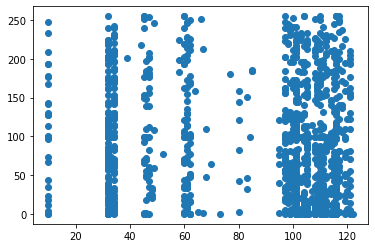

In [181]:
plt.scatter(c,v)

In [225]:
# 2nd attempt
import os
#os.system("wget http://www.pythonchallenge.com/pc/def/channel.zip && unzip channel.zip -d destination_folder")
base_path = "/home/jc/Downloads/destination_folder/"
num = 90052
while True:
    text = os.popen(f"cat /home/jc/Downloads/destination_folder/{num}.txt").read()
    num = re.findall(r'[0-9]+', text)[0]
    print(comments[num],end="")

***************************************************************
****************************************************************
**                                                            **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE NN      NN  **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE  NN    NN   **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE       NN  NN    **
**   OOOOOOOO XX    XX YY        GGG       EEEEE     NNNN     **
**   OOOOOOOO XX    XX YY        GGG       EEEEE      NN      **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE         NN      **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE     NN      **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE     NN      **
**                                                            **
****************************************************************
 **************************************************************


IndexError: list index out of range

In [202]:
import zipfile


In [204]:
archive = zipfile.ZipFile(r'/home/jc/Downloads/channel.zip', 'r')
print(archive.getinfo("46145.txt").comment)

b'\n'


In [219]:
info

<ZipInfo filename='readme.txt' compress_type=deflate filemode='-rw-r--r--' file_size=84 compress_size=78>

In [222]:
comments = dict()
for info in archive.infolist():
    comments[info.filename[:-4]] = info.comment.decode()

In [223]:
comments

{'29': 'E',
 '100': ' ',
 '109': 'Y',
 '176': ' ',
 '226': ' ',
 '270': '*',
 '381': 'E',
 '404': ' ',
 '531': ' ',
 '603': 'Y',
 '665': ' ',
 '668': 'O',
 '730': 'N',
 '819': ' ',
 '893': '*',
 '934': '*',
 '992': '*',
 '1035': '*',
 '1043': '*',
 '1063': ' ',
 '1064': ' ',
 '1091': '*',
 '1123': 'Y',
 '1228': ' ',
 '1321': '*',
 '1440': 'E',
 '1447': '\n',
 '1866': '*',
 '1878': 'O',
 '1946': 'G',
 '2015': ' ',
 '2105': ' ',
 '2134': '\n',
 '2144': '*',
 '2285': ' ',
 '2539': 'Y',
 '2658': ' ',
 '2718': ' ',
 '3390': ' ',
 '3423': ' ',
 '3469': 'G',
 '3572': ' ',
 '3651': 'E',
 '3713': '*',
 '3864': ' ',
 '3924': 'Y',
 '3928': ' ',
 '4130': ' ',
 '4465': ' ',
 '4506': 'E',
 '4530': '*',
 '4630': ' ',
 '4682': 'N',
 '4701': '*',
 '4861': ' ',
 '4918': ' ',
 '4931': 'G',
 '4992': '*',
 '5289': '*',
 '5442': 'G',
 '5630': '*',
 '6123': ' ',
 '6125': ' ',
 '6549': ' ',
 '7057': '*',
 '7298': '*',
 '7331': ' ',
 '7422': '*',
 '7440': ' ',
 '7520': '*',
 '7556': ' ',
 '7973': '*',
 '8001':

In [217]:
info.comment[1:-1].

b''

In [197]:
num

'94191'

In [205]:
os.popen(f"cat /home/jc/Downloads/destination_folder/{46145}.txt").read()

'Collect the comments.'

In [ ]:
46145

In [ ]:
# Challenge 7
imag = 

In [1]:
import cv2

In [57]:
import matplotlib.pyplot as plt

In [48]:
im = cv2.imread("oxygen.png")

In [74]:
selected = im[48][2:610:7]

In [75]:
vals = list()
st = ""
for i in range(len(selected)):
    vals.append(selected[i][0])
    st += chr(selected[i][0])

In [76]:
st

'smart guy, you made it. the next level is [105, 110, 116, 101, 103, 114, 105, 116, 121]'

In [77]:
result = [105, 110, 116, 101, 103, 114, 105, 116, 121]

In [79]:
st = ""
for ch in result:
    st += chr(ch)
print(st)

integrity


In [114]:
# Challenge 8
un = b'BZh91AY&SYA\xaf\x82\r\x00\x00\x01\x01\x80\x02\xc0\x02\x00 \x00!\x9ah3M\x07<]\xc9\x14\xe1BA\x06\xbe\x084'
pw = b'BZh91AY&SY\x94$|\x0e\x00\x00\x00\x81\x00\x03$ \x00!\x9ah3M\x13<]\xc9\x14\xe1BBP\x91\xf08'

In [92]:
st = ""
for ch in un:
    st+=str(ord(ch))
un_st = st
st = ""
for ch in pw:
    st+=str(ord(ch))
pw_st = st

In [97]:
un_st_ex = "0"+un_st

In [98]:
un_st_ex

'066901045749658938838965175130130011128219220320331541045177760932012022566656190852'

In [93]:
pw_st

'669010457496589388389148361241400012903363203315410451771960932012022566668014524056'

In [99]:
-int(un_st)+int(pw_st)

602109411746930449550183186111270001775143982995078910726783171080010544101358333204

In [109]:
import bz2

In [115]:
print(bz2.decompress(un))
print(bz2.decompress(pw))

b'huge'
b'file'


In [116]:
# Challenge 9
first = [146,399,163,403,170,393,169,391,166,386,170,381,170,371,170,355,169,346,167,335,170,329,170,320,170,
310,171,301,173,290,178,289,182,287,188,286,190,286,192,291,194,296,195,305,194,307,191,312,190,316,
190,321,192,331,193,338,196,341,197,346,199,352,198,360,197,366,197,373,196,380,197,383,196,387,192,
389,191,392,190,396,189,400,194,401,201,402,208,403,213,402,216,401,219,397,219,393,216,390,215,385,
215,379,213,373,213,365,212,360,210,353,210,347,212,338,213,329,214,319,215,311,215,306,216,296,218,
290,221,283,225,282,233,284,238,287,243,290,250,291,255,294,261,293,265,291,271,291,273,289,278,287,
279,285,281,280,284,278,284,276,287,277,289,283,291,286,294,291,296,295,299,300,301,304,304,320,305,
327,306,332,307,341,306,349,303,354,301,364,301,371,297,375,292,384,291,386,302,393,324,391,333,387,
328,375,329,367,329,353,330,341,331,328,336,319,338,310,341,304,341,285,341,278,343,269,344,262,346,
259,346,251,349,259,349,264,349,273,349,280,349,288,349,295,349,298,354,293,356,286,354,279,352,268,
352,257,351,249,350,234,351,211,352,197,354,185,353,171,351,154,348,147,342,137,339,132,330,122,327,
120,314,116,304,117,293,118,284,118,281,122,275,128,265,129,257,131,244,133,239,134,228,136,221,137,
214,138,209,135,201,132,192,130,184,131,175,129,170,131,159,134,157,134,160,130,170,125,176,114,176,
102,173,103,172,108,171,111,163,115,156,116,149,117,142,116,136,115,129,115,124,115,120,115,115,117,
113,120,109,122,102,122,100,121,95,121,89,115,87,110,82,109,84,118,89,123,93,129,100,130,108,132,110,
133,110,136,107,138,105,140,95,138,86,141,79,149,77,155,81,162,90,165,97,167,99,171,109,171,107,161,
111,156,113,170,115,185,118,208,117,223,121,239,128,251,133,259,136,266,139,276,143,290,148,310,151,
332,155,348,156,353,153,366,149,379,147,394,146,399]

In [138]:
second = [156,141,165,135,169,131,176,130,187,134,191,140,191,146,186,150,179,155,175,157,168,157,163,157,159,
157,158,164,159,175,159,181,157,191,154,197,153,205,153,210,152,212,147,215,146,218,143,220,132,220,
125,217,119,209,116,196,115,185,114,172,114,167,112,161,109,165,107,170,99,171,97,167,89,164,81,162,
77,155,81,148,87,140,96,138,105,141,110,136,111,126,113,129,118,117,128,114,137,115,146,114,155,115,
158,121,157,128,156,134,157,136,156,136]

In [143]:
second.extend(second)

In [140]:
len(second)

224

In [144]:
zipped = list(zip(first, second))
a,b = zip(*zipped)

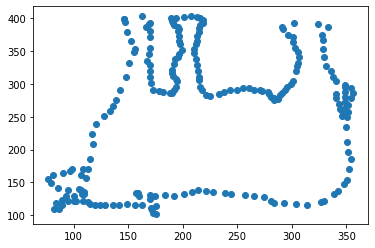

In [149]:
plt.scatter(first[0::2],first[1::2])

In [131]:
max(first)

403

In [152]:
# Challenge 10
seq = [1, 11, 21, 1211, 111221]

In [154]:
seq = '1'

In [156]:
from collections import Counter 
Counter(seq) 

Counter({'1': 1})

In [170]:
seq = "1"
i = 1
print(f"num {i} - {seq}")
dic = Counter(seq) 
while True:
    i += 1
    seq = ""
    for key,val in dic.items():
        seq += f"{val}{key}"
    print(f"num {i} - {seq}")
    dic = Counter(seq) 

num 1 - 1
num 2 - 11
num 3 - 21
num 4 - 1211
num 5 - 3112
num 6 - 132112
num 7 - 311322
num 8 - 232122
num 9 - 421311
num 10 - 14123113
num 11 - 41141223
num 12 - 24312213
num 13 - 32142321
num 14 - 23322114
num 15 - 32232114
num 16 - 23322114
num 17 - 32232114
num 18 - 23322114
num 19 - 32232114
num 20 - 23322114
num 21 - 32232114
num 22 - 23322114
num 23 - 32232114
num 24 - 23322114
num 25 - 32232114
num 26 - 23322114
num 27 - 32232114
num 28 - 23322114
num 29 - 32232114
num 30 - 23322114
num 31 - 32232114
num 32 - 23322114
num 33 - 32232114
num 34 - 23322114
num 35 - 32232114
num 36 - 23322114
num 37 - 32232114
num 38 - 23322114
num 39 - 32232114
num 40 - 23322114
num 41 - 32232114
num 42 - 23322114
num 43 - 32232114
num 44 - 23322114
num 45 - 32232114
num 46 - 23322114
num 47 - 32232114
num 48 - 23322114
num 49 - 32232114
num 50 - 23322114
num 51 - 32232114
num 52 - 23322114
num 53 - 32232114
num 54 - 23322114
num 55 - 32232114
num 56 - 23322114
num 57 - 32232114
num 58 - 23322114


num 1592 - 23322114
num 1593 - 32232114
num 1594 - 23322114
num 1595 - 32232114
num 1596 - 23322114
num 1597 - 32232114
num 1598 - 23322114
num 1599 - 32232114
num 1600 - 23322114
num 1601 - 32232114
num 1602 - 23322114
num 1603 - 32232114
num 1604 - 23322114
num 1605 - 32232114
num 1606 - 23322114
num 1607 - 32232114
num 1608 - 23322114
num 1609 - 32232114
num 1610 - 23322114
num 1611 - 32232114
num 1612 - 23322114
num 1613 - 32232114
num 1614 - 23322114
num 1615 - 32232114
num 1616 - 23322114
num 1617 - 32232114
num 1618 - 23322114
num 1619 - 32232114
num 1620 - 23322114
num 1621 - 32232114
num 1622 - 23322114
num 1623 - 32232114
num 1624 - 23322114
num 1625 - 32232114
num 1626 - 23322114
num 1627 - 32232114
num 1628 - 23322114
num 1629 - 32232114
num 1630 - 23322114
num 1631 - 32232114
num 1632 - 23322114
num 1633 - 32232114
num 1634 - 23322114
num 1635 - 32232114
num 1636 - 23322114
num 1637 - 32232114
num 1638 - 23322114
num 1639 - 32232114
num 1640 - 23322114
num 1641 - 32232114


num 2793 - 32232114
num 2794 - 23322114
num 2795 - 32232114
num 2796 - 23322114
num 2797 - 32232114
num 2798 - 23322114
num 2799 - 32232114
num 2800 - 23322114
num 2801 - 32232114
num 2802 - 23322114
num 2803 - 32232114
num 2804 - 23322114
num 2805 - 32232114
num 2806 - 23322114
num 2807 - 32232114
num 2808 - 23322114
num 2809 - 32232114
num 2810 - 23322114
num 2811 - 32232114
num 2812 - 23322114
num 2813 - 32232114
num 2814 - 23322114
num 2815 - 32232114
num 2816 - 23322114
num 2817 - 32232114
num 2818 - 23322114
num 2819 - 32232114
num 2820 - 23322114
num 2821 - 32232114
num 2822 - 23322114
num 2823 - 32232114
num 2824 - 23322114
num 2825 - 32232114
num 2826 - 23322114
num 2827 - 32232114
num 2828 - 23322114
num 2829 - 32232114
num 2830 - 23322114
num 2831 - 32232114
num 2832 - 23322114
num 2833 - 32232114
num 2834 - 23322114
num 2835 - 32232114
num 2836 - 23322114
num 2837 - 32232114
num 2838 - 23322114
num 2839 - 32232114
num 2840 - 23322114
num 2841 - 32232114
num 2842 - 23322114


num 4292 - 23322114
num 4293 - 32232114
num 4294 - 23322114
num 4295 - 32232114
num 4296 - 23322114
num 4297 - 32232114
num 4298 - 23322114
num 4299 - 32232114
num 4300 - 23322114
num 4301 - 32232114
num 4302 - 23322114
num 4303 - 32232114
num 4304 - 23322114
num 4305 - 32232114
num 4306 - 23322114
num 4307 - 32232114
num 4308 - 23322114
num 4309 - 32232114
num 4310 - 23322114
num 4311 - 32232114
num 4312 - 23322114
num 4313 - 32232114
num 4314 - 23322114
num 4315 - 32232114
num 4316 - 23322114
num 4317 - 32232114
num 4318 - 23322114
num 4319 - 32232114
num 4320 - 23322114
num 4321 - 32232114
num 4322 - 23322114
num 4323 - 32232114
num 4324 - 23322114
num 4325 - 32232114
num 4326 - 23322114
num 4327 - 32232114
num 4328 - 23322114
num 4329 - 32232114
num 4330 - 23322114
num 4331 - 32232114
num 4332 - 23322114
num 4333 - 32232114
num 4334 - 23322114
num 4335 - 32232114
num 4336 - 23322114
num 4337 - 32232114
num 4338 - 23322114
num 4339 - 32232114
num 4340 - 23322114
num 4341 - 32232114


num 5792 - 23322114
num 5793 - 32232114
num 5794 - 23322114
num 5795 - 32232114
num 5796 - 23322114
num 5797 - 32232114
num 5798 - 23322114
num 5799 - 32232114
num 5800 - 23322114
num 5801 - 32232114
num 5802 - 23322114
num 5803 - 32232114
num 5804 - 23322114
num 5805 - 32232114
num 5806 - 23322114
num 5807 - 32232114
num 5808 - 23322114
num 5809 - 32232114
num 5810 - 23322114
num 5811 - 32232114
num 5812 - 23322114
num 5813 - 32232114
num 5814 - 23322114
num 5815 - 32232114
num 5816 - 23322114
num 5817 - 32232114
num 5818 - 23322114
num 5819 - 32232114
num 5820 - 23322114
num 5821 - 32232114
num 5822 - 23322114
num 5823 - 32232114
num 5824 - 23322114
num 5825 - 32232114
num 5826 - 23322114
num 5827 - 32232114
num 5828 - 23322114
num 5829 - 32232114
num 5830 - 23322114
num 5831 - 32232114
num 5832 - 23322114
num 5833 - 32232114
num 5834 - 23322114
num 5835 - 32232114
num 5836 - 23322114
num 5837 - 32232114
num 5838 - 23322114
num 5839 - 32232114
num 5840 - 23322114
num 5841 - 32232114


num 6969 - 32232114
num 6970 - 23322114
num 6971 - 32232114
num 6972 - 23322114
num 6973 - 32232114
num 6974 - 23322114
num 6975 - 32232114
num 6976 - 23322114
num 6977 - 32232114
num 6978 - 23322114
num 6979 - 32232114
num 6980 - 23322114
num 6981 - 32232114
num 6982 - 23322114
num 6983 - 32232114
num 6984 - 23322114
num 6985 - 32232114
num 6986 - 23322114
num 6987 - 32232114
num 6988 - 23322114
num 6989 - 32232114
num 6990 - 23322114
num 6991 - 32232114
num 6992 - 23322114
num 6993 - 32232114
num 6994 - 23322114
num 6995 - 32232114
num 6996 - 23322114
num 6997 - 32232114
num 6998 - 23322114
num 6999 - 32232114
num 7000 - 23322114
num 7001 - 32232114
num 7002 - 23322114
num 7003 - 32232114
num 7004 - 23322114
num 7005 - 32232114
num 7006 - 23322114
num 7007 - 32232114
num 7008 - 23322114
num 7009 - 32232114
num 7010 - 23322114
num 7011 - 32232114
num 7012 - 23322114
num 7013 - 32232114
num 7014 - 23322114
num 7015 - 32232114
num 7016 - 23322114
num 7017 - 32232114
num 7018 - 23322114


num 8291 - 32232114
num 8292 - 23322114
num 8293 - 32232114
num 8294 - 23322114
num 8295 - 32232114
num 8296 - 23322114
num 8297 - 32232114
num 8298 - 23322114
num 8299 - 32232114
num 8300 - 23322114
num 8301 - 32232114
num 8302 - 23322114
num 8303 - 32232114
num 8304 - 23322114
num 8305 - 32232114
num 8306 - 23322114
num 8307 - 32232114
num 8308 - 23322114
num 8309 - 32232114
num 8310 - 23322114
num 8311 - 32232114
num 8312 - 23322114
num 8313 - 32232114
num 8314 - 23322114
num 8315 - 32232114
num 8316 - 23322114
num 8317 - 32232114
num 8318 - 23322114
num 8319 - 32232114
num 8320 - 23322114
num 8321 - 32232114
num 8322 - 23322114
num 8323 - 32232114
num 8324 - 23322114
num 8325 - 32232114
num 8326 - 23322114
num 8327 - 32232114
num 8328 - 23322114
num 8329 - 32232114
num 8330 - 23322114
num 8331 - 32232114
num 8332 - 23322114
num 8333 - 32232114
num 8334 - 23322114
num 8335 - 32232114
num 8336 - 23322114
num 8337 - 32232114
num 8338 - 23322114
num 8339 - 32232114
num 8340 - 23322114


num 9790 - 23322114
num 9791 - 32232114
num 9792 - 23322114
num 9793 - 32232114
num 9794 - 23322114
num 9795 - 32232114
num 9796 - 23322114
num 9797 - 32232114
num 9798 - 23322114
num 9799 - 32232114
num 9800 - 23322114
num 9801 - 32232114
num 9802 - 23322114
num 9803 - 32232114
num 9804 - 23322114
num 9805 - 32232114
num 9806 - 23322114
num 9807 - 32232114
num 9808 - 23322114
num 9809 - 32232114
num 9810 - 23322114
num 9811 - 32232114
num 9812 - 23322114
num 9813 - 32232114
num 9814 - 23322114
num 9815 - 32232114
num 9816 - 23322114
num 9817 - 32232114
num 9818 - 23322114
num 9819 - 32232114
num 9820 - 23322114
num 9821 - 32232114
num 9822 - 23322114
num 9823 - 32232114
num 9824 - 23322114
num 9825 - 32232114
num 9826 - 23322114
num 9827 - 32232114
num 9828 - 23322114
num 9829 - 32232114
num 9830 - 23322114
num 9831 - 32232114
num 9832 - 23322114
num 9833 - 32232114
num 9834 - 23322114
num 9835 - 32232114
num 9836 - 23322114
num 9837 - 32232114
num 9838 - 23322114
num 9839 - 32232114


num 11146 - 23322114
num 11147 - 32232114
num 11148 - 23322114
num 11149 - 32232114
num 11150 - 23322114
num 11151 - 32232114
num 11152 - 23322114
num 11153 - 32232114
num 11154 - 23322114
num 11155 - 32232114
num 11156 - 23322114
num 11157 - 32232114
num 11158 - 23322114
num 11159 - 32232114
num 11160 - 23322114
num 11161 - 32232114
num 11162 - 23322114
num 11163 - 32232114
num 11164 - 23322114
num 11165 - 32232114
num 11166 - 23322114
num 11167 - 32232114
num 11168 - 23322114
num 11169 - 32232114
num 11170 - 23322114
num 11171 - 32232114
num 11172 - 23322114
num 11173 - 32232114
num 11174 - 23322114
num 11175 - 32232114
num 11176 - 23322114
num 11177 - 32232114
num 11178 - 23322114
num 11179 - 32232114
num 11180 - 23322114
num 11181 - 32232114
num 11182 - 23322114
num 11183 - 32232114
num 11184 - 23322114
num 11185 - 32232114
num 11186 - 23322114
num 11187 - 32232114
num 11188 - 23322114
num 11189 - 32232114
num 11190 - 23322114
num 11191 - 32232114
num 11192 - 23322114
num 11193 - 3

num 12820 - 23322114
num 12821 - 32232114
num 12822 - 23322114
num 12823 - 32232114
num 12824 - 23322114
num 12825 - 32232114
num 12826 - 23322114
num 12827 - 32232114
num 12828 - 23322114
num 12829 - 32232114
num 12830 - 23322114
num 12831 - 32232114
num 12832 - 23322114
num 12833 - 32232114
num 12834 - 23322114
num 12835 - 32232114
num 12836 - 23322114
num 12837 - 32232114
num 12838 - 23322114
num 12839 - 32232114
num 12840 - 23322114
num 12841 - 32232114
num 12842 - 23322114
num 12843 - 32232114
num 12844 - 23322114
num 12845 - 32232114
num 12846 - 23322114
num 12847 - 32232114
num 12848 - 23322114
num 12849 - 32232114
num 12850 - 23322114
num 12851 - 32232114
num 12852 - 23322114
num 12853 - 32232114
num 12854 - 23322114
num 12855 - 32232114
num 12856 - 23322114
num 12857 - 32232114
num 12858 - 23322114
num 12859 - 32232114
num 12860 - 23322114
num 12861 - 32232114
num 12862 - 23322114
num 12863 - 32232114
num 12864 - 23322114
num 12865 - 32232114
num 12866 - 23322114
num 12867 - 3

num 14289 - 32232114
num 14290 - 23322114
num 14291 - 32232114
num 14292 - 23322114
num 14293 - 32232114
num 14294 - 23322114
num 14295 - 32232114
num 14296 - 23322114
num 14297 - 32232114
num 14298 - 23322114
num 14299 - 32232114
num 14300 - 23322114
num 14301 - 32232114
num 14302 - 23322114
num 14303 - 32232114
num 14304 - 23322114
num 14305 - 32232114
num 14306 - 23322114
num 14307 - 32232114
num 14308 - 23322114
num 14309 - 32232114
num 14310 - 23322114
num 14311 - 32232114
num 14312 - 23322114
num 14313 - 32232114
num 14314 - 23322114
num 14315 - 32232114
num 14316 - 23322114
num 14317 - 32232114
num 14318 - 23322114
num 14319 - 32232114
num 14320 - 23322114
num 14321 - 32232114
num 14322 - 23322114
num 14323 - 32232114
num 14324 - 23322114
num 14325 - 32232114
num 14326 - 23322114
num 14327 - 32232114
num 14328 - 23322114
num 14329 - 32232114
num 14330 - 23322114
num 14331 - 32232114
num 14332 - 23322114
num 14333 - 32232114
num 14334 - 23322114
num 14335 - 32232114
num 14336 - 2

num 15788 - 23322114
num 15789 - 32232114
num 15790 - 23322114
num 15791 - 32232114
num 15792 - 23322114
num 15793 - 32232114
num 15794 - 23322114
num 15795 - 32232114
num 15796 - 23322114
num 15797 - 32232114
num 15798 - 23322114
num 15799 - 32232114
num 15800 - 23322114
num 15801 - 32232114
num 15802 - 23322114
num 15803 - 32232114
num 15804 - 23322114
num 15805 - 32232114
num 15806 - 23322114
num 15807 - 32232114
num 15808 - 23322114
num 15809 - 32232114
num 15810 - 23322114
num 15811 - 32232114
num 15812 - 23322114
num 15813 - 32232114
num 15814 - 23322114
num 15815 - 32232114
num 15816 - 23322114
num 15817 - 32232114
num 15818 - 23322114
num 15819 - 32232114
num 15820 - 23322114
num 15821 - 32232114
num 15822 - 23322114
num 15823 - 32232114
num 15824 - 23322114
num 15825 - 32232114
num 15826 - 23322114
num 15827 - 32232114
num 15828 - 23322114
num 15829 - 32232114
num 15830 - 23322114
num 15831 - 32232114
num 15832 - 23322114
num 15833 - 32232114
num 15834 - 23322114
num 15835 - 3

num 17288 - 23322114
num 17289 - 32232114
num 17290 - 23322114
num 17291 - 32232114
num 17292 - 23322114
num 17293 - 32232114
num 17294 - 23322114
num 17295 - 32232114
num 17296 - 23322114
num 17297 - 32232114
num 17298 - 23322114
num 17299 - 32232114
num 17300 - 23322114
num 17301 - 32232114
num 17302 - 23322114
num 17303 - 32232114
num 17304 - 23322114
num 17305 - 32232114
num 17306 - 23322114
num 17307 - 32232114
num 17308 - 23322114
num 17309 - 32232114
num 17310 - 23322114
num 17311 - 32232114
num 17312 - 23322114
num 17313 - 32232114
num 17314 - 23322114
num 17315 - 32232114
num 17316 - 23322114
num 17317 - 32232114
num 17318 - 23322114
num 17319 - 32232114
num 17320 - 23322114
num 17321 - 32232114
num 17322 - 23322114
num 17323 - 32232114
num 17324 - 23322114
num 17325 - 32232114
num 17326 - 23322114
num 17327 - 32232114
num 17328 - 23322114
num 17329 - 32232114
num 17330 - 23322114
num 17331 - 32232114
num 17332 - 23322114
num 17333 - 32232114
num 17334 - 23322114
num 17335 - 3

num 18585 - 32232114
num 18586 - 23322114
num 18587 - 32232114
num 18588 - 23322114
num 18589 - 32232114
num 18590 - 23322114
num 18591 - 32232114
num 18592 - 23322114
num 18593 - 32232114
num 18594 - 23322114
num 18595 - 32232114
num 18596 - 23322114
num 18597 - 32232114
num 18598 - 23322114
num 18599 - 32232114
num 18600 - 23322114
num 18601 - 32232114
num 18602 - 23322114
num 18603 - 32232114
num 18604 - 23322114
num 18605 - 32232114
num 18606 - 23322114
num 18607 - 32232114
num 18608 - 23322114
num 18609 - 32232114
num 18610 - 23322114
num 18611 - 32232114
num 18612 - 23322114
num 18613 - 32232114
num 18614 - 23322114
num 18615 - 32232114
num 18616 - 23322114
num 18617 - 32232114
num 18618 - 23322114
num 18619 - 32232114
num 18620 - 23322114
num 18621 - 32232114
num 18622 - 23322114
num 18623 - 32232114
num 18624 - 23322114
num 18625 - 32232114
num 18626 - 23322114
num 18627 - 32232114
num 18628 - 23322114
num 18629 - 32232114
num 18630 - 23322114
num 18631 - 32232114
num 18632 - 2

num 19989 - 32232114
num 19990 - 23322114
num 19991 - 32232114
num 19992 - 23322114
num 19993 - 32232114
num 19994 - 23322114
num 19995 - 32232114
num 19996 - 23322114
num 19997 - 32232114
num 19998 - 23322114
num 19999 - 32232114
num 20000 - 23322114
num 20001 - 32232114
num 20002 - 23322114
num 20003 - 32232114
num 20004 - 23322114
num 20005 - 32232114
num 20006 - 23322114
num 20007 - 32232114
num 20008 - 23322114
num 20009 - 32232114
num 20010 - 23322114
num 20011 - 32232114
num 20012 - 23322114
num 20013 - 32232114
num 20014 - 23322114
num 20015 - 32232114
num 20016 - 23322114
num 20017 - 32232114
num 20018 - 23322114
num 20019 - 32232114
num 20020 - 23322114
num 20021 - 32232114
num 20022 - 23322114
num 20023 - 32232114
num 20024 - 23322114
num 20025 - 32232114
num 20026 - 23322114
num 20027 - 32232114
num 20028 - 23322114
num 20029 - 32232114
num 20030 - 23322114
num 20031 - 32232114
num 20032 - 23322114
num 20033 - 32232114
num 20034 - 23322114
num 20035 - 32232114
num 20036 - 2

num 21436 - 23322114
num 21437 - 32232114
num 21438 - 23322114
num 21439 - 32232114
num 21440 - 23322114
num 21441 - 32232114
num 21442 - 23322114
num 21443 - 32232114
num 21444 - 23322114
num 21445 - 32232114
num 21446 - 23322114
num 21447 - 32232114
num 21448 - 23322114
num 21449 - 32232114
num 21450 - 23322114
num 21451 - 32232114
num 21452 - 23322114
num 21453 - 32232114
num 21454 - 23322114
num 21455 - 32232114
num 21456 - 23322114
num 21457 - 32232114
num 21458 - 23322114
num 21459 - 32232114
num 21460 - 23322114
num 21461 - 32232114
num 21462 - 23322114
num 21463 - 32232114
num 21464 - 23322114
num 21465 - 32232114
num 21466 - 23322114
num 21467 - 32232114
num 21468 - 23322114
num 21469 - 32232114
num 21470 - 23322114
num 21471 - 32232114
num 21472 - 23322114
num 21473 - 32232114
num 21474 - 23322114
num 21475 - 32232114
num 21476 - 23322114
num 21477 - 32232114
num 21478 - 23322114
num 21479 - 32232114
num 21480 - 23322114
num 21481 - 32232114
num 21482 - 23322114
num 21483 - 3

num 22565 - 32232114
num 22566 - 23322114
num 22567 - 32232114
num 22568 - 23322114
num 22569 - 32232114
num 22570 - 23322114
num 22571 - 32232114
num 22572 - 23322114
num 22573 - 32232114
num 22574 - 23322114
num 22575 - 32232114
num 22576 - 23322114
num 22577 - 32232114
num 22578 - 23322114
num 22579 - 32232114
num 22580 - 23322114
num 22581 - 32232114
num 22582 - 23322114
num 22583 - 32232114
num 22584 - 23322114
num 22585 - 32232114
num 22586 - 23322114
num 22587 - 32232114
num 22588 - 23322114
num 22589 - 32232114
num 22590 - 23322114
num 22591 - 32232114
num 22592 - 23322114
num 22593 - 32232114
num 22594 - 23322114
num 22595 - 32232114
num 22596 - 23322114
num 22597 - 32232114
num 22598 - 23322114
num 22599 - 32232114
num 22600 - 23322114
num 22601 - 32232114
num 22602 - 23322114
num 22603 - 32232114
num 22604 - 23322114
num 22605 - 32232114
num 22606 - 23322114
num 22607 - 32232114
num 22608 - 23322114
num 22609 - 32232114
num 22610 - 23322114
num 22611 - 32232114
num 22612 - 2

num 24027 - 32232114
num 24028 - 23322114
num 24029 - 32232114
num 24030 - 23322114
num 24031 - 32232114
num 24032 - 23322114
num 24033 - 32232114
num 24034 - 23322114
num 24035 - 32232114
num 24036 - 23322114
num 24037 - 32232114
num 24038 - 23322114
num 24039 - 32232114
num 24040 - 23322114
num 24041 - 32232114
num 24042 - 23322114
num 24043 - 32232114
num 24044 - 23322114
num 24045 - 32232114
num 24046 - 23322114
num 24047 - 32232114
num 24048 - 23322114
num 24049 - 32232114
num 24050 - 23322114
num 24051 - 32232114
num 24052 - 23322114
num 24053 - 32232114
num 24054 - 23322114
num 24055 - 32232114
num 24056 - 23322114
num 24057 - 32232114
num 24058 - 23322114
num 24059 - 32232114
num 24060 - 23322114
num 24061 - 32232114
num 24062 - 23322114
num 24063 - 32232114
num 24064 - 23322114
num 24065 - 32232114
num 24066 - 23322114
num 24067 - 32232114
num 24068 - 23322114
num 24069 - 32232114
num 24070 - 23322114
num 24071 - 32232114
num 24072 - 23322114
num 24073 - 32232114
num 24074 - 2

KeyboardInterrupt: 

In [171]:
len(str(23322114))

8

In [173]:
import re

In [327]:
p = re.compile(r'^([0-9])\1+')
p.search(seq)

<re.Match object; span=(0, 4), match='2222'>

In [314]:
m.group()

'2222'

In [324]:
seq = seq[num-1:]

In [382]:
re.findall( r"(\d)(\1*)", '11122111')

[('1', '11'), ('2', '2'), ('1', '11')]

In [387]:
seq="1"
#print(seq)
for i in range(30):
    st = ""
    while len(seq)>0:
        m = re.search( r'^([0-9])\1*', seq).group()
        num = len(m)
        seq = seq[num:]
        st += f"{num}{m[0]}"
        #print(f"Match: {m} Number: {num} Seq: {seq}")
    #print(st)
    seq=st
len(st)

5808

Next challenge: http://www.pythonchallenge.com/pc/return/5808.html

In [388]:
# Challenge 11